<a href="https://colab.research.google.com/github/tzlilLV97/FinalProject/blob/main/Project_V_with_randomness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.2&nbsp;**READ ME**

* before run







# 3.&nbsp;Dataset

## 3.3&nbsp;Imports (code)

In [ ]:
!pip install Bio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.6/275.6 KB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 45.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import requests
from google.colab import drive
from torch.nn.modules import activation
import torch.nn as nn
import torch
from torch.utils.data import DataLoader, TensorDataset,Dataset
drive.mount('/content/gdrive')
from Bio import SeqIO
from Bio.Seq import Seq
import warnings
import subprocess

Mounted at /content/gdrive


## 3.35&nbsp;Load data (code)

In [ ]:
ChangeTable = pd.read_csv('/content/gdrive/My Drive/Project2/DataSets/CHANGE-seq_test.csv')
GuideTChangeTableable = pd.read_csv('/content/gdrive/My Drive/Project2/DataSets/GUIDE-seq_test.csv')
BigTable = pd.read_csv('/content/gdrive/My Drive/Project2/DataSets/output_file_pam_change.csv')


In [ ]:
ChangeNeg = pd.read_csv('/content/gdrive/My Drive/Project/filesForModel/CHANGEseq_negative.csv')
ChangePos = pd.read_csv('/content/gdrive/My Drive/Project/filesForModel/CHANGEseq_positive.csv')


In [ ]:
def apply_randomness(length):
	dicty = ["A", "C", "G", "T"]
	# create a random sequence of given length from the dicty list
	random_seq = ''.join(random.choices(dicty, k=length))
	return random_seq


length = 20  # set the length of the random sequence
# if randomness=True, create a new column in all the dfs and add a random sequence using apply_randomness to each row of it, the column name is SixAfterRand
Randomness = True

length = 20  # set the length of the random sequence
# if randomness=True, create a new column in all the dfs and add a random sequence using apply_randomness to each row of it, the column name is SixAfterRand
if Randomness:
	BigTable["SixAfterRand"] = BigTable.apply(lambda x: apply_randomness(length), axis=1)
	ChangePos["SixAfterRand"] = ChangePos.apply(lambda x: apply_randomness(length), axis=1)
	ChangeNeg["SixAfterRand"] = ChangeNeg.apply(lambda x: apply_randomness(length), axis=1)
	ChangeTable["SixAfterRand"] = ChangeTable.apply(lambda x: apply_randomness(length), axis=1)
	GuideTChangeTableable["SixAfterRand"] = GuideTChangeTableable.apply(lambda x: apply_randomness(length), axis=1)
#save the new dfs to their csv files
BigTable.to_csv('/content/gdrive/My Drive/Project/DataSets/output_file_pam_change2.csv', index=False)
ChangeNeg.to_csv('/content/gdrive/My Drive/Project/filesForModel/CHANGEseq_negative2.csv', index=False)
ChangePos.to_csv('/content/gdrive/My Drive/Project/filesForModel/CHANGEseq_positive2.csv', index=False)
ChangeTable.to_csv('/content/gdrive/My Drive/Project/DataSets/CHANGE-seq_test2.csv', index=False)
GuideTChangeTableable.to_csv('/content/gdrive/My Drive/Project/DataSets/GUIDE-seq_test2.csv', index=False)

In [ ]:
BigTable.head()

target chrom  chromStart       offtarget_sequence strand  \
0  GTCCCTAGTGGCCCCACTGTNGG  chr1      379343  acCCCTAtTaGCCCCAgTGTTtG      -   
1  GTCCCTAGTGGCCCCACTGTNGG  chr1      607529  acCCCTAtTaGCCCCAgTGTTtG      -   
2  GTCCCTAGTGGCCCCACTGTNGG  chr1      944664  GcCCCTAcaGGCCCCcCaGaTGG      +   
3  GTCCCTAGTGGCCCCACTGTNGG  chr1      975375  GTCCCcAGctGCCCCACaGgAGc      +   
4  GTCCCTAGTGGCCCCACTGTNGG  chr1     1026229  GTCCacAcTGGCCgCtCTGgTGG      +   

   distance              SixAfter             SixBefore  \
0         6  GCCTGAGCTCTGACTGACAG  CCCCACAGGTCCCTGCTCTC   
1         6  GCCTGAGCTCTGACTGACAG  CCCCACAGGTCCCTGCTCTC   
2         6  GCTGCCTCAGTCGTCCTCTG  CACTGGCCACCAGCCCGGCA   
3         6  CCCCGGGACAACCCCAGGAG  CTGACTCCTCTTGGCTGTGG   
4         6  GGCCTCTGTGGGTGGTGGTG  AACTGGGCTCGCTCCCGCTT   

                                              NuPoPA          SixAfterRand  
0  0.363,0.354,0.346,0.341,0.33,0.332,0.331,0.332...  GTACAGGGACGCGATACAGA  
1  0.342,0.333,0.326,0.324,0.313,0.312,0.308,0.30...  ACCCCGCGGCCGGGGTAATC  
2  1.244,1.26,1.272,1.273,1.258,1.25,1.247,1.263,...  CATCCACCTTTCTCAACCGT  
3  1.288,1.279,1.269,1.271,1.262,1.256,1.258,1.25...  TCATCTATTGCAAATCCCTA  
4  1.09,1.097,1.105,1.108,1.123,1.138,1.148,1.152...  CTGACATGTTAAGTTGTGGC

In [ ]:
ChangeTableOrig = pd.read_excel('/content/drive/My Drive/Project/CHANGE-seqO.xlsx')
# ChangeTable = pd.read_excel('/content/drive/My Drive/Project/CHANGE-seq.xlsx')


FileNotFoundError: ignored

In [ ]:
ChangeTable['offtarget_sequence'] = ChangeTableOrig['offtarget_sequence']

In [ ]:
# ChangePos = ChangePos.drop("Unnamed: 7",axis='columns')
# ChangePos.head()

In [ ]:
# Pos = pd.concat([ChangePos, ChangeNeg])
# Pos.head()

In [ ]:
BigTable.head(15)
#print(len(BigTable))

In [ ]:
BigTable.head()

## 3.36&nbsp;Handle Data (code)

In [ ]:
# ChangeTable = pd.read_csv('/content/drive/My Drive/Project/CHANGE-seq.xlsx')
# ChangeTable = pd.read_excel('/content/drive/My Drive/Project/CHANGE-seq.xlsx')
# GuideTable = pd.read_excel('/content/drive/My Drive/Project/GUIDE-seq.xlsx')
BigTable = pd.read_table('/content/drive/My Drive/Project/output_file_pam_change.txt')
print(len(BigTable))
BigTable.head()

In [ ]:
print(len(temp_null))
temp_null.head()

In [ ]:
def my_len(x):
  # print(x)
  try:
    if len(x) <=15:
      return np.NaN
    else:
      return x
  except:
    return x
BigTable['SixBefore'] = BigTable['SixBefore'].apply(my_len)
BigTable['SixAfter'] = BigTable['SixAfter'].apply(my_len)
# ChangeTable
# GuideTable
# BigTable['NuPoPA'].head()

In [ ]:
print(len(temp))

In [ ]:
BigTable.head()

## 3.38&nbsp;Handle Data2 (code)

In [ ]:
print(len(temp_null))
temp_null.head()

7471


chrom  chromStart   chromEnd          name  CHANGEseq_reads strand  \
18    chr2   177872326  177872348  AAVS1_site_1               46      +   
19   chr15    69947002   69947024  AAVS1_site_1               44      -   
27    chr2     9666141    9666163  AAVS1_site_1               32      +   
100  chr12   109138455  109138477  AAVS1_site_1               12      -   
125   chr9   133738789  133738811  AAVS1_site_1               12      -   

          offtarget_sequence          chromStart:chromEnd  distance  \
18   GTGAG-AATCCTGTCACTAGAGG   chr2:177872327-177872348:+         4   
19   CTCTTCA-TCCTGTCCCTAGTGG    chr15:69947003-69947024:-         4   
27   GTCAATA-TCCTGTCCCCAGGGG       chr2:9666142-9666163:+         4   
100  GTCACCA-TCATGGCCCTGGAGG  chr12:109138456-109138477:-         4   
125  GTGAGCA-TCCTGTCCCTGGGGG   chr9:133738790-133738811:-         4   

                      target             SixBefore             SixAfter  \
18   GTCACCAATCCTGTCCCTAGNGG  AAGAAGTCTATCATGACATA  GTTGCCAGTGATACCCTGG   
19   GTCACCAATCCTGTCCCTAGNGG  CAGGGAAACTGACAGGCTTT  GGCAGCGAGATCTGCCATG   
27   GTCACCAATCCTGTCCCTAGNGG  GCCTGGGATGCAATGGCCAC  CTCTGTGTGAACTAAGGTC   
100  GTCACCAATCCTGTCCCTAGNGG  GTATTATTATCATATAGTCA  AGGAAGGGCGCCATCATCC   
125  GTCACCAATCCTGTCCCTAGNGG  CTCACTCGCCTCTGAAGGCA  GAGCAAACTGGGGCATGTG   

                                              Affinity  
18   ['-0.549' '-0.535' '-0.525' '-0.520' '-0.513' ...  
19   ['0.377' '0.367' '0.356' '0.350' '0.341' '0.33...  
27   ['1.085' '1.087' '1.086' '1.078' '1.069' '1.05...  
100  ['-0.179' '-0.156' '-0.141' '-0.122' '-0.101' ...  
125  ['1.310' '1.306' '1.307' '1.296' '1.298' '1.30...

In [ ]:
# ChangeTable = ChangeTable.drop("Unnamed: 0",axis='columns')
# GuideTable[GuideTable['SixAfter'].isna()] = temp_null
def my_nan(x):
  try:
    if 'nan' in x:
      return np.NaN
    else:
      return x
  except:
    return x
# BigTable[BigTable['SixAfter'].isna()] = temp_null
# temp_null = GuideTable[GuideTable['SixAfter'].isna()]
# ChangeTable[ChangeTable['SixAfter'].isna()] = temp_null
# temp_null = ChangeTable[ChangeTable['SixAfter'].isna()]
print(len(temp_null))
temp_null.head()


1


Unnamed: 0  Unnamed: 0.1 chrom  chromStart  chromEnd          name  \
468         468           468  chrM        4488      4511  CXCR4_site_3   

     GUIDEseq_reads strand       offtarget_sequence genomic_coordinate  \
468               7      -  AAAGATGGTAGAGTAGATGACGG   chrM:4489-4511:-   

     distance                   target  run SixBefore SixAfter Affinity  
468         4  GAAGATGATGGAGTAGATGGNGG    1       NaN      NaN        0

In [ ]:
BigTable['NuPoPA'] = BigTable['NuPoPA'].apply(my_nan)
GuideTable['Affinity'] = GuideTable['Affinity'].apply(my_nan)
ChangeTable['Affinity'] = ChangeTable['Affinity'].apply(my_nan)


In [ ]:
ChangeTableOrig = ChangeTableOrig.drop("Unnamed: 7",axis='columns')

# Add randomness 
in the following section, we'll create a copy of the tables, and generate random 



In [ ]:
def apply_randomness(length):
	dicty = ["A", "C", "G", "T"]
	# create a random sequence of given length from the dicty list
	random_seq = ''.join(random.choices(dicty, k=length))
	return random_seq


length = 20  # set the length of the random sequence
# if randomness=True, create a new column in all the dfs and add a random sequence using apply_randomness to each row of it, the column name is SixAfterRand
Randomness = True

length = 20  # set the length of the random sequence
# if randomness=True, create a new column in all the dfs and add a random sequence using apply_randomness to each row of it, the column name is SixAfterRand
if Randomness:
	BigTable["SixAfterRand"] = BigTable.apply(lambda x: apply_randomness(length), axis=1)
	ChangePos["SixAfterRand"] = ChangePos.apply(lambda x: apply_randomness(length), axis=1)
	ChangeNeg["SixAfterRand"] = ChangeNeg.apply(lambda x: apply_randomness(length), axis=1)
	ChangeTable["SixAfterRand"] = ChangeTable.apply(lambda x: apply_randomness(length), axis=1)
	GuideTChangeTableable["SixAfterRand"] = GuideTChangeTableable.apply(lambda x: apply_randomness(length), axis=1)
#save the new dfs to their csv files
BigTable.to_csv('/content/gdrive/My Drive/Project2/DataSets/output_file_pam_change.csv', index=False)
ChangeNeg.to_csv('/content/gdrive/My Drive/Project2/filesForModel/CHANGEseq_negative.csv', index=False)
ChangePos.to_csv('/content/gdrive/My Drive/Project2/filesForModel/CHANGEseq_positive.csv', index=False)
ChangeTable.to_csv('/content/gdrive/My Drive/Project2/DataSets/CHANGE-seq_test.csv', index=False)
GuideTChangeTableable.to_csv('/content/gdrive/My Drive/Project2/DataSets/GUIDE-seq_test.csv', index=False)

****************************************
****************************************
****************************************


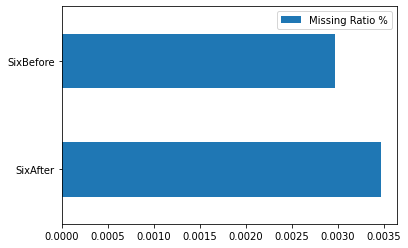

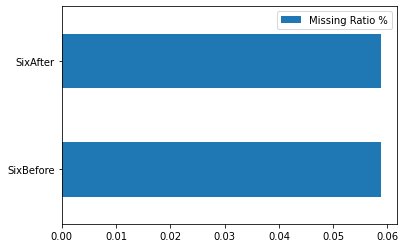

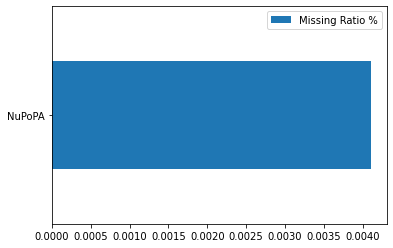

In [ ]:
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.show()
    else:
        print('No NAs found')
plot_nas(ChangeTable)
plot_nas(GuideTable)
plot_nas(BigTable)
# plot_nas(ChangeTableOrig)
# plot_nas(ChangePos)
# plot_nas(ChangeNeg)
# plot_nas(Pos)


In [ ]:
# temp_null = ChangeTable[ChangeTable['SixAfter'].isna()]
ChangeTable[ChangeTable['SixAfterRand'].isna()] = temp_null
print(len(temp_null))
temp_null.head()

NameError: ignored

## 3.4&nbsp;Save CSV (code)

In [ ]:
# ChangeTable.to_csv('/content/drive/My Drive/Project/CHANGE-seq_test.csv',index=False)
# GuideTable.to_csv('/content/drive/My Drive/Project/GUIDE-seq_test.csv',index=False)
BigTable.to_csv('/content/drive/My Drive/Project/output_file_pam_change.csv',index=False)

In [ ]:
# ChangeTable.to_excel('/content/drive/My Drive/Project/CHANGE-seq_test.xlsx')
# GuideTable.to_excel('/content/drive/My Drive/Project/GUIDE-seq_test.xlsx')

BigTable.to_csv('/content/drive/My Drive/Project/output_file_pam_change.txt', sep='\t',index=False)

# 5.&nbsp;Results

## 3.37&nbsp;add 20 nuc

In [ ]:
def ReverseAndChange(OrigSeq):
    OrigSeq = OrigSeq[::-1].upper()
    ReverseSeq = ""
    for i in range(len(OrigSeq)):
        if OrigSeq[i] == 'A':
            ReverseSeq += 'T'
        elif OrigSeq[i] == 'T':
            ReverseSeq += 'A'
        elif OrigSeq[i] == 'G':
            ReverseSeq += 'C'
        elif OrigSeq[i] == 'C':
            ReverseSeq += 'G'
        else:
            ReverseSeq +=OrigSeq[i]
            continue
    return ReverseSeq
    # return str(Seq(ReverseSeq).reverse_complement())


def CheckSequenceMatchToGenom(OrigSeq,GenomSeq,CheckValueError):
    if not CheckValueError:
        return True
    if OrigSeq != GenomSeq and "-" not in OrigSeq and "N" not in OrigSeq:
        print(OrigSeq)
        print(GenomSeq)
        raise ValueError


def CheckSequence(seq, index):
    if isinstance(seq, float):
        # print("found ", seq, "  in index =", index)
        return False


In [ ]:
def AddingSixBeforeAndSixAfterToExcelNew(GenomePath, OrigExcelPath, SixBeforeName, SixAfterName, ChromStartName, ChromEndName,
                                      ResultExcelPath,Type,CheckValueError,CurrentChrom,NumberOfNucleotides,ChromeNumber,ChromeName):

    input_file = GenomePath
    Count = 0
    percent = 0
    fasta_sequences = SeqIO.parse(open(input_file), 'fasta')
   
    # print(len(dataset_df.loc[dataset_df['chrom'] ==CurrentChrom].index))
    SixBefore = [0 for i in range(len(temp_null.index))]
    temp_null[SixBeforeName] = SixBefore
    # dataset_df['All32'] = SixBefore # TODO put in comment
    temp_null[SixAfterName] = SixBefore
    ListOfIds = ["NC_00000" + str(i) for i in range(1, 10)] + ["NC_0000" + str(i) for i in range(10, 25)]
    ListOfChrs = ["chr" + str(i) for i in range(1, 25)]
    ChromStartVector = temp_null[ChromStartName]
    if ChromEndName == 'chromEnd':
        chromEndVector = temp_null[ChromEndName]
    else:
        chromEndVector = ChromStartVector + 23
    # for chromosome in ListOfIds:

    for i in fasta_sequences:
        # print(i.id[0:2])
        if i.id[0:2] == "NC":
            if i.id[0:9] in ListOfIds:
                    percent = 0
                # if i.id[0:9] == "NC_0000{}".format(ChromeNumber): # TODO put in comment if you want to do all the croms in same time
                # if i.id[0:9] == "NC_0000{}".format(ChromeNumber):
                    print("Starting adding 6 nuc before and after in ", ChromeName[i.id[7:9]])
                    for j in temp_null.loc[temp_null['chrom'] == ChromeName[i.id[7:9]]].index:
                        if CheckSequence(temp_null['offtarget_sequence'][j], j):
                            # print(dataset_df.loc[[j]])
                            continue
                        if Count == 10000:
                            percent += 1
                            # print the percentage of the process rounded to the nearest integer

                            print("percent = ", round(1000000*percent/len(temp_null.loc[temp_null['chrom'] ==ChromeName[i.id[7:9]]].index)),"%")
                            Count = 0
                        else:
                            Count += 1
                        TempSeqLen = len(temp_null['target'][j])
                        if temp_null['strand'][j] == '+':
                            #CheckSequenceMatchToGenom(dataset_df['offtarget_sequence'][j].upper(), i.seq[ChromStartVector[j]:chromEndVector[j]].upper(),CheckValueError)
                            temp35 = i.seq[ChromStartVector[j] - NumberOfNucleotides:chromEndVector[j] + NumberOfNucleotides]
                            temp_null.loc[j,SixAfterName] = str(temp35[TempSeqLen + NumberOfNucleotides:TempSeqLen + NumberOfNucleotides*2]).upper()
                            temp_null.loc[j,SixBeforeName] = str(temp35[0:NumberOfNucleotides]).upper()
                            # temp_null.loc[j,'offtarget_sequence'] = str(temp35[NumberOfNucleotides:TempSeqLen + NumberOfNucleotides]).upper()
                            # dataset_df['All32'][j] = str(temp35).upper()# TODO put in comment
                        else:
                            orig_str = str(i.seq[ChromStartVector[j] - NumberOfNucleotides:chromEndVector[j] + NumberOfNucleotides]).upper()
                            temp35 = ReverseAndChange(orig_str)
                            #CheckSequenceMatchToGenom(dataset_df['offtarget_sequence'][j].upper(),temp35[NumberOfNucleotides:TempSeqLen + NumberOfNucleotides].upper(),CheckValueError)
                            temp_null.loc[j,SixAfterName] = str(temp35[TempSeqLen + NumberOfNucleotides:TempSeqLen + NumberOfNucleotides*2]).upper()
                            temp_null.loc[j,SixBeforeName] = str(temp35[0:NumberOfNucleotides]).upper()
                            # temp_null.loc[j,'offtarget_sequence'] = str(temp35[NumberOfNucleotides:TempSeqLen + NumberOfNucleotides]).upper()

                            # dataset_df['All32'][j] = str(temp35)  # TODO put in comment

                    if i.id[0:9] == "NC_000023":
                        for j in temp_null.loc[temp_null['chrom'] == 'chrX'].index:
                            if CheckSequence(temp_null['offtarget_sequence'][j], j):
                                continue
                            TempSeqLen = len(temp_null['target'][j])
                            if temp_null['strand'][j] == '+':
                                #CheckSequenceMatchToGenom(dataset_df['offtarget_sequence'][j], i.seq[ChromStartVector[j]:chromEndVector[j]].upper(),CheckValueError)
                                temp35 = i.seq[ChromStartVector[j] - NumberOfNucleotides:chromEndVector[j] + NumberOfNucleotides]
                                temp_null.loc[j,SixAfterName] = str(temp35[TempSeqLen + NumberOfNucleotides:TempSeqLen + NumberOfNucleotides*2]).upper()
                                temp_null.loc[j,SixBeforeName] = str(temp35[0:NumberOfNucleotides]).upper()
                                # temp_null.loc[j,'offtarget_sequence'] = str(temp35[NumberOfNucleotides:TempSeqLen + NumberOfNucleotides]).upper()
                                # dataset_df['All32'][j] = str(temp35).upper()
                            else:
                                orig_str = str(i.seq[ChromStartVector[j] - NumberOfNucleotides:chromEndVector[j] + NumberOfNucleotides]).upper()
                                temp35 = ReverseAndChange(orig_str)
                                #CheckSequenceMatchToGenom(dataset_df['offtarget_sequence'][j],temp35[NumberOfNucleotides:TempSeqLen + NumberOfNucleotides],CheckValueError)
                                temp_null.loc[j,SixAfterName] = str(temp35[TempSeqLen + NumberOfNucleotides:TempSeqLen + NumberOfNucleotides*2])
                                temp_null.loc[j,SixBeforeName] = str(temp35[0:NumberOfNucleotides])
                                # temp_null.loc[j,'offtarget_sequence'] = str(temp35[NumberOfNucleotides:TempSeqLen + NumberOfNucleotides]).upper()
                                # dataset_df['All32'][j] = str(temp35)
                    if i.id[0:9] == "NC_000024":
                        for j in temp_null.loc[temp_null['chrom'] == 'chrY'].index:
                            if CheckSequence(temp_null['offtarget_sequence'][j], j):
                                continue
                            TempSeqLen = len(temp_null['target'][j])
                            if temp_null['strand'][j] == '+':
                                #CheckSequenceMatchToGenom(dataset_df['offtarget_sequence'][j], i.seq[ChromStartVector[j]:chromEndVector[j]].upper(),CheckValueError)
                                temp35 = i.seq[ChromStartVector[j] - NumberOfNucleotides:chromEndVector[j] + NumberOfNucleotides]
                                temp_null.loc[j,SixAfterName] = str(temp35[TempSeqLen + NumberOfNucleotides:TempSeqLen + NumberOfNucleotides*2]).upper()
                                temp_null.loc[j,SixBeforeName] = str(temp35[0:NumberOfNucleotides]).upper()
                                # temp_null.loc[j,'offtarget_sequence'] = str(temp35[NumberOfNucleotides:TempSeqLen + NumberOfNucleotides]).upper()
                                # dataset_df['All32'][j] = str(temp35).upper()
                            else:
                                orig_str = str(i.seq[ChromStartVector[j] - NumberOfNucleotides:chromEndVector[j] + NumberOfNucleotides]).upper()
                                temp35 = ReverseAndChange(orig_str)
                                #CheckSequenceMatchToGenom(dataset_df['offtarget_sequence'][j],temp35[NumberOfNucleotides:TempSeqLen + NumberOfNucleotides],CheckValueError)
                                temp_null.loc[j,SixAfterName] = str(temp35[TempSeqLen + NumberOfNucleotides:TempSeqLen + NumberOfNucleotides*2])
                                temp_null.loc[j,SixBeforeName] = str(temp35[0:NumberOfNucleotides])
                                # temp_null.loc[j,'offtarget_sequence'] = str(temp35[NumberOfNucleotides:TempSeqLen + NumberOfNucleotides]).upper()
                                # dataset_df['All32'][j] = str(temp35)



In [ ]:
listoccurchrom = ['chr1','chr2','chr3','chr4','chr5','chr6','chr7','chr8','chr9','chr10','chr11','chr12','chr13','chr14','chr15','chr16','chr17','chr18','chr19','chr20','chr21','chr22','chrX','chrY']
listofnum = [i for i in range(1,25)]
listofnumforchrom = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24']
dictofnum = dict(zip(listofnumforchrom,listoccurchrom))
AddingSixBeforeAndSixAfterToExcelNew(GenomePath="/content/drive/My Drive/Project/GRCh38_latest_genomic.fna", OrigExcelPath="‏‏CHANGE-seq.xlsx",
                                  SixBeforeName='SixBefore', SixAfterName='SixAfter', ChromStartName='chromStart', ChromEndName='chromEnd',
                                  ResultExcelPath="CHANGE-seqNew.xlsx",Type='xlsx',CheckValueError=False,CurrentChrom=listoccurchrom,
                                  NumberOfNucleotides = 20,ChromeNumber = listofnumforchrom,ChromeName = dictofnum)

<ipython-input-108-a41bbd833060>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_null[SixBeforeName] = SixBefore
<ipython-input-108-a41bbd833060>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_null[SixAfterName] = SixBefore


Starting adding 6 nuc before and after in  chr1


/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Starting adding 6 nuc before and after in  chr2
Starting adding 6 nuc before and after in  chr3
Starting adding 6 nuc before and after in  chr4
Starting adding 6 nuc before and after in  chr5
Starting adding 6 nuc before and after in  chr6
Starting adding 6 nuc before and after in  chr7
Starting adding 6 nuc before and after in  chr8
Starting adding 6 nuc before and after in  chr9
Starting adding 6 nuc before and after in  chr10
Starting adding 6 nuc before and after in  chr11
Starting adding 6 nuc before and after in  chr12
Starting adding 6 nuc before and after in  chr13
Starting adding 6 nuc before and after in  chr14
Starting adding 6 nuc before and after in  chr15
Starting adding 6 nuc before and after in  chr16
Starting adding 6 nuc before and after in  chr17
Starting adding 6 nuc before and after in  chr18
Starting adding 6 nuc before and after in  chr19
Starting adding 6 nuc before and after in  chr20
Starting adding 6 nuc before and after in  chr21
Starting adding 6 nuc before

# 4.&nbsp;Utilities (run before train/test)

## 4.01&nbsp;general_utilities

In [ ]:
"""
general utilizes
"""

import pathlib

# ##############paths######################
HOME_DIR = "/content/gdrive/My Drive/Project/"
FILES_DIR = HOME_DIR# +"files/"


DATASETS_PATH = FILES_DIR+"DataSets/"
CHANGE_SEQ_PATH = DATASETS_PATH+"CHANGE-seq.xlsx"
GUIDE_SEQ_PATH = DATASETS_PATH+"GUIDE-seq.xlsx"


# #################constants##################
SEED = 10


## 4.02&nbsp;Utilities

In [ ]:
"""
This module contains the utilizes functions for training and training all the xgboost model variants
"""
import random
import itertools
import pandas as pd
import numpy as np

from sklearn.preprocessing import PowerTransformer, FunctionTransformer, MaxAbsScaler, StandardScaler

random.seed(SEED)


def load_order_sg_rnas(data_type='CHANGE'):
    """
    load and return the sgRNAs in certain order for the k-fold training
    """
    data_type = 'CHANGE' if data_type.lower() in ('changeseq', 'change-seq', 'change_seq') else data_type
    data_type = 'GUIDE' if data_type.lower() in ('guideseq', 'guide-seq', 'guide_seq') else data_type
    sg_rnas_s = pd.read_csv(DATASETS_PATH+data_type+'-seq_sgRNAs_ordering.csv',
                            header=None, squeeze=True)
    return list(sg_rnas_s)


def order_sg_rnas(data_type='CHANGE'):
    """
    Create and return the sgRNAs in certain order for the k-fold training
    """
    data_type = 'CHANGE' if data_type.lower() in ('changeseq', 'change-seq', 'change_seq') else data_type
    data_type = 'GUIDE' if data_type.lower() in ('guideseq', 'guide-seq', 'guide_seq') else data_type
    dataset_df = pd.read_excel(
        DATASETS_PATH + data_type + '-seq.xlsx', index_col=0)
    sg_rnas = list(dataset_df["target"].unique())
    print("There are", len(sg_rnas), "unique sgRNAs in the", data_type, "dataset")

    # sort the sgRNAs and shuffle them
    sg_rnas.sort()
    random.shuffle(sg_rnas)

    # save the sgRNAs order into csv file
    sg_rnas_s = pd.Series(sg_rnas)
    # to csv - you can read this to Series using -
    # pd.read_csv("file_name.csv", header=None, squeeze=True)
    sg_rnas_s.to_csv(DATASETS_PATH+data_type+'-seq_sgRNAs_ordering.csv',
                     header=False, index=False)

    return sg_rnas


def create_nucleotides_to_position_mapping():
    """
    Return the nucleotides to position mapping
    """
    # matrix positions for ('A','A'), ('A','C'),...
    # tuples of ('A','A'), ('A','C'),...
    nucleotides_product = list(itertools.product(*(['ACGT'] * 2)))
    # tuples of (0,0), (0,1), ...
    position_product = [(int(x[0]), int(x[1]))
                        for x in list(itertools.product(*(['0123'] * 2)))]
    nucleotides_to_position_mapping = dict(
        zip(nucleotides_product, position_product))

    # tuples of ('N','A'), ('N','C'),...
    n_mapping_nucleotides_list = [('N', char) for char in ['A', 'C', 'G', 'T']]
    # list of tuples positions corresponding to ('A','A'), ('C','C'), ...
    n_mapping_position_list = [nucleotides_to_position_mapping[(char, char)]
                               for char in ['A', 'C', 'G', 'T']]

    nucleotides_to_position_mapping.update(
        dict(zip(n_mapping_nucleotides_list, n_mapping_position_list)))

    # tuples of ('A','N'), ('C','N'),...
    n_mapping_nucleotides_list = [(char, 'N') for char in ['A', 'C', 'G', 'T']]
    # list of tuples positions corresponding to ('A','A'), ('C','C'), ...
    n_mapping_position_list = [nucleotides_to_position_mapping[(char, char)]
                               for char in ['A', 'C', 'G', 'T']]
    nucleotides_to_position_mapping.update(
        dict(zip(n_mapping_nucleotides_list, n_mapping_position_list)))

    return nucleotides_to_position_mapping


def build_sequence_features(dataset_df, nucleotides_to_position_mapping,
                            include_distance_feature=False,
                            include_sequence_features=True,
                            include_NuPoP_Affinity=False,
                            before_nucleotides=0,after_nucleotides=0):
    """
    Build sequence features using the nucleotides to position mapping
    """
    SizeOfAffinityFeature = 23
    if (not include_distance_feature) and (not include_sequence_features):
        raise ValueError(
            'include_distance_feature and include_sequence_features can not be both False')
    # convert dataset_df["target"] -3 position to 'N'
    print("Converting the [-3] positions in each sgRNA sequence to 'N'")
    dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
    if include_sequence_features:
        if (include_distance_feature):
            final_result = np.zeros((len(dataset_df),SizeOfAffinityFeature*int(include_NuPoP_Affinity) + (23 * 16) + 1 + (before_nucleotides + after_nucleotides) * 4),dtype=np.float16)
        else:
            final_result = np.zeros((len(dataset_df),SizeOfAffinityFeature*int(include_NuPoP_Affinity) + (23 * 16) + (before_nucleotides + after_nucleotides) * 4), dtype=np.float16)
    else:
        final_result = np.zeros((len(dataset_df), 1), dtype=np.int8)
    for i, (seq1, seq2) in enumerate(zip(dataset_df["target"], dataset_df["offtarget_sequence"])):
        if include_sequence_features:
            intersection_matrices = np.zeros((23, 4, 4), dtype=np.int8)
            for j in range(23):
                matrix_positions = nucleotides_to_position_mapping[(
                    seq1[j], seq2[j])]
                intersection_matrices[j, matrix_positions[0],
                                      matrix_positions[1]] = 1
        else:
            intersection_matrices = None
        if include_sequence_features:
            temp = intersection_matrices.flatten()
            if include_distance_feature:
                final_result[i, :-1-(before_nucleotides + after_nucleotides)*4 - SizeOfAffinityFeature*int(include_NuPoP_Affinity)] = temp
            else:
                final_result[i, :-(before_nucleotides + after_nucleotides)*4 - SizeOfAffinityFeature*int(include_NuPoP_Affinity)] = temp
        # print(one_hot_encode(dataset_df["SixAfter"].iloc[i][:extra_nucleotides],extra_nucleotides))

        try:
            final_result[i,-(before_nucleotides + after_nucleotides)*4-1 - SizeOfAffinityFeature*int(include_NuPoP_Affinity):
                           -(before_nucleotides)*4-1 - SizeOfAffinityFeature*int(include_NuPoP_Affinity)] =\
                            one_hot_encode(dataset_df["SixAfterRand"].iloc[i][:after_nucleotides],after_nucleotides)
                            #TODO Change back to SixAfter
        except:
            print("didnt work for i = ", i)
            print(dataset_df.iloc[i])
            print(-(before_nucleotides + after_nucleotides)*4-1 - SizeOfAffinityFeature*int(include_NuPoP_Affinity))
            print(-(before_nucleotides)*4-1 - SizeOfAffinityFeature*int(include_NuPoP_Affinity))
            print(dataset_df["SixAfterRand"].iloc[i][:after_nucleotides])
            print(one_hot_encode(dataset_df["SixAfterRand"].iloc[i][:after_nucleotides],after_nucleotides))
            # print(dataset_df["SixAfter"].isnull().any())
            # print(dataset_df.isnull().any(axis=1))
            # print(extra_nucleotides)
            # print("SixAfter = ", dataset_df[i])
            # print(dataset_df["SixAfter"].iloc[i][:extra_nucleotides])
            # print(one_hot_encode(dataset_df["SixAfter"].iloc[i][:extra_nucleotides],extra_nucleotides))

            # exit(1)
        #print(one_hot_encode(dataset_df["SixBefore"].iloc[i][-extra_nucleotides:],extra_nucleotides))
        final_result[i, -(before_nucleotides)*4-1-SizeOfAffinityFeature*int(include_NuPoP_Affinity):
                        - 1-SizeOfAffinityFeature*int(include_NuPoP_Affinity)] =\
                        one_hot_encode(dataset_df["SixBefore"].iloc[i][-before_nucleotides:],before_nucleotides)
        if include_NuPoP_Affinity:
            # remove \n from the string
            try: 
              if dataset_df["Affinity"].iloc[i]:
                name_nupop = "Affinity"
            except:
              name_nupop = "NuPoPA"
            if name_nupop == "Affinity":
                # print(dataset_df.iloc[i])

              if  dataset_df[name_nupop].iloc[i][0] == '[':
                Affinity_list = [float(l[1:-1].replace("\n", "").replace("'", "")) for l in dataset_df[name_nupop].iloc[i][1:-1].split(" ")]
                # print(Affinity_list[11])
                # exit(1)
            else:
                try:
                    Affinity_list = [round(float(l), 3) for l in dataset_df[name_nupop].iloc[i].split(",")]  # convert string to list of floats
                      # convert string to list of floats
                #     print(Affinity_list)
                #     exit(0)
                except:
                #     Affinity_list = [round(float(l), 3) for l in dataset_df["NuPoPA"].iloc[i].split(",")]  # convert string to list of floats  # convert string to list of floats
                #     # Affinity_list = [round(float(l), 3) for l in dataset_df["NuPoPA"].iloc[i].split(",")]  # convert string to list of floats
                    print(dataset_df[name_nupop].iloc[i])
                    exit(0)
            # print( np.array(Affinity_list))
            # final_result[i, -23:] = np.array(Affinity_list)

            final_result[i, -SizeOfAffinityFeature*int(include_NuPoP_Affinity) - 1: -1] = np.array(Affinity_list)
        # print(final_result[i].shape)

        if include_distance_feature:
            final_result[i, -1] = dataset_df["distance"].iloc[i]
        elif (not include_sequence_features):
            final_result[i, :] = intersection_matrices.flatten()
    # print(final_result[1])
    # exit(0)
    return final_result


###ONE HOTTER  - name in progress
def one_hot_encode(seq,extra_nucleotides):
    mapping = dict(zip("ACGT", range(4)))
    if len(seq)!=extra_nucleotides:
        return [0 for i in range(extra_nucleotides*4)]
    try:
        seq2 = [mapping[i] for i in seq]
        temp = np.eye(4)[seq2]
        return [item for sub in temp for item in sub]
    except:
        temp = [0 for i in range(len(seq))]
        for idx, ele in enumerate(seq):
            if ele=="N":
                temp[idx] = [0.25,0.25,0.25,0.25]
                    ##np.eye(4)[mapping[random.choice(["A","C","G","T"])]]
            if ele=="R":
                temp[idx] = [0.5,0,0.5,0]
                    #np.eye(4)[mapping[random.choice(["A","G"])]]
            else:
                try:
                    temp[idx]=np.eye(4)[mapping[ele]]
                except:
                    temp[idx]=[0.0,0.0,0.0,0.0]
        return [item for sub in temp for item in sub]



##########################################################################


def create_fold_sets(target_fold, targets, positive_df, negative_df,
                     balanced, exclude_targets_without_positives):
    """
    Create fold sets for train/test
    remove_targets_without_positives: only from the train test.
        It doesn't matter in the test set, as we can't evaluate the performance when evaluating per sgRNA.
        Moreover, we can always remove them in the evaluation stage.
    """
    test_targets = target_fold
    train_targets = [target for target in targets if target not in target_fold]
    if exclude_targets_without_positives:
        for target in train_targets.copy():
            if len(positive_df[positive_df["target"] == target]) == 0:
                print("removing target:", target, "from training set, since it has no positives")
                train_targets.remove(target)

    positive_df_test = positive_df[positive_df['target'].isin(test_targets)]
    positive_df_train = positive_df[positive_df['target'].isin(train_targets)]

    if balanced:
        # obtain the negative samples for train
        # (for each target the positive and negative samples numbers is equal)
        negative_indices_train = []
        for target in targets:
            if target in test_targets:
                continue
            negative_indices_train = negative_indices_train + \
                list(negative_df[(negative_df['target'] == target)].sample(
                    n=len(positive_df_train[(positive_df_train['target'] == target)])).index)
        negative_df_train = negative_df.loc[negative_indices_train]

        # obtain the negative samples for test (for test take all negatives not in the trains set)
        negative_df_test = negative_df[negative_df['target'].isin(
            test_targets)]

        # negative_indices_test = []
        # for target in target_fold:
        #     negative_indices_test = negative_indices_test + \
        #         list(negative_df[negative_df['target']==target].sample(
        #             n=len(positive_df_test[positive_df_test['target']==target])).index)
        # negative_df_test = negative_df.loc[negative_indices_test]
    else:
        negative_df_test = negative_df[negative_df['target'].isin(
            test_targets)]
        negative_df_train = negative_df[negative_df['target'].isin(
            train_targets)]

    return negative_df_train, positive_df_train, negative_df_test, positive_df_test


##########################################################################
def build_sampleweight(y_values):
    """
    Sample weight according to class
    """
    vec = np.zeros((len(y_values)))
    for values_class in np.unique(y_values):
        vec[y_values == values_class] = np.sum(
            y_values != values_class) / len(y_values)
    return vec
##########################################################################


def extract_model_name(model_type, include_distance_feature, include_sequence_features,before_nucleotides,after_nucleotides,include_NuPoP_Affinity,balanced, trans_type,
                       trans_all_fold, trans_only_positive, exclude_targets_without_positives):
    """
    extract model name
    """
    model_name = "Classification" if model_type == "classifier" else "Regression"
    model_name += "-no-negatives" if model_type == "regression_without_negatives" else ""
    model_name += "-seq" if include_sequence_features else ""
    model_name += "-dist" if include_distance_feature else ""
    model_name += "-positiveSgRNAs" if exclude_targets_without_positives else ""
    if model_type != "classifier":
        model_name += "-noTrans" if trans_type == "no_trans" else ""
        model_name += "-log1pMaxTrans" if trans_type == "ln_x_plus_one_and_max_trans" else ""
        model_name += "-maxTrans" if trans_type == "max_trans" else ""
        model_name += "-standardTrans" if trans_type == "standard_trans" else ""
        model_name += "-boxTrans" if trans_type == "box_cox_trans" else ""
        model_name += "-yeoTrans" if trans_type == "yeo_johnson_trans" else ""
        model_name += "-balanced" if balanced else ""
        model_name += "-foldTrans" if trans_all_fold else ""
        model_name += "-positiveTrans" if trans_only_positive else ""

    return model_name
##########################################################################


def prefix_and_suffix_path(model_type, k_fold_number, include_distance_feature, include_sequence_features,before_nucleotides,after_nucleotides,
                           balanced,trans_type, trans_all_fold, trans_only_positive, exclude_targets_without_positives,
                           path_prefix, include_NuPoP_Affinity):
    suffix = "_with_distance" if include_distance_feature else ""
    suffix += "" if include_sequence_features else "_without_sequence_features"
    suffix += ("_without_Kfold" if k_fold_number == 1 else "")
    suffix += ("" if balanced == 1 else "_imbalanced")
    suffix += ("_without_NuPoP_Affinity" if not include_NuPoP_Affinity else "")
    suffix += ("_B" + str(before_nucleotides) if before_nucleotides else "")
    suffix += ("_A" + str(after_nucleotides) if after_nucleotides else "")
    if trans_type != "ln_x_plus_one_trans" and model_type != "classifier":
        suffix += "_" + trans_type
    path_prefix = "trans_only_positive/" + path_prefix if trans_only_positive else path_prefix
    path_prefix = "trans_on_entire_train_or_test_fold/" + path_prefix if trans_all_fold else path_prefix
    path_prefix = "drop_sg_rna_with_non_positives/" + path_prefix if exclude_targets_without_positives else path_prefix
    #path_prefix = str(extra_nucleotides) + "_"  + path_prefix if extra_nucleotides else path_prefix
    path_prefix = "NuPoP_Affinity/" + path_prefix if include_NuPoP_Affinity else path_prefix
    path_prefix += "_RAND_"
    suffix += "_RAND_"
    return path_prefix, suffix


def extract_model_path(model_type, k_fold_number, include_distance_feature, include_sequence_features,before_nucleotides,after_nucleotides,
                       balanced, trans_type, trans_all_fold, trans_only_positive, exclude_targets_without_positives,
                       fold_index, path_prefix, include_NuPoP_Affinity ):
    """
    extract model path
    """
    path_prefix, suffix = prefix_and_suffix_path(model_type, k_fold_number, include_distance_feature,
                                                 include_sequence_features,before_nucleotides,after_nucleotides, balanced, trans_type, trans_all_fold,
                                                 trans_only_positive, exclude_targets_without_positives, path_prefix , include_NuPoP_Affinity)
    dir_path = FILES_DIR + "models_" + \
        str(k_fold_number) + "fold/" + path_prefix + model_type + \
        "_xgb_model_fold_" + str(fold_index) + suffix + ".xgb"

    return dir_path


def extract_model_results_path(model_type, data_type, k_fold_number, include_distance_feature,
                               include_sequence_features,before_nucleotides,after_nucleotides, balanced, trans_type, trans_all_fold, trans_only_positive,
                               exclude_targets_without_positives, evaluate_only_distance, suffix_add, path_prefix,include_NuPoP_Affinity):
    """
    extract model results path
    """
    path_prefix, suffix = prefix_and_suffix_path(model_type, k_fold_number, include_distance_feature,
                                                 include_sequence_features,before_nucleotides,after_nucleotides, balanced, trans_type, trans_all_fold,
                                                 trans_only_positive, exclude_targets_without_positives, path_prefix,include_NuPoP_Affinity)
    suffix = suffix + ("" if evaluate_only_distance is None else "_distance_" + str(evaluate_only_distance))
    suffix = suffix + suffix_add
    dir_path = FILES_DIR + "models_" + str(k_fold_number) +\
        "fold/" + path_prefix + data_type + "_" + model_type +\
        "_results_xgb_model_all_" + str(k_fold_number) + "_folds" + suffix + ".csv"

    return dir_path
##########################################################################


def transformer_generator(data, trans_type):
    """
    Create create data transformer
    """
    data = data.reshape(-1, 1)
    if trans_type == "no_trans":
        # identity transformer
        transformer = FunctionTransformer()
    elif trans_type == "ln_x_plus_one_trans":
        transformer = FunctionTransformer(func=np.log1p, inverse_func=np.expm1)
    elif trans_type == "ln_x_plus_one_and_max_trans":
        transformer_1 = FunctionTransformer(func=np.log1p, inverse_func=np.expm1)
        data = transformer_1.transform(data)
        transformer_2 = MaxAbsScaler()
        transformer_2.fit(data)
        transformer = (transformer_1, transformer_2)
    elif trans_type == "standard_trans":
        transformer = StandardScaler()
        transformer.fit(data)
    elif trans_type == "max_trans":
        transformer = MaxAbsScaler()
        transformer.fit(data)
    elif trans_type == "box_cox_trans":
        if np.all(data == data[0]):
            # if the input data is constant, the return identity transformer
            print("identity transformer (instead of box-cox) was returned since the input data is constant")
            transformer = FunctionTransformer()
        else:
            # we balance the negatives and positives and then fit the transformation.
            data = data[data > 0]
            data = data.reshape(-1, 1)
            data = np.concatenate([data, np.zeros(data.shape)])
            # we perform box-cox on data+1
            transformer_1 = FunctionTransformer(func=lambda x: x + 1, inverse_func=lambda x: x - 1)
            data = transformer_1.transform(data)
            transformer_2 = PowerTransformer(method='box-cox')
            transformer_2.fit(data)
            transformer = (transformer_1, transformer_2)
    elif trans_type == "yeo_johnson_trans":
        if np.all(data == data[0]):
            # if the input data is constant, the return identity transformer
            print("identity transformer (instead of yeo-johnson) was returned since the input data is constant")
            transformer = FunctionTransformer()
        else:
            # we balance the negatives and positives and then fit the transformation.
            data = data[data > 0]
            data = data.reshape(-1, 1)
            data = np.concatenate([data, np.zeros(data.shape)])
            transformer = PowerTransformer(method='yeo-johnson')
            transformer.fit(data)
    else:
        raise ValueError("Invalid trans_type")

    return transformer


def transform(data, transformer, inverse=False):
    """
    transform function
    """
    data = data.reshape(-1, 1)
    if not isinstance(transformer, (list, tuple)):
        transformer = [transformer]
    if not inverse:
        for transformer_i in transformer:
            data = transformer_i.transform(data)
    else:
        for transformer_i in transformer[::-1]:
            data = transformer_i.inverse_transform(data)

    return np.squeeze(data)

## 4.03&nbsp;Train Utilities

In [ ]:
"""
    This module contains the function for training all the xgboost model variants
"""

import random
import time

from pathlib import Path
import xgboost as xgb
import numpy as np
import pandas as pd

from sklearn.utils import shuffle


random.seed(SEED)


def data_preprocessing(positive_df, negative_df, trans_type, data_type, trans_all_fold, trans_only_positive):
    """
    data_preprocessing
    """
    data_type = "" if data_type is None else data_type + "_"
    reads_col = "{}reads".format(data_type)
    # it might include, but just confirm:
    positive_df["label"] = 1
    negative_df["label"] = 0
    negative_df[reads_col] = 0

    positive_labels_df = positive_df[["target", "offtarget_sequence", "label", reads_col]]
    if trans_only_positive:
        labels_df = positive_labels_df
    else:
        negative_labels_df = negative_df[["target", "offtarget_sequence", "label", reads_col]]
        labels_df = pd.concat([positive_labels_df, negative_labels_df])

    if trans_all_fold:
        labels = labels_df[reads_col].values
        transformer = transformer_generator(labels, trans_type)
        labels_df[reads_col] = transform(labels, transformer)
    else:
        # preform the preprocessing on each sgRNA data individually
        for target in labels_df["target"].unique():
            target_df = labels_df[labels_df["target"] == target]
            target_labels = target_df[reads_col].values
            transformer = transformer_generator(target_labels, trans_type)
            labels_df.loc[labels_df["target"] == target, reads_col] = transform(target_labels, transformer)

    if trans_only_positive:
        positive_df[reads_col] = labels_df[reads_col]
    else:
        positive_labels_df = labels_df[labels_df["label"] == 1]
        negative_labels_df = labels_df[labels_df["label"] == 0]
        positive_df[reads_col] = positive_labels_df[reads_col]
        negative_df[reads_col] = negative_labels_df[reads_col]

    return positive_df, negative_df


def train(positive_df, negative_df, targets, nucleotides_to_position_mapping,
          data_type='CHANGEseq', model_type="classifier", k_fold_number=10,
          include_distance_feature=False, include_sequence_features=True,before_nucleotides=0,after_nucleotides=0,
          balanced=False, trans_type="ln_x_plus_one_trans", trans_all_fold=False, ##CHANGE BALANCE TO FALSE
          trans_only_positive=False, exclude_targets_without_positives=False, skip_num_folds=0,
          path_prefix="", xgb_model=None, transfer_learning_type="add", save_model=True, n_trees=1000,
          include_NuPoP_Affinity = False):


    """
    The train function
    """
    # To avoid a situation in which they are not defined (not really needed)
    models = []
    negative_sequence_features_train, sequence_labels_train = None, None

    # set transfer_learning setting if needed
    if xgb_model is not None:
        # update the trees or train additional trees
        transfer_learning_args = {'process_type': 'update', 'updater': 'refresh'} \
                                 if transfer_learning_type == 'update' \
                                 else {'tree_method': 'gpu_hist'}
                                 #else {'tree_method': 'hist'}
                                 # else {'tree_method': 'gpu_hist', 'gpu_id': 2}
                                 
    else:
        # transfer_learning_args = {'tree_method': 'hist'}
        # transfer_learning_args = {'tree_method': 'gpu_hist', 'gpu_id': 2}
        transfer_learning_args = {'tree_method': 'gpu_hist'}

    # model_type can get: 'classifier, regression_with_negatives, regression_without_negatives
    # in case we don't have k_fold, we train all the dataset with test set.
    target_folds_list = np.array_split(
        targets, k_fold_number) if k_fold_number > 1 else [[]]

    for i, target_fold in enumerate(target_folds_list[skip_num_folds:]):
        negative_df_train, positive_df_train, _, _ = create_fold_sets(
            target_fold, targets, positive_df, negative_df, balanced,
            exclude_targets_without_positives)
        # build features
        positive_sequence_features_train = build_sequence_features(
                positive_df_train, nucleotides_to_position_mapping,
                include_distance_feature=include_distance_feature,
                include_sequence_features=include_sequence_features,before_nucleotides=before_nucleotides,after_nucleotides=after_nucleotides,
                include_NuPoP_Affinity = include_NuPoP_Affinity)
        if model_type in ("classifier", "regression_with_negatives"):
            negative_sequence_features_train = build_sequence_features(
                negative_df_train, nucleotides_to_position_mapping,
                include_distance_feature=include_distance_feature,
                include_sequence_features=include_sequence_features,before_nucleotides=before_nucleotides,after_nucleotides=after_nucleotides,
                include_NuPoP_Affinity = include_NuPoP_Affinity)
            sequence_features_train = np.concatenate(
                (negative_sequence_features_train, positive_sequence_features_train))
        elif model_type == 'regression_without_negatives':
            sequence_features_train = positive_sequence_features_train
        else:
            print("lala")
            print(model_type)
            raise ValueError('model_type is invalid.')

        # obtain classes
        negative_class_train = negative_df_train["label"].values
        positive_class_train = positive_df_train["label"].values
        sequence_class_train = \
            np.concatenate((negative_class_train, positive_class_train)) if \
            model_type != "regression_without_negatives" else positive_class_train

        # obtain regression labels
        if model_type == "regression_with_negatives":
            positive_df_train, negative_df_train = \
                data_preprocessing(positive_df_train, negative_df_train, trans_type=trans_type, data_type=data_type,
                                   trans_all_fold=trans_all_fold, trans_only_positive=trans_only_positive)
            negative_labels_train = negative_df_train[data_type +
                                                      "_reads"].values
            positive_labels_train = positive_df_train[data_type +
                                                      "_reads"].values
            sequence_labels_train = np.concatenate(
                (negative_labels_train, positive_labels_train))
        elif model_type == "regression_without_negatives":
            positive_df_train, negative_df_train = \
                data_preprocessing(positive_df_train, negative_df_train,
                                   trans_type=trans_type, data_type=data_type,
                                   trans_all_fold=trans_all_fold,
                                   trans_only_positive=True)
            sequence_labels_train = positive_df_train[data_type +
                                                      "_reads"].values

        if model_type == "classifier":
            sequence_class_train, sequence_features_train = shuffle(
                sequence_class_train, sequence_features_train,
                random_state=SEED)
        else:
            sequence_class_train, sequence_features_train, sequence_labels_train = shuffle(
                sequence_class_train, sequence_features_train, sequence_labels_train,
                random_state=SEED)

        negative_num = 0 if model_type == "regression_without_negatives" else len(
            negative_sequence_features_train)
        print("train fold ", i + skip_num_folds, " positive:",
              len(positive_sequence_features_train), ", negative:", negative_num)
        if model_type == "classifier":
            model = xgb.XGBClassifier(max_depth=10,
                                      learning_rate=0.1,
                                      n_estimators=n_trees,
                                      nthread=55,
                                      **transfer_learning_args)  # tree_method='gpu_hist'

            start = time.time()
            model.fit(sequence_features_train, sequence_class_train,
                      sample_weight=build_sampleweight(sequence_class_train), xgb_model=xgb_model)
            end = time.time()
            print("************** training time:", end - start, "**************")
        else:
            model = xgb.XGBRegressor(max_depth=10,                  # seed =1,
                                     learning_rate=0.1,
                                     n_estimators=n_trees,
                                     nthread=55,
                                     **transfer_learning_args)  # tree_method='gpu_hist'

            start = time.time()
            if model_type == "regression_with_negatives":
                model.fit(sequence_features_train, sequence_labels_train,
                          sample_weight=build_sampleweight(sequence_class_train),
                          xgb_model=xgb_model)
            else:
                model.fit(sequence_features_train,
                          sequence_labels_train, xgb_model=xgb_model)
            end = time.time()
            print("************** training time:", end - start, "**************")

        if save_model:
            dir_path = extract_model_path(model_type, k_fold_number, include_distance_feature,
                                          include_sequence_features,before_nucleotides,after_nucleotides, balanced, trans_type, trans_all_fold,
                                          trans_only_positive, exclude_targets_without_positives,
                                          i+skip_num_folds, path_prefix, include_NuPoP_Affinity)
            Path(dir_path).parent.mkdir(parents=True, exist_ok=True)
            model.save_model(dir_path)
        models.append(model)

    if k_fold_number == 1:
        return models[0]
    else:
        return models

In [ ]:
"""
Contains function for training the models. Note this code show partial examples of the test options.
 You can see the options in the function's documentation.
"""

import random
import numpy as np
import pandas as pd

random.seed(SEED)


def load_train_datasets(union_model, data_type, exclude_on_targets):
    """
    Load datasets for the regular training.
    :param union_model: bool. train the CS-GS-union model if True. Default: False
    :param data_type: str. The data type on which the models are trained. "CHANGEseq" or "GUIDEseq".
    :param exclude_on_targets: bool. Exclude on-targets from training in case of True.
    :return: (targets, positive_df, negative_df)
        targets is a list of the sgRNAs which we will train on.
        positive_df, negative_df are Pandas dataframes used for training the models.
    """
    datasets_dir_path = DATASETS_PATH
    datasets_dir_path += 'exclude_on_targets/' if exclude_on_targets else ''
    if not union_model:
        # Train CHANGE-seq/GUIDE-seq model
        try:
            targets = load_order_sg_rnas(data_type)
        except FileNotFoundError:
            targets = order_sg_rnas(data_type)

        positive_df = pd.read_csv(
            datasets_dir_path + '{}_positive.csv'.format(data_type), index_col=0)
        negative_df = pd.read_csv(
            datasets_dir_path + '{}_negative.csv'.format(data_type), index_col=0)
        negative_df = negative_df[negative_df["offtarget_sequence"].str.find(
            'N') == -1]  # some off_targets contains N's. we drop them
    else:
        try:
            targets_change_seq = load_order_sg_rnas("CHANGEseq")
            targets_guide_seq = load_order_sg_rnas("GUIDEseq")
        except FileNotFoundError:
            targets_change_seq = order_sg_rnas("CHANGEseq")
            targets_guide_seq = order_sg_rnas("GUIDEseq")

        targets_guide_seq_train = targets_guide_seq
        targets_change_seq_train = [target for target in targets_change_seq if target not in targets_guide_seq]
        targets_train = targets_guide_seq_train + targets_change_seq_train
        print("sgRNAs in train:", len(targets_train))

        # load CHANGE-seq dataset
        positive_change_seq_df = pd.read_csv(
            datasets_dir_path + '{}_positive.csv'.format("CHANGEseq"), index_col=0)
        negative_change_seq_df = pd.read_csv(
            datasets_dir_path + '{}_negative.csv'.format("CHANGEseq"), index_col=0)
        negative_change_seq_df = negative_change_seq_df[negative_change_seq_df["offtarget_sequence"].str.find(
            'N') == -1]  # some off_targets contains N's. we drop them
        positive_change_seq_df = positive_change_seq_df[positive_change_seq_df["target"].isin(targets_change_seq_train)]
        negative_change_seq_df = negative_change_seq_df[negative_change_seq_df["target"].isin(targets_change_seq_train)]
        # load GUIDE-seq dataset
        positive_guide_seq_df = pd.read_csv(
            datasets_dir_path + '{}_positive.csv'.format("GUIDEseq"), index_col=0)
        negative_guide_seq_df = pd.read_csv(
            datasets_dir_path + '{}_negative.csv'.format("GUIDEseq"), index_col=0)
        negative_guide_seq_df = negative_guide_seq_df[negative_guide_seq_df["offtarget_sequence"].str.find(
            'N') == -1]  # some off_targets contains N's. we drop them
        positive_guide_seq_df = positive_guide_seq_df[positive_guide_seq_df["target"].isin(targets_guide_seq_train)]
        negative_guide_seq_df = negative_guide_seq_df[negative_guide_seq_df["target"].isin(targets_guide_seq_train)]

        # concat CHANGE-seq and GUIDE-seq
        #### LOOK HERE #####################################################################################################
        #CHANGE THE SIXAFTERRAND TO SIXAFTER
        positive_guide_seq_df = positive_guide_seq_df[
            ["chrom", "chromStart", "GUIDEseq_reads", "target", "offtarget_sequence", "distance", "label","SixBefore","SixAfterRand"]]
        # just for simplicity, assume GUIDEseq_reads are CHANGEseq_reads
        positive_guide_seq_df = positive_guide_seq_df.rename({"GUIDEseq_reads": "CHANGEseq_reads"}, axis="columns")
        positive_change_seq_df = positive_change_seq_df[
            ["chrom", "chromStart", "CHANGEseq_reads", "target", "offtarget_sequence", "distance", "label","SixBefore","SixAfterRand"]]
        positive_df = pd.concat([positive_change_seq_df, positive_guide_seq_df])

        negative_guide_seq_df = negative_guide_seq_df[
            ["chrom", "chromStart", "target", "offtarget_sequence", "distance", "label","SixBefore","SixAfterRand"]]
        negative_change_seq_df = negative_change_seq_df[
            ["chrom", "chromStart", "target", "offtarget_sequence", "distance", "label","SixBefore","SixAfterRand"]]
        negative_df = pd.concat([negative_change_seq_df, negative_guide_seq_df])

        targets = targets_change_seq

    return targets, positive_df, negative_df


def regular_train_models(
        models_options=("regression_with_negatives", "classifier", "regression_without_negatives"), union_model=False,
        include_distance_feature_options=(True, False), include_sequence_features_options=(True, False), before_nucleotides=0,after_nucleotides=0,
        #### If we want to make it not 6 , we'll modify
        n_trees=1000, trans_type="ln_x_plus_one_trans", trans_all_fold=False, trans_only_positive=False,
        exclude_targets_without_positives=False, exclude_on_targets=False, k_fold_number=10, data_type="CHANGEseq",
        xgb_model=None, transfer_learning_type="add", exclude_targets_with_rhampseq_exp=False, save_model=True,
        include_NuPoP_Affinity=False):
    """
    Function for training the models. This performs k-fold training.
    :param models_options: tuple. A tuple with the model types to train. support these options:
        ("regression_with_negatives", "classifier", "regression_without_negatives").
        Default: ("regression_with_negatives", "classifier", "regression_without_negatives")
    :param union_model: bool. train the CS-GS-union model if True. Default: False
    :param include_distance_feature_options:  tuple. A tuple that determinate whether to add the distance feature.
        The tuple can contain both True and False. Default: (True, False)
    :param include_sequence_features_options:  tuple. A tuple that determinate whether to add the sequence
        feature. The tuple can contain both True and False. In case False is included in the tuple, False cannot be
        included in include_distance_feature_options. Default: (True, False)
    :param n_trees: int. number XGBoost trees estimators. Default: 1000
    :param trans_type: str. define which transformation is applied on the read counts.
        Options: "no_trans" - no transformation; "ln_x_plus_one_trans" - log(x+1) where x the read count;
        "ln_x_plus_one_and_max_trans" - log(x+1)/log(MAX_READ_COUNT_IN_TRAIN_SET) where x the read count;
        "standard_trans" - Z-score; "max_trans" - x/MAX_READ_COUNT_IN_TRAIN_SET;
        "box_cox_trans" - Box-Cox; or "yeo_johnson_trans" - Yeo-Johnson. In Box-Cox and Yeo-Johnson, the transformation
        is learned on a balanced set of active and inactive sites (if trans_only_positive=False).
        Default: "ln_x_plus_one_trans"
    :param trans_all_fold: bool. apply the data transformation on each sgRNA dataset if False,
        else apply on the entire train fold. Default: False
    :param trans_only_positive: bool. apply the data transformation on only on active sites if True. Default: False
    :param exclude_targets_without_positives: bool. exclude sgRNAs data without positives if True. Default: False
    :param exclude_on_targets: bool. Exclude on-targets from training in case of True. Default: False
    :param k_fold_number: int. number of k-folds. Default: 10
    :param data_type: str. The data type on which the models are trained. "CHANGEseq" or "GUIDEseq".
        Default: "CHANGEseq"
    :param xgb_model: str or None. Path of the pretrained model (used for transfer learning.
        Assuming that (models_options + include_distance_feature_options + include_sequence_features_options)
        has one option that corresponds to the pre-trained model.
        Default: None
    :param transfer_learning_type: str. Transfer learning type. can be "add" or "update".
        Relevant if xgb_model is not None. Default: "add"
    :param exclude_targets_with_rhampseq_exp: bool. exclude the targets that appear in the rhAmpSeq experiment if True.
        Default: False
    :param save_model: bool. Save the models if True
    :return: None
    """
    nucleotides_to_position_mapping = create_nucleotides_to_position_mapping()
    targets, positive_df, negative_df = load_train_datasets(union_model, data_type, exclude_on_targets)
    data_type = "CHANGEseq" if union_model else data_type

    if exclude_targets_with_rhampseq_exp:
        targets_list = ["GTCAGGGTTCTGGATATCTGNGG",  # TRAC_site_1
                        "GCTGGTACACGGCAGGGTCANGG",  # TRAC_site_2
                        "GAGAATCAAAATCGGTGAATNGG"  # TRAC_site_3,
                        "GAAGGCTGAGATCCTGGAGGNGG",  # LAG3_site_9
                        "GGACTGAGGGCCATGGACACNGG"  # CTLA4_site_9
                        "GTCCCTAGTGGCCCCACTGTNGG"  # AAVS1_site_2
                        ]
        positive_df = positive_df[~positive_df["target"].isin(targets_list)]
        negative_df = negative_df[~negative_df["target"].isin(targets_list)]

    save_model_dir_path_prefix = 'exclude_on_targets/' if exclude_on_targets else 'include_on_targets/'
    save_model_dir_path_prefix = "trained_without_rhampseq_exp_targets/" + save_model_dir_path_prefix \
        if exclude_targets_with_rhampseq_exp else save_model_dir_path_prefix
    save_model_dir_path_prefix = data_type + '/' + save_model_dir_path_prefix if not union_model else \
        "GUIDE_and_CHANGE_seq_{}_trees".format(str(n_trees)) + '/' + save_model_dir_path_prefix

    save_model_dir_path_prefix += "TL_" + transfer_learning_type + '/' if xgb_model is not None else ""
    for model_type in models_options:
        print("nonononono")
        print(model_type)
        print(models_options)
        path_prefix = save_model_dir_path_prefix + model_type + "/"
        for include_distance_feature in include_distance_feature_options:
            for include_sequence_features in include_sequence_features_options:
                if (not include_distance_feature) and (not include_sequence_features):
                    continue
                train(positive_df, negative_df, targets, nucleotides_to_position_mapping,
                      data_type=data_type, model_type=model_type, k_fold_number=k_fold_number,
                      include_distance_feature=include_distance_feature,
                      include_sequence_features=include_sequence_features,before_nucleotides=before_nucleotides,after_nucleotides=after_nucleotides,
                      balanced=False, trans_type=trans_type,
                      trans_all_fold=trans_all_fold, trans_only_positive=trans_only_positive,
                      exclude_targets_without_positives=exclude_targets_without_positives, path_prefix=path_prefix,
                      xgb_model=xgb_model, transfer_learning_type=transfer_learning_type, save_model=save_model,
                      n_trees=n_trees,include_NuPoP_Affinity=include_NuPoP_Affinity)


def incremental_pretrain_base_models(models_options=("regression_with_negatives", "classifier"),
                                     trans_type="ln_x_plus_one_trans", exclude_on_targets=False, **kwargs):
    """
    Pre-train the base models for the TL incremental training. save the model in files.
    :param models_options: tuple. A tuple with the model types to train. support these options:
        ("regression_with_negatives", "classifier", "regression_without_negatives").
        Default: ("regression_with_negatives", "classifier")
    :param trans_type: str. define which transformation is applied on the read counts.
        Options: "no_trans" - no transformation; "ln_x_plus_one_trans" - log(x+1) where x the read count;
        "ln_x_plus_one_and_max_trans" - log(x+1)/log(MAX_READ_COUNT_IN_TRAIN_SET) where x the read count;
        "standard_trans" - Z-score; "max_trans" - x/MAX_READ_COUNT_IN_TRAIN_SET;
        "box_cox_trans" - Box-Cox; or "yeo_johnson_trans" - Yeo-Johnson. In Box-Cox and Yeo-Johnson, the transformation
        is learned on a balanced set of active and inactive sites (if trans_only_positive=False).
        Default: "ln_x_plus_one_trans"
    :param exclude_on_targets: bool. Exclude on-targets from training in case of True. Default: False
    :param kwargs: Additional train settings. See SysEvalOffTarget_src.train_utilities.train for additional arguments.
    :return: None
    """
    nucleotides_to_position_mapping = create_nucleotides_to_position_mapping()
    try:
        targets_change_seq = load_order_sg_rnas("CHANGE")
    except FileNotFoundError:
        targets_change_seq = order_sg_rnas("CHANGE")

    try:
        targets_guide_seq = load_order_sg_rnas("GUIDE")
    except FileNotFoundError:
        targets_guide_seq = order_sg_rnas("GUIDE")

    targets_change_seq_filtered = [target for target in targets_change_seq if target not in targets_guide_seq]
    print("CHANGE-seq - number of sgRNAs:", len(targets_change_seq))
    print("GUIDE-seq - number of sgRNAs:", len(targets_guide_seq))
    print("CHANGE-seq - number of sgRNAs - filtered:", len(targets_change_seq_filtered))

    datasets_dir_path = DATASETS_PATH
    datasets_dir_path += 'exclude_on_targets/' if exclude_on_targets else 'include_on_targets/'
    positive_df = pd.read_csv(
        datasets_dir_path + '{}_positive.csv'.format("CHANGEseq"), index_col=0)
    negative_df = pd.read_csv(
        datasets_dir_path + '{}_negative.csv'.format("CHANGEseq"), index_col=0)
    negative_df = negative_df[negative_df["offtarget_sequence"].str.find(
        'N') == -1]  # some off_targets contains N's. we drop them

    positive_df = positive_df[positive_df['target'].isin(targets_change_seq_filtered)]
    negative_df = negative_df[negative_df['target'].isin(targets_change_seq_filtered)]

    save_model_dir_path_prefix = \
        'exclude_on_targets/' if exclude_on_targets else 'include_on_targets/'
    save_model_dir_path_prefix = \
        "train_CHANGE_seq_on_non_overlapping_targets_with_GUIDE_seq/" + save_model_dir_path_prefix
    for model_type in models_options:
        path_prefix = save_model_dir_path_prefix + model_type + "/"
        for include_distance_feature in (True, False):
            train(positive_df, negative_df, targets_change_seq, nucleotides_to_position_mapping,
                  data_type="CHANGEseq", model_type=model_type, k_fold_number=1,
                  include_distance_feature=include_distance_feature,
                  include_sequence_features=True,before_nucleotides=before_nucleotides,after_nucleotides=after_nucleotides, balanced=False,
                  trans_type=trans_type, path_prefix=path_prefix, **kwargs)


def incremental_train_models_folds(models_options=("regression_with_negatives", "classifier"),
                                   exclude_on_targets=False, trans_type="ln_x_plus_one_trans",
                                   transfer_learning_types=(None, "add", "update"), pretrain=True,
                                   seeds=(i for i in range(1, 11)), **kwargs):
    """
    Training the TL models from CHANGE-seq to GUIDE-seq in incremental way. For each model type, we're training n
    (where n is the number sgRNA we dedicated for training the TL models) models. we start with one sgRNA in a train,
    and then increase the number until we train the final model with n sgRNAs.
    :param models_options: models_options: tuple. A tuple with the model types to train. support these options:
        ("regression_with_negatives", "classifier").
        Default: ("regression_with_negatives", "classifier")
    :param exclude_on_targets: bool. Exclude on-targets from training in case of True. Default: False
    :param trans_type: str. define which transformation is applied on the read counts.
        Options: "no_trans" - no transformation; "ln_x_plus_one_trans" - log(x+1) where x the read count;
        "ln_x_plus_one_and_max_trans" - log(x+1)/log(MAX_READ_COUNT_IN_TRAIN_SET) where x the read count;
        "standard_trans" - Z-score; "max_trans" - x/MAX_READ_COUNT_IN_TRAIN_SET;
        "box_cox_trans" - Box-Cox; or "yeo_johnson_trans" - Yeo-Johnson. In Box-Cox and Yeo-Johnson, the transformation
        is learned on a balaced set of active and inactive sites (if trans_only_positive=False).
        Default: "ln_x_plus_one_trans"
    :param transfer_learning_types: bool. Transfer learning types. support these options: (None, "add", "update").
        When None is included, then models are trained with TL. Default: (None, "add", "update")
    :param pretrain: bool. pretrain the model if True. If False, we assume the pretrained models are exists.
        Default: True
    :param seeds: tuple. tuple of seeds numbers (n numbers). we are training n time the models, each time we shuffle the
        all training set randomly according to the seeds.
    :param kwargs: Additional train settings. See SysEvalOffTarget_src.train_utilities.train for additional arguments.
    :return: None
    """
    # CHANGE-seq
    if pretrain:
        incremental_pretrain_base_models(models_options=models_options,
                                         trans_type=trans_type, exclude_on_targets=exclude_on_targets, **kwargs)

    # GUIDE-seq
    random.seed(SEED)
    nucleotides_to_position_mapping = create_nucleotides_to_position_mapping()
    try:
        targets = load_order_sg_rnas("GUIDE")
    except FileNotFoundError:
        targets = order_sg_rnas("GUIDE")

    datasets_dir_path = DATASETS_PATH
    datasets_dir_path += 'exclude_on_targets/' if exclude_on_targets else ''
    positive_df = pd.read_csv(
        datasets_dir_path + '{}_positive.csv'.format("GUIDEseq"), index_col=0)
    negative_df = pd.read_csv(
        datasets_dir_path + '{}_negative.csv'.format("GUIDEseq"), index_col=0)
    negative_df = negative_df[negative_df["offtarget_sequence"].str.find(
        'N') == -1]  # some off_targets contains N's. we drop them

    test_target_folds_list = np.array_split(targets, 6)
    for fold_i, test_targets_fold in enumerate(test_target_folds_list):
        for seed in seeds:
            train_targets = [target for target in targets if target not in test_targets_fold]
            print("Targets in train:")
            print(train_targets)
            print("Targets in test:")
            print(test_targets_fold)
            print("seed:", seed)
            random.seed(seed)
            random.shuffle(train_targets)
            random.seed(SEED)
            save_model_dir_path_prefix = 'exclude_on_targets/' if exclude_on_targets else 'include_on_targets/'
            save_model_dir_path_prefix = "GUIDEseq/incremental_folds_training/fold_{}/".format(str(fold_i)) + \
                save_model_dir_path_prefix
            for transfer_learning_type in transfer_learning_types:
                type_save_model_dir_path_prefix = save_model_dir_path_prefix + \
                    "GS_TL_" + transfer_learning_type + '/' if transfer_learning_type is not None \
                    else save_model_dir_path_prefix + "GS/"
                xgb_model_path = FILES_DIR + "models_1fold/" + \
                    "train_CHANGE_seq_on_non_overlapping_targets_with_GUIDE_seq/"
                xgb_model_path += 'exclude_on_targets/' if exclude_on_targets else 'include_on_targets/'
                for i in range(len(train_targets)):
                    path_prefix = type_save_model_dir_path_prefix + "seed_" + str(seed) + \
                                "/trained_with_" + str(i+1) + "_guides_"
                    if "classifier" in models_options:
                        train(positive_df, negative_df, train_targets[0:i+1], nucleotides_to_position_mapping,
                            data_type='GUIDEseq', model_type="classifier", k_fold_number=1,
                            include_distance_feature=False, include_sequence_features=True, balanced=False,
                            trans_type=trans_type, path_prefix=path_prefix,
                            xgb_model=xgb_model_path +
                                        "classifier/classifier_xgb_model_fold_0_without_Kfold_imbalanced.xgb"
                                        if transfer_learning_type is not None else None,
                            transfer_learning_type=transfer_learning_type, **kwargs)
                        train(positive_df, negative_df, train_targets[0:i+1], nucleotides_to_position_mapping,
                            data_type='GUIDEseq', model_type="classifier", k_fold_number=1,
                            include_distance_feature=True, include_sequence_features=True, balanced=False,
                            trans_type=trans_type, path_prefix=path_prefix,
                            xgb_model=xgb_model_path +
                                    "classifier/classifier_xgb_model_fold_0_with_distance_without_Kfold_imbalanced.xgb"
                                    if transfer_learning_type is not None else None,
                            transfer_learning_type=transfer_learning_type, **kwargs)
                    if "regression_with_negatives" in models_options:
                        train(positive_df, negative_df, train_targets[0:i+1], nucleotides_to_position_mapping,
                            data_type='GUIDEseq', model_type="regression_with_negatives", k_fold_number=1,
                            include_distance_feature=False, include_sequence_features=True, balanced=False,
                            trans_type=trans_type, path_prefix=path_prefix,
                            xgb_model=xgb_model_path + "regression_with_negatives/"
                            "regression_with_negatives_xgb_model_fold_0_without_Kfold_imbalanced.xgb"
                            if transfer_learning_type is not None else None,
                            transfer_learning_type=transfer_learning_type, **kwargs)
                        train(positive_df, negative_df, train_targets[0:i+1], nucleotides_to_position_mapping,
                            data_type='GUIDEseq', model_type="regression_with_negatives", k_fold_number=1,
                            include_distance_feature=True,
                            include_sequence_features=True, balanced=False,
                            trans_type=trans_type, path_prefix=path_prefix,
                            xgb_model=xgb_model_path + "regression_with_negatives/"
                            "regression_with_negatives_xgb_model_fold_0_with_distance_without_Kfold_imbalanced.xgb"
                            if transfer_learning_type is not None else None,
                            transfer_learning_type=transfer_learning_type, **kwargs)


def incremental_union_train_models_folds(models_options=("regression_with_negatives", "classifier"),
        include_distance_feature_options=(True, False), include_sequence_features_options=(True, False), before_nucleotides=0,after_nucleotides=0,
        exclude_on_targets=False, trans_type="ln_x_plus_one_trans", seeds=(i for i in range(1, 11)),
        n_trees=1000, **kwargs):
    """
    training the CS-GS-Union models in incremental way. For each model type, we're training n
    (where n is the number sgRNA we dedicated for training the TL models) models. we start with one GUIDE-seq sgRNA in a
    train, and then increase the number until we train the final model with n sgRNAs.
    :param models_options: models_options: tuple. A tuple with the model types to train. support these options:
        ("regression_with_negatives", "classifier").
        Default: ("regression_with_negatives", "classifier")
    :param include_distance_feature_options:  tuple. A tuple that determinate whether to add the distance feature.
        The tuple can contain both True and False. Default: (True, False)
    :param include_sequence_features_options:  tuple. A tuple that determinate whether to add the sequence
        feature. The tuple can contain both True and False. in can the tuple include False, False can not be included in
        include_distance_feature_options. Default: (True, False)
    :param exclude_on_targets: bool. Exclude on-targets from training in case of True. Default: False
    :param trans_type: str. define which transformation is applied on the read counts.
        Options: "no_trans" - no transformation; "ln_x_plus_one_trans" - log(x+1) where x the read count;
        "ln_x_plus_one_and_max_trans" - log(x+1)/log(MAX_READ_COUNT_IN_TRAIN_SET) where x the read count;
        "standard_trans" - Z-score; "max_trans" - x/MAX_READ_COUNT_IN_TRAIN_SET;
        "box_cox_trans" - Box-Cox; or "yeo_johnson_trans" - Yeo-Johnson. In Box-Cox and Yeo-Johnson, the transformation
        is learned on a balanced set of active and inactive sites (if trans_only_positive=False).
        Default: "ln_x_plus_one_trans"
    :param seeds: tuple. tuple of seeds numbers (n numbers). we are training n time the models, each time we shuffle the
        GUIDE-seq training set randomly according to the seeds.
    :param n_trees: int. number XGBoost trees estimators. Default: 1000
    :param kwargs: Additional train settings. See SysEvalOffTarget_src.train_utilities.train for additional arguments.
    :return: None
    """
    nucleotides_to_position_mapping = create_nucleotides_to_position_mapping()
    # Train CHANGE-seq/GUIDE-seq model
    try:
        targets_change_seq = load_order_sg_rnas("CHANGEseq")
        targets_guide_seq = load_order_sg_rnas("GUIDEseq")
    except FileNotFoundError:
        targets_change_seq = order_sg_rnas("CHANGEseq")
        targets_guide_seq = order_sg_rnas("GUIDEseq")

    test_target_folds_list = np.array_split(targets_guide_seq, 6)
    for fold_i, test_targets_fold in enumerate(test_target_folds_list):
        targets_change_seq_train = [target for target in targets_change_seq if target not in targets_guide_seq]
        for seed in seeds:
            targets_guide_seq_train = [target for target in targets_guide_seq if target not in test_targets_fold]
            print("GUIDE-seq targets in train:")
            print(targets_guide_seq_train)
            print("GUIDE-seq targets in test:")
            print(test_targets_fold)
            print("seed:", seed)
            random.seed(seed)
            random.shuffle(targets_guide_seq_train)
            random.seed(SEED)
            for i in range(len(targets_guide_seq_train)):
                targets_guide_seq_train_i = targets_guide_seq_train[:i+1]
                targets_train = targets_guide_seq_train_i + targets_change_seq_train
                print("targets in train:", len(targets_train))
                print(targets_train)

                datasets_dir_path = DATASETS_PATH
                datasets_dir_path += 'exclude_on_targets/' if exclude_on_targets else 'include_on_targets/'

                positive_change_seq_df = pd.read_csv(
                    datasets_dir_path + '{}_positive.csv'.format("CHANGEseq"), index_col=0)
                negative_change_seq_df = pd.read_csv(
                    datasets_dir_path + '{}_negative.csv'.format("CHANGEseq"), index_col=0)
                negative_change_seq_df = negative_change_seq_df[negative_change_seq_df["offtarget_sequence"].str.find(
                    'N') == -1]  # some off_targets contains N's. we drop them
                positive_change_seq_df = positive_change_seq_df[
                    positive_change_seq_df["target"].isin(targets_change_seq_train)]
                negative_change_seq_df = negative_change_seq_df[
                    negative_change_seq_df["target"].isin(targets_change_seq_train)]

                positive_guide_seq_df = pd.read_csv(
                    datasets_dir_path + '{}_positive.csv'.format("GUIDEseq"), index_col=0)
                negative_guide_seq_df = pd.read_csv(
                    datasets_dir_path + '{}_negative.csv'.format("GUIDEseq"), index_col=0)
                negative_guide_seq_df = negative_guide_seq_df[negative_guide_seq_df["offtarget_sequence"].str.find(
                    'N') == -1]  # some off_targets contains N's. we drop them
                positive_guide_seq_df = positive_guide_seq_df[
                    positive_guide_seq_df["target"].isin(targets_guide_seq_train_i)]
                negative_guide_seq_df = negative_guide_seq_df[
                    negative_guide_seq_df["target"].isin(targets_guide_seq_train_i)]

                #DONT FORGET TO CHANGE BACK SIXAFTER
                positive_guide_seq_df = positive_guide_seq_df[
                    ["chrom", "chromStart", "GUIDEseq_reads", "target", "offtarget_sequence", "distance", "label","SixBefore","SixAfterRand"]]
                # just for simplicity, assume GUIDEseq_reads are CHANGEseq_reads
                positive_guide_seq_df = positive_guide_seq_df.rename({"GUIDEseq_reads": "CHANGEseq_reads"},
                                                                     axis="columns")
                positive_change_seq_df = positive_change_seq_df[
                    ["chrom", "chromStart", "CHANGEseq_reads", "target", "offtarget_sequence", "distance", "label","SixBefore","SixAfterRand"]]
                positive_df = pd.concat([positive_change_seq_df, positive_guide_seq_df])

                negative_guide_seq_df = negative_guide_seq_df[
                    ["chrom", "chromStart", "target", "offtarget_sequence", "distance", "label","SixBefore","SixAfterRand"]]
                negative_change_seq_df = negative_change_seq_df[
                    ["chrom", "chromStart", "target", "offtarget_sequence", "distance", "label","SixBefore","SixAfterRand"]]
                negative_df = pd.concat([negative_change_seq_df, negative_guide_seq_df])

                save_model_dir_path_prefix = 'exclude_on_targets/' if exclude_on_targets else 'include_on_targets/'
                save_model_dir_path_prefix = \
                    "GUIDE_and_CHANGE_seq_{}_trees/incremental_folds_training/fold_{}/".format(str(n_trees),
                    str(fold_i)) + save_model_dir_path_prefix
                data_type = 'CHANGEseq'
                for model_type in models_options:
                    path_prefix = save_model_dir_path_prefix + "seed_" + str(seed) + \
                                "/trained_with_" + str(i+1) + "_guides_"
                    for include_distance_feature in include_distance_feature_options:
                        for include_sequence_features in include_sequence_features_options:
                            if (not include_distance_feature) and (not include_sequence_features):
                                continue
                            train(positive_df, negative_df, targets_train, nucleotides_to_position_mapping,
                                  data_type=data_type, model_type=model_type, k_fold_number=1,
                                  include_distance_feature=include_distance_feature,
                                  include_sequence_features=include_sequence_features, before_nucleotides=before_nucleotides,after_nucleotides=after_nucleotides,
                                  balanced=False,trans_type=trans_type, path_prefix=path_prefix, n_trees=n_trees, **kwargs,
                                  include_NuPoP_Affinity = include_NuPoP_Affinity)

def main():
    """
    main function
    """
    # some training examples. You need to run prepre_data.py before trying to train.
    # See regular_train_models, incremental_train_models_folds, and incremental_union_train_models_folds
    # to train other options.

    # regular_train_models(
    #     models_options=tuple(("regression_without_negatives",)),
    #     include_distance_feature_options=(True,),
    #     include_sequence_features_options=(True,),extra_nucleotides=3,
    #     k_fold_number=2, data_type="CHANGEseq")
    # regular_train_models(
    #     models_options=tuple(("classifier", "regression_with_negatives")),

    #     include_distance_feature_options=(True, False),
    #     include_sequence_features_options=tuple((True,)),extra_nucleotides=5,
    #     k_fold_number=2, data_type="CHANGEseq")
    before_nucleotides = 0
    #for after_nucleotides in range(2,20):
     #   print("start to train extra_nucleotides before = ",before_nucleotides," after = ",after_nucleotides)
    # regular_train_models(
    #     models_options=tuple(("classifier","regression_with_negatives")),
    #     include_distance_feature_options=(True, ),union_model = True,
    #     include_sequence_features_options=tuple((True,)),before_nucleotides=int(before_nucleotides),after_nucleotides=int(1),
    #     k_fold_number=2, data_type="CHANGEseq",include_NuPoP_Affinity = False)

if __name__ == '__main__':
    main()

## 4.04&nbsp;Test Utilities

In [ ]:
"""
test utilities
"""

import random
from pathlib import Path
import xgboost as xgb
import pandas as pd
import numpy as np

from scipy.stats.stats import pearsonr, spearmanr
from sklearn.metrics import average_precision_score, precision_score, recall_score, roc_auc_score


random.seed(SEED)
i = 0

def score_function_classifier(y_test, y_pred, y_proba):
    """
    compute scores for classification model
    """
    pearson = pearsonr(y_test, y_proba)[0]
    spearman = spearmanr(y_test, y_proba)[0]
    auc = roc_auc_score(y_test, y_proba)
    aupr = average_precision_score(y_test, y_proba)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy = (np.sum(y_test == y_pred) * 1.0 / len(y_test))

    return {"accuracy": accuracy, "auc": auc, "aupr": aupr,
            "precision": precision, "recall": recall,
            "pearson": pearson, "spearman": spearman}


def score_function_reg_classifier(y_test, y_proba):
    """
    compute scores for regression model
    """
    pearson = pearsonr(y_test, y_proba)[0]
    spearman = spearmanr(y_test, y_proba)[0]
    auc = roc_auc_score(y_test, y_proba)
    aupr = average_precision_score(y_test, y_proba)

    return {"reg_to_class_auc": auc, "reg_to_class_aupr": aupr,
            "reg_to_class_pearson": pearson, "reg_to_class_spearman": spearman}


##########################################################################
def create_scores_dataframe(model_type):
    """
    create the dataframe that will contain the performance scores
    """
    if model_type == "classifier":
        results_df = pd.DataFrame(columns=["target", "positives", "negatives", "accuracy", "auc",
                                           "aupr", "precision", "recall", "pearson",
                                           "pearson_reads_to_proba_for_positive_set",
                                           "spearman", "spearman_reads_to_proba_for_positive_set"])
    elif model_type == "regression_with_negatives" or model_type == 'regression_without_negatives':
        results_df = pd.DataFrame(
            columns=["target", "positives", "negatives", "pearson", "pearson_after_inv_trans", "pearson_only_positives",
                     "pearson_only_positives_after_inv_trans", "spearman", "spearman_after_inv_trans",
                     "spearman_only_positives", "spearman_only_positives_after_inv_trans",
                     "reg_to_class_auc", "reg_to_class_aupr",
                     "reg_to_class_pearson", "reg_to_class_spearman"])
    else:
        raise ValueError('model_type is invalid.')

    return results_df


def load_fold_dataset(data_type, target_fold, targets, positive_df, negative_df, balanced, evaluate_only_distance,
                      exclude_targets_without_positives):
    """
    load fold dataset
    """
    if data_type in ("CHANGEseq", "GUIDEseq"):
        _, _, negative_df_test, positive_df_test = \
            create_fold_sets(target_fold, targets, positive_df, negative_df, balanced,
                             exclude_targets_without_positives)
    else:
        raise ValueError('data_type is invalid.')
    if evaluate_only_distance is not None:
        negative_df_test, positive_df_test = \
            negative_df_test[negative_df_test["distance"] == evaluate_only_distance], \
            positive_df_test[positive_df_test["distance"] == evaluate_only_distance]

    return negative_df_test, positive_df_test


def load_model(model_type, k_fold_number, fold_index, gpu, trans_type, balanced,
               include_distance_feature, include_sequence_features, before_nucleotides,after_nucleotides,path_prefix,
               trans_all_fold, trans_only_positive, exclude_targets_without_positives,include_NuPoP_Affinity):
    """
    load model
    """
    if model_type == "classifier":
        model = xgb.XGBClassifier()
    else:
        model = xgb.XGBRegressor()
    print("pPAPAPA")
    print(model_type, k_fold_number, fold_index, gpu, trans_type, balanced,
               include_distance_feature, include_sequence_features, path_prefix,
               trans_all_fold, trans_only_positive, exclude_targets_without_positives)
    # speedup prediction using GPU
    if gpu:
        # model.set_params(**{'tree_method': 'hist'})
        model.set_params(**{'tree_method': 'gpu_hist'}) #, 'gpu_id': 2})

    dir_path = extract_model_path(model_type, k_fold_number, include_distance_feature,
                                  include_sequence_features, before_nucleotides,after_nucleotides, balanced, trans_type, trans_all_fold,
                                  trans_only_positive, exclude_targets_without_positives,
                                  fold_index, path_prefix,include_NuPoP_Affinity)
    model.load_model(dir_path)

    return model


def model_folds_predictions(positive_df, negative_df, targets, nucleotides_to_position_mapping,
                            data_type="CHANGEseq", model_type="classifier", k_fold_number=10,
                            include_distance_feature=False, include_sequence_features=True,before_nucleotides=0,after_nucleotides=0,
                            include_NuPoP_Affinity=False,
                            balanced=True, trans_type="ln_x_plus_one_trans", trans_all_fold=False,
                            trans_only_positive=False, exclude_targets_without_positives=False,
                            evaluate_only_distance=None, add_to_results_table=False,
                            results_table_path=None, gpu=True, suffix_add="", path_prefix="", save_results=False):
    """
    split targets to fold (if needed) and make predictions
    assumption: if results_table_path is not None, then it has the same format and order as
    positive and negative datasets
    """
    # load the results' table if exist
    try:
        results_df = pd.read_csv(results_table_path) if \
            (add_to_results_table and results_table_path is not None) else None
        dir_path = results_table_path
    except FileNotFoundError:
        results_df = None
        dir_path = results_table_path

    # load the model name
    model_name = extract_model_name(model_type, include_distance_feature, include_sequence_features,before_nucleotides,after_nucleotides,
                                              balanced, trans_type, trans_all_fold, trans_only_positive,
                                              exclude_targets_without_positives,
                                              include_NuPoP_Affinity)

    # create the predictions df and inset the predictions of the fold models
    predictions_dfs = [pd.DataFrame(), pd.DataFrame()]
    target_folds_list = np.array_split(targets, k_fold_number)
    for i, target_fold in enumerate(target_folds_list):
        # we don't exclude the targets without positives from the prediction stage.
        # if required, it is done in the evaluation stage
        negative_df_test, positive_df_test = load_fold_dataset(data_type, target_fold, targets, positive_df,
                                                               negative_df, balanced=False,##always were false
                                                               evaluate_only_distance=evaluate_only_distance,
                                                               exclude_targets_without_positives=False)
        model = load_model(model_type, k_fold_number, i, gpu, trans_type, balanced,
                           include_distance_feature, include_sequence_features, before_nucleotides,after_nucleotides,path_prefix,
                           trans_all_fold, trans_only_positive, exclude_targets_without_positives,
                           include_NuPoP_Affinity)
        # predict and insert the predictions into the predictions dfs

        for j, dataset_df in enumerate((positive_df_test, negative_df_test)):

            sequence_features_test = build_sequence_features(dataset_df, nucleotides_to_position_mapping,
                                                             include_distance_feature=include_distance_feature,
                                                             include_sequence_features=include_sequence_features,
                                                             before_nucleotides=before_nucleotides,after_nucleotides=after_nucleotides,
                                                             include_NuPoP_Affinity=include_NuPoP_Affinity)
            start = time.time()
            if model_type == "classifier":
                predictions = model.predict_proba(sequence_features_test)[:, 1]
            else:
                predictions = model.predict(sequence_features_test)
            end = time.time()
            print("************** test time:", end - start, "**************")
            dataset_df[model_name] = predictions
            predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())

    if add_to_results_table:
        predictions_neg_pos_df = \
            pd.concat(predictions_dfs, axis=0, ignore_index=True)
        if results_df is None:
            results_df = predictions_neg_pos_df
        else:
            results_df[model_name] = predictions_neg_pos_df[model_name]

    if save_results:
        if add_to_results_table and results_table_path is None:
            dir_path = FILES_DIR + "models_" + str(k_fold_number) + \
                "fold/" + path_prefix + data_type + "_results_all_" + \
                str(k_fold_number) + "_folds" + suffix_add + ".csv"
            Path(dir_path).parent.mkdir(parents=True, exist_ok=True)
            results_df.to_csv(dir_path, index=False)
        else:
            Path(dir_path).parent.mkdir(parents=True, exist_ok=True)
            results_df.to_csv(dir_path)

    return predictions_dfs[0], predictions_dfs[1], results_df


def data_for_evaluation(target_positive_df, target_negative_df, entire_df, model_name, trans_type, data_type,
                        trans_only_positive, trans_by_all_targets, exclude_targets_without_positives):
    """
    transform the labels and predictions data for evaluation
    """
    data_type = "" if data_type is None else data_type + "_"
    reads_col = "{}reads".format(data_type)
    # it might include, but just confirm:
    target_negative_df[reads_col] = 0
    entire_df.loc[entire_df["label"] == 0, reads_col] = 0

    # if required exclude targets without positives when transformer is learned by all data
    if trans_by_all_targets and exclude_targets_without_positives:
        targets_with_positives = entire_df[entire_df["label"] == 1]["target"].unique()
        entire_df = entire_df[entire_df["target"].isin(targets_with_positives)]

    # in case the target df contain more than one sgRNA,
    # exclude targets without positives when transformer is learned by all data if required
    targets = target_negative_df["target"].unique()
    if len(targets) > 1 and exclude_targets_without_positives:
        targets_with_positives = target_positive_df["target"].unique()
        target_negative_df = target_negative_df[target_negative_df["target"].isin(targets_with_positives)]

    positive_target_preds_and_labels_df = \
        target_positive_df[["target", "offtarget_sequence", "label", reads_col, model_name]]
    negative_target_preds_and_labels_df = \
        target_negative_df[["target", "offtarget_sequence", "label", reads_col, model_name]]
    target_preds_and_labels_df = \
        pd.concat([positive_target_preds_and_labels_df, negative_target_preds_and_labels_df])

    positive_entire_preds_and_labels_df = \
        entire_df[entire_df["label"] == 1][["target", "offtarget_sequence", "label", reads_col, model_name]]
    negative_entire_preds_and_labels_df = \
        entire_df[entire_df["label"] == 0][["target", "offtarget_sequence", "label", reads_col, model_name]]
    entire_preds_and_labels_df = \
        pd.concat([positive_entire_preds_and_labels_df, negative_entire_preds_and_labels_df])

    if trans_by_all_targets:
        # transformer train based on the entire data
        transform_fit_df = entire_preds_and_labels_df
    else:
        transform_fit_df = target_preds_and_labels_df

    for target in target_preds_and_labels_df["target"].unique():
        target_transform_fit_df = transform_fit_df[transform_fit_df["target"] == target]
        if trans_only_positive:
            labels = target_transform_fit_df[target_transform_fit_df["label"] == 1][reads_col].values
        else:
            labels = target_transform_fit_df[reads_col].values
        transformer = transformer_generator(labels, trans_type)

        # apply transformation on both negative and positive samples
        target_preds_and_labels_df.loc[target_preds_and_labels_df["target"] == target, reads_col + "_trans"] = \
            transform(target_preds_and_labels_df[target_preds_and_labels_df["target"] == target][reads_col].values,
                      transformer)
        target_preds_and_labels_df.loc[target_preds_and_labels_df["target"] == target, model_name + "_inverse"] = \
            transform(target_preds_and_labels_df[target_preds_and_labels_df["target"] == target][model_name].values,
                      transformer, inverse=True)

    if trans_only_positive:
        # in case trans only positives, then  undo the transformation for the negative samples
        target_preds_and_labels_df.loc[target_preds_and_labels_df["label"] == 0, reads_col + "_trans"] = \
            target_preds_and_labels_df[target_preds_and_labels_df["label"] == 0][reads_col]
        target_preds_and_labels_df.loc[target_preds_and_labels_df["label"] == 0, model_name + "_inverse"] = \
            target_preds_and_labels_df[target_preds_and_labels_df["label"] == 0][model_name]

    class_labels = target_preds_and_labels_df["label"].values
    positive_read_labels = target_preds_and_labels_df[target_preds_and_labels_df["label"] == 1][reads_col].values
    negative_read_labels = target_preds_and_labels_df[target_preds_and_labels_df["label"] == 0][reads_col].values
    read_labels = target_preds_and_labels_df[reads_col].values
    positive_read_labels_trans = \
        target_preds_and_labels_df[target_preds_and_labels_df["label"] == 1][reads_col + "_trans"].values
    negative_read_labels_trans = \
        target_preds_and_labels_df[target_preds_and_labels_df["label"] == 0][reads_col + "_trans"].values
    read_labels_trans = target_preds_and_labels_df[reads_col + "_trans"].values
    positive_predictions = target_preds_and_labels_df[target_preds_and_labels_df["label"] == 1][model_name].values
    negative_predictions = target_preds_and_labels_df[target_preds_and_labels_df["label"] == 0][model_name].values
    predictions = target_preds_and_labels_df[model_name].values
    positive_predictions_inverse = \
        target_preds_and_labels_df[target_preds_and_labels_df["label"] == 1][model_name + "_inverse"].values
    negative_predictions_inverse = \
        target_preds_and_labels_df[target_preds_and_labels_df["label"] == 0][model_name + "_inverse"].values
    predictions_inverse = target_preds_and_labels_df[model_name + "_inverse"].values

    return class_labels, positive_read_labels, negative_read_labels, read_labels, \
        positive_read_labels_trans, negative_read_labels_trans, read_labels_trans, \
        positive_predictions, negative_predictions, predictions, \
        positive_predictions_inverse, negative_predictions_inverse, predictions_inverse


def classification_evaluation(class_labels, predictions, positive_read_labels, positive_predictions):
    target_scores = score_function_classifier(class_labels, np.where(predictions > 0.5, 1, 0), predictions)
    # test if classifier can predict reads
    if len(positive_predictions) > 1:
        # pearson
        target_scores.update({"pearson_reads_to_proba_for_positive_set": pearsonr(
            positive_read_labels, positive_predictions)[0]})
        # spearman
        target_scores.update({"spearman_reads_to_proba_for_positive_set": spearmanr(
            positive_read_labels, positive_predictions)[0]})
    else:
        # pearson
        target_scores.update({"pearson_reads_to_proba_for_positive_set": np.nan})
        # spearman
        target_scores.update({"spearman_reads_to_proba_for_positive_set": np.nan})

    return target_scores


def regression_evaluation(class_labels, predictions, predictions_inverse, read_labels,
                          read_labels_trans, positive_read_labels, positive_read_labels_trans,
                          positive_predictions, positive_predictions_inverse):
    if len(predictions) > 1:
        # pearson
        target_scores = {"pearson": pearsonr(read_labels_trans, predictions)[0]}
        try:
            target_scores.update({"pearson_after_inv_trans": pearsonr(read_labels, predictions_inverse)[0]})
        except ValueError as e:
            print("Got:", str(e))
            print("Setting pearson_after_inv_trans for this target as nan")
            target_scores.update({"pearson_after_inv_trans": np.nan})
        # spearman
        target_scores.update({"spearman": spearmanr(read_labels_trans, predictions)[0]})
        try:
            target_scores.update({"spearman_after_inv_trans": spearmanr(read_labels, predictions_inverse)[0]})
        except ValueError as e:
            print("Got:", str(e))
            print("Setting spearman_after_inv_trans for this target as nan")
            target_scores.update({"spearman_after_inv_trans": np.nan})
    else:
        # pearson
        target_scores = {"pearson": np.nan}
        target_scores.update({"pearson_after_inv_trans": np.nan})
        # spearman
        target_scores.update({"spearman": np.nan})
        target_scores.update({"spearman_after_inv_trans": np.nan})

    # test corr only on the positive set
    if len(positive_predictions) > 1:
        # positive_reads_test is before the transformation
        # pearson
        target_scores.update({"pearson_only_positives": pearsonr(
            positive_read_labels_trans, positive_predictions)[0]})
        try:
            target_scores.update(
                {"pearson_only_positives_after_inv_trans": pearsonr(
                    positive_read_labels, positive_predictions_inverse)[0]})
        except ValueError as e:
            print("Got:", str(e))
            print("Setting pearson_only_positives_after_inv_trans for this target as nan")
            target_scores.update({"pearson_only_positives_after_inv_trans": np.nan})
        # spearman
        target_scores.update({"spearman_only_positives": spearmanr(
            positive_read_labels_trans, positive_predictions)[0]})
        try:
            target_scores.update(
                {"spearman_only_positives_after_inv_trans": spearmanr(
                    positive_read_labels, positive_predictions_inverse)[0]})
        except ValueError as e:
            print("Got:", str(e))
            print("Setting spearman_only_positives_after_inv_trans for this target as nan")
            target_scores.update({"spearman_only_positives_after_inv_trans": np.nan})
    else:
        # pearson
        target_scores.update(
            {"pearson_only_positives": np.nan})
        target_scores.update(
            {"pearson_only_positives_after_inv_trans": np.nan})
        # spearman
        target_scores.update(
            {"spearman_only_positives": np.nan})
        target_scores.update(
            {"spearman_only_positives_after_inv_trans": np.nan})

    # test if regressor can perform off-target classification
    # normalized_sequence_reads_predicted = \
    #     (predictions - np.min(predictions)) / (np.max(predictions) - np.min(predictions))
    target_scores.update(score_function_reg_classifier(
        class_labels, predictions))

    return target_scores


def compute_evaluation_scores(target, model_type, model_name, target_predictions_positive_df,
                              target_predictions_negative_df, predictions_df, trans_type, data_type,
                              trans_only_positive, trans_by_all_targets, exclude_targets_without_positives):
    class_labels, positive_read_labels, _negative_read_labels, read_labels, \
        positive_read_labels_trans, _negative_read_labels_trans, read_labels_trans, \
        positive_predictions, _negative_predictions, predictions, \
        positive_predictions_inverse, _negative_predictions_inverse, predictions_inverse = \
        data_for_evaluation(target_predictions_positive_df, target_predictions_negative_df, predictions_df,
                            model_name, trans_type=trans_type, data_type=data_type,
                            trans_only_positive=trans_only_positive, trans_by_all_targets=trans_by_all_targets,
                            exclude_targets_without_positives=exclude_targets_without_positives)

    if model_type == "classifier":
        target_scores = classification_evaluation(class_labels, predictions,
                                                  positive_read_labels, positive_predictions)
    else:
        # regression model
        target_scores = regression_evaluation(class_labels, predictions, predictions_inverse, read_labels,
                                              read_labels_trans, positive_read_labels, positive_read_labels_trans,
                                              positive_predictions, positive_predictions_inverse)

    target_scores.update({"target": target})
    target_scores.update(
        {"positives": len(target_predictions_positive_df)})
    target_scores.update(
        {"negatives": len(target_predictions_negative_df)})

    return target_scores


def evaluation(positive_df, negative_df, targets, nucleotides_to_position_mapping, data_type="CHANGEseq",
               model_type="classifier", k_fold_number=10, include_distance_feature=False,
               include_sequence_features=True, before_nucleotides = 0, after_nucleotides= 0,include_NuPoP_Affinity=False,balanced=True, trans_type="ln_x_plus_one_trans", ##CHANGED BALANCED TO FALSE FROM TRUE
               trans_all_fold=False, trans_only_positive=False, exclude_targets_without_positives=False,
               evaluate_only_distance=None, gpu=True, suffix_add="", models_path_prefix="",
               results_path_prefix=""):
    """
    the test function
    """
    # load the model name
    model_name = extract_model_name(model_type, include_distance_feature, include_sequence_features,before_nucleotides,after_nucleotides,
                                              balanced, trans_type, trans_all_fold, trans_only_positive,
                                              exclude_targets_without_positives,
                                              include_NuPoP_Affinity)
    # create the scores results dataframe
    results_df = create_scores_dataframe(model_type)

    predictions_positive_df, predictions_negative_df, predictions_df = \
        model_folds_predictions(positive_df, negative_df, targets, nucleotides_to_position_mapping,
                                data_type=data_type, model_type=model_type, k_fold_number=k_fold_number,
                                include_distance_feature=include_distance_feature,
                                include_sequence_features=include_sequence_features,before_nucleotides=before_nucleotides,after_nucleotides=after_nucleotides,
                                include_NuPoP_Affinity=include_NuPoP_Affinity,balanced=balanced,
                                trans_type=trans_type, trans_all_fold=trans_all_fold,
                                trans_only_positive=trans_only_positive,
                                exclude_targets_without_positives=exclude_targets_without_positives,
                                evaluate_only_distance=evaluate_only_distance,
                                add_to_results_table=True, results_table_path=None, gpu=gpu, save_results=False,
                                path_prefix=models_path_prefix)

    for target in targets:
        if target not in positive_df["target"].unique():
            # if target is not in the test set
            target_scores = {"target": target}
        else:
            # if target is in the test set
            target_predictions_positive_df = predictions_positive_df[predictions_positive_df["target"] == target]
            target_predictions_negative_df = predictions_negative_df[predictions_negative_df["target"] == target]
            print("target set:", target, ", negatives:", len(target_predictions_negative_df),
                  ", positives:", len(target_predictions_positive_df))
            target_scores = compute_evaluation_scores(target, model_type, model_name, target_predictions_positive_df,
                                                      target_predictions_negative_df, predictions_df, trans_type,
                                                      data_type, trans_only_positive, trans_all_fold,
                                                      exclude_targets_without_positives)
        # write to result dataframe
        results_df = results_df.append(target_scores, ignore_index=True)

    # evaluation of all data
    target_predictions_positive_df = predictions_positive_df[predictions_positive_df["target"].isin(targets)]
    target_predictions_negative_df = predictions_negative_df[predictions_negative_df["target"].isin(targets)]
    print("target set: All Targets", ", negatives:", len(target_predictions_negative_df),
          ", positives:", len(target_predictions_positive_df))
    all_targets_scores = compute_evaluation_scores(
                              "All Targets", model_type, model_name, target_predictions_positive_df,
                              target_predictions_negative_df, predictions_df, trans_type, data_type,
                              trans_only_positive, trans_all_fold, exclude_targets_without_positives)
    results_df = results_df.append(all_targets_scores, ignore_index=True)

    dir_path = extract_model_results_path(model_type, data_type, k_fold_number, include_distance_feature,
                                          include_sequence_features, before_nucleotides,after_nucleotides,balanced, trans_type, trans_all_fold,
                                          trans_only_positive, exclude_targets_without_positives,
                                          evaluate_only_distance, suffix_add, results_path_prefix,include_NuPoP_Affinity)
    Path(dir_path).parent.mkdir(parents=True, exist_ok=True)
    results_df.to_csv(dir_path)
    print(dir_path)
    print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    return
    print(model_type, data_type, k_fold_number, include_distance_feature,
                                          include_sequence_features, balanced, trans_type, trans_all_fold,
                                          trans_only_positive, exclude_targets_without_positives,
                                          evaluate_only_distance, suffix_add, results_path_prefix)
    global i
    print(i)
    path = str(model_type) +"_" + str(data_type) + "_" +str(suffix_add)+ "_" + str(i) + ".csv"

   # path = str(model_type) + str(i) + ".csv"
    print(path)
    results_df.to_csv(path)
    #global i
    i+= 1
    return

<ipython-input-17-57e99da66d6b>:11: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr, spearmanr
<ipython-input-17-57e99da66d6b>:11: DeprecationWarning: Please use `spearmanr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr, spearmanr


# 5.&nbsp;Train

## 5.01&nbsp;main train

after_nucleotides 0..19
 <br>before_nucleotides 0

In [ ]:
def main():
    before_nucleotides = 0
    for after_nucleotides in range(0,21):
        print("start to train extra_nucleotides before = ",before_nucleotides," after = ",after_nucleotides)
        regular_train_models(
        models_options=tuple(("classifier",)),
        include_distance_feature_options=(True, ),union_model = False,
        include_sequence_features_options=tuple((True,)),before_nucleotides=int(before_nucleotides),after_nucleotides=after_nucleotides,
        k_fold_number=2, data_type="GUDIEseq",include_NuPoP_Affinity = False)
        print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")


if __name__ == '__main__':
    main()

start to train extra_nucleotides before =  0  after =  0


<ipython-input-14-4985d977a8d4>:20: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  sg_rnas_s = pd.read_csv(DATASETS_PATH+data_type+'-seq_sgRNAs_ordering.csv',


FileNotFoundError: ignored

In [ ]:
regular_train_models(models_options=tuple(("classifier","regression_with_negatives")),
        include_distance_feature_options=(True, ),union_model = True,
        include_sequence_features_options=tuple((True,)),before_nucleotides=int(0),after_nucleotides=int(0),
        k_fold_number=2, data_type="CHANGEseq",include_NuPoP_Affinity = False)

sgRNAs in train: 110
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])


Converting the [-3] positions in each sgRNA sequence to 'N'
train fold  0  positive: 45988 , negative: 1431939
************** training time: 1011.8785831928253 **************
Converting the [-3] positions in each sgRNA sequence to 'N'
Converting the [-3] positions in each sgRNA sequence to 'N'
train fold  1  positive: 12345 , negative: 1539703
************** training time: 1080.711400270462 **************
Converting the [-3] positions in each sgRNA sequence to 'N'
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-5-8223305deacf>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_df["label"] = 1
<ipython-input-5-8223305deacf>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_df["label"] = 0
<ipython-input-5-8223305deacf>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

train fold  0  positive: 45988 , negative: 1431939
************** training time: 1007.1819834709167 **************
Converting the [-3] positions in each sgRNA sequence to 'N'
Converting the [-3] positions in each sgRNA sequence to 'N'
train fold  1  positive: 12345 , negative: 1539703
************** training time: 1057.7402293682098 **************


train on guide, classification, with and without nupop

In [ ]:
regular_train_models(models_options=("classifier",),
        include_distance_feature_options=(True, ),union_model = False,
        include_sequence_features_options=tuple((True,)),before_nucleotides=int(0),after_nucleotides=int(0),
        k_fold_number=4, data_type="GUIDEseq",include_NuPoP_Affinity = True)

<ipython-input-11-2f43bad08dac>:20: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  sg_rnas_s = pd.read_csv(DATASETS_PATH+data_type+'-seq_sgRNAs_ordering.csv',


nonononono
classifier
('classifier',)
Converting the [-3] positions in each sgRNA sequence to 'N'
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-11-2f43bad08dac>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
train fold  0  positive: 1503 , negative: 1186407
************** training time: 122.33136653900146 **************
Converting the [-3] positions in each sgRNA sequence to 'N'
Converting the [-3] positions in each sgRNA sequence to 'N'
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
train fold  1  positive: 1240 , negative: 1063854
************** training time: 108.82874917984009 **************
Converting the [-3] positions in each sgRNA sequence to 'N'
Converting the [-3] positions in each sgRNA sequence to 'N'
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [ ]:
before_nucleotides = 0
for after_nucleotides in range(20,21):
  print("start to train extra_nucleotides before = ",before_nucleotides," after = ",after_nucleotides)
  print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
  regular_train_models(models_options=("classifier",),
        include_distance_feature_options=(True, ),union_model = False,
        include_sequence_features_options=tuple((True,)),before_nucleotides=int(0),after_nucleotides=int(after_nucleotides),
        k_fold_number=4, data_type="GUIDEseq",include_NuPoP_Affinity = False)

start to train extra_nucleotides before =  0  after =  20
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


<ipython-input-4-908371843399>:20: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  sg_rnas_s = pd.read_csv(DATASETS_PATH+data_type+'-seq_sgRNAs_ordering.csv',


nonononono
classifier
('classifier',)
Converting the [-3] positions in each sgRNA sequence to 'N'
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])


train fold  0  positive: 1503 , negative: 1186407
************** training time: 131.96601510047913 **************
Converting the [-3] positions in each sgRNA sequence to 'N'
Converting the [-3] positions in each sgRNA sequence to 'N'
train fold  1  positive: 1240 , negative: 1063854
************** training time: 114.39296579360962 **************
Converting the [-3] positions in each sgRNA sequence to 'N'
Converting the [-3] positions in each sgRNA sequence to 'N'
train fold  2  positive: 761 , negative: 1035695
************** training time: 106.17925429344177 **************
Converting the [-3] positions in each sgRNA sequence to 'N'
Converting the [-3] positions in each sgRNA sequence to 'N'
train fold  3  positive: 1602 , negative: 1142911
************** training time: 125.52731132507324 **************


# 6.&nbsp;Test

## 6.01&nbsp;main test

In [ ]:
"""
 Contains function for testing the models. Note this code show partial examples of the test options.
 You can see the options in the function's documentation.
"""

import random
import numpy as np
import pandas as pd

random.seed(SEED)


def regular_test_models(
    models_options=("regression_with_negatives", "classifier", "regression_without_negatives"),
    include_distance_feature_options=(True, False), include_sequence_features_options=(True, False),before_nucleotides=0,after_nucleotides=0,
    include_NuPoP_Affinity=False,
    trans_type="ln_x_plus_one_trans", trans_all_fold=False,
    trans_only_positive=False, exclude_targets_without_positives=False,
    train_exclude_on_targets=False, test_exclude_on_targets=False, k_fold_number=10,
    task="evaluation", data_types=('CHANGEseq', 'GUIDEseq'), intersection=None,path_to_save=None):
    """
    Function for testing the models. The corresponding function to regular_train_models.
    This function produces results for the regression and classification models trained only on the CHANGE-seq dataset.
    Saves the results in the files directory according to the type if the model.
    The parameters help locate the models, and define on which dataset the test will be applied.
    intersection: can be "CHANGE_GUIDE_intersection_by_both" or "CHANGE_GUIDE_intersection_by_GUIDE"
    :param models_options: models_options: tuple. A tuple with the model types to test. support these options:
        ("regression_with_negatives", "classifier", "regression_without_negatives").
        Default: ("regression_with_negatives", "classifier", "regression_without_negatives")
    :param include_distance_feature_options: tuple. A tuple that determinate whether to add the distance
        feature. The tuple can contain both True and False. In case False is included in the tuple, False cannot be
        included in include_sequence_features_options. Default: (True, False)
    :param include_sequence_features_options: tuple. A tuple that determinate whether to add the sequence
        feature. The tuple can contain both True and False. In case False is included in the tuple, False cannot be
        included in include_distance_feature_options. Default: (True, False)
    :param trans_type: str. define which transformation is applied on the read counts.
        Note the issue in the parametric transformers: we used the inverse transformation which is learned on the test
        set. Options: "no_trans" - no transformation; "ln_x_plus_one_trans" - log(x+1) where x the read count;
        "ln_x_plus_one_and_max_trans" - log(x+1)/log(MAX_READ_COUNT_IN_TRAIN_SET) where x the read count;
        "standard_trans" - Z-score; "max_trans" - x/MAX_READ_COUNT_IN_TRAIN_SET;
        "box_cox_trans" - Box-Cox; or "yeo_johnson_trans" - Yeo-Johnson. In Box-Cox and Yeo-Johnson, the transformation
        is learned on a balanced set of active and inactive sites (if trans_only_positive=False).
        Default: "ln_x_plus_one_trans"
    :param trans_all_fold: bool. apply the data transformation on each sgRNA dataset if False,
        else apply on the entire test fold. Default: False
    :param trans_only_positive: bool. apply the data transformation on only on active sites if True. Default: False
    :param exclude_targets_without_positives: bool. exclude sgRNAs data without positives if True. Default: False
    :param train_exclude_on_targets: test the models trained without on-targets in case of True. Default: False
    :param test_exclude_on_targets: test on the dataset without the on-targets in case of True. Default: False
    :param k_fold_number: int. number of k-folds of the tested models. Default: 10
    :param task: str. options: "evaluation" or "prediction". If task="evaluation", we evaluate the model performance
        and save the results. If task="prediction", prediction of the models on the dataset samples is made.
        The predictions are saved into a table. Default: "evaluation"
    :param data_types: tuple. The dataset on which we perform the evaluation/predictions.
        Options: ('CHANGEseq', 'GUIDEseq'). Default: ('CHANGEseq', 'GUIDEseq')
    :param intersection: str or None. In case it is not none, ignores data_types, and perform the test over an
        intersection dataset of GUIDE-seq and CHANGE-seq. works only with task="evaluation". Options:
        "CHANGE_GUIDE_intersection_by_both" or "CHANGE_GUIDE_intersection_by_GUIDE".
        See prepare_data file for description. Default: None
    :param extra_nucleotides: int from 0 to 6. Default is 0. Points to the number of extra nucletoides to add
        before and after the sequence
    :return: None
    """
    if intersection is not None and task == "prediction":
        raise ValueError("prediction task does not support prediction on the intersection")

    nucleotides_to_position_mapping = create_nucleotides_to_position_mapping()
    # test CHANGE-seq model
    try:
        targets_change_seq = load_order_sg_rnas()
    except FileNotFoundError:
        targets_change_seq = order_sg_rnas()

    for data_type in data_types:
        datasets_dir_path = DATASETS_PATH
        datasets_dir_path += 'exclude_on_targets/' if test_exclude_on_targets else ''
        dataset_type = data_type if intersection is None else intersection
        positive_df = pd.read_csv(
            datasets_dir_path + '{}_positive.csv'.format(dataset_type), index_col=0)
        negative_df = pd.read_csv(
            datasets_dir_path + '{}_negative.csv'.format(dataset_type), index_col=0)
        negative_df = negative_df[negative_df["offtarget_sequence"].str.find(
            'N') == -1]  # some off_targets contains N's. we drop them

        # the function supports evaluation of the models trained only on the CHANGE-seq dataset
        save_model_dir_path_prefix = 'CHANGEseq/exclude_on_targets/' if \
            train_exclude_on_targets else 'CHANGEseq/include_on_targets/'
        save_model_dir_path_prefix = path_to_save
        # predictions path
        prediction_results_path = FILES_DIR + "models_{}_fold/".format(k_fold_number) + \
            save_model_dir_path_prefix
        prediction_results_path += \
            'predictions_exclude_on_targets/' if test_exclude_on_targets else 'predictions_include_on_targets/'
        prediction_results_path += "{0}_results_all_{1}_folds.csv".format(data_type, k_fold_number)

        for model_type in models_options:
            models_path_prefix = save_model_dir_path_prefix + model_type + "/"
            # evaluation path
            evaluation_results_path_prefix = save_model_dir_path_prefix + model_type + "/"
            evaluation_results_path_prefix += \
                'test_results_exclude_on_targets/' if test_exclude_on_targets else 'test_results_include_on_targets/'
            evaluation_results_path_prefix += intersection + "_" if intersection is not None else ""
            # make the evaluations/predictions
            for include_distance_feature in include_distance_feature_options:
                for include_sequence_features in include_sequence_features_options:
                    if (not include_distance_feature) and (not include_sequence_features):
                        continue
                    call_args = (positive_df, negative_df, targets_change_seq, nucleotides_to_position_mapping)
                    call_kwargs = {"data_type": data_type, "model_type": model_type, "k_fold_number": k_fold_number,
                                   "include_distance_feature": include_distance_feature,
                                   "include_sequence_features": include_sequence_features,
                                   "before_nucleotides": before_nucleotides, "after_nucleotides": after_nucleotides,
                                   "balanced": False, "trans_type": trans_type,
                                   "trans_all_fold": trans_all_fold,
                                   "trans_only_positive": trans_only_positive,
                                   "exclude_targets_without_positives": exclude_targets_without_positives,
                                   "include_NuPoP_Affinity": include_NuPoP_Affinity}
                    if task == "evaluation":
                        call_kwargs.update({"models_path_prefix": models_path_prefix,
                                            "results_path_prefix": evaluation_results_path_prefix})
                        evaluation(*call_args, **call_kwargs)
                    elif task == "prediction":
                        call_kwargs.update({"add_to_results_table": True,
                                            "results_table_path": prediction_results_path,
                                            "save_results": True, "path_prefix": models_path_prefix})
                        model_folds_predictions(*call_args, **call_kwargs)
                    else:
                        raise ValueError("Invalid task argument value")


def load_incremental_test_folds_data(test_exclude_on_targets):
    """
    utility function of incremental_test_models_folds and incremental_union_test_models_folds
    """
    random.seed(SEED)
    nucleotides_to_position_mapping = create_nucleotides_to_position_mapping()
    try:
        targets = load_order_sg_rnas("GUIDE")
    except FileNotFoundError:
        targets = order_sg_rnas("GUIDE")

    datasets_dir_path = DATASETS_PATH
    datasets_dir_path += 'exclude_on_targets/' if test_exclude_on_targets else 'include_on_targets/'
    positive_df = pd.read_csv(
        datasets_dir_path + '{}_positive.csv'.format("GUIDEseq"), index_col=0)
    negative_df = pd.read_csv(
        datasets_dir_path + '{}_negative.csv'.format("GUIDEseq"), index_col=0)
    negative_df = negative_df[negative_df["offtarget_sequence"].str.find(
        'N') == -1]  # some off_targets contains N's. we drop them

    test_target_folds_list = np.array_split(targets, 6)

    return nucleotides_to_position_mapping, positive_df, negative_df, targets, test_target_folds_list


def incremental_test_evaluate_folds(
    model_type, positive_df, negative_df, test_targets_fold, trans_type, n_targets,
    test_exclude_on_targets, include_distance_feature_options,extra_nucleotides,include_NuPoP_Affinity,nucleotides_to_position_mapping,
    tl_or_union_type, evaluation_results_path_prefix, path_prefix, seed, **kwargs):
    """
    utility function of incremental_test_models_folds and incremental_union_test_models_folds
    """
    # evaluation path
    evaluation_results_path_prefix += \
        'test_results_exclude_on_targets/' if test_exclude_on_targets else 'test_results_include_on_targets/'
    evaluation_results_path_prefix += "seed_" + str(seed) + "/" + model_type + "/trained_with_" + str(n_targets+1) + \
                                      "_guides_"
    for include_distance_feature in include_distance_feature_options:
        call_args = (positive_df, negative_df, test_targets_fold, nucleotides_to_position_mapping)
        call_kwargs = {"data_type": "GUIDEseq", "model_type": model_type, "k_fold_number": 1,
                        "include_distance_feature": include_distance_feature,
                       "extra_nucleotides": extra_nucleotides,
                       "include_NuPoP_Affinity": include_NuPoP_Affinity,
                        "include_sequence_features": True,
                        "balanced": False, "trans_type": trans_type
                       }
        call_kwargs.update({"models_path_prefix": path_prefix,
                            "results_path_prefix": evaluation_results_path_prefix})
        try:
            evaluation(*call_args, **call_kwargs, **kwargs)
        except ValueError as error:
            print("got exception:", error)
            print("in seed", seed, "number of sgRNAs:", n_targets, "model_type:", model_type)
            print("include_distance_feature:", include_distance_feature)
            print("TL/union-model type:", tl_or_union_type)


def incremental_test_models_folds(
    models_options=("regression_with_negatives", "classifier"), include_distance_feature_options=(True, False),extra_nucleotides=(i for i in range(1, 21)),
    include_NuPoP_Affinity=(True, False),
    train_exclude_on_targets=False, test_exclude_on_targets=False, trans_type="ln_x_plus_one_trans",
    transfer_learning_types=(None, "add", "update"), seeds=(i for i in range(1, 11)), **kwargs):
    """
    Function for testing the models. The corresponding function to incremental_train_models_folds.
    Save the results in the files directory according to the type if the model.
    :param models_options: tuple. A tuple with the model types to test. support these options:
        ("regression_with_negatives", "classifier").
        Default: ("regression_with_negatives", "classifier")
    :param include_distance_feature_options: tuple. A tuple that determinate whether to add the distance
        feature. The tuple can contain both True and False. In case False is included in the tuple, False cannot be
        included in include_sequence_features_options. Default: (True, False)
    :param train_exclude_on_targets: test the models trained without on-targets in case of True. Default: False
    :param test_exclude_on_targets: test on the dataset without the on-targets in case of True. Default: False
    :param trans_type: str. define which transformation is applied on the read counts.
        Note the issue in the parametric transformers: we used the inverse transformation which is learned on the test
        set. Options: "no_trans" - no transformation; "ln_x_plus_one_trans" - log(x+1) where x the read count;
        "ln_x_plus_one_and_max_trans" - log(x+1)/log(MAX_READ_COUNT_IN_TRAIN_SET) where x the read count;
        "standard_trans" - Z-score; "max_trans" - x/MAX_READ_COUNT_IN_TRAIN_SET;
        "box_cox_trans" - Box-Cox; or "yeo_johnson_trans" - Yeo-Johnson. In Box-Cox and Yeo-Johnson, the transformation
        is learned on a balanced set of active and inactive sites (if trans_only_positive=False).
        Default: "ln_x_plus_one_trans"
    :param transfer_learning_types: bool. Transfer learning types. support these options: (None, "add", "update").
        When None is included, then models are trained with TL. Default: (None, "add", "update")
    :param seeds: tuple. tuple of seeds numbers (n numbers). we are training n time the models, each time we shuffle the
        GUIDE-seq training set randomly according to the seeds.
    :param kwargs: Additional evaluation settings. See SysEvalOffTarget_src.test_utilities.evaluation for additional
        arguments. Note that in this evaluation, we support only changing the settings of trans_all_fold,
        trans_only_positive and exclude_targets_without_positives.
    :return: None
    """
    nucleotides_to_position_mapping, positive_df, negative_df, targets, test_target_folds_list = \
        load_incremental_test_folds_data(test_exclude_on_targets)
    for fold_i, test_targets_fold in enumerate(test_target_folds_list):
        for seed in seeds:
            train_targets = [target for target in targets if target not in test_targets_fold]
            save_model_dir_path_prefix = 'exclude_on_targets/' if train_exclude_on_targets else 'include_on_targets/'
            save_model_dir_path_prefix = "GUIDEseq/incremental_folds_training/fold_{}/".format(str(fold_i)) + \
                                         save_model_dir_path_prefix
            for transfer_learning_type in transfer_learning_types:
                type_save_model_dir_path_prefix = save_model_dir_path_prefix + \
                    "GS_TL_" + transfer_learning_type + '/' if transfer_learning_type is not None else \
                    save_model_dir_path_prefix + "GS/"
                for i in range(len(train_targets)):
                    path_prefix = type_save_model_dir_path_prefix + "seed_" + str(seed) + \
                                "/trained_with_" + str(i+1) + "_guides_"
                    for model_type in models_options:
                        incremental_test_evaluate_folds(
                            model_type, positive_df, negative_df, test_targets_fold, trans_type, i,
                            test_exclude_on_targets, include_distance_feature_options, nucleotides_to_position_mapping,
                            transfer_learning_type, type_save_model_dir_path_prefix, path_prefix, seed, **kwargs)


def incremental_union_test_models_folds(
    models_options=("regression_with_negatives", "classifier"), include_distance_feature_options=(True, False),extra_nucleotides=(i for i in range(0, 21)),
    include_NuPoP_Affinity=(True, False),
    train_exclude_on_targets=False, test_exclude_on_targets=False, trans_type="ln_x_plus_one_trans",
    seeds=(i for i in range(1, 11)), n_trees=1000, **kwargs):
    """
    Function for testing the models. The corresponding function to incremental_union_train_models_folds.
    Save the results in the files directory according to the type if the model.
    :param models_options: tuple. A tuple with the model types to test. support these options:
        ("regression_with_negatives", "classifier").
        Default: ("regression_with_negatives", "classifier")
    :param include_distance_feature_options: tuple. A tuple that determinate whether to add the distance
        feature. The tuple can contain both True and False. In case False is included in the tuple, False cannot be
        included in include_sequence_features_options. Default: (True, False)
    :param train_exclude_on_targets: test the models trained without on-targets in case of True. Default: False
    :param test_exclude_on_targets: test on the dataset without the on-targets in case of True. Default: False
    :param trans_type: str. define which transformation is applied on the read counts.
        Note the issue in the parametric transformers: we used the inverse transformation which is learned on the test
        set. Options: "no_trans" - no transformation; "ln_x_plus_one_trans" - log(x+1) where x the read count;
        "ln_x_plus_one_and_max_trans" - log(x+1)/log(MAX_READ_COUNT_IN_TRAIN_SET) where x the read count;
        "standard_trans" - Z-score; "max_trans" - x/MAX_READ_COUNT_IN_TRAIN_SET;
        "box_cox_trans" - Box-Cox; or "yeo_johnson_trans" - Yeo-Johnson. In Box-Cox and Yeo-Johnson, the transformation
        is learned on a balanced set of active and inactive sites (if trans_only_positive=False).
        Default: "ln_x_plus_one_trans"
    :param seeds: tuple. tuple of seeds numbers (n numbers). we are training n time the models, each time we shuffle the
        GUIDE-seq training set randomly according to the seeds.
    :param n_trees: int. number XGBoost trees estimators. Default: 1000
    :param kwargs: Additional evaluation settings. See SysEvalOffTarget_src.test_utilities.evaluation for additional
        arguments. Note that in this evaluation, we support only changing the settings of trans_all_fold,
        trans_only_positive and exclude_targets_without_positives.
    :return: None
    """
    # GUIDE-seq
    nucleotides_to_position_mapping, positive_df, negative_df, targets, test_target_folds_list = \
        load_incremental_test_folds_data(test_exclude_on_targets)

    for fold_i, test_targets_fold in enumerate(test_target_folds_list):
        for seed in seeds:
            train_targets = [target for target in targets if target not in test_targets_fold]
            for i in range(len(train_targets)):
                save_model_dir_path_prefix = 'exclude_on_targets/' if train_exclude_on_targets else \
                    'include_on_targets/'
                save_model_dir_path_prefix = "GUIDE_and_CHANGE_seq_{}_trees/incremental_folds_training/fold_{}/".format(
                    str(n_trees), str(fold_i)) + save_model_dir_path_prefix
                for model_type in models_options:
                    path_prefix = save_model_dir_path_prefix + "seed_" + str(seed) + \
                                "/trained_with_" + str(i+1) + "_guides_"
                    incremental_test_evaluate_folds(
                            model_type, positive_df, negative_df, test_targets_fold, trans_type, i,
                            test_exclude_on_targets, include_distance_feature_options, nucleotides_to_position_mapping,
                            n_trees, save_model_dir_path_prefix, path_prefix, seed, **kwargs)


def main():
    """
    main function
    """
    # some testing examples. The models you are testing must be existed before
    # See regular_test_models, incremental_test_models_folds, and incremental_union_test_models_folds
    # to test other options.
#     regular_test_models(
#         models_options=tuple(("regression_without_negatives",)),
#         include_distance_feature_options=(True,),
#         include_sequence_features_options=(True,),
#         k_fold_number=10, task="evaluation",
#         data_types=('CHANGEseq', 'GUIDEseq'))
#
#
# #   to obtain the predictions we change the task into prediction
#     regular_test_models(
#         models_options=tuple(("regression_without_negatives",)),
#         include_distance_feature_options=(True,),
#         include_sequence_features_options=(True,),
#         k_fold_number=10, task="prediction",
#         data_types=('CHANGEseq', 'GUIDEseq'))
#
#     #changed the order
#     regular_test_models(
#         models_options=tuple(("classifier", "regression_with_negatives")),
#         include_distance_feature_options=(True, True),
#         include_sequence_features_options=(True,),
#         k_fold_number=10, task="evaluation",
#         data_types=('CHANGEseq', 'GUIDEseq'))
#
#
#     regular_test_models(
#         models_options=tuple(("classifier", "regression_with_negatives")),
#         include_distance_feature_options=(True, True),
#         include_sequence_features_options=(True,True),
#         k_fold_number=10, task="prediction",
#         data_types=('CHANGEseq', 'GUIDEseq'))



    ##%!#%!%!%!
    # regular_test_models(
    #     models_options=tuple(("regression_without_negatives",)),
    #     include_distance_feature_options=(True,),
    #     include_sequence_features_options=(True,),
    #     k_fold_number=2 ,extra_nucleotides=3, task="evaluation",
    #     data_types=('CHANGEseq', 'GUIDEseq'))
    # for extra_nucleotides in range(0, 1):
    #     print("Starting with number of extra_nucleotides = ",extra_nucleotides)
    #     regular_test_models(
    #         models_options=tuple(("regression_with_negatives",)),
    #         include_distance_feature_options=(True,),
    #         include_sequence_features_options=(True,), extra_nucleotides=extra_nucleotides,
    #         k_fold_number=10, task="evaluation",
    #         data_types=('CHANGEseq', 'GUIDEseq'),
    #         include_NuPoP_Affinity=True)

    # regular_test_models(
    #     models_options=tuple(("regression_without_negatives",)),
    #     include_distance_feature_options=(True,),
    #     include_sequence_features_options=(True,),
    #     k_fold_number=2, task="evaluation",
    #     data_types=('CHANGEseq', 'GUIDEseq'))

    #to obtain the predictions we change the task into prediction
    # regular_test_models(
    #     models_options=tuple(("regression_without_negatives",)),
    #     include_distance_feature_options=(True,),
    #     include_sequence_features_options=(True,),
    #     k_fold_number=2, task="prediction",
    #     data_types=('CHANGEseq', 'GUIDEseq'))
    # regular_test_models(
    #     models_options=tuple(("classifier", "regression_with_negatives")),
    #     include_distance_feature_options=(True, False),
    #     include_sequence_features_options=(True,),
    #     k_fold_number=2, task="prediction",
    #     data_types=('CHANGEseq', 'GUIDEseq'))
    # before_nucleotides=0,after_nucleotides=0
   

if __name__ == '__main__':
    main()

In [ ]:
before_nucleotides = 0
for after_nucleotides in range(0, 8):
        print("start to test extra_nucleotides before = ", before_nucleotides, " after = ", after_nucleotides)
        regular_test_models(
            models_options=tuple(("classifier","regression_with_negatives")),
            include_distance_feature_options=(True,),
            include_sequence_features_options=(True,), before_nucleotides=before_nucleotides,after_nucleotides=after_nucleotides,
            k_fold_number=2, task="evaluation",
            data_types=('CHANGEseq', 'GUIDEseq'),
            include_NuPoP_Affinity=False,path_to_save='GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/')

start to test extra_nucleotides before =  0  after =  0
pPAPAPA
classifier 2 0 True ln_x_plus_one_trans False True True GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-7f94213210ae>:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions


Converting the [-3] positions in each sgRNA sequence to 'N'
pPAPAPA
classifier 2 1 True ln_x_plus_one_trans False True True GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
Converting the [-3] positions in each sgRNA sequence to 'N'
target set: GCTGGGCAGGAGCCCCCTCCNGG , negatives: 36571 , positives: 204


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTGTTTGCGTCTCTCCCNGG , negatives: 26693 , positives: 54


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTTGTCCGTCTGGTTGCTGNGG , negatives: 16311 , positives: 23


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGGTTCCAGGGCCTGTCTNGG , negatives: 23595 , positives: 533


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGATCAGGTGACCCATATTNGG , negatives: 12125 , positives: 179


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGAGCGCAGTGGTCTCCGNGG , negatives: 13025 , positives: 120


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATAACTACACCGAGGAAATNGG , negatives: 16369 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGAACCCAGCGAGTGAAGANGG , negatives: 23769 , positives: 10


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGACCCCGCTGGGCAGGCNGG , negatives: 29061 , positives: 142


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCACAAGGCTCAGCTGAACCNGG , negatives: 40379 , positives: 56


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCATACTCATCTTTTTCAGTNGG , negatives: 29428 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCACGGAGCGAGACATCTNGG , negatives: 14552 , positives: 53


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCAGGGTTCTGGATATCTGNGG , negatives: 23263 , positives: 119


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACCGCAGCCAGCCCGGCCNGG , negatives: 27653 , positives: 181


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGGATCGGAGCAGTTCAGNGG , negatives: 14101 , positives: 126


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGAGGGAGGAGAGATGCCNGG , negatives: 63799 , positives: 2598


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAAACTTGGCCACTCTATGNGG , negatives: 15093 , positives: 32


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCAGCTCCGGCGCTCCTNGG , negatives: 16686 , positives: 61


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGCATGACGGACAAGTACNGG , negatives: 11487 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGAGTAGAGCGGAGGCAGGNGG , negatives: 38970 , positives: 651


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGGTTCACTTGATTTCCACNGG , negatives: 25478 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCCTCCACCCCACAGTGNGG , negatives: 25893 , positives: 463


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGGCGATGCCTCGGCTGCNGG , negatives: 17033 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACACCTTCTTCCCCAGCCCNGG , negatives: 33726 , positives: 202


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATGTGGGAGGCTCAGTTCCNGG , negatives: 33221 , positives: 268


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCTCCCTGATCCATCCAGTNGG , negatives: 18515 , positives: 74


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAAGGAGGAGGCCTAAGGANGG , negatives: 59731 , positives: 756


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTACCTATCGATTGTCAGGNGG , negatives: 5384 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCAGGGCTGGGGAGAAGGNGG , negatives: 88810 , positives: 2508


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGAATCAAAATCGGTGAATNGG , negatives: 25029 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGTACTGGCCAGCAGCCGNGG , negatives: 19600 , positives: 65


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGACCCTGCTCAAGGGCCGNGG , negatives: 16662 , positives: 68


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCTGCAGGGGAGCTGGGCNGG , negatives: 60570 , positives: 1640


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCAGCATAGTGAGCCCAGAANGG , negatives: 25911 , positives: 31


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGTGGCGTTGTCCCCTTNGG , negatives: 11487 , positives: 83


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGTTGACTTACTGAAGAANGG , negatives: 31756 , positives: 45


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCAGTACCACAGCAGGCTNGG , negatives: 20860 , positives: 18


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCTATGACCTGTATGGNGG , negatives: 18591 , positives: 317


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCGAGAAAAGCTTTGAAACNGG , negatives: 21610 , positives: 11


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCGCCCTGGCCAGTCGTCTNGG , negatives: 10197 , positives: 63


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTATGGAAAATGAGAGCTGCNGG , negatives: 27696 , positives: 25


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCAATGGATTGGTCATCCNGG , negatives: 12530 , positives: 112


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCTCTCCAGCCAGGGGCTGNGG , negatives: 42074 , positives: 443


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCAGAAACCCTGGTGGTCGNGG , negatives: 27308 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCCGCCCAGTGGGACTTNGG , negatives: 13639 , positives: 44


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCGAGATGTCTCGCTCCGNGG , negatives: 5685 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATGCAGAGACCCTGCTCAANGG , negatives: 23266 , positives: 109


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTAGAGCGGAGGCAGGAGGCNGG , negatives: 47119 , positives: 520


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTTCGGCAGGCTGACAGCCNGG , negatives: 19532 , positives: 17


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGATGATGGAGTAGATGGNGG , negatives: 58216 , positives: 444


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGGGCTCACCAGAGGTAGGNGG , negatives: 29889 , positives: 288


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGCGGCAACCTACATGATGNGG , negatives: 7125 , positives: 23


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCCACATTAACCGGCCCTNGG , negatives: 28227 , positives: 88


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTCCCGGTGGTGTGGGCCCNGG , negatives: 21776 , positives: 672


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGAAGGTGGGGGGGTTCCANGG , negatives: 31991 , positives: 1958


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCCTGGCCAGTCGTCTGGGNGG , negatives: 17339 , positives: 54


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGTGTGAGTATGCATCTCCNGG , negatives: 45228 , positives: 7


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCTAGTGGCCCCACTGTNGG , negatives: 12345 , positives: 155


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTACTCTCTCTTTCTGGCCNGG , negatives: 28321 , positives: 95


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCACCAATCCTGTCCCTAGNGG , negatives: 14984 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCCTGAGCCCATTTCCTNGG , negatives: 22966 , positives: 455


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCAGCCTGCTGTGGTACNGG , negatives: 26038 , positives: 21


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCAGATGGAATCATCTAGGANGG , negatives: 24700 , positives: 50


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAGAAGGTGGGGGGGTTCCNGG , negatives: 47872 , positives: 1766


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCAGAAACAGCAAGCCCNGG , negatives: 30950 , positives: 70


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGACTCTACATCTGCAAGGNGG , negatives: 13574 , positives: 251


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGGATTGTGGGGCTGCAGNGG , negatives: 40454 , positives: 1849


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGGGTTCCAGGGCCTGTCNGG , negatives: 25579 , positives: 108


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCAAACATGCTGTCCTGAAGNGG , negatives: 20873 , positives: 15


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGCACAGTGGGGTCAGCANGG , negatives: 33734 , positives: 73


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGATTTCTATGACCTGTANGG , negatives: 15230 , positives: 10


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAACAAGGTGTTCCCACCCGNGG , negatives: 8702 , positives: 164


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTTTCACCGAGACCTCAGTNGG , negatives: 9846 , positives: 17


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGACAAGTGTGATCACTTNGG , negatives: 19641 , positives: 90


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACTGAGGGCCATGGACACNGG , negatives: 25236 , positives: 188


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCATTTTCTTCACGGAAACANGG , negatives: 30611 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGTATTATTGATGCTATTCNGG , negatives: 19123 , positives: 13


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGGATGATGGTGCCGTCGNGG , negatives: 11737 , positives: 89


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTACAGGCTGCACCTGTCAGNGG , negatives: 16545 , positives: 24


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTCGGGGACACAGGATCCCNGG , negatives: 15683 , positives: 442


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCCTCCTCGACCACCANGG , negatives: 18211 , positives: 10


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGATTTCCTCCTCGACCACCNGG , negatives: 16443 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCGTGGCAAACTGGTACTTNGG , negatives: 7318 , positives: 78


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCGTGACTTCCACATGAGCGNGG , negatives: 7439 , positives: 4


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGGTGTGGGCCCAGGAGGNGG , negatives: 73219 , positives: 40906


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTTTCTGCAGCCGCTTTNGG , negatives: 23676 , positives: 4


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGGTACACGGCAGGGTCANGG , negatives: 17469 , positives: 119


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCCACTAGGGACAGGATNGG , negatives: 19237 , positives: 201


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGTAGCGCGAGCACAGCTANGG , negatives: 8055 , positives: 50


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAATCTGCCTAACAGGAGGNGG , negatives: 17113 , positives: 177


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGCTGAGATCCTGGAGGNGG , negatives: 37169 , positives: 1869


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTCCTGAAGTGGACATANGG , negatives: 19315 , positives: 33


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCCTGCTCGTGGTGACCGANGG , negatives: 9220 , positives: 18


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACATTAAAGATAGTCATCTNGG , negatives: 28976 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCCCCGCCTGCCCAGCGNGG , negatives: 30357 , positives: 194


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCTGGGCGGTGCTACAACTNGG , negatives: 7128 , positives: 53


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCCACTGTGGGGTGGAGNGG , negatives: 35223 , positives: 45


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTTGGAGAAGCTGCAGGTGANGG , negatives: 49400 , positives: 178


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTCACCACGAGCAGGGCTGNGG , negatives: 18537 , positives: 214


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCGCCGAGAAGGAAGTGCTCNGG , negatives: 10783 , positives: 248


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCATACTCATCTTTTTCAGNGG , negatives: 24440 , positives: 23


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCACCAACTGGATGGATCANGG , negatives: 14465 , positives: 32


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCACGTGGCCCAGCCTGCTGNGG , negatives: 33675 , positives: 87


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGAAACTGAGAAGCATGANGG , negatives: 67624 , positives: 45


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTTTGCGACTCTGACAGAGCNGG , negatives: 11925 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCAGCATAGTGAGCCCAGANGG , negatives: 30015 , positives: 11


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACAGTAAGAAGGAAAAACNGG , negatives: 75839 , positives: 236


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGCGTGATGACAAAGAGGNGG , negatives: 24263 , positives: 61


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCGGTGCTACAACTGGGCNGG , negatives: 9602 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: All Targets , negatives: 2806240 , positives: 67501
/content/drive/My Drive/Project/models_2fold/GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/classifier/test_results_include_on_targets/CHANGEseq_classifier_results_xgb_model_all_2_folds_with_distance_imbalanced_without_NuPoP_Affinity.csv
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
pPAPAPA
regression_with_negatives 2 0 True ln_x_plus_one_trans False True True GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/regression_with_negatives/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-7f94213210ae>:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions


Converting the [-3] positions in each sgRNA sequence to 'N'
pPAPAPA
regression_with_negatives 2 1 True ln_x_plus_one_trans False True True GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/regression_with_negatives/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
Converting the [-3] positions in each sgRNA sequence to 'N'
target set: GCTGGGCAGGAGCCCCCTCCNGG , negatives: 36571 , positives: 204


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTGTTTGCGTCTCTCCCNGG , negatives: 26693 , positives: 54


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTTGTCCGTCTGGTTGCTGNGG , negatives: 16311 , positives: 23


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGGTTCCAGGGCCTGTCTNGG , negatives: 23595 , positives: 533


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGATCAGGTGACCCATATTNGG , negatives: 12125 , positives: 179


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGAGCGCAGTGGTCTCCGNGG , negatives: 13025 , positives: 120


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATAACTACACCGAGGAAATNGG , negatives: 16369 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGAACCCAGCGAGTGAAGANGG , negatives: 23769 , positives: 10


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGACCCCGCTGGGCAGGCNGG , negatives: 29061 , positives: 142


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCACAAGGCTCAGCTGAACCNGG , negatives: 40379 , positives: 56


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCATACTCATCTTTTTCAGTNGG , negatives: 29428 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCACGGAGCGAGACATCTNGG , negatives: 14552 , positives: 53


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCAGGGTTCTGGATATCTGNGG , negatives: 23263 , positives: 119


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACCGCAGCCAGCCCGGCCNGG , negatives: 27653 , positives: 181


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGGATCGGAGCAGTTCAGNGG , negatives: 14101 , positives: 126


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGAGGGAGGAGAGATGCCNGG , negatives: 63799 , positives: 2598


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAAACTTGGCCACTCTATGNGG , negatives: 15093 , positives: 32


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCAGCTCCGGCGCTCCTNGG , negatives: 16686 , positives: 61


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGCATGACGGACAAGTACNGG , negatives: 11487 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGAGTAGAGCGGAGGCAGGNGG , negatives: 38970 , positives: 651


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGGTTCACTTGATTTCCACNGG , negatives: 25478 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCCTCCACCCCACAGTGNGG , negatives: 25893 , positives: 463


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGGCGATGCCTCGGCTGCNGG , negatives: 17033 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACACCTTCTTCCCCAGCCCNGG , negatives: 33726 , positives: 202


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATGTGGGAGGCTCAGTTCCNGG , negatives: 33221 , positives: 268


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCTCCCTGATCCATCCAGTNGG , negatives: 18515 , positives: 74


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAAGGAGGAGGCCTAAGGANGG , negatives: 59731 , positives: 756


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTACCTATCGATTGTCAGGNGG , negatives: 5384 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCAGGGCTGGGGAGAAGGNGG , negatives: 88810 , positives: 2508


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGAATCAAAATCGGTGAATNGG , negatives: 25029 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGTACTGGCCAGCAGCCGNGG , negatives: 19600 , positives: 65


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGACCCTGCTCAAGGGCCGNGG , negatives: 16662 , positives: 68


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCTGCAGGGGAGCTGGGCNGG , negatives: 60570 , positives: 1640


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCAGCATAGTGAGCCCAGAANGG , negatives: 25911 , positives: 31


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGTGGCGTTGTCCCCTTNGG , negatives: 11487 , positives: 83


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGTTGACTTACTGAAGAANGG , negatives: 31756 , positives: 45


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCAGTACCACAGCAGGCTNGG , negatives: 20860 , positives: 18


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCTATGACCTGTATGGNGG , negatives: 18591 , positives: 317


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCGAGAAAAGCTTTGAAACNGG , negatives: 21610 , positives: 11


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCGCCCTGGCCAGTCGTCTNGG , negatives: 10197 , positives: 63


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTATGGAAAATGAGAGCTGCNGG , negatives: 27696 , positives: 25


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCAATGGATTGGTCATCCNGG , negatives: 12530 , positives: 112


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCTCTCCAGCCAGGGGCTGNGG , negatives: 42074 , positives: 443


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCAGAAACCCTGGTGGTCGNGG , negatives: 27308 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCCGCCCAGTGGGACTTNGG , negatives: 13639 , positives: 44


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCGAGATGTCTCGCTCCGNGG , negatives: 5685 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATGCAGAGACCCTGCTCAANGG , negatives: 23266 , positives: 109


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTAGAGCGGAGGCAGGAGGCNGG , negatives: 47119 , positives: 520


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTTCGGCAGGCTGACAGCCNGG , negatives: 19532 , positives: 17


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGATGATGGAGTAGATGGNGG , negatives: 58216 , positives: 444


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGGGCTCACCAGAGGTAGGNGG , negatives: 29889 , positives: 288


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGCGGCAACCTACATGATGNGG , negatives: 7125 , positives: 23


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCCACATTAACCGGCCCTNGG , negatives: 28227 , positives: 88


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTCCCGGTGGTGTGGGCCCNGG , negatives: 21776 , positives: 672


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGAAGGTGGGGGGGTTCCANGG , negatives: 31991 , positives: 1958


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCCTGGCCAGTCGTCTGGGNGG , negatives: 17339 , positives: 54


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGTGTGAGTATGCATCTCCNGG , negatives: 45228 , positives: 7


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCTAGTGGCCCCACTGTNGG , negatives: 12345 , positives: 155


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTACTCTCTCTTTCTGGCCNGG , negatives: 28321 , positives: 95


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCACCAATCCTGTCCCTAGNGG , negatives: 14984 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCCTGAGCCCATTTCCTNGG , negatives: 22966 , positives: 455


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCAGCCTGCTGTGGTACNGG , negatives: 26038 , positives: 21


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCAGATGGAATCATCTAGGANGG , negatives: 24700 , positives: 50


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAGAAGGTGGGGGGGTTCCNGG , negatives: 47872 , positives: 1766


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCAGAAACAGCAAGCCCNGG , negatives: 30950 , positives: 70


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGACTCTACATCTGCAAGGNGG , negatives: 13574 , positives: 251


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGGATTGTGGGGCTGCAGNGG , negatives: 40454 , positives: 1849


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGGGTTCCAGGGCCTGTCNGG , negatives: 25579 , positives: 108


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCAAACATGCTGTCCTGAAGNGG , negatives: 20873 , positives: 15


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGCACAGTGGGGTCAGCANGG , negatives: 33734 , positives: 73


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGATTTCTATGACCTGTANGG , negatives: 15230 , positives: 10


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAACAAGGTGTTCCCACCCGNGG , negatives: 8702 , positives: 164


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTTTCACCGAGACCTCAGTNGG , negatives: 9846 , positives: 17


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGACAAGTGTGATCACTTNGG , negatives: 19641 , positives: 90


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACTGAGGGCCATGGACACNGG , negatives: 25236 , positives: 188


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCATTTTCTTCACGGAAACANGG , negatives: 30611 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGTATTATTGATGCTATTCNGG , negatives: 19123 , positives: 13


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGGATGATGGTGCCGTCGNGG , negatives: 11737 , positives: 89


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTACAGGCTGCACCTGTCAGNGG , negatives: 16545 , positives: 24


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTCGGGGACACAGGATCCCNGG , negatives: 15683 , positives: 442


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCCTCCTCGACCACCANGG , negatives: 18211 , positives: 10


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGATTTCCTCCTCGACCACCNGG , negatives: 16443 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCGTGGCAAACTGGTACTTNGG , negatives: 7318 , positives: 78


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCGTGACTTCCACATGAGCGNGG , negatives: 7439 , positives: 4


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGGTGTGGGCCCAGGAGGNGG , negatives: 73219 , positives: 40906


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTTTCTGCAGCCGCTTTNGG , negatives: 23676 , positives: 4


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGGTACACGGCAGGGTCANGG , negatives: 17469 , positives: 119


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCCACTAGGGACAGGATNGG , negatives: 19237 , positives: 201


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGTAGCGCGAGCACAGCTANGG , negatives: 8055 , positives: 50


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAATCTGCCTAACAGGAGGNGG , negatives: 17113 , positives: 177


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGCTGAGATCCTGGAGGNGG , negatives: 37169 , positives: 1869


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTCCTGAAGTGGACATANGG , negatives: 19315 , positives: 33


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCCTGCTCGTGGTGACCGANGG , negatives: 9220 , positives: 18


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACATTAAAGATAGTCATCTNGG , negatives: 28976 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCCCCGCCTGCCCAGCGNGG , negatives: 30357 , positives: 194


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCTGGGCGGTGCTACAACTNGG , negatives: 7128 , positives: 53


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCCACTGTGGGGTGGAGNGG , negatives: 35223 , positives: 45


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTTGGAGAAGCTGCAGGTGANGG , negatives: 49400 , positives: 178


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTCACCACGAGCAGGGCTGNGG , negatives: 18537 , positives: 214


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCGCCGAGAAGGAAGTGCTCNGG , negatives: 10783 , positives: 248


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCATACTCATCTTTTTCAGNGG , negatives: 24440 , positives: 23


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCACCAACTGGATGGATCANGG , negatives: 14465 , positives: 32


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCACGTGGCCCAGCCTGCTGNGG , negatives: 33675 , positives: 87


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGAAACTGAGAAGCATGANGG , negatives: 67624 , positives: 45


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTTTGCGACTCTGACAGAGCNGG , negatives: 11925 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCAGCATAGTGAGCCCAGANGG , negatives: 30015 , positives: 11


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACAGTAAGAAGGAAAAACNGG , negatives: 75839 , positives: 236


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGCGTGATGACAAAGAGGNGG , negatives: 24263 , positives: 61


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCGGTGCTACAACTGGGCNGG , negatives: 9602 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: All Targets , negatives: 2806240 , positives: 67501
/content/drive/My Drive/Project/models_2fold/GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/regression_with_negatives/test_results_include_on_targets/CHANGEseq_regression_with_negatives_results_xgb_model_all_2_folds_with_distance_imbalanced_without_NuPoP_Affinity.csv
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
pPAPAPA
classifier 2 0 True ln_x_plus_one_trans False True True GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-7f94213210ae>:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions


pPAPAPA
classifier 2 1 True ln_x_plus_one_trans False True True GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
Converting the [-3] positions in each sgRNA sequence to 'N'
target set: GGGATCAGGTGACCCATATTNGG , negatives: 13487 , positives: 14


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATAACTACACCGAGGAAATNGG , negatives: 18124 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGAACCCAGCGAGTGAAGANGG , negatives: 24253 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGACCCCGCTGGGCAGGCNGG , negatives: 45176 , positives: 5


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCACGGAGCGAGACATCTNGG , negatives: 15905 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCAGGGTTCTGGATATCTGNGG , negatives: 26604 , positives: 35


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAAACTTGGCCACTCTATGNGG , negatives: 15807 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCAGCTCCGGCGCTCCTNGG , negatives: 17123 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGCATGACGGACAAGTACNGG , negatives: 11907 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGGTTCACTTGATTTCCACNGG , negatives: 26646 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCCTCCACCCCACAGTGNGG , negatives: 27346 , positives: 53


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGGCGATGCCTCGGCTGCNGG , negatives: 17448 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACACCTTCTTCCCCAGCCCNGG , negatives: 35293 , positives: 126


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCTCCCTGATCCATCCAGTNGG , negatives: 19262 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTACCTATCGATTGTCAGGNGG , negatives: 5485 , positives: 9


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCAGGGCTGGGGAGAAGGNGG , negatives: 104410 , positives: 544


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGAATCAAAATCGGTGAATNGG , negatives: 32743 , positives: 4


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGTACTGGCCAGCAGCCGNGG , negatives: 27032 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGACCCTGCTCAAGGGCCGNGG , negatives: 18131 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGTGGCGTTGTCCCCTTNGG , negatives: 12191 , positives: 13


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCTATGACCTGTATGGNGG , negatives: 21130 , positives: 13


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCGCCCTGGCCAGTCGTCTNGG , negatives: 10888 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTATGGAAAATGAGAGCTGCNGG , negatives: 28301 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCAATGGATTGGTCATCCNGG , negatives: 13163 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCAGAAACCCTGGTGGTCGNGG , negatives: 28286 , positives: 5


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCCGCCCAGTGGGACTTNGG , negatives: 14182 , positives: 18


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCGAGATGTCTCGCTCCGNGG , negatives: 5827 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTTCGGCAGGCTGACAGCCNGG , negatives: 20230 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGATGATGGAGTAGATGGNGG , negatives: 66022 , positives: 122


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCCACATTAACCGGCCCTNGG , negatives: 29877 , positives: 7


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCTAGTGGCCCCACTGTNGG , negatives: 13554 , positives: 34


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCACCAATCCTGTCCCTAGNGG , negatives: 15404 , positives: 11


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCAGCCTGCTGTGGTACNGG , negatives: 33315 , positives: 4


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAGAAGGTGGGGGGGTTCCNGG , negatives: 58978 , positives: 61


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCAGAAACAGCAAGCCCNGG , negatives: 32376 , positives: 5


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGGGTTCCAGGGCCTGTCNGG , negatives: 26792 , positives: 76


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTTTCACCGAGACCTCAGTNGG , negatives: 10266 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACTGAGGGCCATGGACACNGG , negatives: 27002 , positives: 22


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCATTTTCTTCACGGAAACANGG , negatives: 31104 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGTATTATTGATGCTATTCNGG , negatives: 19900 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGGATGATGGTGCCGTCGNGG , negatives: 12583 , positives: 18


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTCGGGGACACAGGATCCCNGG , negatives: 17137 , positives: 81


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCCTCCTCGACCACCANGG , negatives: 18987 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGATTTCCTCCTCGACCACCNGG , negatives: 17072 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

target set: GCCGTGGCAAACTGGTACTTNGG , negatives: 7917 , positives: 2
target set: GCGTGACTTCCACATGAGCGNGG , negatives: 7548 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

target set: GCTGGTACACGGCAGGGTCANGG , negatives: 18373 , positives: 100
target set: GGGGCCACTAGGGACAGGATNGG , negatives: 21012 , positives: 32


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGTAGCGCGAGCACAGCTANGG , negatives: 8903 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGCTGAGATCCTGGAGGNGG , negatives: 45154 , positives: 120


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTCCTGAAGTGGACATANGG , negatives: 38960 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCCTGCTCGTGGTGACCGANGG , negatives: 9535 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACATTAAAGATAGTCATCTNGG , negatives: 29646 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCCACTGTGGGGTGGAGNGG , negatives: 41548 , positives: 14


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATGCTATTCAGGATGCAGTNGG , negatives: 23868 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCACGTGGCCCAGCCTGCTGNGG , negatives: 38234 , positives: 19


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTTTGCGACTCTGACAGAGCNGG , negatives: 12113 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

target set: GGACAGTAAGAAGGAAAAACNGG , negatives: 86729 , positives: 48
target set: All Targets , negatives: 1476289 , positives: 1702
/content/drive/My Drive/Project/models_2fold/GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/classifier/test_results_include_on_targets/GUIDEseq_classifier_results_xgb_model_all_2_folds_with_distance_imbalanced_without_NuPoP_Affinity.csv
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
pPAPAPA
regression_with_negatives 2 0 True ln_x_plus_one_trans False True True GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/regression_with_negatives/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-7f94213210ae>:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions


Converting the [-3] positions in each sgRNA sequence to 'N'
pPAPAPA
regression_with_negatives 2 1 True ln_x_plus_one_trans False True True GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/regression_with_negatives/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
Converting the [-3] positions in each sgRNA sequence to 'N'
target set: GGGATCAGGTGACCCATATTNGG , negatives: 13487 , positives: 14


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATAACTACACCGAGGAAATNGG , negatives: 18124 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGAACCCAGCGAGTGAAGANGG , negatives: 24253 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGACCCCGCTGGGCAGGCNGG , negatives: 45176 , positives: 5


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCACGGAGCGAGACATCTNGG , negatives: 15905 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCAGGGTTCTGGATATCTGNGG , negatives: 26604 , positives: 35


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAAACTTGGCCACTCTATGNGG , negatives: 15807 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCAGCTCCGGCGCTCCTNGG , negatives: 17123 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGCATGACGGACAAGTACNGG , negatives: 11907 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGGTTCACTTGATTTCCACNGG , negatives: 26646 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCCTCCACCCCACAGTGNGG , negatives: 27346 , positives: 53


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGGCGATGCCTCGGCTGCNGG , negatives: 17448 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACACCTTCTTCCCCAGCCCNGG , negatives: 35293 , positives: 126


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCTCCCTGATCCATCCAGTNGG , negatives: 19262 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTACCTATCGATTGTCAGGNGG , negatives: 5485 , positives: 9


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCAGGGCTGGGGAGAAGGNGG , negatives: 104410 , positives: 544


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGAATCAAAATCGGTGAATNGG , negatives: 32743 , positives: 4


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGTACTGGCCAGCAGCCGNGG , negatives: 27032 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGACCCTGCTCAAGGGCCGNGG , negatives: 18131 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGTGGCGTTGTCCCCTTNGG , negatives: 12191 , positives: 13


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCTATGACCTGTATGGNGG , negatives: 21130 , positives: 13


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCGCCCTGGCCAGTCGTCTNGG , negatives: 10888 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTATGGAAAATGAGAGCTGCNGG , negatives: 28301 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCAATGGATTGGTCATCCNGG , negatives: 13163 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCAGAAACCCTGGTGGTCGNGG , negatives: 28286 , positives: 5


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCCGCCCAGTGGGACTTNGG , negatives: 14182 , positives: 18


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCGAGATGTCTCGCTCCGNGG , negatives: 5827 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTTCGGCAGGCTGACAGCCNGG , negatives: 20230 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGATGATGGAGTAGATGGNGG , negatives: 66022 , positives: 122


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCCACATTAACCGGCCCTNGG , negatives: 29877 , positives: 7


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCTAGTGGCCCCACTGTNGG , negatives: 13554 , positives: 34


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCACCAATCCTGTCCCTAGNGG , negatives: 15404 , positives: 11


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCAGCCTGCTGTGGTACNGG , negatives: 33315 , positives: 4


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAGAAGGTGGGGGGGTTCCNGG , negatives: 58978 , positives: 61


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCAGAAACAGCAAGCCCNGG , negatives: 32376 , positives: 5


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGGGTTCCAGGGCCTGTCNGG , negatives: 26792 , positives: 76


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTTTCACCGAGACCTCAGTNGG , negatives: 10266 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACTGAGGGCCATGGACACNGG , negatives: 27002 , positives: 22


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCATTTTCTTCACGGAAACANGG , negatives: 31104 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGTATTATTGATGCTATTCNGG , negatives: 19900 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGGATGATGGTGCCGTCGNGG , negatives: 12583 , positives: 18


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTCGGGGACACAGGATCCCNGG , negatives: 17137 , positives: 81


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCCTCCTCGACCACCANGG , negatives: 18987 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGATTTCCTCCTCGACCACCNGG , negatives: 17072 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

target set: GCCGTGGCAAACTGGTACTTNGG , negatives: 7917 , positives: 2
target set: GCGTGACTTCCACATGAGCGNGG , negatives: 7548 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

target set: GCTGGTACACGGCAGGGTCANGG , negatives: 18373 , positives: 100
target set: GGGGCCACTAGGGACAGGATNGG , negatives: 21012 , positives: 32


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGTAGCGCGAGCACAGCTANGG , negatives: 8903 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGCTGAGATCCTGGAGGNGG , negatives: 45154 , positives: 120


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTCCTGAAGTGGACATANGG , negatives: 38960 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCCTGCTCGTGGTGACCGANGG , negatives: 9535 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACATTAAAGATAGTCATCTNGG , negatives: 29646 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCCACTGTGGGGTGGAGNGG , negatives: 41548 , positives: 14


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATGCTATTCAGGATGCAGTNGG , negatives: 23868 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCACGTGGCCCAGCCTGCTGNGG , negatives: 38234 , positives: 19


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTTTGCGACTCTGACAGAGCNGG , negatives: 12113 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

target set: GGACAGTAAGAAGGAAAAACNGG , negatives: 86729 , positives: 48
target set: All Targets , negatives: 1476289 , positives: 1702
/content/drive/My Drive/Project/models_2fold/GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/regression_with_negatives/test_results_include_on_targets/GUIDEseq_regression_with_negatives_results_xgb_model_all_2_folds_with_distance_imbalanced_without_NuPoP_Affinity.csv
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
start to test extra_nucleotides before =  0  after =  1
pPAPAPA
classifier 2 0 True ln_x_plus_one_trans False True True GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-7f94213210ae>:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions


Converting the [-3] positions in each sgRNA sequence to 'N'
pPAPAPA
classifier 2 1 True ln_x_plus_one_trans False True True GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
Converting the [-3] positions in each sgRNA sequence to 'N'
target set: GCTGGGCAGGAGCCCCCTCCNGG , negatives: 36571 , positives: 204


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTGTTTGCGTCTCTCCCNGG , negatives: 26693 , positives: 54


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTTGTCCGTCTGGTTGCTGNGG , negatives: 16311 , positives: 23


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGGTTCCAGGGCCTGTCTNGG , negatives: 23595 , positives: 533


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGATCAGGTGACCCATATTNGG , negatives: 12125 , positives: 179


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGAGCGCAGTGGTCTCCGNGG , negatives: 13025 , positives: 120


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATAACTACACCGAGGAAATNGG , negatives: 16369 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGAACCCAGCGAGTGAAGANGG , negatives: 23769 , positives: 10


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGACCCCGCTGGGCAGGCNGG , negatives: 29061 , positives: 142


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCACAAGGCTCAGCTGAACCNGG , negatives: 40379 , positives: 56


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCATACTCATCTTTTTCAGTNGG , negatives: 29428 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCACGGAGCGAGACATCTNGG , negatives: 14552 , positives: 53


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCAGGGTTCTGGATATCTGNGG , negatives: 23263 , positives: 119


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACCGCAGCCAGCCCGGCCNGG , negatives: 27653 , positives: 181


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGGATCGGAGCAGTTCAGNGG , negatives: 14101 , positives: 126


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGAGGGAGGAGAGATGCCNGG , negatives: 63799 , positives: 2598


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAAACTTGGCCACTCTATGNGG , negatives: 15093 , positives: 32


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCAGCTCCGGCGCTCCTNGG , negatives: 16686 , positives: 61


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGCATGACGGACAAGTACNGG , negatives: 11487 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGAGTAGAGCGGAGGCAGGNGG , negatives: 38970 , positives: 651


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGGTTCACTTGATTTCCACNGG , negatives: 25478 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCCTCCACCCCACAGTGNGG , negatives: 25893 , positives: 463


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGGCGATGCCTCGGCTGCNGG , negatives: 17033 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACACCTTCTTCCCCAGCCCNGG , negatives: 33726 , positives: 202


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATGTGGGAGGCTCAGTTCCNGG , negatives: 33221 , positives: 268


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCTCCCTGATCCATCCAGTNGG , negatives: 18515 , positives: 74


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAAGGAGGAGGCCTAAGGANGG , negatives: 59731 , positives: 756


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTACCTATCGATTGTCAGGNGG , negatives: 5384 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCAGGGCTGGGGAGAAGGNGG , negatives: 88810 , positives: 2508


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGAATCAAAATCGGTGAATNGG , negatives: 25029 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGTACTGGCCAGCAGCCGNGG , negatives: 19600 , positives: 65


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGACCCTGCTCAAGGGCCGNGG , negatives: 16662 , positives: 68


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCTGCAGGGGAGCTGGGCNGG , negatives: 60570 , positives: 1640


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCAGCATAGTGAGCCCAGAANGG , negatives: 25911 , positives: 31


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGTGGCGTTGTCCCCTTNGG , negatives: 11487 , positives: 83


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGTTGACTTACTGAAGAANGG , negatives: 31756 , positives: 45


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCAGTACCACAGCAGGCTNGG , negatives: 20860 , positives: 18


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCTATGACCTGTATGGNGG , negatives: 18591 , positives: 317


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCGAGAAAAGCTTTGAAACNGG , negatives: 21610 , positives: 11


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCGCCCTGGCCAGTCGTCTNGG , negatives: 10197 , positives: 63


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTATGGAAAATGAGAGCTGCNGG , negatives: 27696 , positives: 25


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCAATGGATTGGTCATCCNGG , negatives: 12530 , positives: 112


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCTCTCCAGCCAGGGGCTGNGG , negatives: 42074 , positives: 443


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCAGAAACCCTGGTGGTCGNGG , negatives: 27308 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCCGCCCAGTGGGACTTNGG , negatives: 13639 , positives: 44


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCGAGATGTCTCGCTCCGNGG , negatives: 5685 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATGCAGAGACCCTGCTCAANGG , negatives: 23266 , positives: 109


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTAGAGCGGAGGCAGGAGGCNGG , negatives: 47119 , positives: 520


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTTCGGCAGGCTGACAGCCNGG , negatives: 19532 , positives: 17


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGATGATGGAGTAGATGGNGG , negatives: 58216 , positives: 444


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGGGCTCACCAGAGGTAGGNGG , negatives: 29889 , positives: 288


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGCGGCAACCTACATGATGNGG , negatives: 7125 , positives: 23


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCCACATTAACCGGCCCTNGG , negatives: 28227 , positives: 88


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTCCCGGTGGTGTGGGCCCNGG , negatives: 21776 , positives: 672


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGAAGGTGGGGGGGTTCCANGG , negatives: 31991 , positives: 1958


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCCTGGCCAGTCGTCTGGGNGG , negatives: 17339 , positives: 54


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGTGTGAGTATGCATCTCCNGG , negatives: 45228 , positives: 7


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCTAGTGGCCCCACTGTNGG , negatives: 12345 , positives: 155


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTACTCTCTCTTTCTGGCCNGG , negatives: 28321 , positives: 95


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCACCAATCCTGTCCCTAGNGG , negatives: 14984 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCCTGAGCCCATTTCCTNGG , negatives: 22966 , positives: 455


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCAGCCTGCTGTGGTACNGG , negatives: 26038 , positives: 21


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCAGATGGAATCATCTAGGANGG , negatives: 24700 , positives: 50


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAGAAGGTGGGGGGGTTCCNGG , negatives: 47872 , positives: 1766


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCAGAAACAGCAAGCCCNGG , negatives: 30950 , positives: 70


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGACTCTACATCTGCAAGGNGG , negatives: 13574 , positives: 251


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGGATTGTGGGGCTGCAGNGG , negatives: 40454 , positives: 1849


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGGGTTCCAGGGCCTGTCNGG , negatives: 25579 , positives: 108


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCAAACATGCTGTCCTGAAGNGG , negatives: 20873 , positives: 15


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGCACAGTGGGGTCAGCANGG , negatives: 33734 , positives: 73


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGATTTCTATGACCTGTANGG , negatives: 15230 , positives: 10


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAACAAGGTGTTCCCACCCGNGG , negatives: 8702 , positives: 164


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTTTCACCGAGACCTCAGTNGG , negatives: 9846 , positives: 17


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGACAAGTGTGATCACTTNGG , negatives: 19641 , positives: 90


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACTGAGGGCCATGGACACNGG , negatives: 25236 , positives: 188


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCATTTTCTTCACGGAAACANGG , negatives: 30611 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGTATTATTGATGCTATTCNGG , negatives: 19123 , positives: 13


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGGATGATGGTGCCGTCGNGG , negatives: 11737 , positives: 89


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTACAGGCTGCACCTGTCAGNGG , negatives: 16545 , positives: 24


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTCGGGGACACAGGATCCCNGG , negatives: 15683 , positives: 442


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCCTCCTCGACCACCANGG , negatives: 18211 , positives: 10


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGATTTCCTCCTCGACCACCNGG , negatives: 16443 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCGTGGCAAACTGGTACTTNGG , negatives: 7318 , positives: 78


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCGTGACTTCCACATGAGCGNGG , negatives: 7439 , positives: 4


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGGTGTGGGCCCAGGAGGNGG , negatives: 73219 , positives: 40906


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTTTCTGCAGCCGCTTTNGG , negatives: 23676 , positives: 4


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGGTACACGGCAGGGTCANGG , negatives: 17469 , positives: 119


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCCACTAGGGACAGGATNGG , negatives: 19237 , positives: 201


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGTAGCGCGAGCACAGCTANGG , negatives: 8055 , positives: 50


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAATCTGCCTAACAGGAGGNGG , negatives: 17113 , positives: 177


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGCTGAGATCCTGGAGGNGG , negatives: 37169 , positives: 1869


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTCCTGAAGTGGACATANGG , negatives: 19315 , positives: 33


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCCTGCTCGTGGTGACCGANGG , negatives: 9220 , positives: 18


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACATTAAAGATAGTCATCTNGG , negatives: 28976 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCCCCGCCTGCCCAGCGNGG , negatives: 30357 , positives: 194


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCTGGGCGGTGCTACAACTNGG , negatives: 7128 , positives: 53


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCCACTGTGGGGTGGAGNGG , negatives: 35223 , positives: 45


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTTGGAGAAGCTGCAGGTGANGG , negatives: 49400 , positives: 178


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTCACCACGAGCAGGGCTGNGG , negatives: 18537 , positives: 214


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCGCCGAGAAGGAAGTGCTCNGG , negatives: 10783 , positives: 248


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCATACTCATCTTTTTCAGNGG , negatives: 24440 , positives: 23


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCACCAACTGGATGGATCANGG , negatives: 14465 , positives: 32


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCACGTGGCCCAGCCTGCTGNGG , negatives: 33675 , positives: 87


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGAAACTGAGAAGCATGANGG , negatives: 67624 , positives: 45


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTTTGCGACTCTGACAGAGCNGG , negatives: 11925 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCAGCATAGTGAGCCCAGANGG , negatives: 30015 , positives: 11


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACAGTAAGAAGGAAAAACNGG , negatives: 75839 , positives: 236


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGCGTGATGACAAAGAGGNGG , negatives: 24263 , positives: 61


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCGGTGCTACAACTGGGCNGG , negatives: 9602 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: All Targets , negatives: 2806240 , positives: 67501
/content/drive/My Drive/Project/models_2fold/GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/classifier/test_results_include_on_targets/CHANGEseq_classifier_results_xgb_model_all_2_folds_with_distance_imbalanced_without_NuPoP_Affinity_A1.csv
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
pPAPAPA
regression_with_negatives 2 0 True ln_x_plus_one_trans False True True GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/regression_with_negatives/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-7f94213210ae>:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions


Converting the [-3] positions in each sgRNA sequence to 'N'
pPAPAPA
regression_with_negatives 2 1 True ln_x_plus_one_trans False True True GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/regression_with_negatives/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
Converting the [-3] positions in each sgRNA sequence to 'N'
target set: GCTGGGCAGGAGCCCCCTCCNGG , negatives: 36571 , positives: 204


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTGTTTGCGTCTCTCCCNGG , negatives: 26693 , positives: 54


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTTGTCCGTCTGGTTGCTGNGG , negatives: 16311 , positives: 23


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGGTTCCAGGGCCTGTCTNGG , negatives: 23595 , positives: 533


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGATCAGGTGACCCATATTNGG , negatives: 12125 , positives: 179


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGAGCGCAGTGGTCTCCGNGG , negatives: 13025 , positives: 120


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATAACTACACCGAGGAAATNGG , negatives: 16369 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGAACCCAGCGAGTGAAGANGG , negatives: 23769 , positives: 10


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGACCCCGCTGGGCAGGCNGG , negatives: 29061 , positives: 142


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCACAAGGCTCAGCTGAACCNGG , negatives: 40379 , positives: 56


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCATACTCATCTTTTTCAGTNGG , negatives: 29428 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCACGGAGCGAGACATCTNGG , negatives: 14552 , positives: 53


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCAGGGTTCTGGATATCTGNGG , negatives: 23263 , positives: 119


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACCGCAGCCAGCCCGGCCNGG , negatives: 27653 , positives: 181


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGGATCGGAGCAGTTCAGNGG , negatives: 14101 , positives: 126


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGAGGGAGGAGAGATGCCNGG , negatives: 63799 , positives: 2598


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAAACTTGGCCACTCTATGNGG , negatives: 15093 , positives: 32


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCAGCTCCGGCGCTCCTNGG , negatives: 16686 , positives: 61


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGCATGACGGACAAGTACNGG , negatives: 11487 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGAGTAGAGCGGAGGCAGGNGG , negatives: 38970 , positives: 651


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGGTTCACTTGATTTCCACNGG , negatives: 25478 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCCTCCACCCCACAGTGNGG , negatives: 25893 , positives: 463


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGGCGATGCCTCGGCTGCNGG , negatives: 17033 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACACCTTCTTCCCCAGCCCNGG , negatives: 33726 , positives: 202


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATGTGGGAGGCTCAGTTCCNGG , negatives: 33221 , positives: 268


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCTCCCTGATCCATCCAGTNGG , negatives: 18515 , positives: 74


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAAGGAGGAGGCCTAAGGANGG , negatives: 59731 , positives: 756


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTACCTATCGATTGTCAGGNGG , negatives: 5384 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCAGGGCTGGGGAGAAGGNGG , negatives: 88810 , positives: 2508


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGAATCAAAATCGGTGAATNGG , negatives: 25029 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGTACTGGCCAGCAGCCGNGG , negatives: 19600 , positives: 65


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGACCCTGCTCAAGGGCCGNGG , negatives: 16662 , positives: 68


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCTGCAGGGGAGCTGGGCNGG , negatives: 60570 , positives: 1640


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCAGCATAGTGAGCCCAGAANGG , negatives: 25911 , positives: 31


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGTGGCGTTGTCCCCTTNGG , negatives: 11487 , positives: 83


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGTTGACTTACTGAAGAANGG , negatives: 31756 , positives: 45


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCAGTACCACAGCAGGCTNGG , negatives: 20860 , positives: 18


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCTATGACCTGTATGGNGG , negatives: 18591 , positives: 317


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCGAGAAAAGCTTTGAAACNGG , negatives: 21610 , positives: 11


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCGCCCTGGCCAGTCGTCTNGG , negatives: 10197 , positives: 63


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTATGGAAAATGAGAGCTGCNGG , negatives: 27696 , positives: 25


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCAATGGATTGGTCATCCNGG , negatives: 12530 , positives: 112


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCTCTCCAGCCAGGGGCTGNGG , negatives: 42074 , positives: 443


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCAGAAACCCTGGTGGTCGNGG , negatives: 27308 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCCGCCCAGTGGGACTTNGG , negatives: 13639 , positives: 44


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCGAGATGTCTCGCTCCGNGG , negatives: 5685 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATGCAGAGACCCTGCTCAANGG , negatives: 23266 , positives: 109


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTAGAGCGGAGGCAGGAGGCNGG , negatives: 47119 , positives: 520


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTTCGGCAGGCTGACAGCCNGG , negatives: 19532 , positives: 17


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGATGATGGAGTAGATGGNGG , negatives: 58216 , positives: 444


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGGGCTCACCAGAGGTAGGNGG , negatives: 29889 , positives: 288


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGCGGCAACCTACATGATGNGG , negatives: 7125 , positives: 23


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCCACATTAACCGGCCCTNGG , negatives: 28227 , positives: 88


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTCCCGGTGGTGTGGGCCCNGG , negatives: 21776 , positives: 672


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGAAGGTGGGGGGGTTCCANGG , negatives: 31991 , positives: 1958


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCCTGGCCAGTCGTCTGGGNGG , negatives: 17339 , positives: 54


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGTGTGAGTATGCATCTCCNGG , negatives: 45228 , positives: 7


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCTAGTGGCCCCACTGTNGG , negatives: 12345 , positives: 155


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTACTCTCTCTTTCTGGCCNGG , negatives: 28321 , positives: 95


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCACCAATCCTGTCCCTAGNGG , negatives: 14984 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCCTGAGCCCATTTCCTNGG , negatives: 22966 , positives: 455


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCAGCCTGCTGTGGTACNGG , negatives: 26038 , positives: 21


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCAGATGGAATCATCTAGGANGG , negatives: 24700 , positives: 50


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAGAAGGTGGGGGGGTTCCNGG , negatives: 47872 , positives: 1766


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCAGAAACAGCAAGCCCNGG , negatives: 30950 , positives: 70


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGACTCTACATCTGCAAGGNGG , negatives: 13574 , positives: 251


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGGATTGTGGGGCTGCAGNGG , negatives: 40454 , positives: 1849


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGGGTTCCAGGGCCTGTCNGG , negatives: 25579 , positives: 108


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCAAACATGCTGTCCTGAAGNGG , negatives: 20873 , positives: 15


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGCACAGTGGGGTCAGCANGG , negatives: 33734 , positives: 73


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGATTTCTATGACCTGTANGG , negatives: 15230 , positives: 10


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAACAAGGTGTTCCCACCCGNGG , negatives: 8702 , positives: 164


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTTTCACCGAGACCTCAGTNGG , negatives: 9846 , positives: 17


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGACAAGTGTGATCACTTNGG , negatives: 19641 , positives: 90


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACTGAGGGCCATGGACACNGG , negatives: 25236 , positives: 188


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCATTTTCTTCACGGAAACANGG , negatives: 30611 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGTATTATTGATGCTATTCNGG , negatives: 19123 , positives: 13


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGGATGATGGTGCCGTCGNGG , negatives: 11737 , positives: 89


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTACAGGCTGCACCTGTCAGNGG , negatives: 16545 , positives: 24


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTCGGGGACACAGGATCCCNGG , negatives: 15683 , positives: 442


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCCTCCTCGACCACCANGG , negatives: 18211 , positives: 10


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGATTTCCTCCTCGACCACCNGG , negatives: 16443 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCGTGGCAAACTGGTACTTNGG , negatives: 7318 , positives: 78


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCGTGACTTCCACATGAGCGNGG , negatives: 7439 , positives: 4


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGGTGTGGGCCCAGGAGGNGG , negatives: 73219 , positives: 40906


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTTTCTGCAGCCGCTTTNGG , negatives: 23676 , positives: 4


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGGTACACGGCAGGGTCANGG , negatives: 17469 , positives: 119


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCCACTAGGGACAGGATNGG , negatives: 19237 , positives: 201


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGTAGCGCGAGCACAGCTANGG , negatives: 8055 , positives: 50


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAATCTGCCTAACAGGAGGNGG , negatives: 17113 , positives: 177


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGCTGAGATCCTGGAGGNGG , negatives: 37169 , positives: 1869


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTCCTGAAGTGGACATANGG , negatives: 19315 , positives: 33


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCCTGCTCGTGGTGACCGANGG , negatives: 9220 , positives: 18


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACATTAAAGATAGTCATCTNGG , negatives: 28976 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCCCCGCCTGCCCAGCGNGG , negatives: 30357 , positives: 194


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCTGGGCGGTGCTACAACTNGG , negatives: 7128 , positives: 53


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCCACTGTGGGGTGGAGNGG , negatives: 35223 , positives: 45


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTTGGAGAAGCTGCAGGTGANGG , negatives: 49400 , positives: 178


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTCACCACGAGCAGGGCTGNGG , negatives: 18537 , positives: 214


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCGCCGAGAAGGAAGTGCTCNGG , negatives: 10783 , positives: 248


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCATACTCATCTTTTTCAGNGG , negatives: 24440 , positives: 23


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCACCAACTGGATGGATCANGG , negatives: 14465 , positives: 32


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCACGTGGCCCAGCCTGCTGNGG , negatives: 33675 , positives: 87


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGAAACTGAGAAGCATGANGG , negatives: 67624 , positives: 45


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTTTGCGACTCTGACAGAGCNGG , negatives: 11925 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCAGCATAGTGAGCCCAGANGG , negatives: 30015 , positives: 11


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACAGTAAGAAGGAAAAACNGG , negatives: 75839 , positives: 236


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGCGTGATGACAAAGAGGNGG , negatives: 24263 , positives: 61


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCGGTGCTACAACTGGGCNGG , negatives: 9602 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: All Targets , negatives: 2806240 , positives: 67501
/content/drive/My Drive/Project/models_2fold/GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/regression_with_negatives/test_results_include_on_targets/CHANGEseq_regression_with_negatives_results_xgb_model_all_2_folds_with_distance_imbalanced_without_NuPoP_Affinity_A1.csv
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
pPAPAPA
classifier 2 0 True ln_x_plus_one_trans False True True GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-7f94213210ae>:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions


pPAPAPA
classifier 2 1 True ln_x_plus_one_trans False True True GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
Converting the [-3] positions in each sgRNA sequence to 'N'
target set: GGGATCAGGTGACCCATATTNGG , negatives: 13487 , positives: 14


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATAACTACACCGAGGAAATNGG , negatives: 18124 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGAACCCAGCGAGTGAAGANGG , negatives: 24253 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGACCCCGCTGGGCAGGCNGG , negatives: 45176 , positives: 5


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCACGGAGCGAGACATCTNGG , negatives: 15905 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCAGGGTTCTGGATATCTGNGG , negatives: 26604 , positives: 35


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAAACTTGGCCACTCTATGNGG , negatives: 15807 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCAGCTCCGGCGCTCCTNGG , negatives: 17123 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGCATGACGGACAAGTACNGG , negatives: 11907 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGGTTCACTTGATTTCCACNGG , negatives: 26646 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCCTCCACCCCACAGTGNGG , negatives: 27346 , positives: 53


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGGCGATGCCTCGGCTGCNGG , negatives: 17448 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACACCTTCTTCCCCAGCCCNGG , negatives: 35293 , positives: 126


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCTCCCTGATCCATCCAGTNGG , negatives: 19262 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTACCTATCGATTGTCAGGNGG , negatives: 5485 , positives: 9


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCAGGGCTGGGGAGAAGGNGG , negatives: 104410 , positives: 544


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGAATCAAAATCGGTGAATNGG , negatives: 32743 , positives: 4


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGTACTGGCCAGCAGCCGNGG , negatives: 27032 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGACCCTGCTCAAGGGCCGNGG , negatives: 18131 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGTGGCGTTGTCCCCTTNGG , negatives: 12191 , positives: 13


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCTATGACCTGTATGGNGG , negatives: 21130 , positives: 13


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCGCCCTGGCCAGTCGTCTNGG , negatives: 10888 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTATGGAAAATGAGAGCTGCNGG , negatives: 28301 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCAATGGATTGGTCATCCNGG , negatives: 13163 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCAGAAACCCTGGTGGTCGNGG , negatives: 28286 , positives: 5


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCCGCCCAGTGGGACTTNGG , negatives: 14182 , positives: 18


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCGAGATGTCTCGCTCCGNGG , negatives: 5827 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTTCGGCAGGCTGACAGCCNGG , negatives: 20230 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGATGATGGAGTAGATGGNGG , negatives: 66022 , positives: 122


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCCACATTAACCGGCCCTNGG , negatives: 29877 , positives: 7


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCTAGTGGCCCCACTGTNGG , negatives: 13554 , positives: 34


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCACCAATCCTGTCCCTAGNGG , negatives: 15404 , positives: 11


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCAGCCTGCTGTGGTACNGG , negatives: 33315 , positives: 4


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAGAAGGTGGGGGGGTTCCNGG , negatives: 58978 , positives: 61


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCAGAAACAGCAAGCCCNGG , negatives: 32376 , positives: 5


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGGGTTCCAGGGCCTGTCNGG , negatives: 26792 , positives: 76


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTTTCACCGAGACCTCAGTNGG , negatives: 10266 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACTGAGGGCCATGGACACNGG , negatives: 27002 , positives: 22


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCATTTTCTTCACGGAAACANGG , negatives: 31104 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGTATTATTGATGCTATTCNGG , negatives: 19900 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGGATGATGGTGCCGTCGNGG , negatives: 12583 , positives: 18


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTCGGGGACACAGGATCCCNGG , negatives: 17137 , positives: 81


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCCTCCTCGACCACCANGG , negatives: 18987 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGATTTCCTCCTCGACCACCNGG , negatives: 17072 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


target set: GCCGTGGCAAACTGGTACTTNGG , negatives: 7917 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCGTGACTTCCACATGAGCGNGG , negatives: 7548 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

target set: GCTGGTACACGGCAGGGTCANGG , negatives: 18373 , positives: 100
target set: GGGGCCACTAGGGACAGGATNGG , negatives: 21012 , positives: 32


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGTAGCGCGAGCACAGCTANGG , negatives: 8903 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGCTGAGATCCTGGAGGNGG , negatives: 45154 , positives: 120


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTCCTGAAGTGGACATANGG , negatives: 38960 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCCTGCTCGTGGTGACCGANGG , negatives: 9535 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACATTAAAGATAGTCATCTNGG , negatives: 29646 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCCACTGTGGGGTGGAGNGG , negatives: 41548 , positives: 14


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATGCTATTCAGGATGCAGTNGG , negatives: 23868 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCACGTGGCCCAGCCTGCTGNGG , negatives: 38234 , positives: 19


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTTTGCGACTCTGACAGAGCNGG , negatives: 12113 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

target set: GGACAGTAAGAAGGAAAAACNGG , negatives: 86729 , positives: 48
target set: All Targets , negatives: 1476289 , positives: 1702
/content/drive/My Drive/Project/models_2fold/GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/classifier/test_results_include_on_targets/GUIDEseq_classifier_results_xgb_model_all_2_folds_with_distance_imbalanced_without_NuPoP_Affinity_A1.csv
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
pPAPAPA
regression_with_negatives 2 0 True ln_x_plus_one_trans False True True GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/regression_with_negatives/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-7f94213210ae>:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions


Converting the [-3] positions in each sgRNA sequence to 'N'
pPAPAPA
regression_with_negatives 2 1 True ln_x_plus_one_trans False True True GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/regression_with_negatives/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
Converting the [-3] positions in each sgRNA sequence to 'N'
target set: GGGATCAGGTGACCCATATTNGG , negatives: 13487 , positives: 14


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATAACTACACCGAGGAAATNGG , negatives: 18124 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGAACCCAGCGAGTGAAGANGG , negatives: 24253 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGACCCCGCTGGGCAGGCNGG , negatives: 45176 , positives: 5


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCACGGAGCGAGACATCTNGG , negatives: 15905 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCAGGGTTCTGGATATCTGNGG , negatives: 26604 , positives: 35


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAAACTTGGCCACTCTATGNGG , negatives: 15807 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCAGCTCCGGCGCTCCTNGG , negatives: 17123 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGCATGACGGACAAGTACNGG , negatives: 11907 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGGTTCACTTGATTTCCACNGG , negatives: 26646 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCCTCCACCCCACAGTGNGG , negatives: 27346 , positives: 53


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGGCGATGCCTCGGCTGCNGG , negatives: 17448 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACACCTTCTTCCCCAGCCCNGG , negatives: 35293 , positives: 126


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCTCCCTGATCCATCCAGTNGG , negatives: 19262 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTACCTATCGATTGTCAGGNGG , negatives: 5485 , positives: 9


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCAGGGCTGGGGAGAAGGNGG , negatives: 104410 , positives: 544


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGAATCAAAATCGGTGAATNGG , negatives: 32743 , positives: 4


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGTACTGGCCAGCAGCCGNGG , negatives: 27032 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGACCCTGCTCAAGGGCCGNGG , negatives: 18131 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGTGGCGTTGTCCCCTTNGG , negatives: 12191 , positives: 13


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCTATGACCTGTATGGNGG , negatives: 21130 , positives: 13


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCGCCCTGGCCAGTCGTCTNGG , negatives: 10888 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTATGGAAAATGAGAGCTGCNGG , negatives: 28301 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCAATGGATTGGTCATCCNGG , negatives: 13163 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCAGAAACCCTGGTGGTCGNGG , negatives: 28286 , positives: 5


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCCGCCCAGTGGGACTTNGG , negatives: 14182 , positives: 18


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCGAGATGTCTCGCTCCGNGG , negatives: 5827 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTTCGGCAGGCTGACAGCCNGG , negatives: 20230 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGATGATGGAGTAGATGGNGG , negatives: 66022 , positives: 122


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCCACATTAACCGGCCCTNGG , negatives: 29877 , positives: 7


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCTAGTGGCCCCACTGTNGG , negatives: 13554 , positives: 34


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCACCAATCCTGTCCCTAGNGG , negatives: 15404 , positives: 11


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCAGCCTGCTGTGGTACNGG , negatives: 33315 , positives: 4


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAGAAGGTGGGGGGGTTCCNGG , negatives: 58978 , positives: 61


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCAGAAACAGCAAGCCCNGG , negatives: 32376 , positives: 5


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGGGTTCCAGGGCCTGTCNGG , negatives: 26792 , positives: 76


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTTTCACCGAGACCTCAGTNGG , negatives: 10266 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACTGAGGGCCATGGACACNGG , negatives: 27002 , positives: 22


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCATTTTCTTCACGGAAACANGG , negatives: 31104 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGTATTATTGATGCTATTCNGG , negatives: 19900 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGGATGATGGTGCCGTCGNGG , negatives: 12583 , positives: 18


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTCGGGGACACAGGATCCCNGG , negatives: 17137 , positives: 81


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCCTCCTCGACCACCANGG , negatives: 18987 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGATTTCCTCCTCGACCACCNGG , negatives: 17072 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


target set: GCCGTGGCAAACTGGTACTTNGG , negatives: 7917 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCGTGACTTCCACATGAGCGNGG , negatives: 7548 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


target set: GCTGGTACACGGCAGGGTCANGG , negatives: 18373 , positives: 100


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCCACTAGGGACAGGATNGG , negatives: 21012 , positives: 32


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGTAGCGCGAGCACAGCTANGG , negatives: 8903 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGCTGAGATCCTGGAGGNGG , negatives: 45154 , positives: 120


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTCCTGAAGTGGACATANGG , negatives: 38960 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCCTGCTCGTGGTGACCGANGG , negatives: 9535 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACATTAAAGATAGTCATCTNGG , negatives: 29646 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCCACTGTGGGGTGGAGNGG , negatives: 41548 , positives: 14


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATGCTATTCAGGATGCAGTNGG , negatives: 23868 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCACGTGGCCCAGCCTGCTGNGG , negatives: 38234 , positives: 19


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTTTGCGACTCTGACAGAGCNGG , negatives: 12113 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


target set: GGACAGTAAGAAGGAAAAACNGG , negatives: 86729 , positives: 48


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: All Targets , negatives: 1476289 , positives: 1702
/content/drive/My Drive/Project/models_2fold/GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/regression_with_negatives/test_results_include_on_targets/GUIDEseq_regression_with_negatives_results_xgb_model_all_2_folds_with_distance_imbalanced_without_NuPoP_Affinity_A1.csv
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
start to test extra_nucleotides before =  0  after =  2
pPAPAPA
classifier 2 0 True ln_x_plus_one_trans False True True GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-7f94213210ae>:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions


Converting the [-3] positions in each sgRNA sequence to 'N'
pPAPAPA
classifier 2 1 True ln_x_plus_one_trans False True True GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
Converting the [-3] positions in each sgRNA sequence to 'N'
target set: GCTGGGCAGGAGCCCCCTCCNGG , negatives: 36571 , positives: 204


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTGTTTGCGTCTCTCCCNGG , negatives: 26693 , positives: 54


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTTGTCCGTCTGGTTGCTGNGG , negatives: 16311 , positives: 23


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGGTTCCAGGGCCTGTCTNGG , negatives: 23595 , positives: 533


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGATCAGGTGACCCATATTNGG , negatives: 12125 , positives: 179


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGAGCGCAGTGGTCTCCGNGG , negatives: 13025 , positives: 120


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATAACTACACCGAGGAAATNGG , negatives: 16369 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGAACCCAGCGAGTGAAGANGG , negatives: 23769 , positives: 10


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGACCCCGCTGGGCAGGCNGG , negatives: 29061 , positives: 142


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCACAAGGCTCAGCTGAACCNGG , negatives: 40379 , positives: 56


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCATACTCATCTTTTTCAGTNGG , negatives: 29428 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCACGGAGCGAGACATCTNGG , negatives: 14552 , positives: 53


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCAGGGTTCTGGATATCTGNGG , negatives: 23263 , positives: 119


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACCGCAGCCAGCCCGGCCNGG , negatives: 27653 , positives: 181


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGGATCGGAGCAGTTCAGNGG , negatives: 14101 , positives: 126


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGAGGGAGGAGAGATGCCNGG , negatives: 63799 , positives: 2598


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAAACTTGGCCACTCTATGNGG , negatives: 15093 , positives: 32


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCAGCTCCGGCGCTCCTNGG , negatives: 16686 , positives: 61


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGCATGACGGACAAGTACNGG , negatives: 11487 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGAGTAGAGCGGAGGCAGGNGG , negatives: 38970 , positives: 651


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGGTTCACTTGATTTCCACNGG , negatives: 25478 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCCTCCACCCCACAGTGNGG , negatives: 25893 , positives: 463


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGGCGATGCCTCGGCTGCNGG , negatives: 17033 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACACCTTCTTCCCCAGCCCNGG , negatives: 33726 , positives: 202


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATGTGGGAGGCTCAGTTCCNGG , negatives: 33221 , positives: 268


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCTCCCTGATCCATCCAGTNGG , negatives: 18515 , positives: 74


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAAGGAGGAGGCCTAAGGANGG , negatives: 59731 , positives: 756


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTACCTATCGATTGTCAGGNGG , negatives: 5384 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCAGGGCTGGGGAGAAGGNGG , negatives: 88810 , positives: 2508


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGAATCAAAATCGGTGAATNGG , negatives: 25029 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGTACTGGCCAGCAGCCGNGG , negatives: 19600 , positives: 65


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGACCCTGCTCAAGGGCCGNGG , negatives: 16662 , positives: 68


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCTGCAGGGGAGCTGGGCNGG , negatives: 60570 , positives: 1640


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCAGCATAGTGAGCCCAGAANGG , negatives: 25911 , positives: 31


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGTGGCGTTGTCCCCTTNGG , negatives: 11487 , positives: 83


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGTTGACTTACTGAAGAANGG , negatives: 31756 , positives: 45


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCAGTACCACAGCAGGCTNGG , negatives: 20860 , positives: 18


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCTATGACCTGTATGGNGG , negatives: 18591 , positives: 317


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCGAGAAAAGCTTTGAAACNGG , negatives: 21610 , positives: 11


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCGCCCTGGCCAGTCGTCTNGG , negatives: 10197 , positives: 63


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTATGGAAAATGAGAGCTGCNGG , negatives: 27696 , positives: 25


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCAATGGATTGGTCATCCNGG , negatives: 12530 , positives: 112


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCTCTCCAGCCAGGGGCTGNGG , negatives: 42074 , positives: 443


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCAGAAACCCTGGTGGTCGNGG , negatives: 27308 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCCGCCCAGTGGGACTTNGG , negatives: 13639 , positives: 44


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCGAGATGTCTCGCTCCGNGG , negatives: 5685 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATGCAGAGACCCTGCTCAANGG , negatives: 23266 , positives: 109


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTAGAGCGGAGGCAGGAGGCNGG , negatives: 47119 , positives: 520


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTTCGGCAGGCTGACAGCCNGG , negatives: 19532 , positives: 17


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGATGATGGAGTAGATGGNGG , negatives: 58216 , positives: 444


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGGGCTCACCAGAGGTAGGNGG , negatives: 29889 , positives: 288


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGCGGCAACCTACATGATGNGG , negatives: 7125 , positives: 23


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCCACATTAACCGGCCCTNGG , negatives: 28227 , positives: 88


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTCCCGGTGGTGTGGGCCCNGG , negatives: 21776 , positives: 672


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGAAGGTGGGGGGGTTCCANGG , negatives: 31991 , positives: 1958


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCCTGGCCAGTCGTCTGGGNGG , negatives: 17339 , positives: 54


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGTGTGAGTATGCATCTCCNGG , negatives: 45228 , positives: 7


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCTAGTGGCCCCACTGTNGG , negatives: 12345 , positives: 155


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTACTCTCTCTTTCTGGCCNGG , negatives: 28321 , positives: 95


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCACCAATCCTGTCCCTAGNGG , negatives: 14984 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCCTGAGCCCATTTCCTNGG , negatives: 22966 , positives: 455


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCAGCCTGCTGTGGTACNGG , negatives: 26038 , positives: 21


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCAGATGGAATCATCTAGGANGG , negatives: 24700 , positives: 50


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAGAAGGTGGGGGGGTTCCNGG , negatives: 47872 , positives: 1766


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCAGAAACAGCAAGCCCNGG , negatives: 30950 , positives: 70


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGACTCTACATCTGCAAGGNGG , negatives: 13574 , positives: 251


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGGATTGTGGGGCTGCAGNGG , negatives: 40454 , positives: 1849


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGGGTTCCAGGGCCTGTCNGG , negatives: 25579 , positives: 108


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCAAACATGCTGTCCTGAAGNGG , negatives: 20873 , positives: 15


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGCACAGTGGGGTCAGCANGG , negatives: 33734 , positives: 73


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGATTTCTATGACCTGTANGG , negatives: 15230 , positives: 10


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAACAAGGTGTTCCCACCCGNGG , negatives: 8702 , positives: 164


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTTTCACCGAGACCTCAGTNGG , negatives: 9846 , positives: 17


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGACAAGTGTGATCACTTNGG , negatives: 19641 , positives: 90


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACTGAGGGCCATGGACACNGG , negatives: 25236 , positives: 188


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCATTTTCTTCACGGAAACANGG , negatives: 30611 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGTATTATTGATGCTATTCNGG , negatives: 19123 , positives: 13


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGGATGATGGTGCCGTCGNGG , negatives: 11737 , positives: 89


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTACAGGCTGCACCTGTCAGNGG , negatives: 16545 , positives: 24


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTCGGGGACACAGGATCCCNGG , negatives: 15683 , positives: 442


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCCTCCTCGACCACCANGG , negatives: 18211 , positives: 10


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGATTTCCTCCTCGACCACCNGG , negatives: 16443 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCGTGGCAAACTGGTACTTNGG , negatives: 7318 , positives: 78


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCGTGACTTCCACATGAGCGNGG , negatives: 7439 , positives: 4


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGGTGTGGGCCCAGGAGGNGG , negatives: 73219 , positives: 40906


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTTTCTGCAGCCGCTTTNGG , negatives: 23676 , positives: 4


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGGTACACGGCAGGGTCANGG , negatives: 17469 , positives: 119


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCCACTAGGGACAGGATNGG , negatives: 19237 , positives: 201


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGTAGCGCGAGCACAGCTANGG , negatives: 8055 , positives: 50


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAATCTGCCTAACAGGAGGNGG , negatives: 17113 , positives: 177


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGCTGAGATCCTGGAGGNGG , negatives: 37169 , positives: 1869


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTCCTGAAGTGGACATANGG , negatives: 19315 , positives: 33


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCCTGCTCGTGGTGACCGANGG , negatives: 9220 , positives: 18


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACATTAAAGATAGTCATCTNGG , negatives: 28976 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCCCCGCCTGCCCAGCGNGG , negatives: 30357 , positives: 194


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCTGGGCGGTGCTACAACTNGG , negatives: 7128 , positives: 53


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCCACTGTGGGGTGGAGNGG , negatives: 35223 , positives: 45


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTTGGAGAAGCTGCAGGTGANGG , negatives: 49400 , positives: 178


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTCACCACGAGCAGGGCTGNGG , negatives: 18537 , positives: 214


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCGCCGAGAAGGAAGTGCTCNGG , negatives: 10783 , positives: 248


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCATACTCATCTTTTTCAGNGG , negatives: 24440 , positives: 23


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCACCAACTGGATGGATCANGG , negatives: 14465 , positives: 32


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCACGTGGCCCAGCCTGCTGNGG , negatives: 33675 , positives: 87


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGAAACTGAGAAGCATGANGG , negatives: 67624 , positives: 45


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTTTGCGACTCTGACAGAGCNGG , negatives: 11925 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCAGCATAGTGAGCCCAGANGG , negatives: 30015 , positives: 11


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACAGTAAGAAGGAAAAACNGG , negatives: 75839 , positives: 236


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGCGTGATGACAAAGAGGNGG , negatives: 24263 , positives: 61


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCGGTGCTACAACTGGGCNGG , negatives: 9602 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: All Targets , negatives: 2806240 , positives: 67501
/content/drive/My Drive/Project/models_2fold/GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/classifier/test_results_include_on_targets/CHANGEseq_classifier_results_xgb_model_all_2_folds_with_distance_imbalanced_without_NuPoP_Affinity_A2.csv
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
pPAPAPA
regression_with_negatives 2 0 True ln_x_plus_one_trans False True True GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/regression_with_negatives/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-7f94213210ae>:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions


Converting the [-3] positions in each sgRNA sequence to 'N'
pPAPAPA
regression_with_negatives 2 1 True ln_x_plus_one_trans False True True GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/regression_with_negatives/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
Converting the [-3] positions in each sgRNA sequence to 'N'
target set: GCTGGGCAGGAGCCCCCTCCNGG , negatives: 36571 , positives: 204


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTGTTTGCGTCTCTCCCNGG , negatives: 26693 , positives: 54


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTTGTCCGTCTGGTTGCTGNGG , negatives: 16311 , positives: 23


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGGTTCCAGGGCCTGTCTNGG , negatives: 23595 , positives: 533


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGATCAGGTGACCCATATTNGG , negatives: 12125 , positives: 179


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGAGCGCAGTGGTCTCCGNGG , negatives: 13025 , positives: 120


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATAACTACACCGAGGAAATNGG , negatives: 16369 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGAACCCAGCGAGTGAAGANGG , negatives: 23769 , positives: 10


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGACCCCGCTGGGCAGGCNGG , negatives: 29061 , positives: 142


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCACAAGGCTCAGCTGAACCNGG , negatives: 40379 , positives: 56


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCATACTCATCTTTTTCAGTNGG , negatives: 29428 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCACGGAGCGAGACATCTNGG , negatives: 14552 , positives: 53


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCAGGGTTCTGGATATCTGNGG , negatives: 23263 , positives: 119


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACCGCAGCCAGCCCGGCCNGG , negatives: 27653 , positives: 181


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGGATCGGAGCAGTTCAGNGG , negatives: 14101 , positives: 126


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGAGGGAGGAGAGATGCCNGG , negatives: 63799 , positives: 2598


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAAACTTGGCCACTCTATGNGG , negatives: 15093 , positives: 32


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCAGCTCCGGCGCTCCTNGG , negatives: 16686 , positives: 61


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGCATGACGGACAAGTACNGG , negatives: 11487 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGAGTAGAGCGGAGGCAGGNGG , negatives: 38970 , positives: 651


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGGTTCACTTGATTTCCACNGG , negatives: 25478 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCCTCCACCCCACAGTGNGG , negatives: 25893 , positives: 463


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGGCGATGCCTCGGCTGCNGG , negatives: 17033 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACACCTTCTTCCCCAGCCCNGG , negatives: 33726 , positives: 202


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATGTGGGAGGCTCAGTTCCNGG , negatives: 33221 , positives: 268


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCTCCCTGATCCATCCAGTNGG , negatives: 18515 , positives: 74


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAAGGAGGAGGCCTAAGGANGG , negatives: 59731 , positives: 756


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTACCTATCGATTGTCAGGNGG , negatives: 5384 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCAGGGCTGGGGAGAAGGNGG , negatives: 88810 , positives: 2508


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGAATCAAAATCGGTGAATNGG , negatives: 25029 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGTACTGGCCAGCAGCCGNGG , negatives: 19600 , positives: 65


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGACCCTGCTCAAGGGCCGNGG , negatives: 16662 , positives: 68


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCTGCAGGGGAGCTGGGCNGG , negatives: 60570 , positives: 1640


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCAGCATAGTGAGCCCAGAANGG , negatives: 25911 , positives: 31


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGTGGCGTTGTCCCCTTNGG , negatives: 11487 , positives: 83


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGTTGACTTACTGAAGAANGG , negatives: 31756 , positives: 45


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCAGTACCACAGCAGGCTNGG , negatives: 20860 , positives: 18


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCTATGACCTGTATGGNGG , negatives: 18591 , positives: 317


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCGAGAAAAGCTTTGAAACNGG , negatives: 21610 , positives: 11


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCGCCCTGGCCAGTCGTCTNGG , negatives: 10197 , positives: 63


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTATGGAAAATGAGAGCTGCNGG , negatives: 27696 , positives: 25


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCAATGGATTGGTCATCCNGG , negatives: 12530 , positives: 112


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCTCTCCAGCCAGGGGCTGNGG , negatives: 42074 , positives: 443


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCAGAAACCCTGGTGGTCGNGG , negatives: 27308 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCCGCCCAGTGGGACTTNGG , negatives: 13639 , positives: 44


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCGAGATGTCTCGCTCCGNGG , negatives: 5685 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATGCAGAGACCCTGCTCAANGG , negatives: 23266 , positives: 109


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTAGAGCGGAGGCAGGAGGCNGG , negatives: 47119 , positives: 520


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTTCGGCAGGCTGACAGCCNGG , negatives: 19532 , positives: 17


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGATGATGGAGTAGATGGNGG , negatives: 58216 , positives: 444


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGGGCTCACCAGAGGTAGGNGG , negatives: 29889 , positives: 288


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGCGGCAACCTACATGATGNGG , negatives: 7125 , positives: 23


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCCACATTAACCGGCCCTNGG , negatives: 28227 , positives: 88


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTCCCGGTGGTGTGGGCCCNGG , negatives: 21776 , positives: 672


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGAAGGTGGGGGGGTTCCANGG , negatives: 31991 , positives: 1958


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCCTGGCCAGTCGTCTGGGNGG , negatives: 17339 , positives: 54


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGTGTGAGTATGCATCTCCNGG , negatives: 45228 , positives: 7


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCTAGTGGCCCCACTGTNGG , negatives: 12345 , positives: 155


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTACTCTCTCTTTCTGGCCNGG , negatives: 28321 , positives: 95


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCACCAATCCTGTCCCTAGNGG , negatives: 14984 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCCTGAGCCCATTTCCTNGG , negatives: 22966 , positives: 455


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCAGCCTGCTGTGGTACNGG , negatives: 26038 , positives: 21


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCAGATGGAATCATCTAGGANGG , negatives: 24700 , positives: 50


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAGAAGGTGGGGGGGTTCCNGG , negatives: 47872 , positives: 1766


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCAGAAACAGCAAGCCCNGG , negatives: 30950 , positives: 70


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGACTCTACATCTGCAAGGNGG , negatives: 13574 , positives: 251


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGGATTGTGGGGCTGCAGNGG , negatives: 40454 , positives: 1849


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGGGTTCCAGGGCCTGTCNGG , negatives: 25579 , positives: 108


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCAAACATGCTGTCCTGAAGNGG , negatives: 20873 , positives: 15


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGCACAGTGGGGTCAGCANGG , negatives: 33734 , positives: 73


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGATTTCTATGACCTGTANGG , negatives: 15230 , positives: 10


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAACAAGGTGTTCCCACCCGNGG , negatives: 8702 , positives: 164


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTTTCACCGAGACCTCAGTNGG , negatives: 9846 , positives: 17


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGACAAGTGTGATCACTTNGG , negatives: 19641 , positives: 90


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACTGAGGGCCATGGACACNGG , negatives: 25236 , positives: 188


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCATTTTCTTCACGGAAACANGG , negatives: 30611 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGTATTATTGATGCTATTCNGG , negatives: 19123 , positives: 13


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGGATGATGGTGCCGTCGNGG , negatives: 11737 , positives: 89


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTACAGGCTGCACCTGTCAGNGG , negatives: 16545 , positives: 24


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTCGGGGACACAGGATCCCNGG , negatives: 15683 , positives: 442


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCCTCCTCGACCACCANGG , negatives: 18211 , positives: 10


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGATTTCCTCCTCGACCACCNGG , negatives: 16443 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCGTGGCAAACTGGTACTTNGG , negatives: 7318 , positives: 78


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCGTGACTTCCACATGAGCGNGG , negatives: 7439 , positives: 4


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGGTGTGGGCCCAGGAGGNGG , negatives: 73219 , positives: 40906


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTTTCTGCAGCCGCTTTNGG , negatives: 23676 , positives: 4


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGGTACACGGCAGGGTCANGG , negatives: 17469 , positives: 119


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCCACTAGGGACAGGATNGG , negatives: 19237 , positives: 201


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGTAGCGCGAGCACAGCTANGG , negatives: 8055 , positives: 50


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAATCTGCCTAACAGGAGGNGG , negatives: 17113 , positives: 177


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGCTGAGATCCTGGAGGNGG , negatives: 37169 , positives: 1869


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTCCTGAAGTGGACATANGG , negatives: 19315 , positives: 33


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCCTGCTCGTGGTGACCGANGG , negatives: 9220 , positives: 18


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACATTAAAGATAGTCATCTNGG , negatives: 28976 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCCCCGCCTGCCCAGCGNGG , negatives: 30357 , positives: 194


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCTGGGCGGTGCTACAACTNGG , negatives: 7128 , positives: 53


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCCACTGTGGGGTGGAGNGG , negatives: 35223 , positives: 45


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTTGGAGAAGCTGCAGGTGANGG , negatives: 49400 , positives: 178


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTCACCACGAGCAGGGCTGNGG , negatives: 18537 , positives: 214


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCGCCGAGAAGGAAGTGCTCNGG , negatives: 10783 , positives: 248


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCATACTCATCTTTTTCAGNGG , negatives: 24440 , positives: 23


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCACCAACTGGATGGATCANGG , negatives: 14465 , positives: 32


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCACGTGGCCCAGCCTGCTGNGG , negatives: 33675 , positives: 87


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGAAACTGAGAAGCATGANGG , negatives: 67624 , positives: 45


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTTTGCGACTCTGACAGAGCNGG , negatives: 11925 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCAGCATAGTGAGCCCAGANGG , negatives: 30015 , positives: 11


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACAGTAAGAAGGAAAAACNGG , negatives: 75839 , positives: 236


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGCGTGATGACAAAGAGGNGG , negatives: 24263 , positives: 61


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCGGTGCTACAACTGGGCNGG , negatives: 9602 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: All Targets , negatives: 2806240 , positives: 67501
/content/drive/My Drive/Project/models_2fold/GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/regression_with_negatives/test_results_include_on_targets/CHANGEseq_regression_with_negatives_results_xgb_model_all_2_folds_with_distance_imbalanced_without_NuPoP_Affinity_A2.csv
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
pPAPAPA
classifier 2 0 True ln_x_plus_one_trans False True True GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-7f94213210ae>:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions


pPAPAPA
classifier 2 1 True ln_x_plus_one_trans False True True GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
Converting the [-3] positions in each sgRNA sequence to 'N'
target set: GGGATCAGGTGACCCATATTNGG , negatives: 13487 , positives: 14


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATAACTACACCGAGGAAATNGG , negatives: 18124 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGAACCCAGCGAGTGAAGANGG , negatives: 24253 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGACCCCGCTGGGCAGGCNGG , negatives: 45176 , positives: 5


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCACGGAGCGAGACATCTNGG , negatives: 15905 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCAGGGTTCTGGATATCTGNGG , negatives: 26604 , positives: 35


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAAACTTGGCCACTCTATGNGG , negatives: 15807 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCAGCTCCGGCGCTCCTNGG , negatives: 17123 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGCATGACGGACAAGTACNGG , negatives: 11907 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGGTTCACTTGATTTCCACNGG , negatives: 26646 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCCTCCACCCCACAGTGNGG , negatives: 27346 , positives: 53


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGGCGATGCCTCGGCTGCNGG , negatives: 17448 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACACCTTCTTCCCCAGCCCNGG , negatives: 35293 , positives: 126


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCTCCCTGATCCATCCAGTNGG , negatives: 19262 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTACCTATCGATTGTCAGGNGG , negatives: 5485 , positives: 9


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCAGGGCTGGGGAGAAGGNGG , negatives: 104410 , positives: 544


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGAATCAAAATCGGTGAATNGG , negatives: 32743 , positives: 4


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGTACTGGCCAGCAGCCGNGG , negatives: 27032 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGACCCTGCTCAAGGGCCGNGG , negatives: 18131 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGTGGCGTTGTCCCCTTNGG , negatives: 12191 , positives: 13


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCTATGACCTGTATGGNGG , negatives: 21130 , positives: 13


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCGCCCTGGCCAGTCGTCTNGG , negatives: 10888 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTATGGAAAATGAGAGCTGCNGG , negatives: 28301 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCAATGGATTGGTCATCCNGG , negatives: 13163 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCAGAAACCCTGGTGGTCGNGG , negatives: 28286 , positives: 5


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCCGCCCAGTGGGACTTNGG , negatives: 14182 , positives: 18


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCGAGATGTCTCGCTCCGNGG , negatives: 5827 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTTCGGCAGGCTGACAGCCNGG , negatives: 20230 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGATGATGGAGTAGATGGNGG , negatives: 66022 , positives: 122


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCCACATTAACCGGCCCTNGG , negatives: 29877 , positives: 7


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCTAGTGGCCCCACTGTNGG , negatives: 13554 , positives: 34


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCACCAATCCTGTCCCTAGNGG , negatives: 15404 , positives: 11


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCAGCCTGCTGTGGTACNGG , negatives: 33315 , positives: 4


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAGAAGGTGGGGGGGTTCCNGG , negatives: 58978 , positives: 61


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCAGAAACAGCAAGCCCNGG , negatives: 32376 , positives: 5


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGGGTTCCAGGGCCTGTCNGG , negatives: 26792 , positives: 76


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTTTCACCGAGACCTCAGTNGG , negatives: 10266 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACTGAGGGCCATGGACACNGG , negatives: 27002 , positives: 22


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCATTTTCTTCACGGAAACANGG , negatives: 31104 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGTATTATTGATGCTATTCNGG , negatives: 19900 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGGATGATGGTGCCGTCGNGG , negatives: 12583 , positives: 18


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTCGGGGACACAGGATCCCNGG , negatives: 17137 , positives: 81


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCCTCCTCGACCACCANGG , negatives: 18987 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGATTTCCTCCTCGACCACCNGG , negatives: 17072 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

target set: GCCGTGGCAAACTGGTACTTNGG , negatives: 7917 , positives: 2
target set: GCGTGACTTCCACATGAGCGNGG , negatives: 7548 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

target set: GCTGGTACACGGCAGGGTCANGG , negatives: 18373 , positives: 100
target set: GGGGCCACTAGGGACAGGATNGG , negatives: 21012 , positives: 32


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGTAGCGCGAGCACAGCTANGG , negatives: 8903 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGCTGAGATCCTGGAGGNGG , negatives: 45154 , positives: 120


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTCCTGAAGTGGACATANGG , negatives: 38960 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCCTGCTCGTGGTGACCGANGG , negatives: 9535 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACATTAAAGATAGTCATCTNGG , negatives: 29646 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCCACTGTGGGGTGGAGNGG , negatives: 41548 , positives: 14


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATGCTATTCAGGATGCAGTNGG , negatives: 23868 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCACGTGGCCCAGCCTGCTGNGG , negatives: 38234 , positives: 19


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTTTGCGACTCTGACAGAGCNGG , negatives: 12113 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


target set: GGACAGTAAGAAGGAAAAACNGG , negatives: 86729 , positives: 48


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: All Targets , negatives: 1476289 , positives: 1702
/content/drive/My Drive/Project/models_2fold/GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/classifier/test_results_include_on_targets/GUIDEseq_classifier_results_xgb_model_all_2_folds_with_distance_imbalanced_without_NuPoP_Affinity_A2.csv
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
pPAPAPA
regression_with_negatives 2 0 True ln_x_plus_one_trans False True True GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/regression_with_negatives/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-7f94213210ae>:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions


Converting the [-3] positions in each sgRNA sequence to 'N'
pPAPAPA
regression_with_negatives 2 1 True ln_x_plus_one_trans False True True GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/regression_with_negatives/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
Converting the [-3] positions in each sgRNA sequence to 'N'
target set: GGGATCAGGTGACCCATATTNGG , negatives: 13487 , positives: 14


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATAACTACACCGAGGAAATNGG , negatives: 18124 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGAACCCAGCGAGTGAAGANGG , negatives: 24253 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGACCCCGCTGGGCAGGCNGG , negatives: 45176 , positives: 5


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCACGGAGCGAGACATCTNGG , negatives: 15905 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCAGGGTTCTGGATATCTGNGG , negatives: 26604 , positives: 35


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAAACTTGGCCACTCTATGNGG , negatives: 15807 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCAGCTCCGGCGCTCCTNGG , negatives: 17123 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGCATGACGGACAAGTACNGG , negatives: 11907 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGGTTCACTTGATTTCCACNGG , negatives: 26646 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCCTCCACCCCACAGTGNGG , negatives: 27346 , positives: 53


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGGCGATGCCTCGGCTGCNGG , negatives: 17448 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACACCTTCTTCCCCAGCCCNGG , negatives: 35293 , positives: 126


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCTCCCTGATCCATCCAGTNGG , negatives: 19262 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTACCTATCGATTGTCAGGNGG , negatives: 5485 , positives: 9


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCAGGGCTGGGGAGAAGGNGG , negatives: 104410 , positives: 544


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGAATCAAAATCGGTGAATNGG , negatives: 32743 , positives: 4


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGTACTGGCCAGCAGCCGNGG , negatives: 27032 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGACCCTGCTCAAGGGCCGNGG , negatives: 18131 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGTGGCGTTGTCCCCTTNGG , negatives: 12191 , positives: 13


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCTATGACCTGTATGGNGG , negatives: 21130 , positives: 13


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCGCCCTGGCCAGTCGTCTNGG , negatives: 10888 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTATGGAAAATGAGAGCTGCNGG , negatives: 28301 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCAATGGATTGGTCATCCNGG , negatives: 13163 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCAGAAACCCTGGTGGTCGNGG , negatives: 28286 , positives: 5


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCCGCCCAGTGGGACTTNGG , negatives: 14182 , positives: 18


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCGAGATGTCTCGCTCCGNGG , negatives: 5827 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTTCGGCAGGCTGACAGCCNGG , negatives: 20230 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGATGATGGAGTAGATGGNGG , negatives: 66022 , positives: 122


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCCACATTAACCGGCCCTNGG , negatives: 29877 , positives: 7


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCTAGTGGCCCCACTGTNGG , negatives: 13554 , positives: 34


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCACCAATCCTGTCCCTAGNGG , negatives: 15404 , positives: 11


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCAGCCTGCTGTGGTACNGG , negatives: 33315 , positives: 4


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAGAAGGTGGGGGGGTTCCNGG , negatives: 58978 , positives: 61


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCAGAAACAGCAAGCCCNGG , negatives: 32376 , positives: 5


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGGGTTCCAGGGCCTGTCNGG , negatives: 26792 , positives: 76


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTTTCACCGAGACCTCAGTNGG , negatives: 10266 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACTGAGGGCCATGGACACNGG , negatives: 27002 , positives: 22


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCATTTTCTTCACGGAAACANGG , negatives: 31104 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGTATTATTGATGCTATTCNGG , negatives: 19900 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGGATGATGGTGCCGTCGNGG , negatives: 12583 , positives: 18


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTCGGGGACACAGGATCCCNGG , negatives: 17137 , positives: 81


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCCTCCTCGACCACCANGG , negatives: 18987 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGATTTCCTCCTCGACCACCNGG , negatives: 17072 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


target set: GCCGTGGCAAACTGGTACTTNGG , negatives: 7917 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCGTGACTTCCACATGAGCGNGG , negatives: 7548 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


target set: GCTGGTACACGGCAGGGTCANGG , negatives: 18373 , positives: 100


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCCACTAGGGACAGGATNGG , negatives: 21012 , positives: 32


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGTAGCGCGAGCACAGCTANGG , negatives: 8903 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGCTGAGATCCTGGAGGNGG , negatives: 45154 , positives: 120


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTCCTGAAGTGGACATANGG , negatives: 38960 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCCTGCTCGTGGTGACCGANGG , negatives: 9535 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACATTAAAGATAGTCATCTNGG , negatives: 29646 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCCACTGTGGGGTGGAGNGG , negatives: 41548 , positives: 14


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATGCTATTCAGGATGCAGTNGG , negatives: 23868 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCACGTGGCCCAGCCTGCTGNGG , negatives: 38234 , positives: 19


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTTTGCGACTCTGACAGAGCNGG , negatives: 12113 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

target set: GGACAGTAAGAAGGAAAAACNGG , negatives: 86729 , positives: 48
target set: All Targets , negatives: 1476289 , positives: 1702
/content/drive/My Drive/Project/models_2fold/GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/regression_with_negatives/test_results_include_on_targets/GUIDEseq_regression_with_negatives_results_xgb_model_all_2_folds_with_distance_imbalanced_without_NuPoP_Affinity_A2.csv
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
start to test extra_nucleotides before =  0  after =  3
pPAPAPA
classifier 2 0 True ln_x_plus_one_trans False True True GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-7f94213210ae>:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions


Converting the [-3] positions in each sgRNA sequence to 'N'
pPAPAPA
classifier 2 1 True ln_x_plus_one_trans False True True GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
Converting the [-3] positions in each sgRNA sequence to 'N'
target set: GCTGGGCAGGAGCCCCCTCCNGG , negatives: 36571 , positives: 204


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTGTTTGCGTCTCTCCCNGG , negatives: 26693 , positives: 54


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTTGTCCGTCTGGTTGCTGNGG , negatives: 16311 , positives: 23


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGGTTCCAGGGCCTGTCTNGG , negatives: 23595 , positives: 533


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGATCAGGTGACCCATATTNGG , negatives: 12125 , positives: 179


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGAGCGCAGTGGTCTCCGNGG , negatives: 13025 , positives: 120


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATAACTACACCGAGGAAATNGG , negatives: 16369 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGAACCCAGCGAGTGAAGANGG , negatives: 23769 , positives: 10


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGACCCCGCTGGGCAGGCNGG , negatives: 29061 , positives: 142


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCACAAGGCTCAGCTGAACCNGG , negatives: 40379 , positives: 56


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCATACTCATCTTTTTCAGTNGG , negatives: 29428 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCACGGAGCGAGACATCTNGG , negatives: 14552 , positives: 53


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCAGGGTTCTGGATATCTGNGG , negatives: 23263 , positives: 119


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACCGCAGCCAGCCCGGCCNGG , negatives: 27653 , positives: 181


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGGATCGGAGCAGTTCAGNGG , negatives: 14101 , positives: 126


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGAGGGAGGAGAGATGCCNGG , negatives: 63799 , positives: 2598


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAAACTTGGCCACTCTATGNGG , negatives: 15093 , positives: 32


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCAGCTCCGGCGCTCCTNGG , negatives: 16686 , positives: 61


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGCATGACGGACAAGTACNGG , negatives: 11487 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGAGTAGAGCGGAGGCAGGNGG , negatives: 38970 , positives: 651


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGGTTCACTTGATTTCCACNGG , negatives: 25478 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCCTCCACCCCACAGTGNGG , negatives: 25893 , positives: 463


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGGCGATGCCTCGGCTGCNGG , negatives: 17033 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACACCTTCTTCCCCAGCCCNGG , negatives: 33726 , positives: 202


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATGTGGGAGGCTCAGTTCCNGG , negatives: 33221 , positives: 268


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCTCCCTGATCCATCCAGTNGG , negatives: 18515 , positives: 74


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAAGGAGGAGGCCTAAGGANGG , negatives: 59731 , positives: 756


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTACCTATCGATTGTCAGGNGG , negatives: 5384 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCAGGGCTGGGGAGAAGGNGG , negatives: 88810 , positives: 2508


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGAATCAAAATCGGTGAATNGG , negatives: 25029 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGTACTGGCCAGCAGCCGNGG , negatives: 19600 , positives: 65


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGACCCTGCTCAAGGGCCGNGG , negatives: 16662 , positives: 68


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCTGCAGGGGAGCTGGGCNGG , negatives: 60570 , positives: 1640


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCAGCATAGTGAGCCCAGAANGG , negatives: 25911 , positives: 31


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGTGGCGTTGTCCCCTTNGG , negatives: 11487 , positives: 83


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGTTGACTTACTGAAGAANGG , negatives: 31756 , positives: 45


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCAGTACCACAGCAGGCTNGG , negatives: 20860 , positives: 18


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCTATGACCTGTATGGNGG , negatives: 18591 , positives: 317


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCGAGAAAAGCTTTGAAACNGG , negatives: 21610 , positives: 11


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCGCCCTGGCCAGTCGTCTNGG , negatives: 10197 , positives: 63


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTATGGAAAATGAGAGCTGCNGG , negatives: 27696 , positives: 25


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCAATGGATTGGTCATCCNGG , negatives: 12530 , positives: 112


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCTCTCCAGCCAGGGGCTGNGG , negatives: 42074 , positives: 443


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCAGAAACCCTGGTGGTCGNGG , negatives: 27308 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCCGCCCAGTGGGACTTNGG , negatives: 13639 , positives: 44


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCGAGATGTCTCGCTCCGNGG , negatives: 5685 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATGCAGAGACCCTGCTCAANGG , negatives: 23266 , positives: 109


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTAGAGCGGAGGCAGGAGGCNGG , negatives: 47119 , positives: 520


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTTCGGCAGGCTGACAGCCNGG , negatives: 19532 , positives: 17


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGATGATGGAGTAGATGGNGG , negatives: 58216 , positives: 444


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGGGCTCACCAGAGGTAGGNGG , negatives: 29889 , positives: 288


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGCGGCAACCTACATGATGNGG , negatives: 7125 , positives: 23


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCCACATTAACCGGCCCTNGG , negatives: 28227 , positives: 88


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTCCCGGTGGTGTGGGCCCNGG , negatives: 21776 , positives: 672


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGAAGGTGGGGGGGTTCCANGG , negatives: 31991 , positives: 1958


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCCTGGCCAGTCGTCTGGGNGG , negatives: 17339 , positives: 54


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGTGTGAGTATGCATCTCCNGG , negatives: 45228 , positives: 7


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCTAGTGGCCCCACTGTNGG , negatives: 12345 , positives: 155


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTACTCTCTCTTTCTGGCCNGG , negatives: 28321 , positives: 95


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCACCAATCCTGTCCCTAGNGG , negatives: 14984 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCCTGAGCCCATTTCCTNGG , negatives: 22966 , positives: 455


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCAGCCTGCTGTGGTACNGG , negatives: 26038 , positives: 21


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCAGATGGAATCATCTAGGANGG , negatives: 24700 , positives: 50


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAGAAGGTGGGGGGGTTCCNGG , negatives: 47872 , positives: 1766


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCAGAAACAGCAAGCCCNGG , negatives: 30950 , positives: 70


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGACTCTACATCTGCAAGGNGG , negatives: 13574 , positives: 251


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGGATTGTGGGGCTGCAGNGG , negatives: 40454 , positives: 1849


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGGGTTCCAGGGCCTGTCNGG , negatives: 25579 , positives: 108


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCAAACATGCTGTCCTGAAGNGG , negatives: 20873 , positives: 15


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGCACAGTGGGGTCAGCANGG , negatives: 33734 , positives: 73


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGATTTCTATGACCTGTANGG , negatives: 15230 , positives: 10


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAACAAGGTGTTCCCACCCGNGG , negatives: 8702 , positives: 164


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTTTCACCGAGACCTCAGTNGG , negatives: 9846 , positives: 17


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGACAAGTGTGATCACTTNGG , negatives: 19641 , positives: 90


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACTGAGGGCCATGGACACNGG , negatives: 25236 , positives: 188


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCATTTTCTTCACGGAAACANGG , negatives: 30611 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGTATTATTGATGCTATTCNGG , negatives: 19123 , positives: 13


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGGATGATGGTGCCGTCGNGG , negatives: 11737 , positives: 89


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTACAGGCTGCACCTGTCAGNGG , negatives: 16545 , positives: 24


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTCGGGGACACAGGATCCCNGG , negatives: 15683 , positives: 442


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCCTCCTCGACCACCANGG , negatives: 18211 , positives: 10


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGATTTCCTCCTCGACCACCNGG , negatives: 16443 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCGTGGCAAACTGGTACTTNGG , negatives: 7318 , positives: 78


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCGTGACTTCCACATGAGCGNGG , negatives: 7439 , positives: 4


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGGTGTGGGCCCAGGAGGNGG , negatives: 73219 , positives: 40906


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTTTCTGCAGCCGCTTTNGG , negatives: 23676 , positives: 4


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGGTACACGGCAGGGTCANGG , negatives: 17469 , positives: 119


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCCACTAGGGACAGGATNGG , negatives: 19237 , positives: 201


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGTAGCGCGAGCACAGCTANGG , negatives: 8055 , positives: 50


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAATCTGCCTAACAGGAGGNGG , negatives: 17113 , positives: 177


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGCTGAGATCCTGGAGGNGG , negatives: 37169 , positives: 1869


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTCCTGAAGTGGACATANGG , negatives: 19315 , positives: 33


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCCTGCTCGTGGTGACCGANGG , negatives: 9220 , positives: 18


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACATTAAAGATAGTCATCTNGG , negatives: 28976 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCCCCGCCTGCCCAGCGNGG , negatives: 30357 , positives: 194


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCTGGGCGGTGCTACAACTNGG , negatives: 7128 , positives: 53


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCCACTGTGGGGTGGAGNGG , negatives: 35223 , positives: 45


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTTGGAGAAGCTGCAGGTGANGG , negatives: 49400 , positives: 178


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTCACCACGAGCAGGGCTGNGG , negatives: 18537 , positives: 214


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCGCCGAGAAGGAAGTGCTCNGG , negatives: 10783 , positives: 248


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCATACTCATCTTTTTCAGNGG , negatives: 24440 , positives: 23


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCACCAACTGGATGGATCANGG , negatives: 14465 , positives: 32


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCACGTGGCCCAGCCTGCTGNGG , negatives: 33675 , positives: 87


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGAAACTGAGAAGCATGANGG , negatives: 67624 , positives: 45


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTTTGCGACTCTGACAGAGCNGG , negatives: 11925 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCAGCATAGTGAGCCCAGANGG , negatives: 30015 , positives: 11


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACAGTAAGAAGGAAAAACNGG , negatives: 75839 , positives: 236


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGCGTGATGACAAAGAGGNGG , negatives: 24263 , positives: 61


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCGGTGCTACAACTGGGCNGG , negatives: 9602 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: All Targets , negatives: 2806240 , positives: 67501
/content/drive/My Drive/Project/models_2fold/GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/classifier/test_results_include_on_targets/CHANGEseq_classifier_results_xgb_model_all_2_folds_with_distance_imbalanced_without_NuPoP_Affinity_A3.csv
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
pPAPAPA
regression_with_negatives 2 0 True ln_x_plus_one_trans False True True GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/regression_with_negatives/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-7f94213210ae>:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions


Converting the [-3] positions in each sgRNA sequence to 'N'
pPAPAPA
regression_with_negatives 2 1 True ln_x_plus_one_trans False True True GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/regression_with_negatives/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
Converting the [-3] positions in each sgRNA sequence to 'N'
target set: GCTGGGCAGGAGCCCCCTCCNGG , negatives: 36571 , positives: 204


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTGTTTGCGTCTCTCCCNGG , negatives: 26693 , positives: 54


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTTGTCCGTCTGGTTGCTGNGG , negatives: 16311 , positives: 23


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGGTTCCAGGGCCTGTCTNGG , negatives: 23595 , positives: 533


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGATCAGGTGACCCATATTNGG , negatives: 12125 , positives: 179


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGAGCGCAGTGGTCTCCGNGG , negatives: 13025 , positives: 120


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATAACTACACCGAGGAAATNGG , negatives: 16369 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGAACCCAGCGAGTGAAGANGG , negatives: 23769 , positives: 10


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGACCCCGCTGGGCAGGCNGG , negatives: 29061 , positives: 142


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCACAAGGCTCAGCTGAACCNGG , negatives: 40379 , positives: 56


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCATACTCATCTTTTTCAGTNGG , negatives: 29428 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCACGGAGCGAGACATCTNGG , negatives: 14552 , positives: 53


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCAGGGTTCTGGATATCTGNGG , negatives: 23263 , positives: 119


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACCGCAGCCAGCCCGGCCNGG , negatives: 27653 , positives: 181


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGGATCGGAGCAGTTCAGNGG , negatives: 14101 , positives: 126


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGAGGGAGGAGAGATGCCNGG , negatives: 63799 , positives: 2598


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAAACTTGGCCACTCTATGNGG , negatives: 15093 , positives: 32


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCAGCTCCGGCGCTCCTNGG , negatives: 16686 , positives: 61


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGCATGACGGACAAGTACNGG , negatives: 11487 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGAGTAGAGCGGAGGCAGGNGG , negatives: 38970 , positives: 651


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGGTTCACTTGATTTCCACNGG , negatives: 25478 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCCTCCACCCCACAGTGNGG , negatives: 25893 , positives: 463


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGGCGATGCCTCGGCTGCNGG , negatives: 17033 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACACCTTCTTCCCCAGCCCNGG , negatives: 33726 , positives: 202


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATGTGGGAGGCTCAGTTCCNGG , negatives: 33221 , positives: 268


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCTCCCTGATCCATCCAGTNGG , negatives: 18515 , positives: 74


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAAGGAGGAGGCCTAAGGANGG , negatives: 59731 , positives: 756


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTACCTATCGATTGTCAGGNGG , negatives: 5384 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCAGGGCTGGGGAGAAGGNGG , negatives: 88810 , positives: 2508


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGAATCAAAATCGGTGAATNGG , negatives: 25029 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGTACTGGCCAGCAGCCGNGG , negatives: 19600 , positives: 65


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGACCCTGCTCAAGGGCCGNGG , negatives: 16662 , positives: 68


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCTGCAGGGGAGCTGGGCNGG , negatives: 60570 , positives: 1640


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCAGCATAGTGAGCCCAGAANGG , negatives: 25911 , positives: 31


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGTGGCGTTGTCCCCTTNGG , negatives: 11487 , positives: 83


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGTTGACTTACTGAAGAANGG , negatives: 31756 , positives: 45


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCAGTACCACAGCAGGCTNGG , negatives: 20860 , positives: 18


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCTATGACCTGTATGGNGG , negatives: 18591 , positives: 317


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCGAGAAAAGCTTTGAAACNGG , negatives: 21610 , positives: 11


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCGCCCTGGCCAGTCGTCTNGG , negatives: 10197 , positives: 63


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTATGGAAAATGAGAGCTGCNGG , negatives: 27696 , positives: 25


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCAATGGATTGGTCATCCNGG , negatives: 12530 , positives: 112


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCTCTCCAGCCAGGGGCTGNGG , negatives: 42074 , positives: 443


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCAGAAACCCTGGTGGTCGNGG , negatives: 27308 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCCGCCCAGTGGGACTTNGG , negatives: 13639 , positives: 44


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCGAGATGTCTCGCTCCGNGG , negatives: 5685 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATGCAGAGACCCTGCTCAANGG , negatives: 23266 , positives: 109


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTAGAGCGGAGGCAGGAGGCNGG , negatives: 47119 , positives: 520


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTTCGGCAGGCTGACAGCCNGG , negatives: 19532 , positives: 17


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGATGATGGAGTAGATGGNGG , negatives: 58216 , positives: 444


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGGGCTCACCAGAGGTAGGNGG , negatives: 29889 , positives: 288


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGCGGCAACCTACATGATGNGG , negatives: 7125 , positives: 23


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCCACATTAACCGGCCCTNGG , negatives: 28227 , positives: 88


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTCCCGGTGGTGTGGGCCCNGG , negatives: 21776 , positives: 672


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGAAGGTGGGGGGGTTCCANGG , negatives: 31991 , positives: 1958


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCCTGGCCAGTCGTCTGGGNGG , negatives: 17339 , positives: 54


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGTGTGAGTATGCATCTCCNGG , negatives: 45228 , positives: 7


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCTAGTGGCCCCACTGTNGG , negatives: 12345 , positives: 155


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTACTCTCTCTTTCTGGCCNGG , negatives: 28321 , positives: 95


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCACCAATCCTGTCCCTAGNGG , negatives: 14984 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCCTGAGCCCATTTCCTNGG , negatives: 22966 , positives: 455


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCAGCCTGCTGTGGTACNGG , negatives: 26038 , positives: 21


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCAGATGGAATCATCTAGGANGG , negatives: 24700 , positives: 50


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAGAAGGTGGGGGGGTTCCNGG , negatives: 47872 , positives: 1766


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCAGAAACAGCAAGCCCNGG , negatives: 30950 , positives: 70


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGACTCTACATCTGCAAGGNGG , negatives: 13574 , positives: 251


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGGATTGTGGGGCTGCAGNGG , negatives: 40454 , positives: 1849


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGGGTTCCAGGGCCTGTCNGG , negatives: 25579 , positives: 108


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCAAACATGCTGTCCTGAAGNGG , negatives: 20873 , positives: 15


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGCACAGTGGGGTCAGCANGG , negatives: 33734 , positives: 73


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGATTTCTATGACCTGTANGG , negatives: 15230 , positives: 10


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAACAAGGTGTTCCCACCCGNGG , negatives: 8702 , positives: 164


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTTTCACCGAGACCTCAGTNGG , negatives: 9846 , positives: 17


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGACAAGTGTGATCACTTNGG , negatives: 19641 , positives: 90


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACTGAGGGCCATGGACACNGG , negatives: 25236 , positives: 188


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCATTTTCTTCACGGAAACANGG , negatives: 30611 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGTATTATTGATGCTATTCNGG , negatives: 19123 , positives: 13


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGGATGATGGTGCCGTCGNGG , negatives: 11737 , positives: 89


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTACAGGCTGCACCTGTCAGNGG , negatives: 16545 , positives: 24


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTCGGGGACACAGGATCCCNGG , negatives: 15683 , positives: 442


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCCTCCTCGACCACCANGG , negatives: 18211 , positives: 10


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGATTTCCTCCTCGACCACCNGG , negatives: 16443 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCGTGGCAAACTGGTACTTNGG , negatives: 7318 , positives: 78


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCGTGACTTCCACATGAGCGNGG , negatives: 7439 , positives: 4


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGGTGTGGGCCCAGGAGGNGG , negatives: 73219 , positives: 40906


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTTTCTGCAGCCGCTTTNGG , negatives: 23676 , positives: 4


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGGTACACGGCAGGGTCANGG , negatives: 17469 , positives: 119


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCCACTAGGGACAGGATNGG , negatives: 19237 , positives: 201


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGTAGCGCGAGCACAGCTANGG , negatives: 8055 , positives: 50


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAATCTGCCTAACAGGAGGNGG , negatives: 17113 , positives: 177


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGCTGAGATCCTGGAGGNGG , negatives: 37169 , positives: 1869


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTCCTGAAGTGGACATANGG , negatives: 19315 , positives: 33


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCCTGCTCGTGGTGACCGANGG , negatives: 9220 , positives: 18


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACATTAAAGATAGTCATCTNGG , negatives: 28976 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCCCCGCCTGCCCAGCGNGG , negatives: 30357 , positives: 194


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCTGGGCGGTGCTACAACTNGG , negatives: 7128 , positives: 53


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCCACTGTGGGGTGGAGNGG , negatives: 35223 , positives: 45


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTTGGAGAAGCTGCAGGTGANGG , negatives: 49400 , positives: 178


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTCACCACGAGCAGGGCTGNGG , negatives: 18537 , positives: 214


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCGCCGAGAAGGAAGTGCTCNGG , negatives: 10783 , positives: 248


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCATACTCATCTTTTTCAGNGG , negatives: 24440 , positives: 23


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCACCAACTGGATGGATCANGG , negatives: 14465 , positives: 32


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCACGTGGCCCAGCCTGCTGNGG , negatives: 33675 , positives: 87


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGAAACTGAGAAGCATGANGG , negatives: 67624 , positives: 45


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTTTGCGACTCTGACAGAGCNGG , negatives: 11925 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCAGCATAGTGAGCCCAGANGG , negatives: 30015 , positives: 11


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACAGTAAGAAGGAAAAACNGG , negatives: 75839 , positives: 236


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGCGTGATGACAAAGAGGNGG , negatives: 24263 , positives: 61


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCGGTGCTACAACTGGGCNGG , negatives: 9602 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: All Targets , negatives: 2806240 , positives: 67501
/content/drive/My Drive/Project/models_2fold/GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/regression_with_negatives/test_results_include_on_targets/CHANGEseq_regression_with_negatives_results_xgb_model_all_2_folds_with_distance_imbalanced_without_NuPoP_Affinity_A3.csv
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
pPAPAPA
classifier 2 0 True ln_x_plus_one_trans False True True GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-7f94213210ae>:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions


Converting the [-3] positions in each sgRNA sequence to 'N'
pPAPAPA
classifier 2 1 True ln_x_plus_one_trans False True True GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
Converting the [-3] positions in each sgRNA sequence to 'N'
target set: GGGATCAGGTGACCCATATTNGG , negatives: 13487 , positives: 14


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATAACTACACCGAGGAAATNGG , negatives: 18124 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGAACCCAGCGAGTGAAGANGG , negatives: 24253 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGACCCCGCTGGGCAGGCNGG , negatives: 45176 , positives: 5


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCACGGAGCGAGACATCTNGG , negatives: 15905 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCAGGGTTCTGGATATCTGNGG , negatives: 26604 , positives: 35


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAAACTTGGCCACTCTATGNGG , negatives: 15807 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCAGCTCCGGCGCTCCTNGG , negatives: 17123 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGCATGACGGACAAGTACNGG , negatives: 11907 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGGTTCACTTGATTTCCACNGG , negatives: 26646 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCCTCCACCCCACAGTGNGG , negatives: 27346 , positives: 53


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGGCGATGCCTCGGCTGCNGG , negatives: 17448 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACACCTTCTTCCCCAGCCCNGG , negatives: 35293 , positives: 126


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCTCCCTGATCCATCCAGTNGG , negatives: 19262 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTACCTATCGATTGTCAGGNGG , negatives: 5485 , positives: 9


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCAGGGCTGGGGAGAAGGNGG , negatives: 104410 , positives: 544


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGAATCAAAATCGGTGAATNGG , negatives: 32743 , positives: 4


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGTACTGGCCAGCAGCCGNGG , negatives: 27032 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGACCCTGCTCAAGGGCCGNGG , negatives: 18131 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGTGGCGTTGTCCCCTTNGG , negatives: 12191 , positives: 13


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCTATGACCTGTATGGNGG , negatives: 21130 , positives: 13


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCGCCCTGGCCAGTCGTCTNGG , negatives: 10888 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTATGGAAAATGAGAGCTGCNGG , negatives: 28301 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCAATGGATTGGTCATCCNGG , negatives: 13163 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCAGAAACCCTGGTGGTCGNGG , negatives: 28286 , positives: 5


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCCGCCCAGTGGGACTTNGG , negatives: 14182 , positives: 18


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCGAGATGTCTCGCTCCGNGG , negatives: 5827 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTTCGGCAGGCTGACAGCCNGG , negatives: 20230 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGATGATGGAGTAGATGGNGG , negatives: 66022 , positives: 122


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCCACATTAACCGGCCCTNGG , negatives: 29877 , positives: 7


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCTAGTGGCCCCACTGTNGG , negatives: 13554 , positives: 34


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCACCAATCCTGTCCCTAGNGG , negatives: 15404 , positives: 11


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCAGCCTGCTGTGGTACNGG , negatives: 33315 , positives: 4


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAGAAGGTGGGGGGGTTCCNGG , negatives: 58978 , positives: 61


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCAGAAACAGCAAGCCCNGG , negatives: 32376 , positives: 5


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGGGTTCCAGGGCCTGTCNGG , negatives: 26792 , positives: 76


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTTTCACCGAGACCTCAGTNGG , negatives: 10266 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACTGAGGGCCATGGACACNGG , negatives: 27002 , positives: 22


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCATTTTCTTCACGGAAACANGG , negatives: 31104 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGTATTATTGATGCTATTCNGG , negatives: 19900 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGGATGATGGTGCCGTCGNGG , negatives: 12583 , positives: 18


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTCGGGGACACAGGATCCCNGG , negatives: 17137 , positives: 81


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCCTCCTCGACCACCANGG , negatives: 18987 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGATTTCCTCCTCGACCACCNGG , negatives: 17072 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

target set: GCCGTGGCAAACTGGTACTTNGG , negatives: 7917 , positives: 2
target set: GCGTGACTTCCACATGAGCGNGG , negatives: 7548 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

target set: GCTGGTACACGGCAGGGTCANGG , negatives: 18373 , positives: 100
target set: GGGGCCACTAGGGACAGGATNGG , negatives: 21012 , positives: 32


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGTAGCGCGAGCACAGCTANGG , negatives: 8903 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGCTGAGATCCTGGAGGNGG , negatives: 45154 , positives: 120


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTCCTGAAGTGGACATANGG , negatives: 38960 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCCTGCTCGTGGTGACCGANGG , negatives: 9535 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACATTAAAGATAGTCATCTNGG , negatives: 29646 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCCACTGTGGGGTGGAGNGG , negatives: 41548 , positives: 14


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATGCTATTCAGGATGCAGTNGG , negatives: 23868 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCACGTGGCCCAGCCTGCTGNGG , negatives: 38234 , positives: 19


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTTTGCGACTCTGACAGAGCNGG , negatives: 12113 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


target set: GGACAGTAAGAAGGAAAAACNGG , negatives: 86729 , positives: 48


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: All Targets , negatives: 1476289 , positives: 1702
/content/drive/My Drive/Project/models_2fold/GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/classifier/test_results_include_on_targets/GUIDEseq_classifier_results_xgb_model_all_2_folds_with_distance_imbalanced_without_NuPoP_Affinity_A3.csv
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
pPAPAPA
regression_with_negatives 2 0 True ln_x_plus_one_trans False True True GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/regression_with_negatives/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-7f94213210ae>:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions


Converting the [-3] positions in each sgRNA sequence to 'N'
pPAPAPA
regression_with_negatives 2 1 True ln_x_plus_one_trans False True True GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/regression_with_negatives/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
Converting the [-3] positions in each sgRNA sequence to 'N'
target set: GGGATCAGGTGACCCATATTNGG , negatives: 13487 , positives: 14


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATAACTACACCGAGGAAATNGG , negatives: 18124 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGAACCCAGCGAGTGAAGANGG , negatives: 24253 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGACCCCGCTGGGCAGGCNGG , negatives: 45176 , positives: 5


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCACGGAGCGAGACATCTNGG , negatives: 15905 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCAGGGTTCTGGATATCTGNGG , negatives: 26604 , positives: 35


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAAACTTGGCCACTCTATGNGG , negatives: 15807 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCAGCTCCGGCGCTCCTNGG , negatives: 17123 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGCATGACGGACAAGTACNGG , negatives: 11907 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGGTTCACTTGATTTCCACNGG , negatives: 26646 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCCTCCACCCCACAGTGNGG , negatives: 27346 , positives: 53


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGGCGATGCCTCGGCTGCNGG , negatives: 17448 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACACCTTCTTCCCCAGCCCNGG , negatives: 35293 , positives: 126


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCTCCCTGATCCATCCAGTNGG , negatives: 19262 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTACCTATCGATTGTCAGGNGG , negatives: 5485 , positives: 9


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCAGGGCTGGGGAGAAGGNGG , negatives: 104410 , positives: 544


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGAATCAAAATCGGTGAATNGG , negatives: 32743 , positives: 4


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGTACTGGCCAGCAGCCGNGG , negatives: 27032 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGACCCTGCTCAAGGGCCGNGG , negatives: 18131 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGTGGCGTTGTCCCCTTNGG , negatives: 12191 , positives: 13


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCTATGACCTGTATGGNGG , negatives: 21130 , positives: 13


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCGCCCTGGCCAGTCGTCTNGG , negatives: 10888 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTATGGAAAATGAGAGCTGCNGG , negatives: 28301 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCAATGGATTGGTCATCCNGG , negatives: 13163 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCAGAAACCCTGGTGGTCGNGG , negatives: 28286 , positives: 5


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCCGCCCAGTGGGACTTNGG , negatives: 14182 , positives: 18


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCGAGATGTCTCGCTCCGNGG , negatives: 5827 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTTCGGCAGGCTGACAGCCNGG , negatives: 20230 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGATGATGGAGTAGATGGNGG , negatives: 66022 , positives: 122


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCCACATTAACCGGCCCTNGG , negatives: 29877 , positives: 7


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCTAGTGGCCCCACTGTNGG , negatives: 13554 , positives: 34


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCACCAATCCTGTCCCTAGNGG , negatives: 15404 , positives: 11


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCAGCCTGCTGTGGTACNGG , negatives: 33315 , positives: 4


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAGAAGGTGGGGGGGTTCCNGG , negatives: 58978 , positives: 61


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCAGAAACAGCAAGCCCNGG , negatives: 32376 , positives: 5


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGGGTTCCAGGGCCTGTCNGG , negatives: 26792 , positives: 76


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTTTCACCGAGACCTCAGTNGG , negatives: 10266 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACTGAGGGCCATGGACACNGG , negatives: 27002 , positives: 22


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCATTTTCTTCACGGAAACANGG , negatives: 31104 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGTATTATTGATGCTATTCNGG , negatives: 19900 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGGATGATGGTGCCGTCGNGG , negatives: 12583 , positives: 18


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTCGGGGACACAGGATCCCNGG , negatives: 17137 , positives: 81


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCCTCCTCGACCACCANGG , negatives: 18987 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGATTTCCTCCTCGACCACCNGG , negatives: 17072 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

target set: GCCGTGGCAAACTGGTACTTNGG , negatives: 7917 , positives: 2
target set: GCGTGACTTCCACATGAGCGNGG , negatives: 7548 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

target set: GCTGGTACACGGCAGGGTCANGG , negatives: 18373 , positives: 100
target set: GGGGCCACTAGGGACAGGATNGG , negatives: 21012 , positives: 32


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGTAGCGCGAGCACAGCTANGG , negatives: 8903 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGCTGAGATCCTGGAGGNGG , negatives: 45154 , positives: 120


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTCCTGAAGTGGACATANGG , negatives: 38960 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCCTGCTCGTGGTGACCGANGG , negatives: 9535 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACATTAAAGATAGTCATCTNGG , negatives: 29646 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCCACTGTGGGGTGGAGNGG , negatives: 41548 , positives: 14


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATGCTATTCAGGATGCAGTNGG , negatives: 23868 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCACGTGGCCCAGCCTGCTGNGG , negatives: 38234 , positives: 19


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTTTGCGACTCTGACAGAGCNGG , negatives: 12113 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


target set: GGACAGTAAGAAGGAAAAACNGG , negatives: 86729 , positives: 48


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: All Targets , negatives: 1476289 , positives: 1702
/content/drive/My Drive/Project/models_2fold/GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/regression_with_negatives/test_results_include_on_targets/GUIDEseq_regression_with_negatives_results_xgb_model_all_2_folds_with_distance_imbalanced_without_NuPoP_Affinity_A3.csv
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
start to test extra_nucleotides before =  0  after =  4
pPAPAPA
classifier 2 0 True ln_x_plus_one_trans False True True GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-7f94213210ae>:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions


Converting the [-3] positions in each sgRNA sequence to 'N'
pPAPAPA
classifier 2 1 True ln_x_plus_one_trans False True True GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
Converting the [-3] positions in each sgRNA sequence to 'N'
target set: GCTGGGCAGGAGCCCCCTCCNGG , negatives: 36571 , positives: 204


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTGTTTGCGTCTCTCCCNGG , negatives: 26693 , positives: 54


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTTGTCCGTCTGGTTGCTGNGG , negatives: 16311 , positives: 23


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGGTTCCAGGGCCTGTCTNGG , negatives: 23595 , positives: 533


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGATCAGGTGACCCATATTNGG , negatives: 12125 , positives: 179


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGAGCGCAGTGGTCTCCGNGG , negatives: 13025 , positives: 120


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATAACTACACCGAGGAAATNGG , negatives: 16369 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGAACCCAGCGAGTGAAGANGG , negatives: 23769 , positives: 10


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGACCCCGCTGGGCAGGCNGG , negatives: 29061 , positives: 142


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCACAAGGCTCAGCTGAACCNGG , negatives: 40379 , positives: 56


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCATACTCATCTTTTTCAGTNGG , negatives: 29428 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCACGGAGCGAGACATCTNGG , negatives: 14552 , positives: 53


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCAGGGTTCTGGATATCTGNGG , negatives: 23263 , positives: 119


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACCGCAGCCAGCCCGGCCNGG , negatives: 27653 , positives: 181


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGGATCGGAGCAGTTCAGNGG , negatives: 14101 , positives: 126


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGAGGGAGGAGAGATGCCNGG , negatives: 63799 , positives: 2598


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAAACTTGGCCACTCTATGNGG , negatives: 15093 , positives: 32


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCAGCTCCGGCGCTCCTNGG , negatives: 16686 , positives: 61


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGCATGACGGACAAGTACNGG , negatives: 11487 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGAGTAGAGCGGAGGCAGGNGG , negatives: 38970 , positives: 651


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGGTTCACTTGATTTCCACNGG , negatives: 25478 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCCTCCACCCCACAGTGNGG , negatives: 25893 , positives: 463


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGGCGATGCCTCGGCTGCNGG , negatives: 17033 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACACCTTCTTCCCCAGCCCNGG , negatives: 33726 , positives: 202


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATGTGGGAGGCTCAGTTCCNGG , negatives: 33221 , positives: 268


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCTCCCTGATCCATCCAGTNGG , negatives: 18515 , positives: 74


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAAGGAGGAGGCCTAAGGANGG , negatives: 59731 , positives: 756


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTACCTATCGATTGTCAGGNGG , negatives: 5384 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCAGGGCTGGGGAGAAGGNGG , negatives: 88810 , positives: 2508


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGAATCAAAATCGGTGAATNGG , negatives: 25029 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGTACTGGCCAGCAGCCGNGG , negatives: 19600 , positives: 65


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGACCCTGCTCAAGGGCCGNGG , negatives: 16662 , positives: 68


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCTGCAGGGGAGCTGGGCNGG , negatives: 60570 , positives: 1640


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCAGCATAGTGAGCCCAGAANGG , negatives: 25911 , positives: 31


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGTGGCGTTGTCCCCTTNGG , negatives: 11487 , positives: 83


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGTTGACTTACTGAAGAANGG , negatives: 31756 , positives: 45


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCAGTACCACAGCAGGCTNGG , negatives: 20860 , positives: 18


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCTATGACCTGTATGGNGG , negatives: 18591 , positives: 317


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCGAGAAAAGCTTTGAAACNGG , negatives: 21610 , positives: 11


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCGCCCTGGCCAGTCGTCTNGG , negatives: 10197 , positives: 63


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTATGGAAAATGAGAGCTGCNGG , negatives: 27696 , positives: 25


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCAATGGATTGGTCATCCNGG , negatives: 12530 , positives: 112


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCTCTCCAGCCAGGGGCTGNGG , negatives: 42074 , positives: 443


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCAGAAACCCTGGTGGTCGNGG , negatives: 27308 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCCGCCCAGTGGGACTTNGG , negatives: 13639 , positives: 44


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCGAGATGTCTCGCTCCGNGG , negatives: 5685 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATGCAGAGACCCTGCTCAANGG , negatives: 23266 , positives: 109


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTAGAGCGGAGGCAGGAGGCNGG , negatives: 47119 , positives: 520


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTTCGGCAGGCTGACAGCCNGG , negatives: 19532 , positives: 17


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGATGATGGAGTAGATGGNGG , negatives: 58216 , positives: 444


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGGGCTCACCAGAGGTAGGNGG , negatives: 29889 , positives: 288


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGCGGCAACCTACATGATGNGG , negatives: 7125 , positives: 23


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCCACATTAACCGGCCCTNGG , negatives: 28227 , positives: 88


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTCCCGGTGGTGTGGGCCCNGG , negatives: 21776 , positives: 672


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGAAGGTGGGGGGGTTCCANGG , negatives: 31991 , positives: 1958


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCCTGGCCAGTCGTCTGGGNGG , negatives: 17339 , positives: 54


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGTGTGAGTATGCATCTCCNGG , negatives: 45228 , positives: 7


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCTAGTGGCCCCACTGTNGG , negatives: 12345 , positives: 155


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTACTCTCTCTTTCTGGCCNGG , negatives: 28321 , positives: 95


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCACCAATCCTGTCCCTAGNGG , negatives: 14984 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCCTGAGCCCATTTCCTNGG , negatives: 22966 , positives: 455


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCAGCCTGCTGTGGTACNGG , negatives: 26038 , positives: 21


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCAGATGGAATCATCTAGGANGG , negatives: 24700 , positives: 50


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAGAAGGTGGGGGGGTTCCNGG , negatives: 47872 , positives: 1766


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCAGAAACAGCAAGCCCNGG , negatives: 30950 , positives: 70


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGACTCTACATCTGCAAGGNGG , negatives: 13574 , positives: 251


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGGATTGTGGGGCTGCAGNGG , negatives: 40454 , positives: 1849


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGGGTTCCAGGGCCTGTCNGG , negatives: 25579 , positives: 108


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCAAACATGCTGTCCTGAAGNGG , negatives: 20873 , positives: 15


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGCACAGTGGGGTCAGCANGG , negatives: 33734 , positives: 73


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGATTTCTATGACCTGTANGG , negatives: 15230 , positives: 10


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAACAAGGTGTTCCCACCCGNGG , negatives: 8702 , positives: 164


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTTTCACCGAGACCTCAGTNGG , negatives: 9846 , positives: 17


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGACAAGTGTGATCACTTNGG , negatives: 19641 , positives: 90


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACTGAGGGCCATGGACACNGG , negatives: 25236 , positives: 188


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCATTTTCTTCACGGAAACANGG , negatives: 30611 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGTATTATTGATGCTATTCNGG , negatives: 19123 , positives: 13


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGGATGATGGTGCCGTCGNGG , negatives: 11737 , positives: 89


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTACAGGCTGCACCTGTCAGNGG , negatives: 16545 , positives: 24


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTCGGGGACACAGGATCCCNGG , negatives: 15683 , positives: 442


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCCTCCTCGACCACCANGG , negatives: 18211 , positives: 10


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGATTTCCTCCTCGACCACCNGG , negatives: 16443 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCGTGGCAAACTGGTACTTNGG , negatives: 7318 , positives: 78


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCGTGACTTCCACATGAGCGNGG , negatives: 7439 , positives: 4


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGGTGTGGGCCCAGGAGGNGG , negatives: 73219 , positives: 40906


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTTTCTGCAGCCGCTTTNGG , negatives: 23676 , positives: 4


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGGTACACGGCAGGGTCANGG , negatives: 17469 , positives: 119


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCCACTAGGGACAGGATNGG , negatives: 19237 , positives: 201


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGTAGCGCGAGCACAGCTANGG , negatives: 8055 , positives: 50


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAATCTGCCTAACAGGAGGNGG , negatives: 17113 , positives: 177


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGCTGAGATCCTGGAGGNGG , negatives: 37169 , positives: 1869


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTCCTGAAGTGGACATANGG , negatives: 19315 , positives: 33


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCCTGCTCGTGGTGACCGANGG , negatives: 9220 , positives: 18


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACATTAAAGATAGTCATCTNGG , negatives: 28976 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCCCCGCCTGCCCAGCGNGG , negatives: 30357 , positives: 194


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCTGGGCGGTGCTACAACTNGG , negatives: 7128 , positives: 53


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCCACTGTGGGGTGGAGNGG , negatives: 35223 , positives: 45


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTTGGAGAAGCTGCAGGTGANGG , negatives: 49400 , positives: 178


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTCACCACGAGCAGGGCTGNGG , negatives: 18537 , positives: 214


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCGCCGAGAAGGAAGTGCTCNGG , negatives: 10783 , positives: 248


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCATACTCATCTTTTTCAGNGG , negatives: 24440 , positives: 23


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCACCAACTGGATGGATCANGG , negatives: 14465 , positives: 32


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCACGTGGCCCAGCCTGCTGNGG , negatives: 33675 , positives: 87


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGAAACTGAGAAGCATGANGG , negatives: 67624 , positives: 45


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTTTGCGACTCTGACAGAGCNGG , negatives: 11925 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCAGCATAGTGAGCCCAGANGG , negatives: 30015 , positives: 11


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACAGTAAGAAGGAAAAACNGG , negatives: 75839 , positives: 236


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGCGTGATGACAAAGAGGNGG , negatives: 24263 , positives: 61


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCGGTGCTACAACTGGGCNGG , negatives: 9602 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: All Targets , negatives: 2806240 , positives: 67501
/content/drive/My Drive/Project/models_2fold/GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/classifier/test_results_include_on_targets/CHANGEseq_classifier_results_xgb_model_all_2_folds_with_distance_imbalanced_without_NuPoP_Affinity_A4.csv
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
pPAPAPA
regression_with_negatives 2 0 True ln_x_plus_one_trans False True True GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/regression_with_negatives/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-7f94213210ae>:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions


Converting the [-3] positions in each sgRNA sequence to 'N'
pPAPAPA
regression_with_negatives 2 1 True ln_x_plus_one_trans False True True GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/regression_with_negatives/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
Converting the [-3] positions in each sgRNA sequence to 'N'
target set: GCTGGGCAGGAGCCCCCTCCNGG , negatives: 36571 , positives: 204


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTGTTTGCGTCTCTCCCNGG , negatives: 26693 , positives: 54


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTTGTCCGTCTGGTTGCTGNGG , negatives: 16311 , positives: 23


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGGTTCCAGGGCCTGTCTNGG , negatives: 23595 , positives: 533


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGATCAGGTGACCCATATTNGG , negatives: 12125 , positives: 179


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGAGCGCAGTGGTCTCCGNGG , negatives: 13025 , positives: 120


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATAACTACACCGAGGAAATNGG , negatives: 16369 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGAACCCAGCGAGTGAAGANGG , negatives: 23769 , positives: 10


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGACCCCGCTGGGCAGGCNGG , negatives: 29061 , positives: 142


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCACAAGGCTCAGCTGAACCNGG , negatives: 40379 , positives: 56


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCATACTCATCTTTTTCAGTNGG , negatives: 29428 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCACGGAGCGAGACATCTNGG , negatives: 14552 , positives: 53


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCAGGGTTCTGGATATCTGNGG , negatives: 23263 , positives: 119


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACCGCAGCCAGCCCGGCCNGG , negatives: 27653 , positives: 181


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGGATCGGAGCAGTTCAGNGG , negatives: 14101 , positives: 126


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGAGGGAGGAGAGATGCCNGG , negatives: 63799 , positives: 2598


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAAACTTGGCCACTCTATGNGG , negatives: 15093 , positives: 32


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCAGCTCCGGCGCTCCTNGG , negatives: 16686 , positives: 61


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGCATGACGGACAAGTACNGG , negatives: 11487 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGAGTAGAGCGGAGGCAGGNGG , negatives: 38970 , positives: 651


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGGTTCACTTGATTTCCACNGG , negatives: 25478 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCCTCCACCCCACAGTGNGG , negatives: 25893 , positives: 463


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGGCGATGCCTCGGCTGCNGG , negatives: 17033 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACACCTTCTTCCCCAGCCCNGG , negatives: 33726 , positives: 202


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATGTGGGAGGCTCAGTTCCNGG , negatives: 33221 , positives: 268


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCTCCCTGATCCATCCAGTNGG , negatives: 18515 , positives: 74


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAAGGAGGAGGCCTAAGGANGG , negatives: 59731 , positives: 756


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTACCTATCGATTGTCAGGNGG , negatives: 5384 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCAGGGCTGGGGAGAAGGNGG , negatives: 88810 , positives: 2508


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGAATCAAAATCGGTGAATNGG , negatives: 25029 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGTACTGGCCAGCAGCCGNGG , negatives: 19600 , positives: 65


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGACCCTGCTCAAGGGCCGNGG , negatives: 16662 , positives: 68


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCTGCAGGGGAGCTGGGCNGG , negatives: 60570 , positives: 1640


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCAGCATAGTGAGCCCAGAANGG , negatives: 25911 , positives: 31


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGTGGCGTTGTCCCCTTNGG , negatives: 11487 , positives: 83


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGTTGACTTACTGAAGAANGG , negatives: 31756 , positives: 45


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCAGTACCACAGCAGGCTNGG , negatives: 20860 , positives: 18


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCTATGACCTGTATGGNGG , negatives: 18591 , positives: 317


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCGAGAAAAGCTTTGAAACNGG , negatives: 21610 , positives: 11


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCGCCCTGGCCAGTCGTCTNGG , negatives: 10197 , positives: 63


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTATGGAAAATGAGAGCTGCNGG , negatives: 27696 , positives: 25


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCAATGGATTGGTCATCCNGG , negatives: 12530 , positives: 112


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCTCTCCAGCCAGGGGCTGNGG , negatives: 42074 , positives: 443


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCAGAAACCCTGGTGGTCGNGG , negatives: 27308 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCCGCCCAGTGGGACTTNGG , negatives: 13639 , positives: 44


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCGAGATGTCTCGCTCCGNGG , negatives: 5685 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATGCAGAGACCCTGCTCAANGG , negatives: 23266 , positives: 109


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTAGAGCGGAGGCAGGAGGCNGG , negatives: 47119 , positives: 520


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTTCGGCAGGCTGACAGCCNGG , negatives: 19532 , positives: 17


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGATGATGGAGTAGATGGNGG , negatives: 58216 , positives: 444


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGGGCTCACCAGAGGTAGGNGG , negatives: 29889 , positives: 288


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGCGGCAACCTACATGATGNGG , negatives: 7125 , positives: 23


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCCACATTAACCGGCCCTNGG , negatives: 28227 , positives: 88


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTCCCGGTGGTGTGGGCCCNGG , negatives: 21776 , positives: 672


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGAAGGTGGGGGGGTTCCANGG , negatives: 31991 , positives: 1958


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCCTGGCCAGTCGTCTGGGNGG , negatives: 17339 , positives: 54


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGTGTGAGTATGCATCTCCNGG , negatives: 45228 , positives: 7


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCTAGTGGCCCCACTGTNGG , negatives: 12345 , positives: 155


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTACTCTCTCTTTCTGGCCNGG , negatives: 28321 , positives: 95


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCACCAATCCTGTCCCTAGNGG , negatives: 14984 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCCTGAGCCCATTTCCTNGG , negatives: 22966 , positives: 455


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCAGCCTGCTGTGGTACNGG , negatives: 26038 , positives: 21


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCAGATGGAATCATCTAGGANGG , negatives: 24700 , positives: 50


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAGAAGGTGGGGGGGTTCCNGG , negatives: 47872 , positives: 1766


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCAGAAACAGCAAGCCCNGG , negatives: 30950 , positives: 70


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGACTCTACATCTGCAAGGNGG , negatives: 13574 , positives: 251


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGGATTGTGGGGCTGCAGNGG , negatives: 40454 , positives: 1849


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGGGTTCCAGGGCCTGTCNGG , negatives: 25579 , positives: 108


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCAAACATGCTGTCCTGAAGNGG , negatives: 20873 , positives: 15


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGCACAGTGGGGTCAGCANGG , negatives: 33734 , positives: 73


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGATTTCTATGACCTGTANGG , negatives: 15230 , positives: 10


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAACAAGGTGTTCCCACCCGNGG , negatives: 8702 , positives: 164


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTTTCACCGAGACCTCAGTNGG , negatives: 9846 , positives: 17


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGACAAGTGTGATCACTTNGG , negatives: 19641 , positives: 90


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACTGAGGGCCATGGACACNGG , negatives: 25236 , positives: 188


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCATTTTCTTCACGGAAACANGG , negatives: 30611 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGTATTATTGATGCTATTCNGG , negatives: 19123 , positives: 13


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGGATGATGGTGCCGTCGNGG , negatives: 11737 , positives: 89


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTACAGGCTGCACCTGTCAGNGG , negatives: 16545 , positives: 24


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTCGGGGACACAGGATCCCNGG , negatives: 15683 , positives: 442


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCCTCCTCGACCACCANGG , negatives: 18211 , positives: 10


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGATTTCCTCCTCGACCACCNGG , negatives: 16443 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCGTGGCAAACTGGTACTTNGG , negatives: 7318 , positives: 78


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCGTGACTTCCACATGAGCGNGG , negatives: 7439 , positives: 4


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGGTGTGGGCCCAGGAGGNGG , negatives: 73219 , positives: 40906


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTTTCTGCAGCCGCTTTNGG , negatives: 23676 , positives: 4


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGGTACACGGCAGGGTCANGG , negatives: 17469 , positives: 119


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCCACTAGGGACAGGATNGG , negatives: 19237 , positives: 201


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGTAGCGCGAGCACAGCTANGG , negatives: 8055 , positives: 50


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAATCTGCCTAACAGGAGGNGG , negatives: 17113 , positives: 177


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGCTGAGATCCTGGAGGNGG , negatives: 37169 , positives: 1869


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTCCTGAAGTGGACATANGG , negatives: 19315 , positives: 33


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCCTGCTCGTGGTGACCGANGG , negatives: 9220 , positives: 18


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACATTAAAGATAGTCATCTNGG , negatives: 28976 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCCCCGCCTGCCCAGCGNGG , negatives: 30357 , positives: 194


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCTGGGCGGTGCTACAACTNGG , negatives: 7128 , positives: 53


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCCACTGTGGGGTGGAGNGG , negatives: 35223 , positives: 45


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTTGGAGAAGCTGCAGGTGANGG , negatives: 49400 , positives: 178


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTCACCACGAGCAGGGCTGNGG , negatives: 18537 , positives: 214


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCGCCGAGAAGGAAGTGCTCNGG , negatives: 10783 , positives: 248


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCATACTCATCTTTTTCAGNGG , negatives: 24440 , positives: 23


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCACCAACTGGATGGATCANGG , negatives: 14465 , positives: 32


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCACGTGGCCCAGCCTGCTGNGG , negatives: 33675 , positives: 87


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGAAACTGAGAAGCATGANGG , negatives: 67624 , positives: 45


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTTTGCGACTCTGACAGAGCNGG , negatives: 11925 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCAGCATAGTGAGCCCAGANGG , negatives: 30015 , positives: 11


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACAGTAAGAAGGAAAAACNGG , negatives: 75839 , positives: 236


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGCGTGATGACAAAGAGGNGG , negatives: 24263 , positives: 61


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCGGTGCTACAACTGGGCNGG , negatives: 9602 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: All Targets , negatives: 2806240 , positives: 67501
/content/drive/My Drive/Project/models_2fold/GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/regression_with_negatives/test_results_include_on_targets/CHANGEseq_regression_with_negatives_results_xgb_model_all_2_folds_with_distance_imbalanced_without_NuPoP_Affinity_A4.csv
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
pPAPAPA
classifier 2 0 True ln_x_plus_one_trans False True True GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-7f94213210ae>:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions


pPAPAPA
classifier 2 1 True ln_x_plus_one_trans False True True GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
Converting the [-3] positions in each sgRNA sequence to 'N'
target set: GGGATCAGGTGACCCATATTNGG , negatives: 13487 , positives: 14


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATAACTACACCGAGGAAATNGG , negatives: 18124 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGAACCCAGCGAGTGAAGANGG , negatives: 24253 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGACCCCGCTGGGCAGGCNGG , negatives: 45176 , positives: 5


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCACGGAGCGAGACATCTNGG , negatives: 15905 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCAGGGTTCTGGATATCTGNGG , negatives: 26604 , positives: 35


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAAACTTGGCCACTCTATGNGG , negatives: 15807 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCAGCTCCGGCGCTCCTNGG , negatives: 17123 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGCATGACGGACAAGTACNGG , negatives: 11907 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGGTTCACTTGATTTCCACNGG , negatives: 26646 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCCTCCACCCCACAGTGNGG , negatives: 27346 , positives: 53


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGGCGATGCCTCGGCTGCNGG , negatives: 17448 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACACCTTCTTCCCCAGCCCNGG , negatives: 35293 , positives: 126


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCTCCCTGATCCATCCAGTNGG , negatives: 19262 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTACCTATCGATTGTCAGGNGG , negatives: 5485 , positives: 9


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCAGGGCTGGGGAGAAGGNGG , negatives: 104410 , positives: 544


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGAATCAAAATCGGTGAATNGG , negatives: 32743 , positives: 4


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGTACTGGCCAGCAGCCGNGG , negatives: 27032 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGACCCTGCTCAAGGGCCGNGG , negatives: 18131 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGTGGCGTTGTCCCCTTNGG , negatives: 12191 , positives: 13


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCTATGACCTGTATGGNGG , negatives: 21130 , positives: 13


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCGCCCTGGCCAGTCGTCTNGG , negatives: 10888 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTATGGAAAATGAGAGCTGCNGG , negatives: 28301 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCAATGGATTGGTCATCCNGG , negatives: 13163 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCAGAAACCCTGGTGGTCGNGG , negatives: 28286 , positives: 5


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCCGCCCAGTGGGACTTNGG , negatives: 14182 , positives: 18


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCGAGATGTCTCGCTCCGNGG , negatives: 5827 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTTCGGCAGGCTGACAGCCNGG , negatives: 20230 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGATGATGGAGTAGATGGNGG , negatives: 66022 , positives: 122


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCCACATTAACCGGCCCTNGG , negatives: 29877 , positives: 7


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCTAGTGGCCCCACTGTNGG , negatives: 13554 , positives: 34


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCACCAATCCTGTCCCTAGNGG , negatives: 15404 , positives: 11


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCAGCCTGCTGTGGTACNGG , negatives: 33315 , positives: 4


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAGAAGGTGGGGGGGTTCCNGG , negatives: 58978 , positives: 61


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCAGAAACAGCAAGCCCNGG , negatives: 32376 , positives: 5


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGGGTTCCAGGGCCTGTCNGG , negatives: 26792 , positives: 76


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTTTCACCGAGACCTCAGTNGG , negatives: 10266 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACTGAGGGCCATGGACACNGG , negatives: 27002 , positives: 22


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCATTTTCTTCACGGAAACANGG , negatives: 31104 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGTATTATTGATGCTATTCNGG , negatives: 19900 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGGATGATGGTGCCGTCGNGG , negatives: 12583 , positives: 18


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTCGGGGACACAGGATCCCNGG , negatives: 17137 , positives: 81


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCCTCCTCGACCACCANGG , negatives: 18987 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGATTTCCTCCTCGACCACCNGG , negatives: 17072 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

target set: GCCGTGGCAAACTGGTACTTNGG , negatives: 7917 , positives: 2
target set: GCGTGACTTCCACATGAGCGNGG , negatives: 7548 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


target set: GCTGGTACACGGCAGGGTCANGG , negatives: 18373 , positives: 100


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCCACTAGGGACAGGATNGG , negatives: 21012 , positives: 32


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGTAGCGCGAGCACAGCTANGG , negatives: 8903 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGCTGAGATCCTGGAGGNGG , negatives: 45154 , positives: 120


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTCCTGAAGTGGACATANGG , negatives: 38960 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCCTGCTCGTGGTGACCGANGG , negatives: 9535 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACATTAAAGATAGTCATCTNGG , negatives: 29646 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCCACTGTGGGGTGGAGNGG , negatives: 41548 , positives: 14


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATGCTATTCAGGATGCAGTNGG , negatives: 23868 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCACGTGGCCCAGCCTGCTGNGG , negatives: 38234 , positives: 19


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTTTGCGACTCTGACAGAGCNGG , negatives: 12113 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

target set: GGACAGTAAGAAGGAAAAACNGG , negatives: 86729 , positives: 48
target set: All Targets , negatives: 1476289 , positives: 1702
/content/drive/My Drive/Project/models_2fold/GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/classifier/test_results_include_on_targets/GUIDEseq_classifier_results_xgb_model_all_2_folds_with_distance_imbalanced_without_NuPoP_Affinity_A4.csv
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
pPAPAPA
regression_with_negatives 2 0 True ln_x_plus_one_trans False True True GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/regression_with_negatives/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-7f94213210ae>:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions


Converting the [-3] positions in each sgRNA sequence to 'N'
pPAPAPA
regression_with_negatives 2 1 True ln_x_plus_one_trans False True True GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/regression_with_negatives/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
Converting the [-3] positions in each sgRNA sequence to 'N'
target set: GGGATCAGGTGACCCATATTNGG , negatives: 13487 , positives: 14


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATAACTACACCGAGGAAATNGG , negatives: 18124 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGAACCCAGCGAGTGAAGANGG , negatives: 24253 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGACCCCGCTGGGCAGGCNGG , negatives: 45176 , positives: 5


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCACGGAGCGAGACATCTNGG , negatives: 15905 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCAGGGTTCTGGATATCTGNGG , negatives: 26604 , positives: 35


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAAACTTGGCCACTCTATGNGG , negatives: 15807 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCAGCTCCGGCGCTCCTNGG , negatives: 17123 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGCATGACGGACAAGTACNGG , negatives: 11907 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGGTTCACTTGATTTCCACNGG , negatives: 26646 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCCTCCACCCCACAGTGNGG , negatives: 27346 , positives: 53


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGGCGATGCCTCGGCTGCNGG , negatives: 17448 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACACCTTCTTCCCCAGCCCNGG , negatives: 35293 , positives: 126


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCTCCCTGATCCATCCAGTNGG , negatives: 19262 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTACCTATCGATTGTCAGGNGG , negatives: 5485 , positives: 9


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCAGGGCTGGGGAGAAGGNGG , negatives: 104410 , positives: 544


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGAATCAAAATCGGTGAATNGG , negatives: 32743 , positives: 4


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGTACTGGCCAGCAGCCGNGG , negatives: 27032 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGACCCTGCTCAAGGGCCGNGG , negatives: 18131 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGTGGCGTTGTCCCCTTNGG , negatives: 12191 , positives: 13


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCTATGACCTGTATGGNGG , negatives: 21130 , positives: 13


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCGCCCTGGCCAGTCGTCTNGG , negatives: 10888 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTATGGAAAATGAGAGCTGCNGG , negatives: 28301 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCAATGGATTGGTCATCCNGG , negatives: 13163 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCAGAAACCCTGGTGGTCGNGG , negatives: 28286 , positives: 5


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCCGCCCAGTGGGACTTNGG , negatives: 14182 , positives: 18


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCGAGATGTCTCGCTCCGNGG , negatives: 5827 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTTCGGCAGGCTGACAGCCNGG , negatives: 20230 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGATGATGGAGTAGATGGNGG , negatives: 66022 , positives: 122


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCCACATTAACCGGCCCTNGG , negatives: 29877 , positives: 7


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCTAGTGGCCCCACTGTNGG , negatives: 13554 , positives: 34


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCACCAATCCTGTCCCTAGNGG , negatives: 15404 , positives: 11


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCAGCCTGCTGTGGTACNGG , negatives: 33315 , positives: 4


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAGAAGGTGGGGGGGTTCCNGG , negatives: 58978 , positives: 61


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCAGAAACAGCAAGCCCNGG , negatives: 32376 , positives: 5


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGGGTTCCAGGGCCTGTCNGG , negatives: 26792 , positives: 76


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTTTCACCGAGACCTCAGTNGG , negatives: 10266 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACTGAGGGCCATGGACACNGG , negatives: 27002 , positives: 22


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCATTTTCTTCACGGAAACANGG , negatives: 31104 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGTATTATTGATGCTATTCNGG , negatives: 19900 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGGATGATGGTGCCGTCGNGG , negatives: 12583 , positives: 18


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTCGGGGACACAGGATCCCNGG , negatives: 17137 , positives: 81


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCCTCCTCGACCACCANGG , negatives: 18987 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGATTTCCTCCTCGACCACCNGG , negatives: 17072 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

target set: GCCGTGGCAAACTGGTACTTNGG , negatives: 7917 , positives: 2
target set: GCGTGACTTCCACATGAGCGNGG , negatives: 7548 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

target set: GCTGGTACACGGCAGGGTCANGG , negatives: 18373 , positives: 100
target set: GGGGCCACTAGGGACAGGATNGG , negatives: 21012 , positives: 32


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGTAGCGCGAGCACAGCTANGG , negatives: 8903 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGCTGAGATCCTGGAGGNGG , negatives: 45154 , positives: 120


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTCCTGAAGTGGACATANGG , negatives: 38960 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCCTGCTCGTGGTGACCGANGG , negatives: 9535 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACATTAAAGATAGTCATCTNGG , negatives: 29646 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCCACTGTGGGGTGGAGNGG , negatives: 41548 , positives: 14


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATGCTATTCAGGATGCAGTNGG , negatives: 23868 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCACGTGGCCCAGCCTGCTGNGG , negatives: 38234 , positives: 19


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTTTGCGACTCTGACAGAGCNGG , negatives: 12113 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

target set: GGACAGTAAGAAGGAAAAACNGG , negatives: 86729 , positives: 48
target set: All Targets , negatives: 1476289 , positives: 1702
/content/drive/My Drive/Project/models_2fold/GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/regression_with_negatives/test_results_include_on_targets/GUIDEseq_regression_with_negatives_results_xgb_model_all_2_folds_with_distance_imbalanced_without_NuPoP_Affinity_A4.csv
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
start to test extra_nucleotides before =  0  after =  5
pPAPAPA
classifier 2 0 True ln_x_plus_one_trans False True True GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-7f94213210ae>:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions


Converting the [-3] positions in each sgRNA sequence to 'N'
pPAPAPA
classifier 2 1 True ln_x_plus_one_trans False True True GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
Converting the [-3] positions in each sgRNA sequence to 'N'
target set: GCTGGGCAGGAGCCCCCTCCNGG , negatives: 36571 , positives: 204


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTGTTTGCGTCTCTCCCNGG , negatives: 26693 , positives: 54


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTTGTCCGTCTGGTTGCTGNGG , negatives: 16311 , positives: 23


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGGTTCCAGGGCCTGTCTNGG , negatives: 23595 , positives: 533


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGATCAGGTGACCCATATTNGG , negatives: 12125 , positives: 179


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGAGCGCAGTGGTCTCCGNGG , negatives: 13025 , positives: 120


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATAACTACACCGAGGAAATNGG , negatives: 16369 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGAACCCAGCGAGTGAAGANGG , negatives: 23769 , positives: 10


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGACCCCGCTGGGCAGGCNGG , negatives: 29061 , positives: 142


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCACAAGGCTCAGCTGAACCNGG , negatives: 40379 , positives: 56


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCATACTCATCTTTTTCAGTNGG , negatives: 29428 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCACGGAGCGAGACATCTNGG , negatives: 14552 , positives: 53


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCAGGGTTCTGGATATCTGNGG , negatives: 23263 , positives: 119


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACCGCAGCCAGCCCGGCCNGG , negatives: 27653 , positives: 181


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGGATCGGAGCAGTTCAGNGG , negatives: 14101 , positives: 126


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGAGGGAGGAGAGATGCCNGG , negatives: 63799 , positives: 2598


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAAACTTGGCCACTCTATGNGG , negatives: 15093 , positives: 32


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCAGCTCCGGCGCTCCTNGG , negatives: 16686 , positives: 61


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGCATGACGGACAAGTACNGG , negatives: 11487 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGAGTAGAGCGGAGGCAGGNGG , negatives: 38970 , positives: 651


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGGTTCACTTGATTTCCACNGG , negatives: 25478 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCCTCCACCCCACAGTGNGG , negatives: 25893 , positives: 463


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGGCGATGCCTCGGCTGCNGG , negatives: 17033 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACACCTTCTTCCCCAGCCCNGG , negatives: 33726 , positives: 202


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATGTGGGAGGCTCAGTTCCNGG , negatives: 33221 , positives: 268


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCTCCCTGATCCATCCAGTNGG , negatives: 18515 , positives: 74


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAAGGAGGAGGCCTAAGGANGG , negatives: 59731 , positives: 756


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTACCTATCGATTGTCAGGNGG , negatives: 5384 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCAGGGCTGGGGAGAAGGNGG , negatives: 88810 , positives: 2508


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGAATCAAAATCGGTGAATNGG , negatives: 25029 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGTACTGGCCAGCAGCCGNGG , negatives: 19600 , positives: 65


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGACCCTGCTCAAGGGCCGNGG , negatives: 16662 , positives: 68


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCTGCAGGGGAGCTGGGCNGG , negatives: 60570 , positives: 1640


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCAGCATAGTGAGCCCAGAANGG , negatives: 25911 , positives: 31


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGTGGCGTTGTCCCCTTNGG , negatives: 11487 , positives: 83


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGTTGACTTACTGAAGAANGG , negatives: 31756 , positives: 45


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCAGTACCACAGCAGGCTNGG , negatives: 20860 , positives: 18


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCTATGACCTGTATGGNGG , negatives: 18591 , positives: 317


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCGAGAAAAGCTTTGAAACNGG , negatives: 21610 , positives: 11


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCGCCCTGGCCAGTCGTCTNGG , negatives: 10197 , positives: 63


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTATGGAAAATGAGAGCTGCNGG , negatives: 27696 , positives: 25


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCAATGGATTGGTCATCCNGG , negatives: 12530 , positives: 112


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCTCTCCAGCCAGGGGCTGNGG , negatives: 42074 , positives: 443


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCAGAAACCCTGGTGGTCGNGG , negatives: 27308 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCCGCCCAGTGGGACTTNGG , negatives: 13639 , positives: 44


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCGAGATGTCTCGCTCCGNGG , negatives: 5685 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATGCAGAGACCCTGCTCAANGG , negatives: 23266 , positives: 109


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTAGAGCGGAGGCAGGAGGCNGG , negatives: 47119 , positives: 520


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTTCGGCAGGCTGACAGCCNGG , negatives: 19532 , positives: 17


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGATGATGGAGTAGATGGNGG , negatives: 58216 , positives: 444


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGGGCTCACCAGAGGTAGGNGG , negatives: 29889 , positives: 288


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGCGGCAACCTACATGATGNGG , negatives: 7125 , positives: 23


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCCACATTAACCGGCCCTNGG , negatives: 28227 , positives: 88


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTCCCGGTGGTGTGGGCCCNGG , negatives: 21776 , positives: 672


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGAAGGTGGGGGGGTTCCANGG , negatives: 31991 , positives: 1958


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCCTGGCCAGTCGTCTGGGNGG , negatives: 17339 , positives: 54


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGTGTGAGTATGCATCTCCNGG , negatives: 45228 , positives: 7


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCTAGTGGCCCCACTGTNGG , negatives: 12345 , positives: 155


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTACTCTCTCTTTCTGGCCNGG , negatives: 28321 , positives: 95


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCACCAATCCTGTCCCTAGNGG , negatives: 14984 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCCTGAGCCCATTTCCTNGG , negatives: 22966 , positives: 455


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCAGCCTGCTGTGGTACNGG , negatives: 26038 , positives: 21


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCAGATGGAATCATCTAGGANGG , negatives: 24700 , positives: 50


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAGAAGGTGGGGGGGTTCCNGG , negatives: 47872 , positives: 1766


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCAGAAACAGCAAGCCCNGG , negatives: 30950 , positives: 70


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGACTCTACATCTGCAAGGNGG , negatives: 13574 , positives: 251


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGGATTGTGGGGCTGCAGNGG , negatives: 40454 , positives: 1849


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGGGTTCCAGGGCCTGTCNGG , negatives: 25579 , positives: 108


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCAAACATGCTGTCCTGAAGNGG , negatives: 20873 , positives: 15


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGCACAGTGGGGTCAGCANGG , negatives: 33734 , positives: 73


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGATTTCTATGACCTGTANGG , negatives: 15230 , positives: 10


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAACAAGGTGTTCCCACCCGNGG , negatives: 8702 , positives: 164


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTTTCACCGAGACCTCAGTNGG , negatives: 9846 , positives: 17


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGACAAGTGTGATCACTTNGG , negatives: 19641 , positives: 90


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACTGAGGGCCATGGACACNGG , negatives: 25236 , positives: 188


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCATTTTCTTCACGGAAACANGG , negatives: 30611 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGTATTATTGATGCTATTCNGG , negatives: 19123 , positives: 13


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGGATGATGGTGCCGTCGNGG , negatives: 11737 , positives: 89


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTACAGGCTGCACCTGTCAGNGG , negatives: 16545 , positives: 24


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTCGGGGACACAGGATCCCNGG , negatives: 15683 , positives: 442


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCCTCCTCGACCACCANGG , negatives: 18211 , positives: 10


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGATTTCCTCCTCGACCACCNGG , negatives: 16443 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCGTGGCAAACTGGTACTTNGG , negatives: 7318 , positives: 78


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCGTGACTTCCACATGAGCGNGG , negatives: 7439 , positives: 4


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGGTGTGGGCCCAGGAGGNGG , negatives: 73219 , positives: 40906


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTTTCTGCAGCCGCTTTNGG , negatives: 23676 , positives: 4


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGGTACACGGCAGGGTCANGG , negatives: 17469 , positives: 119


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCCACTAGGGACAGGATNGG , negatives: 19237 , positives: 201


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGTAGCGCGAGCACAGCTANGG , negatives: 8055 , positives: 50


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAATCTGCCTAACAGGAGGNGG , negatives: 17113 , positives: 177


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGCTGAGATCCTGGAGGNGG , negatives: 37169 , positives: 1869


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTCCTGAAGTGGACATANGG , negatives: 19315 , positives: 33


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCCTGCTCGTGGTGACCGANGG , negatives: 9220 , positives: 18


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACATTAAAGATAGTCATCTNGG , negatives: 28976 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCCCCGCCTGCCCAGCGNGG , negatives: 30357 , positives: 194


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCTGGGCGGTGCTACAACTNGG , negatives: 7128 , positives: 53


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCCACTGTGGGGTGGAGNGG , negatives: 35223 , positives: 45


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTTGGAGAAGCTGCAGGTGANGG , negatives: 49400 , positives: 178


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTCACCACGAGCAGGGCTGNGG , negatives: 18537 , positives: 214


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCGCCGAGAAGGAAGTGCTCNGG , negatives: 10783 , positives: 248


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCATACTCATCTTTTTCAGNGG , negatives: 24440 , positives: 23


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCACCAACTGGATGGATCANGG , negatives: 14465 , positives: 32


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCACGTGGCCCAGCCTGCTGNGG , negatives: 33675 , positives: 87


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGAAACTGAGAAGCATGANGG , negatives: 67624 , positives: 45


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTTTGCGACTCTGACAGAGCNGG , negatives: 11925 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCAGCATAGTGAGCCCAGANGG , negatives: 30015 , positives: 11


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACAGTAAGAAGGAAAAACNGG , negatives: 75839 , positives: 236


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGCGTGATGACAAAGAGGNGG , negatives: 24263 , positives: 61


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCGGTGCTACAACTGGGCNGG , negatives: 9602 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: All Targets , negatives: 2806240 , positives: 67501
/content/drive/My Drive/Project/models_2fold/GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/classifier/test_results_include_on_targets/CHANGEseq_classifier_results_xgb_model_all_2_folds_with_distance_imbalanced_without_NuPoP_Affinity_A5.csv
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
pPAPAPA
regression_with_negatives 2 0 True ln_x_plus_one_trans False True True GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/regression_with_negatives/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-7f94213210ae>:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions


Converting the [-3] positions in each sgRNA sequence to 'N'
pPAPAPA
regression_with_negatives 2 1 True ln_x_plus_one_trans False True True GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/regression_with_negatives/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
Converting the [-3] positions in each sgRNA sequence to 'N'
target set: GCTGGGCAGGAGCCCCCTCCNGG , negatives: 36571 , positives: 204


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTGTTTGCGTCTCTCCCNGG , negatives: 26693 , positives: 54


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTTGTCCGTCTGGTTGCTGNGG , negatives: 16311 , positives: 23


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGGTTCCAGGGCCTGTCTNGG , negatives: 23595 , positives: 533


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGATCAGGTGACCCATATTNGG , negatives: 12125 , positives: 179


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGAGCGCAGTGGTCTCCGNGG , negatives: 13025 , positives: 120


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATAACTACACCGAGGAAATNGG , negatives: 16369 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGAACCCAGCGAGTGAAGANGG , negatives: 23769 , positives: 10


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGACCCCGCTGGGCAGGCNGG , negatives: 29061 , positives: 142


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCACAAGGCTCAGCTGAACCNGG , negatives: 40379 , positives: 56


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCATACTCATCTTTTTCAGTNGG , negatives: 29428 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCACGGAGCGAGACATCTNGG , negatives: 14552 , positives: 53


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCAGGGTTCTGGATATCTGNGG , negatives: 23263 , positives: 119


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACCGCAGCCAGCCCGGCCNGG , negatives: 27653 , positives: 181


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGGATCGGAGCAGTTCAGNGG , negatives: 14101 , positives: 126


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGAGGGAGGAGAGATGCCNGG , negatives: 63799 , positives: 2598


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAAACTTGGCCACTCTATGNGG , negatives: 15093 , positives: 32


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCAGCTCCGGCGCTCCTNGG , negatives: 16686 , positives: 61


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGCATGACGGACAAGTACNGG , negatives: 11487 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGAGTAGAGCGGAGGCAGGNGG , negatives: 38970 , positives: 651


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGGTTCACTTGATTTCCACNGG , negatives: 25478 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCCTCCACCCCACAGTGNGG , negatives: 25893 , positives: 463


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGGCGATGCCTCGGCTGCNGG , negatives: 17033 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACACCTTCTTCCCCAGCCCNGG , negatives: 33726 , positives: 202


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATGTGGGAGGCTCAGTTCCNGG , negatives: 33221 , positives: 268


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCTCCCTGATCCATCCAGTNGG , negatives: 18515 , positives: 74


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAAGGAGGAGGCCTAAGGANGG , negatives: 59731 , positives: 756


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTACCTATCGATTGTCAGGNGG , negatives: 5384 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCAGGGCTGGGGAGAAGGNGG , negatives: 88810 , positives: 2508


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGAATCAAAATCGGTGAATNGG , negatives: 25029 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGTACTGGCCAGCAGCCGNGG , negatives: 19600 , positives: 65


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGACCCTGCTCAAGGGCCGNGG , negatives: 16662 , positives: 68


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCTGCAGGGGAGCTGGGCNGG , negatives: 60570 , positives: 1640


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCAGCATAGTGAGCCCAGAANGG , negatives: 25911 , positives: 31


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGTGGCGTTGTCCCCTTNGG , negatives: 11487 , positives: 83


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGTTGACTTACTGAAGAANGG , negatives: 31756 , positives: 45


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCAGTACCACAGCAGGCTNGG , negatives: 20860 , positives: 18


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCTATGACCTGTATGGNGG , negatives: 18591 , positives: 317


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCGAGAAAAGCTTTGAAACNGG , negatives: 21610 , positives: 11


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCGCCCTGGCCAGTCGTCTNGG , negatives: 10197 , positives: 63


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTATGGAAAATGAGAGCTGCNGG , negatives: 27696 , positives: 25


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCAATGGATTGGTCATCCNGG , negatives: 12530 , positives: 112


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCTCTCCAGCCAGGGGCTGNGG , negatives: 42074 , positives: 443


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCAGAAACCCTGGTGGTCGNGG , negatives: 27308 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCCGCCCAGTGGGACTTNGG , negatives: 13639 , positives: 44


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCGAGATGTCTCGCTCCGNGG , negatives: 5685 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATGCAGAGACCCTGCTCAANGG , negatives: 23266 , positives: 109


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTAGAGCGGAGGCAGGAGGCNGG , negatives: 47119 , positives: 520


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTTCGGCAGGCTGACAGCCNGG , negatives: 19532 , positives: 17


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGATGATGGAGTAGATGGNGG , negatives: 58216 , positives: 444


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGGGCTCACCAGAGGTAGGNGG , negatives: 29889 , positives: 288


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGCGGCAACCTACATGATGNGG , negatives: 7125 , positives: 23


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCCACATTAACCGGCCCTNGG , negatives: 28227 , positives: 88


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTCCCGGTGGTGTGGGCCCNGG , negatives: 21776 , positives: 672


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGAAGGTGGGGGGGTTCCANGG , negatives: 31991 , positives: 1958


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCCTGGCCAGTCGTCTGGGNGG , negatives: 17339 , positives: 54


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGTGTGAGTATGCATCTCCNGG , negatives: 45228 , positives: 7


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCTAGTGGCCCCACTGTNGG , negatives: 12345 , positives: 155


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTACTCTCTCTTTCTGGCCNGG , negatives: 28321 , positives: 95


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCACCAATCCTGTCCCTAGNGG , negatives: 14984 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCCTGAGCCCATTTCCTNGG , negatives: 22966 , positives: 455


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCAGCCTGCTGTGGTACNGG , negatives: 26038 , positives: 21


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCAGATGGAATCATCTAGGANGG , negatives: 24700 , positives: 50


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAGAAGGTGGGGGGGTTCCNGG , negatives: 47872 , positives: 1766


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCAGAAACAGCAAGCCCNGG , negatives: 30950 , positives: 70


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGACTCTACATCTGCAAGGNGG , negatives: 13574 , positives: 251


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGGATTGTGGGGCTGCAGNGG , negatives: 40454 , positives: 1849


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGGGTTCCAGGGCCTGTCNGG , negatives: 25579 , positives: 108


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCAAACATGCTGTCCTGAAGNGG , negatives: 20873 , positives: 15


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGCACAGTGGGGTCAGCANGG , negatives: 33734 , positives: 73


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGATTTCTATGACCTGTANGG , negatives: 15230 , positives: 10


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAACAAGGTGTTCCCACCCGNGG , negatives: 8702 , positives: 164


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTTTCACCGAGACCTCAGTNGG , negatives: 9846 , positives: 17


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGACAAGTGTGATCACTTNGG , negatives: 19641 , positives: 90


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACTGAGGGCCATGGACACNGG , negatives: 25236 , positives: 188


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCATTTTCTTCACGGAAACANGG , negatives: 30611 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGTATTATTGATGCTATTCNGG , negatives: 19123 , positives: 13


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGGATGATGGTGCCGTCGNGG , negatives: 11737 , positives: 89


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTACAGGCTGCACCTGTCAGNGG , negatives: 16545 , positives: 24


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTCGGGGACACAGGATCCCNGG , negatives: 15683 , positives: 442


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCCTCCTCGACCACCANGG , negatives: 18211 , positives: 10


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGATTTCCTCCTCGACCACCNGG , negatives: 16443 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCGTGGCAAACTGGTACTTNGG , negatives: 7318 , positives: 78


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCGTGACTTCCACATGAGCGNGG , negatives: 7439 , positives: 4


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGGTGTGGGCCCAGGAGGNGG , negatives: 73219 , positives: 40906


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTTTCTGCAGCCGCTTTNGG , negatives: 23676 , positives: 4


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGGTACACGGCAGGGTCANGG , negatives: 17469 , positives: 119


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCCACTAGGGACAGGATNGG , negatives: 19237 , positives: 201


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGTAGCGCGAGCACAGCTANGG , negatives: 8055 , positives: 50


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAATCTGCCTAACAGGAGGNGG , negatives: 17113 , positives: 177


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGCTGAGATCCTGGAGGNGG , negatives: 37169 , positives: 1869


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTCCTGAAGTGGACATANGG , negatives: 19315 , positives: 33


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCCTGCTCGTGGTGACCGANGG , negatives: 9220 , positives: 18


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACATTAAAGATAGTCATCTNGG , negatives: 28976 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCCCCGCCTGCCCAGCGNGG , negatives: 30357 , positives: 194


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCTGGGCGGTGCTACAACTNGG , negatives: 7128 , positives: 53


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCCACTGTGGGGTGGAGNGG , negatives: 35223 , positives: 45


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTTGGAGAAGCTGCAGGTGANGG , negatives: 49400 , positives: 178


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTCACCACGAGCAGGGCTGNGG , negatives: 18537 , positives: 214


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCGCCGAGAAGGAAGTGCTCNGG , negatives: 10783 , positives: 248


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCATACTCATCTTTTTCAGNGG , negatives: 24440 , positives: 23


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCACCAACTGGATGGATCANGG , negatives: 14465 , positives: 32


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCACGTGGCCCAGCCTGCTGNGG , negatives: 33675 , positives: 87


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGAAACTGAGAAGCATGANGG , negatives: 67624 , positives: 45


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTTTGCGACTCTGACAGAGCNGG , negatives: 11925 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCAGCATAGTGAGCCCAGANGG , negatives: 30015 , positives: 11


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACAGTAAGAAGGAAAAACNGG , negatives: 75839 , positives: 236


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGCGTGATGACAAAGAGGNGG , negatives: 24263 , positives: 61


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCGGTGCTACAACTGGGCNGG , negatives: 9602 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: All Targets , negatives: 2806240 , positives: 67501
/content/drive/My Drive/Project/models_2fold/GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/regression_with_negatives/test_results_include_on_targets/CHANGEseq_regression_with_negatives_results_xgb_model_all_2_folds_with_distance_imbalanced_without_NuPoP_Affinity_A5.csv
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
pPAPAPA
classifier 2 0 True ln_x_plus_one_trans False True True GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-7f94213210ae>:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions


Converting the [-3] positions in each sgRNA sequence to 'N'
pPAPAPA
classifier 2 1 True ln_x_plus_one_trans False True True GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
Converting the [-3] positions in each sgRNA sequence to 'N'
target set: GGGATCAGGTGACCCATATTNGG , negatives: 13487 , positives: 14


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATAACTACACCGAGGAAATNGG , negatives: 18124 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGAACCCAGCGAGTGAAGANGG , negatives: 24253 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGACCCCGCTGGGCAGGCNGG , negatives: 45176 , positives: 5


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCACGGAGCGAGACATCTNGG , negatives: 15905 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCAGGGTTCTGGATATCTGNGG , negatives: 26604 , positives: 35


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAAACTTGGCCACTCTATGNGG , negatives: 15807 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCAGCTCCGGCGCTCCTNGG , negatives: 17123 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGCATGACGGACAAGTACNGG , negatives: 11907 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGGTTCACTTGATTTCCACNGG , negatives: 26646 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCCTCCACCCCACAGTGNGG , negatives: 27346 , positives: 53


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGGCGATGCCTCGGCTGCNGG , negatives: 17448 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACACCTTCTTCCCCAGCCCNGG , negatives: 35293 , positives: 126


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCTCCCTGATCCATCCAGTNGG , negatives: 19262 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTACCTATCGATTGTCAGGNGG , negatives: 5485 , positives: 9


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCAGGGCTGGGGAGAAGGNGG , negatives: 104410 , positives: 544


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGAATCAAAATCGGTGAATNGG , negatives: 32743 , positives: 4


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGTACTGGCCAGCAGCCGNGG , negatives: 27032 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGACCCTGCTCAAGGGCCGNGG , negatives: 18131 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGTGGCGTTGTCCCCTTNGG , negatives: 12191 , positives: 13


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCTATGACCTGTATGGNGG , negatives: 21130 , positives: 13


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCGCCCTGGCCAGTCGTCTNGG , negatives: 10888 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTATGGAAAATGAGAGCTGCNGG , negatives: 28301 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCAATGGATTGGTCATCCNGG , negatives: 13163 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCAGAAACCCTGGTGGTCGNGG , negatives: 28286 , positives: 5


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCCGCCCAGTGGGACTTNGG , negatives: 14182 , positives: 18


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCGAGATGTCTCGCTCCGNGG , negatives: 5827 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTTCGGCAGGCTGACAGCCNGG , negatives: 20230 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGATGATGGAGTAGATGGNGG , negatives: 66022 , positives: 122


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCCACATTAACCGGCCCTNGG , negatives: 29877 , positives: 7


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCTAGTGGCCCCACTGTNGG , negatives: 13554 , positives: 34


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCACCAATCCTGTCCCTAGNGG , negatives: 15404 , positives: 11


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCAGCCTGCTGTGGTACNGG , negatives: 33315 , positives: 4


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAGAAGGTGGGGGGGTTCCNGG , negatives: 58978 , positives: 61


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCAGAAACAGCAAGCCCNGG , negatives: 32376 , positives: 5


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGGGTTCCAGGGCCTGTCNGG , negatives: 26792 , positives: 76


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTTTCACCGAGACCTCAGTNGG , negatives: 10266 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACTGAGGGCCATGGACACNGG , negatives: 27002 , positives: 22


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCATTTTCTTCACGGAAACANGG , negatives: 31104 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGTATTATTGATGCTATTCNGG , negatives: 19900 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGGATGATGGTGCCGTCGNGG , negatives: 12583 , positives: 18


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTCGGGGACACAGGATCCCNGG , negatives: 17137 , positives: 81


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCCTCCTCGACCACCANGG , negatives: 18987 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGATTTCCTCCTCGACCACCNGG , negatives: 17072 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

target set: GCCGTGGCAAACTGGTACTTNGG , negatives: 7917 , positives: 2
target set: GCGTGACTTCCACATGAGCGNGG , negatives: 7548 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

target set: GCTGGTACACGGCAGGGTCANGG , negatives: 18373 , positives: 100
target set: GGGGCCACTAGGGACAGGATNGG , negatives: 21012 , positives: 32


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGTAGCGCGAGCACAGCTANGG , negatives: 8903 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGCTGAGATCCTGGAGGNGG , negatives: 45154 , positives: 120


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTCCTGAAGTGGACATANGG , negatives: 38960 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCCTGCTCGTGGTGACCGANGG , negatives: 9535 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACATTAAAGATAGTCATCTNGG , negatives: 29646 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCCACTGTGGGGTGGAGNGG , negatives: 41548 , positives: 14


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATGCTATTCAGGATGCAGTNGG , negatives: 23868 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCACGTGGCCCAGCCTGCTGNGG , negatives: 38234 , positives: 19


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTTTGCGACTCTGACAGAGCNGG , negatives: 12113 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

target set: GGACAGTAAGAAGGAAAAACNGG , negatives: 86729 , positives: 48
target set: All Targets , negatives: 1476289 , positives: 1702
/content/drive/My Drive/Project/models_2fold/GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/classifier/test_results_include_on_targets/GUIDEseq_classifier_results_xgb_model_all_2_folds_with_distance_imbalanced_without_NuPoP_Affinity_A5.csv
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
pPAPAPA
regression_with_negatives 2 0 True ln_x_plus_one_trans False True True GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/regression_with_negatives/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-7f94213210ae>:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions


Converting the [-3] positions in each sgRNA sequence to 'N'
pPAPAPA
regression_with_negatives 2 1 True ln_x_plus_one_trans False True True GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/regression_with_negatives/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
Converting the [-3] positions in each sgRNA sequence to 'N'
target set: GGGATCAGGTGACCCATATTNGG , negatives: 13487 , positives: 14


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATAACTACACCGAGGAAATNGG , negatives: 18124 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGAACCCAGCGAGTGAAGANGG , negatives: 24253 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGACCCCGCTGGGCAGGCNGG , negatives: 45176 , positives: 5


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCACGGAGCGAGACATCTNGG , negatives: 15905 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCAGGGTTCTGGATATCTGNGG , negatives: 26604 , positives: 35


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAAACTTGGCCACTCTATGNGG , negatives: 15807 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCAGCTCCGGCGCTCCTNGG , negatives: 17123 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGCATGACGGACAAGTACNGG , negatives: 11907 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGGTTCACTTGATTTCCACNGG , negatives: 26646 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCCTCCACCCCACAGTGNGG , negatives: 27346 , positives: 53


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGGCGATGCCTCGGCTGCNGG , negatives: 17448 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACACCTTCTTCCCCAGCCCNGG , negatives: 35293 , positives: 126


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCTCCCTGATCCATCCAGTNGG , negatives: 19262 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTACCTATCGATTGTCAGGNGG , negatives: 5485 , positives: 9


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCAGGGCTGGGGAGAAGGNGG , negatives: 104410 , positives: 544


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGAATCAAAATCGGTGAATNGG , negatives: 32743 , positives: 4


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGTACTGGCCAGCAGCCGNGG , negatives: 27032 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGACCCTGCTCAAGGGCCGNGG , negatives: 18131 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGTGGCGTTGTCCCCTTNGG , negatives: 12191 , positives: 13


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCTATGACCTGTATGGNGG , negatives: 21130 , positives: 13


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCGCCCTGGCCAGTCGTCTNGG , negatives: 10888 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTATGGAAAATGAGAGCTGCNGG , negatives: 28301 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCAATGGATTGGTCATCCNGG , negatives: 13163 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCAGAAACCCTGGTGGTCGNGG , negatives: 28286 , positives: 5


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCCGCCCAGTGGGACTTNGG , negatives: 14182 , positives: 18


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCGAGATGTCTCGCTCCGNGG , negatives: 5827 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTTCGGCAGGCTGACAGCCNGG , negatives: 20230 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGATGATGGAGTAGATGGNGG , negatives: 66022 , positives: 122


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCCACATTAACCGGCCCTNGG , negatives: 29877 , positives: 7


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCTAGTGGCCCCACTGTNGG , negatives: 13554 , positives: 34


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCACCAATCCTGTCCCTAGNGG , negatives: 15404 , positives: 11


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCAGCCTGCTGTGGTACNGG , negatives: 33315 , positives: 4


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAGAAGGTGGGGGGGTTCCNGG , negatives: 58978 , positives: 61


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCAGAAACAGCAAGCCCNGG , negatives: 32376 , positives: 5


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGGGTTCCAGGGCCTGTCNGG , negatives: 26792 , positives: 76


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTTTCACCGAGACCTCAGTNGG , negatives: 10266 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACTGAGGGCCATGGACACNGG , negatives: 27002 , positives: 22


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCATTTTCTTCACGGAAACANGG , negatives: 31104 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGTATTATTGATGCTATTCNGG , negatives: 19900 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGGATGATGGTGCCGTCGNGG , negatives: 12583 , positives: 18


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTCGGGGACACAGGATCCCNGG , negatives: 17137 , positives: 81


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCCTCCTCGACCACCANGG , negatives: 18987 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGATTTCCTCCTCGACCACCNGG , negatives: 17072 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

target set: GCCGTGGCAAACTGGTACTTNGG , negatives: 7917 , positives: 2
target set: GCGTGACTTCCACATGAGCGNGG , negatives: 7548 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


target set: GCTGGTACACGGCAGGGTCANGG , negatives: 18373 , positives: 100


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCCACTAGGGACAGGATNGG , negatives: 21012 , positives: 32


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGTAGCGCGAGCACAGCTANGG , negatives: 8903 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGCTGAGATCCTGGAGGNGG , negatives: 45154 , positives: 120


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTCCTGAAGTGGACATANGG , negatives: 38960 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCCTGCTCGTGGTGACCGANGG , negatives: 9535 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACATTAAAGATAGTCATCTNGG , negatives: 29646 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCCACTGTGGGGTGGAGNGG , negatives: 41548 , positives: 14


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATGCTATTCAGGATGCAGTNGG , negatives: 23868 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCACGTGGCCCAGCCTGCTGNGG , negatives: 38234 , positives: 19


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTTTGCGACTCTGACAGAGCNGG , negatives: 12113 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

target set: GGACAGTAAGAAGGAAAAACNGG , negatives: 86729 , positives: 48
target set: All Targets , negatives: 1476289 , positives: 1702
/content/drive/My Drive/Project/models_2fold/GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/regression_with_negatives/test_results_include_on_targets/GUIDEseq_regression_with_negatives_results_xgb_model_all_2_folds_with_distance_imbalanced_without_NuPoP_Affinity_A5.csv
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
start to test extra_nucleotides before =  0  after =  6
pPAPAPA
classifier 2 0 True ln_x_plus_one_trans False True True GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-7f94213210ae>:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions


Converting the [-3] positions in each sgRNA sequence to 'N'
pPAPAPA
classifier 2 1 True ln_x_plus_one_trans False True True GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
Converting the [-3] positions in each sgRNA sequence to 'N'
target set: GCTGGGCAGGAGCCCCCTCCNGG , negatives: 36571 , positives: 204


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTGTTTGCGTCTCTCCCNGG , negatives: 26693 , positives: 54


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTTGTCCGTCTGGTTGCTGNGG , negatives: 16311 , positives: 23


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGGTTCCAGGGCCTGTCTNGG , negatives: 23595 , positives: 533


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGATCAGGTGACCCATATTNGG , negatives: 12125 , positives: 179


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGAGCGCAGTGGTCTCCGNGG , negatives: 13025 , positives: 120


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATAACTACACCGAGGAAATNGG , negatives: 16369 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGAACCCAGCGAGTGAAGANGG , negatives: 23769 , positives: 10


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGACCCCGCTGGGCAGGCNGG , negatives: 29061 , positives: 142


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCACAAGGCTCAGCTGAACCNGG , negatives: 40379 , positives: 56


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCATACTCATCTTTTTCAGTNGG , negatives: 29428 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCACGGAGCGAGACATCTNGG , negatives: 14552 , positives: 53


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCAGGGTTCTGGATATCTGNGG , negatives: 23263 , positives: 119


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACCGCAGCCAGCCCGGCCNGG , negatives: 27653 , positives: 181


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGGATCGGAGCAGTTCAGNGG , negatives: 14101 , positives: 126


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGAGGGAGGAGAGATGCCNGG , negatives: 63799 , positives: 2598


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAAACTTGGCCACTCTATGNGG , negatives: 15093 , positives: 32


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCAGCTCCGGCGCTCCTNGG , negatives: 16686 , positives: 61


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGCATGACGGACAAGTACNGG , negatives: 11487 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGAGTAGAGCGGAGGCAGGNGG , negatives: 38970 , positives: 651


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGGTTCACTTGATTTCCACNGG , negatives: 25478 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCCTCCACCCCACAGTGNGG , negatives: 25893 , positives: 463


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGGCGATGCCTCGGCTGCNGG , negatives: 17033 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACACCTTCTTCCCCAGCCCNGG , negatives: 33726 , positives: 202


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATGTGGGAGGCTCAGTTCCNGG , negatives: 33221 , positives: 268


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCTCCCTGATCCATCCAGTNGG , negatives: 18515 , positives: 74


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAAGGAGGAGGCCTAAGGANGG , negatives: 59731 , positives: 756


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTACCTATCGATTGTCAGGNGG , negatives: 5384 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCAGGGCTGGGGAGAAGGNGG , negatives: 88810 , positives: 2508


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGAATCAAAATCGGTGAATNGG , negatives: 25029 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGTACTGGCCAGCAGCCGNGG , negatives: 19600 , positives: 65


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGACCCTGCTCAAGGGCCGNGG , negatives: 16662 , positives: 68


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCTGCAGGGGAGCTGGGCNGG , negatives: 60570 , positives: 1640


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCAGCATAGTGAGCCCAGAANGG , negatives: 25911 , positives: 31


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGTGGCGTTGTCCCCTTNGG , negatives: 11487 , positives: 83


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGTTGACTTACTGAAGAANGG , negatives: 31756 , positives: 45


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCAGTACCACAGCAGGCTNGG , negatives: 20860 , positives: 18


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCTATGACCTGTATGGNGG , negatives: 18591 , positives: 317


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCGAGAAAAGCTTTGAAACNGG , negatives: 21610 , positives: 11


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCGCCCTGGCCAGTCGTCTNGG , negatives: 10197 , positives: 63


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTATGGAAAATGAGAGCTGCNGG , negatives: 27696 , positives: 25


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCAATGGATTGGTCATCCNGG , negatives: 12530 , positives: 112


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCTCTCCAGCCAGGGGCTGNGG , negatives: 42074 , positives: 443


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCAGAAACCCTGGTGGTCGNGG , negatives: 27308 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCCGCCCAGTGGGACTTNGG , negatives: 13639 , positives: 44


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCGAGATGTCTCGCTCCGNGG , negatives: 5685 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATGCAGAGACCCTGCTCAANGG , negatives: 23266 , positives: 109


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTAGAGCGGAGGCAGGAGGCNGG , negatives: 47119 , positives: 520


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTTCGGCAGGCTGACAGCCNGG , negatives: 19532 , positives: 17


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGATGATGGAGTAGATGGNGG , negatives: 58216 , positives: 444


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGGGCTCACCAGAGGTAGGNGG , negatives: 29889 , positives: 288


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGCGGCAACCTACATGATGNGG , negatives: 7125 , positives: 23


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCCACATTAACCGGCCCTNGG , negatives: 28227 , positives: 88


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTCCCGGTGGTGTGGGCCCNGG , negatives: 21776 , positives: 672


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGAAGGTGGGGGGGTTCCANGG , negatives: 31991 , positives: 1958


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCCTGGCCAGTCGTCTGGGNGG , negatives: 17339 , positives: 54


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGTGTGAGTATGCATCTCCNGG , negatives: 45228 , positives: 7


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCTAGTGGCCCCACTGTNGG , negatives: 12345 , positives: 155


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTACTCTCTCTTTCTGGCCNGG , negatives: 28321 , positives: 95


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCACCAATCCTGTCCCTAGNGG , negatives: 14984 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCCTGAGCCCATTTCCTNGG , negatives: 22966 , positives: 455


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCAGCCTGCTGTGGTACNGG , negatives: 26038 , positives: 21


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCAGATGGAATCATCTAGGANGG , negatives: 24700 , positives: 50


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAGAAGGTGGGGGGGTTCCNGG , negatives: 47872 , positives: 1766


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCAGAAACAGCAAGCCCNGG , negatives: 30950 , positives: 70


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGACTCTACATCTGCAAGGNGG , negatives: 13574 , positives: 251


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGGATTGTGGGGCTGCAGNGG , negatives: 40454 , positives: 1849


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGGGTTCCAGGGCCTGTCNGG , negatives: 25579 , positives: 108


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCAAACATGCTGTCCTGAAGNGG , negatives: 20873 , positives: 15


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGCACAGTGGGGTCAGCANGG , negatives: 33734 , positives: 73


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGATTTCTATGACCTGTANGG , negatives: 15230 , positives: 10


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAACAAGGTGTTCCCACCCGNGG , negatives: 8702 , positives: 164


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTTTCACCGAGACCTCAGTNGG , negatives: 9846 , positives: 17


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGACAAGTGTGATCACTTNGG , negatives: 19641 , positives: 90


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACTGAGGGCCATGGACACNGG , negatives: 25236 , positives: 188


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCATTTTCTTCACGGAAACANGG , negatives: 30611 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGTATTATTGATGCTATTCNGG , negatives: 19123 , positives: 13


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGGATGATGGTGCCGTCGNGG , negatives: 11737 , positives: 89


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTACAGGCTGCACCTGTCAGNGG , negatives: 16545 , positives: 24


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTCGGGGACACAGGATCCCNGG , negatives: 15683 , positives: 442


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCCTCCTCGACCACCANGG , negatives: 18211 , positives: 10


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGATTTCCTCCTCGACCACCNGG , negatives: 16443 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCGTGGCAAACTGGTACTTNGG , negatives: 7318 , positives: 78


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCGTGACTTCCACATGAGCGNGG , negatives: 7439 , positives: 4


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGGTGTGGGCCCAGGAGGNGG , negatives: 73219 , positives: 40906


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTTTCTGCAGCCGCTTTNGG , negatives: 23676 , positives: 4


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGGTACACGGCAGGGTCANGG , negatives: 17469 , positives: 119


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCCACTAGGGACAGGATNGG , negatives: 19237 , positives: 201


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGTAGCGCGAGCACAGCTANGG , negatives: 8055 , positives: 50


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAATCTGCCTAACAGGAGGNGG , negatives: 17113 , positives: 177


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGCTGAGATCCTGGAGGNGG , negatives: 37169 , positives: 1869


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTCCTGAAGTGGACATANGG , negatives: 19315 , positives: 33


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCCTGCTCGTGGTGACCGANGG , negatives: 9220 , positives: 18


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACATTAAAGATAGTCATCTNGG , negatives: 28976 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCCCCGCCTGCCCAGCGNGG , negatives: 30357 , positives: 194


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCTGGGCGGTGCTACAACTNGG , negatives: 7128 , positives: 53


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCCACTGTGGGGTGGAGNGG , negatives: 35223 , positives: 45


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTTGGAGAAGCTGCAGGTGANGG , negatives: 49400 , positives: 178


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTCACCACGAGCAGGGCTGNGG , negatives: 18537 , positives: 214


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCGCCGAGAAGGAAGTGCTCNGG , negatives: 10783 , positives: 248


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCATACTCATCTTTTTCAGNGG , negatives: 24440 , positives: 23


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCACCAACTGGATGGATCANGG , negatives: 14465 , positives: 32


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCACGTGGCCCAGCCTGCTGNGG , negatives: 33675 , positives: 87


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGAAACTGAGAAGCATGANGG , negatives: 67624 , positives: 45


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTTTGCGACTCTGACAGAGCNGG , negatives: 11925 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCAGCATAGTGAGCCCAGANGG , negatives: 30015 , positives: 11


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACAGTAAGAAGGAAAAACNGG , negatives: 75839 , positives: 236


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGCGTGATGACAAAGAGGNGG , negatives: 24263 , positives: 61


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCGGTGCTACAACTGGGCNGG , negatives: 9602 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: All Targets , negatives: 2806240 , positives: 67501
/content/drive/My Drive/Project/models_2fold/GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/classifier/test_results_include_on_targets/CHANGEseq_classifier_results_xgb_model_all_2_folds_with_distance_imbalanced_without_NuPoP_Affinity_A6.csv
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
pPAPAPA
regression_with_negatives 2 0 True ln_x_plus_one_trans False True True GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/regression_with_negatives/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-7f94213210ae>:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions


Converting the [-3] positions in each sgRNA sequence to 'N'
pPAPAPA
regression_with_negatives 2 1 True ln_x_plus_one_trans False True True GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/regression_with_negatives/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
Converting the [-3] positions in each sgRNA sequence to 'N'
target set: GCTGGGCAGGAGCCCCCTCCNGG , negatives: 36571 , positives: 204


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTGTTTGCGTCTCTCCCNGG , negatives: 26693 , positives: 54


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTTGTCCGTCTGGTTGCTGNGG , negatives: 16311 , positives: 23


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGGTTCCAGGGCCTGTCTNGG , negatives: 23595 , positives: 533


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGATCAGGTGACCCATATTNGG , negatives: 12125 , positives: 179


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGAGCGCAGTGGTCTCCGNGG , negatives: 13025 , positives: 120


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATAACTACACCGAGGAAATNGG , negatives: 16369 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGAACCCAGCGAGTGAAGANGG , negatives: 23769 , positives: 10


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGACCCCGCTGGGCAGGCNGG , negatives: 29061 , positives: 142


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCACAAGGCTCAGCTGAACCNGG , negatives: 40379 , positives: 56


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCATACTCATCTTTTTCAGTNGG , negatives: 29428 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCACGGAGCGAGACATCTNGG , negatives: 14552 , positives: 53


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCAGGGTTCTGGATATCTGNGG , negatives: 23263 , positives: 119


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACCGCAGCCAGCCCGGCCNGG , negatives: 27653 , positives: 181


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGGATCGGAGCAGTTCAGNGG , negatives: 14101 , positives: 126


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGAGGGAGGAGAGATGCCNGG , negatives: 63799 , positives: 2598


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAAACTTGGCCACTCTATGNGG , negatives: 15093 , positives: 32


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCAGCTCCGGCGCTCCTNGG , negatives: 16686 , positives: 61


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGCATGACGGACAAGTACNGG , negatives: 11487 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGAGTAGAGCGGAGGCAGGNGG , negatives: 38970 , positives: 651


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGGTTCACTTGATTTCCACNGG , negatives: 25478 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCCTCCACCCCACAGTGNGG , negatives: 25893 , positives: 463


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGGCGATGCCTCGGCTGCNGG , negatives: 17033 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACACCTTCTTCCCCAGCCCNGG , negatives: 33726 , positives: 202


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATGTGGGAGGCTCAGTTCCNGG , negatives: 33221 , positives: 268


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCTCCCTGATCCATCCAGTNGG , negatives: 18515 , positives: 74


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAAGGAGGAGGCCTAAGGANGG , negatives: 59731 , positives: 756


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTACCTATCGATTGTCAGGNGG , negatives: 5384 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCAGGGCTGGGGAGAAGGNGG , negatives: 88810 , positives: 2508


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGAATCAAAATCGGTGAATNGG , negatives: 25029 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGTACTGGCCAGCAGCCGNGG , negatives: 19600 , positives: 65


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGACCCTGCTCAAGGGCCGNGG , negatives: 16662 , positives: 68


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCTGCAGGGGAGCTGGGCNGG , negatives: 60570 , positives: 1640


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCAGCATAGTGAGCCCAGAANGG , negatives: 25911 , positives: 31


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGTGGCGTTGTCCCCTTNGG , negatives: 11487 , positives: 83


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGTTGACTTACTGAAGAANGG , negatives: 31756 , positives: 45


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCAGTACCACAGCAGGCTNGG , negatives: 20860 , positives: 18


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCTATGACCTGTATGGNGG , negatives: 18591 , positives: 317


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCGAGAAAAGCTTTGAAACNGG , negatives: 21610 , positives: 11


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCGCCCTGGCCAGTCGTCTNGG , negatives: 10197 , positives: 63


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTATGGAAAATGAGAGCTGCNGG , negatives: 27696 , positives: 25


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCAATGGATTGGTCATCCNGG , negatives: 12530 , positives: 112


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCTCTCCAGCCAGGGGCTGNGG , negatives: 42074 , positives: 443


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCAGAAACCCTGGTGGTCGNGG , negatives: 27308 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCCGCCCAGTGGGACTTNGG , negatives: 13639 , positives: 44


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCGAGATGTCTCGCTCCGNGG , negatives: 5685 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATGCAGAGACCCTGCTCAANGG , negatives: 23266 , positives: 109


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTAGAGCGGAGGCAGGAGGCNGG , negatives: 47119 , positives: 520


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTTCGGCAGGCTGACAGCCNGG , negatives: 19532 , positives: 17


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGATGATGGAGTAGATGGNGG , negatives: 58216 , positives: 444


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGGGCTCACCAGAGGTAGGNGG , negatives: 29889 , positives: 288


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGCGGCAACCTACATGATGNGG , negatives: 7125 , positives: 23


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCCACATTAACCGGCCCTNGG , negatives: 28227 , positives: 88


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTCCCGGTGGTGTGGGCCCNGG , negatives: 21776 , positives: 672


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGAAGGTGGGGGGGTTCCANGG , negatives: 31991 , positives: 1958


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCCTGGCCAGTCGTCTGGGNGG , negatives: 17339 , positives: 54


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGTGTGAGTATGCATCTCCNGG , negatives: 45228 , positives: 7


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCTAGTGGCCCCACTGTNGG , negatives: 12345 , positives: 155


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTACTCTCTCTTTCTGGCCNGG , negatives: 28321 , positives: 95


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCACCAATCCTGTCCCTAGNGG , negatives: 14984 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCCTGAGCCCATTTCCTNGG , negatives: 22966 , positives: 455


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCAGCCTGCTGTGGTACNGG , negatives: 26038 , positives: 21


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCAGATGGAATCATCTAGGANGG , negatives: 24700 , positives: 50


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAGAAGGTGGGGGGGTTCCNGG , negatives: 47872 , positives: 1766


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCAGAAACAGCAAGCCCNGG , negatives: 30950 , positives: 70


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGACTCTACATCTGCAAGGNGG , negatives: 13574 , positives: 251


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGGATTGTGGGGCTGCAGNGG , negatives: 40454 , positives: 1849


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGGGTTCCAGGGCCTGTCNGG , negatives: 25579 , positives: 108


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCAAACATGCTGTCCTGAAGNGG , negatives: 20873 , positives: 15


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGCACAGTGGGGTCAGCANGG , negatives: 33734 , positives: 73


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGATTTCTATGACCTGTANGG , negatives: 15230 , positives: 10


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAACAAGGTGTTCCCACCCGNGG , negatives: 8702 , positives: 164


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTTTCACCGAGACCTCAGTNGG , negatives: 9846 , positives: 17


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGACAAGTGTGATCACTTNGG , negatives: 19641 , positives: 90


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACTGAGGGCCATGGACACNGG , negatives: 25236 , positives: 188


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCATTTTCTTCACGGAAACANGG , negatives: 30611 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGTATTATTGATGCTATTCNGG , negatives: 19123 , positives: 13


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGGATGATGGTGCCGTCGNGG , negatives: 11737 , positives: 89


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTACAGGCTGCACCTGTCAGNGG , negatives: 16545 , positives: 24


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTCGGGGACACAGGATCCCNGG , negatives: 15683 , positives: 442


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCCTCCTCGACCACCANGG , negatives: 18211 , positives: 10


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGATTTCCTCCTCGACCACCNGG , negatives: 16443 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCGTGGCAAACTGGTACTTNGG , negatives: 7318 , positives: 78


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCGTGACTTCCACATGAGCGNGG , negatives: 7439 , positives: 4


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGGTGTGGGCCCAGGAGGNGG , negatives: 73219 , positives: 40906


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTTTCTGCAGCCGCTTTNGG , negatives: 23676 , positives: 4


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGGTACACGGCAGGGTCANGG , negatives: 17469 , positives: 119


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCCACTAGGGACAGGATNGG , negatives: 19237 , positives: 201


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGTAGCGCGAGCACAGCTANGG , negatives: 8055 , positives: 50


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAATCTGCCTAACAGGAGGNGG , negatives: 17113 , positives: 177


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGCTGAGATCCTGGAGGNGG , negatives: 37169 , positives: 1869


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTCCTGAAGTGGACATANGG , negatives: 19315 , positives: 33


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCCTGCTCGTGGTGACCGANGG , negatives: 9220 , positives: 18


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACATTAAAGATAGTCATCTNGG , negatives: 28976 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCCCCGCCTGCCCAGCGNGG , negatives: 30357 , positives: 194


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCTGGGCGGTGCTACAACTNGG , negatives: 7128 , positives: 53


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCCACTGTGGGGTGGAGNGG , negatives: 35223 , positives: 45


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTTGGAGAAGCTGCAGGTGANGG , negatives: 49400 , positives: 178


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTCACCACGAGCAGGGCTGNGG , negatives: 18537 , positives: 214


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCGCCGAGAAGGAAGTGCTCNGG , negatives: 10783 , positives: 248


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCATACTCATCTTTTTCAGNGG , negatives: 24440 , positives: 23


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCACCAACTGGATGGATCANGG , negatives: 14465 , positives: 32


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCACGTGGCCCAGCCTGCTGNGG , negatives: 33675 , positives: 87


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGAAACTGAGAAGCATGANGG , negatives: 67624 , positives: 45


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTTTGCGACTCTGACAGAGCNGG , negatives: 11925 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCAGCATAGTGAGCCCAGANGG , negatives: 30015 , positives: 11


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACAGTAAGAAGGAAAAACNGG , negatives: 75839 , positives: 236


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGCGTGATGACAAAGAGGNGG , negatives: 24263 , positives: 61


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCGGTGCTACAACTGGGCNGG , negatives: 9602 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: All Targets , negatives: 2806240 , positives: 67501
/content/drive/My Drive/Project/models_2fold/GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/regression_with_negatives/test_results_include_on_targets/CHANGEseq_regression_with_negatives_results_xgb_model_all_2_folds_with_distance_imbalanced_without_NuPoP_Affinity_A6.csv
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
pPAPAPA
classifier 2 0 True ln_x_plus_one_trans False True True GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-7f94213210ae>:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions


pPAPAPA
classifier 2 1 True ln_x_plus_one_trans False True True GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
Converting the [-3] positions in each sgRNA sequence to 'N'
target set: GGGATCAGGTGACCCATATTNGG , negatives: 13487 , positives: 14


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATAACTACACCGAGGAAATNGG , negatives: 18124 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGAACCCAGCGAGTGAAGANGG , negatives: 24253 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGACCCCGCTGGGCAGGCNGG , negatives: 45176 , positives: 5


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCACGGAGCGAGACATCTNGG , negatives: 15905 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCAGGGTTCTGGATATCTGNGG , negatives: 26604 , positives: 35


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAAACTTGGCCACTCTATGNGG , negatives: 15807 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCAGCTCCGGCGCTCCTNGG , negatives: 17123 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGCATGACGGACAAGTACNGG , negatives: 11907 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGGTTCACTTGATTTCCACNGG , negatives: 26646 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCCTCCACCCCACAGTGNGG , negatives: 27346 , positives: 53


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGGCGATGCCTCGGCTGCNGG , negatives: 17448 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACACCTTCTTCCCCAGCCCNGG , negatives: 35293 , positives: 126


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCTCCCTGATCCATCCAGTNGG , negatives: 19262 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTACCTATCGATTGTCAGGNGG , negatives: 5485 , positives: 9


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCAGGGCTGGGGAGAAGGNGG , negatives: 104410 , positives: 544


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGAATCAAAATCGGTGAATNGG , negatives: 32743 , positives: 4


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGTACTGGCCAGCAGCCGNGG , negatives: 27032 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGACCCTGCTCAAGGGCCGNGG , negatives: 18131 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGTGGCGTTGTCCCCTTNGG , negatives: 12191 , positives: 13


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCTATGACCTGTATGGNGG , negatives: 21130 , positives: 13


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCGCCCTGGCCAGTCGTCTNGG , negatives: 10888 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTATGGAAAATGAGAGCTGCNGG , negatives: 28301 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCAATGGATTGGTCATCCNGG , negatives: 13163 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCAGAAACCCTGGTGGTCGNGG , negatives: 28286 , positives: 5


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCCGCCCAGTGGGACTTNGG , negatives: 14182 , positives: 18


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCGAGATGTCTCGCTCCGNGG , negatives: 5827 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTTCGGCAGGCTGACAGCCNGG , negatives: 20230 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGATGATGGAGTAGATGGNGG , negatives: 66022 , positives: 122


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCCACATTAACCGGCCCTNGG , negatives: 29877 , positives: 7


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCTAGTGGCCCCACTGTNGG , negatives: 13554 , positives: 34


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCACCAATCCTGTCCCTAGNGG , negatives: 15404 , positives: 11


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCAGCCTGCTGTGGTACNGG , negatives: 33315 , positives: 4


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAGAAGGTGGGGGGGTTCCNGG , negatives: 58978 , positives: 61


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCAGAAACAGCAAGCCCNGG , negatives: 32376 , positives: 5


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGGGTTCCAGGGCCTGTCNGG , negatives: 26792 , positives: 76


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTTTCACCGAGACCTCAGTNGG , negatives: 10266 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACTGAGGGCCATGGACACNGG , negatives: 27002 , positives: 22


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCATTTTCTTCACGGAAACANGG , negatives: 31104 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGTATTATTGATGCTATTCNGG , negatives: 19900 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGGATGATGGTGCCGTCGNGG , negatives: 12583 , positives: 18


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTCGGGGACACAGGATCCCNGG , negatives: 17137 , positives: 81


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCCTCCTCGACCACCANGG , negatives: 18987 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGATTTCCTCCTCGACCACCNGG , negatives: 17072 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

target set: GCCGTGGCAAACTGGTACTTNGG , negatives: 7917 , positives: 2
target set: GCGTGACTTCCACATGAGCGNGG , negatives: 7548 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


target set: GCTGGTACACGGCAGGGTCANGG , negatives: 18373 , positives: 100


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCCACTAGGGACAGGATNGG , negatives: 21012 , positives: 32


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGTAGCGCGAGCACAGCTANGG , negatives: 8903 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGCTGAGATCCTGGAGGNGG , negatives: 45154 , positives: 120


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTCCTGAAGTGGACATANGG , negatives: 38960 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCCTGCTCGTGGTGACCGANGG , negatives: 9535 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACATTAAAGATAGTCATCTNGG , negatives: 29646 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCCACTGTGGGGTGGAGNGG , negatives: 41548 , positives: 14


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATGCTATTCAGGATGCAGTNGG , negatives: 23868 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCACGTGGCCCAGCCTGCTGNGG , negatives: 38234 , positives: 19


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTTTGCGACTCTGACAGAGCNGG , negatives: 12113 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

target set: GGACAGTAAGAAGGAAAAACNGG , negatives: 86729 , positives: 48
target set: All Targets , negatives: 1476289 , positives: 1702
/content/drive/My Drive/Project/models_2fold/GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/classifier/test_results_include_on_targets/GUIDEseq_classifier_results_xgb_model_all_2_folds_with_distance_imbalanced_without_NuPoP_Affinity_A6.csv
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
pPAPAPA
regression_with_negatives 2 0 True ln_x_plus_one_trans False True True GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/regression_with_negatives/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-7f94213210ae>:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions


Converting the [-3] positions in each sgRNA sequence to 'N'
pPAPAPA
regression_with_negatives 2 1 True ln_x_plus_one_trans False True True GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/regression_with_negatives/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
Converting the [-3] positions in each sgRNA sequence to 'N'
target set: GGGATCAGGTGACCCATATTNGG , negatives: 13487 , positives: 14


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATAACTACACCGAGGAAATNGG , negatives: 18124 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGAACCCAGCGAGTGAAGANGG , negatives: 24253 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGACCCCGCTGGGCAGGCNGG , negatives: 45176 , positives: 5


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCACGGAGCGAGACATCTNGG , negatives: 15905 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCAGGGTTCTGGATATCTGNGG , negatives: 26604 , positives: 35


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAAACTTGGCCACTCTATGNGG , negatives: 15807 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCAGCTCCGGCGCTCCTNGG , negatives: 17123 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGCATGACGGACAAGTACNGG , negatives: 11907 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGGTTCACTTGATTTCCACNGG , negatives: 26646 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCCTCCACCCCACAGTGNGG , negatives: 27346 , positives: 53


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGGCGATGCCTCGGCTGCNGG , negatives: 17448 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACACCTTCTTCCCCAGCCCNGG , negatives: 35293 , positives: 126


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCTCCCTGATCCATCCAGTNGG , negatives: 19262 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTACCTATCGATTGTCAGGNGG , negatives: 5485 , positives: 9


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCAGGGCTGGGGAGAAGGNGG , negatives: 104410 , positives: 544


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGAATCAAAATCGGTGAATNGG , negatives: 32743 , positives: 4


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGTACTGGCCAGCAGCCGNGG , negatives: 27032 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGACCCTGCTCAAGGGCCGNGG , negatives: 18131 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGTGGCGTTGTCCCCTTNGG , negatives: 12191 , positives: 13


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCTATGACCTGTATGGNGG , negatives: 21130 , positives: 13


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCGCCCTGGCCAGTCGTCTNGG , negatives: 10888 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTATGGAAAATGAGAGCTGCNGG , negatives: 28301 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCAATGGATTGGTCATCCNGG , negatives: 13163 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCAGAAACCCTGGTGGTCGNGG , negatives: 28286 , positives: 5


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCCGCCCAGTGGGACTTNGG , negatives: 14182 , positives: 18


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCGAGATGTCTCGCTCCGNGG , negatives: 5827 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTTCGGCAGGCTGACAGCCNGG , negatives: 20230 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGATGATGGAGTAGATGGNGG , negatives: 66022 , positives: 122


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCCACATTAACCGGCCCTNGG , negatives: 29877 , positives: 7


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCTAGTGGCCCCACTGTNGG , negatives: 13554 , positives: 34


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCACCAATCCTGTCCCTAGNGG , negatives: 15404 , positives: 11


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCAGCCTGCTGTGGTACNGG , negatives: 33315 , positives: 4


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAGAAGGTGGGGGGGTTCCNGG , negatives: 58978 , positives: 61


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCAGAAACAGCAAGCCCNGG , negatives: 32376 , positives: 5


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGGGTTCCAGGGCCTGTCNGG , negatives: 26792 , positives: 76


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTTTCACCGAGACCTCAGTNGG , negatives: 10266 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACTGAGGGCCATGGACACNGG , negatives: 27002 , positives: 22


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCATTTTCTTCACGGAAACANGG , negatives: 31104 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGTATTATTGATGCTATTCNGG , negatives: 19900 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGGATGATGGTGCCGTCGNGG , negatives: 12583 , positives: 18


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTCGGGGACACAGGATCCCNGG , negatives: 17137 , positives: 81


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCCTCCTCGACCACCANGG , negatives: 18987 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGATTTCCTCCTCGACCACCNGG , negatives: 17072 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

target set: GCCGTGGCAAACTGGTACTTNGG , negatives: 7917 , positives: 2
target set: GCGTGACTTCCACATGAGCGNGG , negatives: 7548 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

target set: GCTGGTACACGGCAGGGTCANGG , negatives: 18373 , positives: 100
target set: GGGGCCACTAGGGACAGGATNGG , negatives: 21012 , positives: 32


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGTAGCGCGAGCACAGCTANGG , negatives: 8903 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGCTGAGATCCTGGAGGNGG , negatives: 45154 , positives: 120


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTCCTGAAGTGGACATANGG , negatives: 38960 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCCTGCTCGTGGTGACCGANGG , negatives: 9535 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACATTAAAGATAGTCATCTNGG , negatives: 29646 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCCACTGTGGGGTGGAGNGG , negatives: 41548 , positives: 14


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATGCTATTCAGGATGCAGTNGG , negatives: 23868 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCACGTGGCCCAGCCTGCTGNGG , negatives: 38234 , positives: 19


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTTTGCGACTCTGACAGAGCNGG , negatives: 12113 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


target set: GGACAGTAAGAAGGAAAAACNGG , negatives: 86729 , positives: 48


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: All Targets , negatives: 1476289 , positives: 1702
/content/drive/My Drive/Project/models_2fold/GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/regression_with_negatives/test_results_include_on_targets/GUIDEseq_regression_with_negatives_results_xgb_model_all_2_folds_with_distance_imbalanced_without_NuPoP_Affinity_A6.csv
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
start to test extra_nucleotides before =  0  after =  7
pPAPAPA
classifier 2 0 True ln_x_plus_one_trans False True True GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-7f94213210ae>:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions


Converting the [-3] positions in each sgRNA sequence to 'N'
pPAPAPA
classifier 2 1 True ln_x_plus_one_trans False True True GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
Converting the [-3] positions in each sgRNA sequence to 'N'
target set: GCTGGGCAGGAGCCCCCTCCNGG , negatives: 36571 , positives: 204


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTGTTTGCGTCTCTCCCNGG , negatives: 26693 , positives: 54


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTTGTCCGTCTGGTTGCTGNGG , negatives: 16311 , positives: 23


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGGTTCCAGGGCCTGTCTNGG , negatives: 23595 , positives: 533


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGATCAGGTGACCCATATTNGG , negatives: 12125 , positives: 179


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGAGCGCAGTGGTCTCCGNGG , negatives: 13025 , positives: 120


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATAACTACACCGAGGAAATNGG , negatives: 16369 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGAACCCAGCGAGTGAAGANGG , negatives: 23769 , positives: 10


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGACCCCGCTGGGCAGGCNGG , negatives: 29061 , positives: 142


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCACAAGGCTCAGCTGAACCNGG , negatives: 40379 , positives: 56


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCATACTCATCTTTTTCAGTNGG , negatives: 29428 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCACGGAGCGAGACATCTNGG , negatives: 14552 , positives: 53


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCAGGGTTCTGGATATCTGNGG , negatives: 23263 , positives: 119


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACCGCAGCCAGCCCGGCCNGG , negatives: 27653 , positives: 181


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGGATCGGAGCAGTTCAGNGG , negatives: 14101 , positives: 126


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGAGGGAGGAGAGATGCCNGG , negatives: 63799 , positives: 2598


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAAACTTGGCCACTCTATGNGG , negatives: 15093 , positives: 32


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCAGCTCCGGCGCTCCTNGG , negatives: 16686 , positives: 61


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGCATGACGGACAAGTACNGG , negatives: 11487 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGAGTAGAGCGGAGGCAGGNGG , negatives: 38970 , positives: 651


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGGTTCACTTGATTTCCACNGG , negatives: 25478 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCCTCCACCCCACAGTGNGG , negatives: 25893 , positives: 463


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGGCGATGCCTCGGCTGCNGG , negatives: 17033 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACACCTTCTTCCCCAGCCCNGG , negatives: 33726 , positives: 202


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATGTGGGAGGCTCAGTTCCNGG , negatives: 33221 , positives: 268


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCTCCCTGATCCATCCAGTNGG , negatives: 18515 , positives: 74


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAAGGAGGAGGCCTAAGGANGG , negatives: 59731 , positives: 756


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTACCTATCGATTGTCAGGNGG , negatives: 5384 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCAGGGCTGGGGAGAAGGNGG , negatives: 88810 , positives: 2508


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGAATCAAAATCGGTGAATNGG , negatives: 25029 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGTACTGGCCAGCAGCCGNGG , negatives: 19600 , positives: 65


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGACCCTGCTCAAGGGCCGNGG , negatives: 16662 , positives: 68


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCTGCAGGGGAGCTGGGCNGG , negatives: 60570 , positives: 1640


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCAGCATAGTGAGCCCAGAANGG , negatives: 25911 , positives: 31


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGTGGCGTTGTCCCCTTNGG , negatives: 11487 , positives: 83


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGTTGACTTACTGAAGAANGG , negatives: 31756 , positives: 45


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCAGTACCACAGCAGGCTNGG , negatives: 20860 , positives: 18


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCTATGACCTGTATGGNGG , negatives: 18591 , positives: 317


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCGAGAAAAGCTTTGAAACNGG , negatives: 21610 , positives: 11


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCGCCCTGGCCAGTCGTCTNGG , negatives: 10197 , positives: 63


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTATGGAAAATGAGAGCTGCNGG , negatives: 27696 , positives: 25


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCAATGGATTGGTCATCCNGG , negatives: 12530 , positives: 112


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCTCTCCAGCCAGGGGCTGNGG , negatives: 42074 , positives: 443


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCAGAAACCCTGGTGGTCGNGG , negatives: 27308 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCCGCCCAGTGGGACTTNGG , negatives: 13639 , positives: 44


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCGAGATGTCTCGCTCCGNGG , negatives: 5685 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATGCAGAGACCCTGCTCAANGG , negatives: 23266 , positives: 109


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTAGAGCGGAGGCAGGAGGCNGG , negatives: 47119 , positives: 520


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTTCGGCAGGCTGACAGCCNGG , negatives: 19532 , positives: 17


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGATGATGGAGTAGATGGNGG , negatives: 58216 , positives: 444


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGGGCTCACCAGAGGTAGGNGG , negatives: 29889 , positives: 288


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGCGGCAACCTACATGATGNGG , negatives: 7125 , positives: 23


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCCACATTAACCGGCCCTNGG , negatives: 28227 , positives: 88


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTCCCGGTGGTGTGGGCCCNGG , negatives: 21776 , positives: 672


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGAAGGTGGGGGGGTTCCANGG , negatives: 31991 , positives: 1958


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCCTGGCCAGTCGTCTGGGNGG , negatives: 17339 , positives: 54


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGTGTGAGTATGCATCTCCNGG , negatives: 45228 , positives: 7


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCTAGTGGCCCCACTGTNGG , negatives: 12345 , positives: 155


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTACTCTCTCTTTCTGGCCNGG , negatives: 28321 , positives: 95


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCACCAATCCTGTCCCTAGNGG , negatives: 14984 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCCTGAGCCCATTTCCTNGG , negatives: 22966 , positives: 455


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCAGCCTGCTGTGGTACNGG , negatives: 26038 , positives: 21


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCAGATGGAATCATCTAGGANGG , negatives: 24700 , positives: 50


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAGAAGGTGGGGGGGTTCCNGG , negatives: 47872 , positives: 1766


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCAGAAACAGCAAGCCCNGG , negatives: 30950 , positives: 70


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGACTCTACATCTGCAAGGNGG , negatives: 13574 , positives: 251


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGGATTGTGGGGCTGCAGNGG , negatives: 40454 , positives: 1849


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGGGTTCCAGGGCCTGTCNGG , negatives: 25579 , positives: 108


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCAAACATGCTGTCCTGAAGNGG , negatives: 20873 , positives: 15


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGCACAGTGGGGTCAGCANGG , negatives: 33734 , positives: 73


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGATTTCTATGACCTGTANGG , negatives: 15230 , positives: 10


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAACAAGGTGTTCCCACCCGNGG , negatives: 8702 , positives: 164


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTTTCACCGAGACCTCAGTNGG , negatives: 9846 , positives: 17


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGACAAGTGTGATCACTTNGG , negatives: 19641 , positives: 90


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACTGAGGGCCATGGACACNGG , negatives: 25236 , positives: 188


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCATTTTCTTCACGGAAACANGG , negatives: 30611 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGTATTATTGATGCTATTCNGG , negatives: 19123 , positives: 13


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGGATGATGGTGCCGTCGNGG , negatives: 11737 , positives: 89


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTACAGGCTGCACCTGTCAGNGG , negatives: 16545 , positives: 24


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTCGGGGACACAGGATCCCNGG , negatives: 15683 , positives: 442


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCCTCCTCGACCACCANGG , negatives: 18211 , positives: 10


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGATTTCCTCCTCGACCACCNGG , negatives: 16443 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCGTGGCAAACTGGTACTTNGG , negatives: 7318 , positives: 78


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCGTGACTTCCACATGAGCGNGG , negatives: 7439 , positives: 4


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGGTGTGGGCCCAGGAGGNGG , negatives: 73219 , positives: 40906


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTTTCTGCAGCCGCTTTNGG , negatives: 23676 , positives: 4


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGGTACACGGCAGGGTCANGG , negatives: 17469 , positives: 119


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCCACTAGGGACAGGATNGG , negatives: 19237 , positives: 201


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGTAGCGCGAGCACAGCTANGG , negatives: 8055 , positives: 50


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAATCTGCCTAACAGGAGGNGG , negatives: 17113 , positives: 177


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGCTGAGATCCTGGAGGNGG , negatives: 37169 , positives: 1869


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTCCTGAAGTGGACATANGG , negatives: 19315 , positives: 33


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCCTGCTCGTGGTGACCGANGG , negatives: 9220 , positives: 18


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACATTAAAGATAGTCATCTNGG , negatives: 28976 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCCCCGCCTGCCCAGCGNGG , negatives: 30357 , positives: 194


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCTGGGCGGTGCTACAACTNGG , negatives: 7128 , positives: 53


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCCACTGTGGGGTGGAGNGG , negatives: 35223 , positives: 45


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTTGGAGAAGCTGCAGGTGANGG , negatives: 49400 , positives: 178


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTCACCACGAGCAGGGCTGNGG , negatives: 18537 , positives: 214


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCGCCGAGAAGGAAGTGCTCNGG , negatives: 10783 , positives: 248


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCATACTCATCTTTTTCAGNGG , negatives: 24440 , positives: 23


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCACCAACTGGATGGATCANGG , negatives: 14465 , positives: 32


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCACGTGGCCCAGCCTGCTGNGG , negatives: 33675 , positives: 87


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGAAACTGAGAAGCATGANGG , negatives: 67624 , positives: 45


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTTTGCGACTCTGACAGAGCNGG , negatives: 11925 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCAGCATAGTGAGCCCAGANGG , negatives: 30015 , positives: 11


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACAGTAAGAAGGAAAAACNGG , negatives: 75839 , positives: 236


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGCGTGATGACAAAGAGGNGG , negatives: 24263 , positives: 61


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCGGTGCTACAACTGGGCNGG , negatives: 9602 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: All Targets , negatives: 2806240 , positives: 67501
/content/drive/My Drive/Project/models_2fold/GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/classifier/test_results_include_on_targets/CHANGEseq_classifier_results_xgb_model_all_2_folds_with_distance_imbalanced_without_NuPoP_Affinity_A7.csv
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
pPAPAPA
regression_with_negatives 2 0 True ln_x_plus_one_trans False True True GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/regression_with_negatives/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-7f94213210ae>:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions


Converting the [-3] positions in each sgRNA sequence to 'N'
pPAPAPA
regression_with_negatives 2 1 True ln_x_plus_one_trans False True True GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/regression_with_negatives/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
Converting the [-3] positions in each sgRNA sequence to 'N'
target set: GCTGGGCAGGAGCCCCCTCCNGG , negatives: 36571 , positives: 204


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTGTTTGCGTCTCTCCCNGG , negatives: 26693 , positives: 54


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTTGTCCGTCTGGTTGCTGNGG , negatives: 16311 , positives: 23


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGGTTCCAGGGCCTGTCTNGG , negatives: 23595 , positives: 533


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGATCAGGTGACCCATATTNGG , negatives: 12125 , positives: 179


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGAGCGCAGTGGTCTCCGNGG , negatives: 13025 , positives: 120


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATAACTACACCGAGGAAATNGG , negatives: 16369 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGAACCCAGCGAGTGAAGANGG , negatives: 23769 , positives: 10


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGACCCCGCTGGGCAGGCNGG , negatives: 29061 , positives: 142


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCACAAGGCTCAGCTGAACCNGG , negatives: 40379 , positives: 56


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCATACTCATCTTTTTCAGTNGG , negatives: 29428 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCACGGAGCGAGACATCTNGG , negatives: 14552 , positives: 53


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCAGGGTTCTGGATATCTGNGG , negatives: 23263 , positives: 119


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACCGCAGCCAGCCCGGCCNGG , negatives: 27653 , positives: 181


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGGATCGGAGCAGTTCAGNGG , negatives: 14101 , positives: 126


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGAGGGAGGAGAGATGCCNGG , negatives: 63799 , positives: 2598


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAAACTTGGCCACTCTATGNGG , negatives: 15093 , positives: 32


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCAGCTCCGGCGCTCCTNGG , negatives: 16686 , positives: 61


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGCATGACGGACAAGTACNGG , negatives: 11487 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGAGTAGAGCGGAGGCAGGNGG , negatives: 38970 , positives: 651


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGGTTCACTTGATTTCCACNGG , negatives: 25478 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCCTCCACCCCACAGTGNGG , negatives: 25893 , positives: 463


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGGCGATGCCTCGGCTGCNGG , negatives: 17033 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACACCTTCTTCCCCAGCCCNGG , negatives: 33726 , positives: 202


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATGTGGGAGGCTCAGTTCCNGG , negatives: 33221 , positives: 268


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCTCCCTGATCCATCCAGTNGG , negatives: 18515 , positives: 74


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAAGGAGGAGGCCTAAGGANGG , negatives: 59731 , positives: 756


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTACCTATCGATTGTCAGGNGG , negatives: 5384 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCAGGGCTGGGGAGAAGGNGG , negatives: 88810 , positives: 2508


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGAATCAAAATCGGTGAATNGG , negatives: 25029 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGTACTGGCCAGCAGCCGNGG , negatives: 19600 , positives: 65


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGACCCTGCTCAAGGGCCGNGG , negatives: 16662 , positives: 68


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCTGCAGGGGAGCTGGGCNGG , negatives: 60570 , positives: 1640


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCAGCATAGTGAGCCCAGAANGG , negatives: 25911 , positives: 31


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGTGGCGTTGTCCCCTTNGG , negatives: 11487 , positives: 83


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGTTGACTTACTGAAGAANGG , negatives: 31756 , positives: 45


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCAGTACCACAGCAGGCTNGG , negatives: 20860 , positives: 18


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCTATGACCTGTATGGNGG , negatives: 18591 , positives: 317


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCGAGAAAAGCTTTGAAACNGG , negatives: 21610 , positives: 11


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCGCCCTGGCCAGTCGTCTNGG , negatives: 10197 , positives: 63


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTATGGAAAATGAGAGCTGCNGG , negatives: 27696 , positives: 25


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCAATGGATTGGTCATCCNGG , negatives: 12530 , positives: 112


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCTCTCCAGCCAGGGGCTGNGG , negatives: 42074 , positives: 443


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCAGAAACCCTGGTGGTCGNGG , negatives: 27308 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCCGCCCAGTGGGACTTNGG , negatives: 13639 , positives: 44


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCGAGATGTCTCGCTCCGNGG , negatives: 5685 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATGCAGAGACCCTGCTCAANGG , negatives: 23266 , positives: 109


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTAGAGCGGAGGCAGGAGGCNGG , negatives: 47119 , positives: 520


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTTCGGCAGGCTGACAGCCNGG , negatives: 19532 , positives: 17


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGATGATGGAGTAGATGGNGG , negatives: 58216 , positives: 444


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGGGCTCACCAGAGGTAGGNGG , negatives: 29889 , positives: 288


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGCGGCAACCTACATGATGNGG , negatives: 7125 , positives: 23


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCCACATTAACCGGCCCTNGG , negatives: 28227 , positives: 88


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTCCCGGTGGTGTGGGCCCNGG , negatives: 21776 , positives: 672


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGAAGGTGGGGGGGTTCCANGG , negatives: 31991 , positives: 1958


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCCTGGCCAGTCGTCTGGGNGG , negatives: 17339 , positives: 54


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGTGTGAGTATGCATCTCCNGG , negatives: 45228 , positives: 7


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCTAGTGGCCCCACTGTNGG , negatives: 12345 , positives: 155


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTACTCTCTCTTTCTGGCCNGG , negatives: 28321 , positives: 95


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCACCAATCCTGTCCCTAGNGG , negatives: 14984 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCCTGAGCCCATTTCCTNGG , negatives: 22966 , positives: 455


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCAGCCTGCTGTGGTACNGG , negatives: 26038 , positives: 21


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCAGATGGAATCATCTAGGANGG , negatives: 24700 , positives: 50


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAGAAGGTGGGGGGGTTCCNGG , negatives: 47872 , positives: 1766


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCAGAAACAGCAAGCCCNGG , negatives: 30950 , positives: 70


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGACTCTACATCTGCAAGGNGG , negatives: 13574 , positives: 251


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGGATTGTGGGGCTGCAGNGG , negatives: 40454 , positives: 1849


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGGGTTCCAGGGCCTGTCNGG , negatives: 25579 , positives: 108


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCAAACATGCTGTCCTGAAGNGG , negatives: 20873 , positives: 15


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGCACAGTGGGGTCAGCANGG , negatives: 33734 , positives: 73


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGATTTCTATGACCTGTANGG , negatives: 15230 , positives: 10


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAACAAGGTGTTCCCACCCGNGG , negatives: 8702 , positives: 164


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTTTCACCGAGACCTCAGTNGG , negatives: 9846 , positives: 17


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGACAAGTGTGATCACTTNGG , negatives: 19641 , positives: 90


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACTGAGGGCCATGGACACNGG , negatives: 25236 , positives: 188


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCATTTTCTTCACGGAAACANGG , negatives: 30611 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGTATTATTGATGCTATTCNGG , negatives: 19123 , positives: 13


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGGATGATGGTGCCGTCGNGG , negatives: 11737 , positives: 89


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTACAGGCTGCACCTGTCAGNGG , negatives: 16545 , positives: 24


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTCGGGGACACAGGATCCCNGG , negatives: 15683 , positives: 442


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCCTCCTCGACCACCANGG , negatives: 18211 , positives: 10


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGATTTCCTCCTCGACCACCNGG , negatives: 16443 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCGTGGCAAACTGGTACTTNGG , negatives: 7318 , positives: 78


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCGTGACTTCCACATGAGCGNGG , negatives: 7439 , positives: 4


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGGTGTGGGCCCAGGAGGNGG , negatives: 73219 , positives: 40906


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTTTCTGCAGCCGCTTTNGG , negatives: 23676 , positives: 4


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGGTACACGGCAGGGTCANGG , negatives: 17469 , positives: 119


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCCACTAGGGACAGGATNGG , negatives: 19237 , positives: 201


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGTAGCGCGAGCACAGCTANGG , negatives: 8055 , positives: 50


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAATCTGCCTAACAGGAGGNGG , negatives: 17113 , positives: 177


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGCTGAGATCCTGGAGGNGG , negatives: 37169 , positives: 1869


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTCCTGAAGTGGACATANGG , negatives: 19315 , positives: 33


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCCTGCTCGTGGTGACCGANGG , negatives: 9220 , positives: 18


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACATTAAAGATAGTCATCTNGG , negatives: 28976 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCCCCGCCTGCCCAGCGNGG , negatives: 30357 , positives: 194


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCTGGGCGGTGCTACAACTNGG , negatives: 7128 , positives: 53


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCCACTGTGGGGTGGAGNGG , negatives: 35223 , positives: 45


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTTGGAGAAGCTGCAGGTGANGG , negatives: 49400 , positives: 178


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTCACCACGAGCAGGGCTGNGG , negatives: 18537 , positives: 214


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCGCCGAGAAGGAAGTGCTCNGG , negatives: 10783 , positives: 248


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCATACTCATCTTTTTCAGNGG , negatives: 24440 , positives: 23


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCACCAACTGGATGGATCANGG , negatives: 14465 , positives: 32


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCACGTGGCCCAGCCTGCTGNGG , negatives: 33675 , positives: 87


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGAAACTGAGAAGCATGANGG , negatives: 67624 , positives: 45


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTTTGCGACTCTGACAGAGCNGG , negatives: 11925 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCAGCATAGTGAGCCCAGANGG , negatives: 30015 , positives: 11


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACAGTAAGAAGGAAAAACNGG , negatives: 75839 , positives: 236


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGCGTGATGACAAAGAGGNGG , negatives: 24263 , positives: 61


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCGGTGCTACAACTGGGCNGG , negatives: 9602 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: All Targets , negatives: 2806240 , positives: 67501
/content/drive/My Drive/Project/models_2fold/GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/regression_with_negatives/test_results_include_on_targets/CHANGEseq_regression_with_negatives_results_xgb_model_all_2_folds_with_distance_imbalanced_without_NuPoP_Affinity_A7.csv
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
pPAPAPA
classifier 2 0 True ln_x_plus_one_trans False True True GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-7f94213210ae>:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions


pPAPAPA
classifier 2 1 True ln_x_plus_one_trans False True True GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
Converting the [-3] positions in each sgRNA sequence to 'N'
target set: GGGATCAGGTGACCCATATTNGG , negatives: 13487 , positives: 14


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATAACTACACCGAGGAAATNGG , negatives: 18124 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGAACCCAGCGAGTGAAGANGG , negatives: 24253 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGACCCCGCTGGGCAGGCNGG , negatives: 45176 , positives: 5


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCACGGAGCGAGACATCTNGG , negatives: 15905 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCAGGGTTCTGGATATCTGNGG , negatives: 26604 , positives: 35


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAAACTTGGCCACTCTATGNGG , negatives: 15807 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCAGCTCCGGCGCTCCTNGG , negatives: 17123 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGCATGACGGACAAGTACNGG , negatives: 11907 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGGTTCACTTGATTTCCACNGG , negatives: 26646 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCCTCCACCCCACAGTGNGG , negatives: 27346 , positives: 53


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGGCGATGCCTCGGCTGCNGG , negatives: 17448 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACACCTTCTTCCCCAGCCCNGG , negatives: 35293 , positives: 126


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCTCCCTGATCCATCCAGTNGG , negatives: 19262 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTACCTATCGATTGTCAGGNGG , negatives: 5485 , positives: 9


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCAGGGCTGGGGAGAAGGNGG , negatives: 104410 , positives: 544


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGAATCAAAATCGGTGAATNGG , negatives: 32743 , positives: 4


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGTACTGGCCAGCAGCCGNGG , negatives: 27032 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGACCCTGCTCAAGGGCCGNGG , negatives: 18131 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGTGGCGTTGTCCCCTTNGG , negatives: 12191 , positives: 13


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCTATGACCTGTATGGNGG , negatives: 21130 , positives: 13


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCGCCCTGGCCAGTCGTCTNGG , negatives: 10888 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTATGGAAAATGAGAGCTGCNGG , negatives: 28301 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCAATGGATTGGTCATCCNGG , negatives: 13163 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCAGAAACCCTGGTGGTCGNGG , negatives: 28286 , positives: 5


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCCGCCCAGTGGGACTTNGG , negatives: 14182 , positives: 18


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCGAGATGTCTCGCTCCGNGG , negatives: 5827 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTTCGGCAGGCTGACAGCCNGG , negatives: 20230 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGATGATGGAGTAGATGGNGG , negatives: 66022 , positives: 122


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCCACATTAACCGGCCCTNGG , negatives: 29877 , positives: 7


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCTAGTGGCCCCACTGTNGG , negatives: 13554 , positives: 34


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCACCAATCCTGTCCCTAGNGG , negatives: 15404 , positives: 11


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCAGCCTGCTGTGGTACNGG , negatives: 33315 , positives: 4


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAGAAGGTGGGGGGGTTCCNGG , negatives: 58978 , positives: 61


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCAGAAACAGCAAGCCCNGG , negatives: 32376 , positives: 5


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGGGTTCCAGGGCCTGTCNGG , negatives: 26792 , positives: 76


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTTTCACCGAGACCTCAGTNGG , negatives: 10266 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACTGAGGGCCATGGACACNGG , negatives: 27002 , positives: 22


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCATTTTCTTCACGGAAACANGG , negatives: 31104 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGTATTATTGATGCTATTCNGG , negatives: 19900 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGGATGATGGTGCCGTCGNGG , negatives: 12583 , positives: 18


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTCGGGGACACAGGATCCCNGG , negatives: 17137 , positives: 81


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCCTCCTCGACCACCANGG , negatives: 18987 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGATTTCCTCCTCGACCACCNGG , negatives: 17072 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


target set: GCCGTGGCAAACTGGTACTTNGG , negatives: 7917 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCGTGACTTCCACATGAGCGNGG , negatives: 7548 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


target set: GCTGGTACACGGCAGGGTCANGG , negatives: 18373 , positives: 100
target set: GGGGCCACTAGGGACAGGATNGG , negatives: 21012 , positives: 32


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGTAGCGCGAGCACAGCTANGG , negatives: 8903 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGCTGAGATCCTGGAGGNGG , negatives: 45154 , positives: 120


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTCCTGAAGTGGACATANGG , negatives: 38960 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCCTGCTCGTGGTGACCGANGG , negatives: 9535 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACATTAAAGATAGTCATCTNGG , negatives: 29646 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCCACTGTGGGGTGGAGNGG , negatives: 41548 , positives: 14


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATGCTATTCAGGATGCAGTNGG , negatives: 23868 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCACGTGGCCCAGCCTGCTGNGG , negatives: 38234 , positives: 19


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTTTGCGACTCTGACAGAGCNGG , negatives: 12113 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


target set: GGACAGTAAGAAGGAAAAACNGG , negatives: 86729 , positives: 48


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: All Targets , negatives: 1476289 , positives: 1702
/content/drive/My Drive/Project/models_2fold/GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/classifier/test_results_include_on_targets/GUIDEseq_classifier_results_xgb_model_all_2_folds_with_distance_imbalanced_without_NuPoP_Affinity_A7.csv
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
pPAPAPA
regression_with_negatives 2 0 True ln_x_plus_one_trans False True True GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/regression_with_negatives/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-7f94213210ae>:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions


Converting the [-3] positions in each sgRNA sequence to 'N'
pPAPAPA
regression_with_negatives 2 1 True ln_x_plus_one_trans False True True GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/regression_with_negatives/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
Converting the [-3] positions in each sgRNA sequence to 'N'
target set: GGGATCAGGTGACCCATATTNGG , negatives: 13487 , positives: 14


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATAACTACACCGAGGAAATNGG , negatives: 18124 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGAACCCAGCGAGTGAAGANGG , negatives: 24253 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGACCCCGCTGGGCAGGCNGG , negatives: 45176 , positives: 5


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCACGGAGCGAGACATCTNGG , negatives: 15905 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCAGGGTTCTGGATATCTGNGG , negatives: 26604 , positives: 35


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAAACTTGGCCACTCTATGNGG , negatives: 15807 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCAGCTCCGGCGCTCCTNGG , negatives: 17123 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGCATGACGGACAAGTACNGG , negatives: 11907 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGGTTCACTTGATTTCCACNGG , negatives: 26646 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCCTCCACCCCACAGTGNGG , negatives: 27346 , positives: 53


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGGCGATGCCTCGGCTGCNGG , negatives: 17448 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACACCTTCTTCCCCAGCCCNGG , negatives: 35293 , positives: 126


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCTCCCTGATCCATCCAGTNGG , negatives: 19262 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTACCTATCGATTGTCAGGNGG , negatives: 5485 , positives: 9


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCAGGGCTGGGGAGAAGGNGG , negatives: 104410 , positives: 544


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGAATCAAAATCGGTGAATNGG , negatives: 32743 , positives: 4


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGTACTGGCCAGCAGCCGNGG , negatives: 27032 , positives: 6


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGACCCTGCTCAAGGGCCGNGG , negatives: 18131 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGTGGCGTTGTCCCCTTNGG , negatives: 12191 , positives: 13


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCTATGACCTGTATGGNGG , negatives: 21130 , positives: 13


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCGCCCTGGCCAGTCGTCTNGG , negatives: 10888 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTATGGAAAATGAGAGCTGCNGG , negatives: 28301 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCAATGGATTGGTCATCCNGG , negatives: 13163 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCAGAAACCCTGGTGGTCGNGG , negatives: 28286 , positives: 5


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCCGCCCAGTGGGACTTNGG , negatives: 14182 , positives: 18


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCGAGATGTCTCGCTCCGNGG , negatives: 5827 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTTCGGCAGGCTGACAGCCNGG , negatives: 20230 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGATGATGGAGTAGATGGNGG , negatives: 66022 , positives: 122


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCCACATTAACCGGCCCTNGG , negatives: 29877 , positives: 7


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCTAGTGGCCCCACTGTNGG , negatives: 13554 , positives: 34


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCACCAATCCTGTCCCTAGNGG , negatives: 15404 , positives: 11


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCAGCCTGCTGTGGTACNGG , negatives: 33315 , positives: 4


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAGAAGGTGGGGGGGTTCCNGG , negatives: 58978 , positives: 61


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCAGAAACAGCAAGCCCNGG , negatives: 32376 , positives: 5


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGGGTTCCAGGGCCTGTCNGG , negatives: 26792 , positives: 76


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTTTCACCGAGACCTCAGTNGG , negatives: 10266 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACTGAGGGCCATGGACACNGG , negatives: 27002 , positives: 22


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCATTTTCTTCACGGAAACANGG , negatives: 31104 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGTATTATTGATGCTATTCNGG , negatives: 19900 , positives: 1


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGGATGATGGTGCCGTCGNGG , negatives: 12583 , positives: 18


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTCGGGGACACAGGATCCCNGG , negatives: 17137 , positives: 81


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCCTCCTCGACCACCANGG , negatives: 18987 , positives: 3


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGATTTCCTCCTCGACCACCNGG , negatives: 17072 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

target set: GCCGTGGCAAACTGGTACTTNGG , negatives: 7917 , positives: 2
target set: GCGTGACTTCCACATGAGCGNGG , negatives: 7548 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

target set: GCTGGTACACGGCAGGGTCANGG , negatives: 18373 , positives: 100
target set: GGGGCCACTAGGGACAGGATNGG , negatives: 21012 , positives: 32


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGTAGCGCGAGCACAGCTANGG , negatives: 8903 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGCTGAGATCCTGGAGGNGG , negatives: 45154 , positives: 120


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTCCTGAAGTGGACATANGG , negatives: 38960 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCCTGCTCGTGGTGACCGANGG , negatives: 9535 , positives: 12


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACATTAAAGATAGTCATCTNGG , negatives: 29646 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCCACTGTGGGGTGGAGNGG , negatives: 41548 , positives: 14


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATGCTATTCAGGATGCAGTNGG , negatives: 23868 , positives: 8


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCACGTGGCCCAGCCTGCTGNGG , negatives: 38234 , positives: 19


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTTTGCGACTCTGACAGAGCNGG , negatives: 12113 , positives: 2


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


target set: GGACAGTAAGAAGGAAAAACNGG , negatives: 86729 , positives: 48


<ipython-input-7-7f94213210ae>:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: All Targets , negatives: 1476289 , positives: 1702
/content/drive/My Drive/Project/models_2fold/GUIDE_and_CHANGE_seq_1000_trees/include_on_targets/regression_with_negatives/test_results_include_on_targets/GUIDEseq_regression_with_negatives_results_xgb_model_all_2_folds_with_distance_imbalanced_without_NuPoP_Affinity_A7.csv
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


## 6.02&nbsp;test classifictaion trained on guide and test on guide

In [ ]:
before_nucleotides = 0
for after_nucleotides in range(0, 8):
        print("start to test extra_nucleotides before = ", before_nucleotides, " after = ", after_nucleotides)
        regular_test_models(
            models_options=tuple(("classifier","regression_with_negatives")),
            include_distance_feature_options=(True,),
            include_sequence_features_options=(True,), before_nucleotides=before_nucleotides,after_nucleotides=after_nucleotides,
            k_fold_number=2, task="evaluation",
            data_types=('CHANGEseq', 'GUIDEseq'),
            include_NuPoP_Affinity=False,path_to_save='GUIDE_seq/include_on_targets/')

In [ ]:
before_nucleotides = 0
for after_nucleotides in range(0, 21):
        print("start to test extra_nucleotides before = ", before_nucleotides, " after = ", after_nucleotides)
        regular_test_models(
            models_options=("classifier",),
            include_distance_feature_options=(True,),
            include_sequence_features_options=(True,), before_nucleotides=before_nucleotides,after_nucleotides=after_nucleotides,
            k_fold_number=4, task="evaluation",
            data_types=('GUIDEseq',),
            include_NuPoP_Affinity=False,path_to_save='GUIDEseq/include_on_targets/')

start to test extra_nucleotides before =  0  after =  0


<ipython-input-4-908371843399>:20: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  sg_rnas_s = pd.read_csv(DATASETS_PATH+data_type+'-seq_sgRNAs_ordering.csv',


pPAPAPA
classifier 4 0 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.013403892517089844 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 15.634135723114014 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())


pPAPAPA
classifier 4 1 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.04580497741699219 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 21.763617038726807 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())


pPAPAPA
classifier 4 2 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.01312565803527832 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 13.487333297729492 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())


pPAPAPA
classifier 4 3 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.019462108612060547 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 20.108450412750244 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inst

target set: GGGATCAGGTGACCCATATTNGG , negatives: 13487 , positives: 14


<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

target set: GATAACTACACCGAGGAAATNGG , negatives: 18124 , positives: 8


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGAACCCAGCGAGTGAAGANGG , negatives: 24253 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGACCCCGCTGGGCAGGCNGG , negatives: 45176 , positives: 5


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GGCCACGGAGCGAGACATCTNGG , negatives: 15905 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCAGGGTTCTGGATATCTGNGG , negatives: 26604 , positives: 35


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarni

target set: GGAAACTTGGCCACTCTATGNGG , negatives: 15807 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCAGCTCCGGCGCTCCTNGG , negatives: 17123 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGCATGACGGACAAGTACNGG , negatives: 11907 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGGTTCACTTGATTTCCACNGG , negatives: 26646 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCCTCCACCCCACAGTGNGG , negatives: 27346 , positives: 53


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGGCGATGCCTCGGCTGCNGG , negatives: 17448 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACACCTTCTTCCCCAGCCCNGG , negatives: 35293 , positives: 126


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCTCCCTGATCCATCCAGTNGG , negatives: 19262 , positives: 6


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTACCTATCGATTGTCAGGNGG , negatives: 5485 , positives: 9


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCAGGGCTGGGGAGAAGGNGG , negatives: 104410 , positives: 544


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGAATCAAAATCGGTGAATNGG , negatives: 32743 , positives: 4


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGTACTGGCCAGCAGCCGNGG , negatives: 27032 , positives: 6


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGACCCTGCTCAAGGGCCGNGG , negatives: 18131 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GAAGGTGGCGTTGTCCCCTTNGG , negatives: 12191 , positives: 13


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GATTTCTATGACCTGTATGGNGG , negatives: 21130 , positives: 13


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCGCCCTGGCCAGTCGTCTNGG , negatives: 10888 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTATGGAAAATGAGAGCTGCNGG , negatives: 28301 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCAATGGATTGGTCATCCNGG , negatives: 13163 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCAGAAACCCTGGTGGTCGNGG , negatives: 28286 , positives: 5


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCCGCCCAGTGGGACTTNGG , negatives: 14182 , positives: 18


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCGAGATGTCTCGCTCCGNGG , negatives: 5827 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GCTTCGGCAGGCTGACAGCCNGG , negatives: 20230 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGATGATGGAGTAGATGGNGG , negatives: 66022 , positives: 122


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GAGCCACATTAACCGGCCCTNGG , negatives: 29877 , positives: 7


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The f

target set: GTCCCTAGTGGCCCCACTGTNGG , negatives: 13554 , positives: 34


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCACCAATCCTGTCCCTAGNGG , negatives: 15404 , positives: 11


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCAGCCTGCTGTGGTACNGG , negatives: 33315 , positives: 4


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAGAAGGTGGGGGGGTTCCNGG , negatives: 58978 , positives: 61


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCAGAAACAGCAAGCCCNGG , negatives: 32376 , positives: 5


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)


target set: GGGGGGTTCCAGGGCCTGTCNGG , negatives: 26792 , positives: 76


<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

target set: GGTTTCACCGAGACCTCAGTNGG , negatives: 10266 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACTGAGGGCCATGGACACNGG , negatives: 27002 , positives: 22


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCATTTTCTTCACGGAAACANGG , negatives: 31104 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGTATTATTGATGCTATTCNGG , negatives: 19900 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGGATGATGGTGCCGTCGNGG , negatives: 12583 , positives: 18


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTCGGGGACACAGGATCCCNGG , negatives: 17137 , positives: 81


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCCTCCTCGACCACCANGG , negatives: 18987 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGATTTCCTCCTCGACCACCNGG , negatives: 17072 , positives: 2


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_

target set: GCCGTGGCAAACTGGTACTTNGG , negatives: 7917 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCGTGACTTCCACATGAGCGNGG , negatives: 7548 , positives: 2


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will

target set: GCTGGTACACGGCAGGGTCANGG , negatives: 18373 , positives: 100


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCCACTAGGGACAGGATNGG , negatives: 21012 , positives: 32


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGTAGCGCGAGCACAGCTANGG , negatives: 8903 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGCTGAGATCCTGGAGGNGG , negatives: 45154 , positives: 120


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTCCTGAAGTGGACATANGG , negatives: 38960 , positives: 8


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCCTGCTCGTGGTGACCGANGG , negatives: 9535 , positives: 12


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACATTAAAGATAGTCATCTNGG , negatives: 29646 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GGCCCCACTGTGGGGTGGAGNGG , negatives: 41548 , positives: 14


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATGCTATTCAGGATGCAGTNGG , negatives: 23868 , positives: 8


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The f

target set: GCACGTGGCCCAGCCTGCTGNGG , negatives: 38234 , positives: 19


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTTTGCGACTCTGACAGAGCNGG , negatives: 12113 , positives: 2


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a cop

target set: GGACAGTAAGAAGGAAAAACNGG , negatives: 86729 , positives: 48


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)


target set: All Targets , negatives: 1476289 , positives: 1702


<ipython-input-7-57e99da66d6b>:470: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(all_targets_scores, ignore_index=True)


/content/drive/My Drive/Project/models_4fold/GUIDEseq/include_on_targets/classifier/test_results_include_on_targets/GUIDEseq_classifier_results_xgb_model_all_4_folds_with_distance_imbalanced_without_NuPoP_Affinity.csv
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
start to test extra_nucleotides before =  0  after =  1


<ipython-input-4-908371843399>:20: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  sg_rnas_s = pd.read_csv(DATASETS_PATH+data_type+'-seq_sgRNAs_ordering.csv',


pPAPAPA
classifier 4 0 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.01317286491394043 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 15.559569358825684 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())


pPAPAPA
classifier 4 1 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.03811907768249512 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 20.642734050750732 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())


pPAPAPA
classifier 4 2 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.09672808647155762 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 13.722382068634033 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())


pPAPAPA
classifier 4 3 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.02099013328552246 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 19.52151584625244 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inst

target set: GGGATCAGGTGACCCATATTNGG , negatives: 13487 , positives: 14


<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

target set: GATAACTACACCGAGGAAATNGG , negatives: 18124 , positives: 8


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGAACCCAGCGAGTGAAGANGG , negatives: 24253 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGACCCCGCTGGGCAGGCNGG , negatives: 45176 , positives: 5


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GGCCACGGAGCGAGACATCTNGG , negatives: 15905 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCAGGGTTCTGGATATCTGNGG , negatives: 26604 , positives: 35


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarni

target set: GGAAACTTGGCCACTCTATGNGG , negatives: 15807 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCAGCTCCGGCGCTCCTNGG , negatives: 17123 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGCATGACGGACAAGTACNGG , negatives: 11907 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGGTTCACTTGATTTCCACNGG , negatives: 26646 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCCTCCACCCCACAGTGNGG , negatives: 27346 , positives: 53


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGGCGATGCCTCGGCTGCNGG , negatives: 17448 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACACCTTCTTCCCCAGCCCNGG , negatives: 35293 , positives: 126


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCTCCCTGATCCATCCAGTNGG , negatives: 19262 , positives: 6


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTACCTATCGATTGTCAGGNGG , negatives: 5485 , positives: 9


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCAGGGCTGGGGAGAAGGNGG , negatives: 104410 , positives: 544


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGAATCAAAATCGGTGAATNGG , negatives: 32743 , positives: 4


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGTACTGGCCAGCAGCCGNGG , negatives: 27032 , positives: 6


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGACCCTGCTCAAGGGCCGNGG , negatives: 18131 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GAAGGTGGCGTTGTCCCCTTNGG , negatives: 12191 , positives: 13


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GATTTCTATGACCTGTATGGNGG , negatives: 21130 , positives: 13


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCGCCCTGGCCAGTCGTCTNGG , negatives: 10888 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTATGGAAAATGAGAGCTGCNGG , negatives: 28301 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCAATGGATTGGTCATCCNGG , negatives: 13163 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCAGAAACCCTGGTGGTCGNGG , negatives: 28286 , positives: 5


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCCGCCCAGTGGGACTTNGG , negatives: 14182 , positives: 18


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCGAGATGTCTCGCTCCGNGG , negatives: 5827 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GCTTCGGCAGGCTGACAGCCNGG , negatives: 20230 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGATGATGGAGTAGATGGNGG , negatives: 66022 , positives: 122


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GAGCCACATTAACCGGCCCTNGG , negatives: 29877 , positives: 7


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The f

target set: GTCCCTAGTGGCCCCACTGTNGG , negatives: 13554 , positives: 34


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCACCAATCCTGTCCCTAGNGG , negatives: 15404 , positives: 11


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCAGCCTGCTGTGGTACNGG , negatives: 33315 , positives: 4


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAGAAGGTGGGGGGGTTCCNGG , negatives: 58978 , positives: 61


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCAGAAACAGCAAGCCCNGG , negatives: 32376 , positives: 5


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GGGGGGTTCCAGGGCCTGTCNGG , negatives: 26792 , positives: 76


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The f

target set: GGTTTCACCGAGACCTCAGTNGG , negatives: 10266 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACTGAGGGCCATGGACACNGG , negatives: 27002 , positives: 22


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCATTTTCTTCACGGAAACANGG , negatives: 31104 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGTATTATTGATGCTATTCNGG , negatives: 19900 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGGATGATGGTGCCGTCGNGG , negatives: 12583 , positives: 18


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTCGGGGACACAGGATCCCNGG , negatives: 17137 , positives: 81


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCCTCCTCGACCACCANGG , negatives: 18987 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGATTTCCTCCTCGACCACCNGG , negatives: 17072 , positives: 2


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_

target set: GCCGTGGCAAACTGGTACTTNGG , negatives: 7917 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCGTGACTTCCACATGAGCGNGG , negatives: 7548 , positives: 2


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will

target set: GCTGGTACACGGCAGGGTCANGG , negatives: 18373 , positives: 100


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCCACTAGGGACAGGATNGG , negatives: 21012 , positives: 32


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGTAGCGCGAGCACAGCTANGG , negatives: 8903 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGCTGAGATCCTGGAGGNGG , negatives: 45154 , positives: 120


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTCCTGAAGTGGACATANGG , negatives: 38960 , positives: 8


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCCTGCTCGTGGTGACCGANGG , negatives: 9535 , positives: 12


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACATTAAAGATAGTCATCTNGG , negatives: 29646 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GGCCCCACTGTGGGGTGGAGNGG , negatives: 41548 , positives: 14


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATGCTATTCAGGATGCAGTNGG , negatives: 23868 , positives: 8


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The f

target set: GCACGTGGCCCAGCCTGCTGNGG , negatives: 38234 , positives: 19


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTTTGCGACTCTGACAGAGCNGG , negatives: 12113 , positives: 2


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a cop

target set: GGACAGTAAGAAGGAAAAACNGG , negatives: 86729 , positives: 48


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)


target set: All Targets , negatives: 1476289 , positives: 1702


<ipython-input-7-57e99da66d6b>:470: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(all_targets_scores, ignore_index=True)
<ipython-input-4-908371843399>:20: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  sg_rnas_s = pd.read_csv(DATASETS_PATH+data_type+'-seq_sgRNAs_ordering.csv',


/content/drive/My Drive/Project/models_4fold/GUIDEseq/include_on_targets/classifier/test_results_include_on_targets/GUIDEseq_classifier_results_xgb_model_all_4_folds_with_distance_imbalanced_without_NuPoP_Affinity_A1.csv
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
start to test extra_nucleotides before =  0  after =  2
pPAPAPA
classifier 4 0 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.013863086700439453 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 15.91620945930481 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())


pPAPAPA
classifier 4 1 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.0387415885925293 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 21.016704559326172 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())


pPAPAPA
classifier 4 2 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.01585984230041504 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 13.70244288444519 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())


pPAPAPA
classifier 4 3 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.019763946533203125 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 20.082147121429443 **************


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

target set: GGGATCAGGTGACCCATATTNGG , negatives: 13487 , positives: 14


<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

target set: GATAACTACACCGAGGAAATNGG , negatives: 18124 , positives: 8


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGAACCCAGCGAGTGAAGANGG , negatives: 24253 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGACCCCGCTGGGCAGGCNGG , negatives: 45176 , positives: 5


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GGCCACGGAGCGAGACATCTNGG , negatives: 15905 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCAGGGTTCTGGATATCTGNGG , negatives: 26604 , positives: 35


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarni

target set: GGAAACTTGGCCACTCTATGNGG , negatives: 15807 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCAGCTCCGGCGCTCCTNGG , negatives: 17123 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGCATGACGGACAAGTACNGG , negatives: 11907 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGGTTCACTTGATTTCCACNGG , negatives: 26646 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCCTCCACCCCACAGTGNGG , negatives: 27346 , positives: 53


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGGCGATGCCTCGGCTGCNGG , negatives: 17448 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACACCTTCTTCCCCAGCCCNGG , negatives: 35293 , positives: 126


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCTCCCTGATCCATCCAGTNGG , negatives: 19262 , positives: 6


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTACCTATCGATTGTCAGGNGG , negatives: 5485 , positives: 9


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCAGGGCTGGGGAGAAGGNGG , negatives: 104410 , positives: 544


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGAATCAAAATCGGTGAATNGG , negatives: 32743 , positives: 4


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGTACTGGCCAGCAGCCGNGG , negatives: 27032 , positives: 6


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGACCCTGCTCAAGGGCCGNGG , negatives: 18131 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GAAGGTGGCGTTGTCCCCTTNGG , negatives: 12191 , positives: 13


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GATTTCTATGACCTGTATGGNGG , negatives: 21130 , positives: 13


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCGCCCTGGCCAGTCGTCTNGG , negatives: 10888 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTATGGAAAATGAGAGCTGCNGG , negatives: 28301 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCAATGGATTGGTCATCCNGG , negatives: 13163 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCAGAAACCCTGGTGGTCGNGG , negatives: 28286 , positives: 5


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCCGCCCAGTGGGACTTNGG , negatives: 14182 , positives: 18


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCGAGATGTCTCGCTCCGNGG , negatives: 5827 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GCTTCGGCAGGCTGACAGCCNGG , negatives: 20230 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGATGATGGAGTAGATGGNGG , negatives: 66022 , positives: 122


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GAGCCACATTAACCGGCCCTNGG , negatives: 29877 , positives: 7


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The f

target set: GTCCCTAGTGGCCCCACTGTNGG , negatives: 13554 , positives: 34


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCACCAATCCTGTCCCTAGNGG , negatives: 15404 , positives: 11


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCAGCCTGCTGTGGTACNGG , negatives: 33315 , positives: 4


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAGAAGGTGGGGGGGTTCCNGG , negatives: 58978 , positives: 61


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCAGAAACAGCAAGCCCNGG , negatives: 32376 , positives: 5


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GGGGGGTTCCAGGGCCTGTCNGG , negatives: 26792 , positives: 76


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The f

target set: GGTTTCACCGAGACCTCAGTNGG , negatives: 10266 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACTGAGGGCCATGGACACNGG , negatives: 27002 , positives: 22


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCATTTTCTTCACGGAAACANGG , negatives: 31104 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGTATTATTGATGCTATTCNGG , negatives: 19900 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGGATGATGGTGCCGTCGNGG , negatives: 12583 , positives: 18


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTCGGGGACACAGGATCCCNGG , negatives: 17137 , positives: 81


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCCTCCTCGACCACCANGG , negatives: 18987 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGATTTCCTCCTCGACCACCNGG , negatives: 17072 , positives: 2


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_

target set: GCCGTGGCAAACTGGTACTTNGG , negatives: 7917 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCGTGACTTCCACATGAGCGNGG , negatives: 7548 , positives: 2


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will

target set: GCTGGTACACGGCAGGGTCANGG , negatives: 18373 , positives: 100


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCCACTAGGGACAGGATNGG , negatives: 21012 , positives: 32


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGTAGCGCGAGCACAGCTANGG , negatives: 8903 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGCTGAGATCCTGGAGGNGG , negatives: 45154 , positives: 120


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTCCTGAAGTGGACATANGG , negatives: 38960 , positives: 8


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCCTGCTCGTGGTGACCGANGG , negatives: 9535 , positives: 12


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACATTAAAGATAGTCATCTNGG , negatives: 29646 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GGCCCCACTGTGGGGTGGAGNGG , negatives: 41548 , positives: 14


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATGCTATTCAGGATGCAGTNGG , negatives: 23868 , positives: 8


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The f

target set: GCACGTGGCCCAGCCTGCTGNGG , negatives: 38234 , positives: 19


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTTTGCGACTCTGACAGAGCNGG , negatives: 12113 , positives: 2


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a cop

target set: GGACAGTAAGAAGGAAAAACNGG , negatives: 86729 , positives: 48


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)


target set: All Targets , negatives: 1476289 , positives: 1702


<ipython-input-7-57e99da66d6b>:470: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(all_targets_scores, ignore_index=True)


/content/drive/My Drive/Project/models_4fold/GUIDEseq/include_on_targets/classifier/test_results_include_on_targets/GUIDEseq_classifier_results_xgb_model_all_4_folds_with_distance_imbalanced_without_NuPoP_Affinity_A2.csv
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
start to test extra_nucleotides before =  0  after =  3


<ipython-input-4-908371843399>:20: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  sg_rnas_s = pd.read_csv(DATASETS_PATH+data_type+'-seq_sgRNAs_ordering.csv',


pPAPAPA
classifier 4 0 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.013273239135742188 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 15.680634498596191 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())


pPAPAPA
classifier 4 1 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.03765392303466797 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 21.384247064590454 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())


pPAPAPA
classifier 4 2 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.012829780578613281 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 13.541268825531006 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())


pPAPAPA
classifier 4 3 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.019892454147338867 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 19.932099103927612 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inst

target set: GGGATCAGGTGACCCATATTNGG , negatives: 13487 , positives: 14


<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

target set: GATAACTACACCGAGGAAATNGG , negatives: 18124 , positives: 8


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGAACCCAGCGAGTGAAGANGG , negatives: 24253 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGACCCCGCTGGGCAGGCNGG , negatives: 45176 , positives: 5


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GGCCACGGAGCGAGACATCTNGG , negatives: 15905 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCAGGGTTCTGGATATCTGNGG , negatives: 26604 , positives: 35


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarni

target set: GGAAACTTGGCCACTCTATGNGG , negatives: 15807 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCAGCTCCGGCGCTCCTNGG , negatives: 17123 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGCATGACGGACAAGTACNGG , negatives: 11907 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGGTTCACTTGATTTCCACNGG , negatives: 26646 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCCTCCACCCCACAGTGNGG , negatives: 27346 , positives: 53


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGGCGATGCCTCGGCTGCNGG , negatives: 17448 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACACCTTCTTCCCCAGCCCNGG , negatives: 35293 , positives: 126


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCTCCCTGATCCATCCAGTNGG , negatives: 19262 , positives: 6


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTACCTATCGATTGTCAGGNGG , negatives: 5485 , positives: 9


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCAGGGCTGGGGAGAAGGNGG , negatives: 104410 , positives: 544


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGAATCAAAATCGGTGAATNGG , negatives: 32743 , positives: 4


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGTACTGGCCAGCAGCCGNGG , negatives: 27032 , positives: 6


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGACCCTGCTCAAGGGCCGNGG , negatives: 18131 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GAAGGTGGCGTTGTCCCCTTNGG , negatives: 12191 , positives: 13


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GATTTCTATGACCTGTATGGNGG , negatives: 21130 , positives: 13


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCGCCCTGGCCAGTCGTCTNGG , negatives: 10888 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTATGGAAAATGAGAGCTGCNGG , negatives: 28301 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCAATGGATTGGTCATCCNGG , negatives: 13163 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCAGAAACCCTGGTGGTCGNGG , negatives: 28286 , positives: 5


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCCGCCCAGTGGGACTTNGG , negatives: 14182 , positives: 18


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCGAGATGTCTCGCTCCGNGG , negatives: 5827 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GCTTCGGCAGGCTGACAGCCNGG , negatives: 20230 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGATGATGGAGTAGATGGNGG , negatives: 66022 , positives: 122


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GAGCCACATTAACCGGCCCTNGG , negatives: 29877 , positives: 7


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The f

target set: GTCCCTAGTGGCCCCACTGTNGG , negatives: 13554 , positives: 34


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCACCAATCCTGTCCCTAGNGG , negatives: 15404 , positives: 11


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCAGCCTGCTGTGGTACNGG , negatives: 33315 , positives: 4


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAGAAGGTGGGGGGGTTCCNGG , negatives: 58978 , positives: 61


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCAGAAACAGCAAGCCCNGG , negatives: 32376 , positives: 5


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GGGGGGTTCCAGGGCCTGTCNGG , negatives: 26792 , positives: 76


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The f

target set: GGTTTCACCGAGACCTCAGTNGG , negatives: 10266 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACTGAGGGCCATGGACACNGG , negatives: 27002 , positives: 22


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCATTTTCTTCACGGAAACANGG , negatives: 31104 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGTATTATTGATGCTATTCNGG , negatives: 19900 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGGATGATGGTGCCGTCGNGG , negatives: 12583 , positives: 18


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTCGGGGACACAGGATCCCNGG , negatives: 17137 , positives: 81


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCCTCCTCGACCACCANGG , negatives: 18987 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGATTTCCTCCTCGACCACCNGG , negatives: 17072 , positives: 2


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_

target set: GCCGTGGCAAACTGGTACTTNGG , negatives: 7917 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCGTGACTTCCACATGAGCGNGG , negatives: 7548 , positives: 2


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will

target set: GCTGGTACACGGCAGGGTCANGG , negatives: 18373 , positives: 100


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCCACTAGGGACAGGATNGG , negatives: 21012 , positives: 32


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGTAGCGCGAGCACAGCTANGG , negatives: 8903 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGCTGAGATCCTGGAGGNGG , negatives: 45154 , positives: 120


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTCCTGAAGTGGACATANGG , negatives: 38960 , positives: 8


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCCTGCTCGTGGTGACCGANGG , negatives: 9535 , positives: 12


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACATTAAAGATAGTCATCTNGG , negatives: 29646 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GGCCCCACTGTGGGGTGGAGNGG , negatives: 41548 , positives: 14


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATGCTATTCAGGATGCAGTNGG , negatives: 23868 , positives: 8


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The f

target set: GCACGTGGCCCAGCCTGCTGNGG , negatives: 38234 , positives: 19


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTTTGCGACTCTGACAGAGCNGG , negatives: 12113 , positives: 2


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a cop

target set: GGACAGTAAGAAGGAAAAACNGG , negatives: 86729 , positives: 48


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)


target set: All Targets , negatives: 1476289 , positives: 1702


<ipython-input-7-57e99da66d6b>:470: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(all_targets_scores, ignore_index=True)


/content/drive/My Drive/Project/models_4fold/GUIDEseq/include_on_targets/classifier/test_results_include_on_targets/GUIDEseq_classifier_results_xgb_model_all_4_folds_with_distance_imbalanced_without_NuPoP_Affinity_A3.csv
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
start to test extra_nucleotides before =  0  after =  4


<ipython-input-4-908371843399>:20: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  sg_rnas_s = pd.read_csv(DATASETS_PATH+data_type+'-seq_sgRNAs_ordering.csv',


pPAPAPA
classifier 4 0 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.013596296310424805 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 16.25745177268982 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())


pPAPAPA
classifier 4 1 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.04823732376098633 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 20.77264714241028 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())


pPAPAPA
classifier 4 2 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.022669315338134766 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 13.70766830444336 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())


pPAPAPA
classifier 4 3 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.021155595779418945 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 20.334155797958374 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inst

target set: GGGATCAGGTGACCCATATTNGG , negatives: 13487 , positives: 14


<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

target set: GATAACTACACCGAGGAAATNGG , negatives: 18124 , positives: 8


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGAACCCAGCGAGTGAAGANGG , negatives: 24253 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGACCCCGCTGGGCAGGCNGG , negatives: 45176 , positives: 5


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GGCCACGGAGCGAGACATCTNGG , negatives: 15905 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCAGGGTTCTGGATATCTGNGG , negatives: 26604 , positives: 35


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarni

target set: GGAAACTTGGCCACTCTATGNGG , negatives: 15807 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCAGCTCCGGCGCTCCTNGG , negatives: 17123 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGCATGACGGACAAGTACNGG , negatives: 11907 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGGTTCACTTGATTTCCACNGG , negatives: 26646 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCCTCCACCCCACAGTGNGG , negatives: 27346 , positives: 53


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGGCGATGCCTCGGCTGCNGG , negatives: 17448 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACACCTTCTTCCCCAGCCCNGG , negatives: 35293 , positives: 126


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCTCCCTGATCCATCCAGTNGG , negatives: 19262 , positives: 6


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTACCTATCGATTGTCAGGNGG , negatives: 5485 , positives: 9


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCAGGGCTGGGGAGAAGGNGG , negatives: 104410 , positives: 544


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGAATCAAAATCGGTGAATNGG , negatives: 32743 , positives: 4


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGTACTGGCCAGCAGCCGNGG , negatives: 27032 , positives: 6


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGACCCTGCTCAAGGGCCGNGG , negatives: 18131 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GAAGGTGGCGTTGTCCCCTTNGG , negatives: 12191 , positives: 13


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GATTTCTATGACCTGTATGGNGG , negatives: 21130 , positives: 13


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCGCCCTGGCCAGTCGTCTNGG , negatives: 10888 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTATGGAAAATGAGAGCTGCNGG , negatives: 28301 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCAATGGATTGGTCATCCNGG , negatives: 13163 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCAGAAACCCTGGTGGTCGNGG , negatives: 28286 , positives: 5


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCCGCCCAGTGGGACTTNGG , negatives: 14182 , positives: 18


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCGAGATGTCTCGCTCCGNGG , negatives: 5827 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GCTTCGGCAGGCTGACAGCCNGG , negatives: 20230 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGATGATGGAGTAGATGGNGG , negatives: 66022 , positives: 122


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GAGCCACATTAACCGGCCCTNGG , negatives: 29877 , positives: 7


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The f

target set: GTCCCTAGTGGCCCCACTGTNGG , negatives: 13554 , positives: 34


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCACCAATCCTGTCCCTAGNGG , negatives: 15404 , positives: 11


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCAGCCTGCTGTGGTACNGG , negatives: 33315 , positives: 4


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAGAAGGTGGGGGGGTTCCNGG , negatives: 58978 , positives: 61


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCAGAAACAGCAAGCCCNGG , negatives: 32376 , positives: 5


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GGGGGGTTCCAGGGCCTGTCNGG , negatives: 26792 , positives: 76


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The f

target set: GGTTTCACCGAGACCTCAGTNGG , negatives: 10266 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACTGAGGGCCATGGACACNGG , negatives: 27002 , positives: 22


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCATTTTCTTCACGGAAACANGG , negatives: 31104 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGTATTATTGATGCTATTCNGG , negatives: 19900 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGGATGATGGTGCCGTCGNGG , negatives: 12583 , positives: 18


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTCGGGGACACAGGATCCCNGG , negatives: 17137 , positives: 81


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCCTCCTCGACCACCANGG , negatives: 18987 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGATTTCCTCCTCGACCACCNGG , negatives: 17072 , positives: 2


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_

target set: GCCGTGGCAAACTGGTACTTNGG , negatives: 7917 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCGTGACTTCCACATGAGCGNGG , negatives: 7548 , positives: 2


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will

target set: GCTGGTACACGGCAGGGTCANGG , negatives: 18373 , positives: 100


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCCACTAGGGACAGGATNGG , negatives: 21012 , positives: 32


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGTAGCGCGAGCACAGCTANGG , negatives: 8903 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGCTGAGATCCTGGAGGNGG , negatives: 45154 , positives: 120


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTCCTGAAGTGGACATANGG , negatives: 38960 , positives: 8


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCCTGCTCGTGGTGACCGANGG , negatives: 9535 , positives: 12


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACATTAAAGATAGTCATCTNGG , negatives: 29646 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GGCCCCACTGTGGGGTGGAGNGG , negatives: 41548 , positives: 14


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATGCTATTCAGGATGCAGTNGG , negatives: 23868 , positives: 8


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The f

target set: GCACGTGGCCCAGCCTGCTGNGG , negatives: 38234 , positives: 19


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTTTGCGACTCTGACAGAGCNGG , negatives: 12113 , positives: 2


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a cop

target set: GGACAGTAAGAAGGAAAAACNGG , negatives: 86729 , positives: 48


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)


target set: All Targets , negatives: 1476289 , positives: 1702


<ipython-input-7-57e99da66d6b>:470: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(all_targets_scores, ignore_index=True)


/content/drive/My Drive/Project/models_4fold/GUIDEseq/include_on_targets/classifier/test_results_include_on_targets/GUIDEseq_classifier_results_xgb_model_all_4_folds_with_distance_imbalanced_without_NuPoP_Affinity_A4.csv
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
start to test extra_nucleotides before =  0  after =  5


<ipython-input-4-908371843399>:20: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  sg_rnas_s = pd.read_csv(DATASETS_PATH+data_type+'-seq_sgRNAs_ordering.csv',


pPAPAPA
classifier 4 0 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.016518831253051758 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 15.738547325134277 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())


pPAPAPA
classifier 4 1 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.046935081481933594 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 20.777661323547363 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())


pPAPAPA
classifier 4 2 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.012971639633178711 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 13.519714832305908 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())


pPAPAPA
classifier 4 3 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.020416259765625 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 20.312000513076782 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inst

target set: GGGATCAGGTGACCCATATTNGG , negatives: 13487 , positives: 14


<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

target set: GATAACTACACCGAGGAAATNGG , negatives: 18124 , positives: 8


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGAACCCAGCGAGTGAAGANGG , negatives: 24253 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGACCCCGCTGGGCAGGCNGG , negatives: 45176 , positives: 5


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GGCCACGGAGCGAGACATCTNGG , negatives: 15905 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCAGGGTTCTGGATATCTGNGG , negatives: 26604 , positives: 35


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarni

target set: GGAAACTTGGCCACTCTATGNGG , negatives: 15807 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCAGCTCCGGCGCTCCTNGG , negatives: 17123 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGCATGACGGACAAGTACNGG , negatives: 11907 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGGTTCACTTGATTTCCACNGG , negatives: 26646 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCCTCCACCCCACAGTGNGG , negatives: 27346 , positives: 53


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGGCGATGCCTCGGCTGCNGG , negatives: 17448 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACACCTTCTTCCCCAGCCCNGG , negatives: 35293 , positives: 126


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCTCCCTGATCCATCCAGTNGG , negatives: 19262 , positives: 6


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTACCTATCGATTGTCAGGNGG , negatives: 5485 , positives: 9


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCAGGGCTGGGGAGAAGGNGG , negatives: 104410 , positives: 544


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGAATCAAAATCGGTGAATNGG , negatives: 32743 , positives: 4


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGTACTGGCCAGCAGCCGNGG , negatives: 27032 , positives: 6


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGACCCTGCTCAAGGGCCGNGG , negatives: 18131 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GAAGGTGGCGTTGTCCCCTTNGG , negatives: 12191 , positives: 13


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GATTTCTATGACCTGTATGGNGG , negatives: 21130 , positives: 13


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCGCCCTGGCCAGTCGTCTNGG , negatives: 10888 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTATGGAAAATGAGAGCTGCNGG , negatives: 28301 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCAATGGATTGGTCATCCNGG , negatives: 13163 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCAGAAACCCTGGTGGTCGNGG , negatives: 28286 , positives: 5


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCCGCCCAGTGGGACTTNGG , negatives: 14182 , positives: 18


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCGAGATGTCTCGCTCCGNGG , negatives: 5827 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GCTTCGGCAGGCTGACAGCCNGG , negatives: 20230 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGATGATGGAGTAGATGGNGG , negatives: 66022 , positives: 122


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GAGCCACATTAACCGGCCCTNGG , negatives: 29877 , positives: 7


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The f

target set: GTCCCTAGTGGCCCCACTGTNGG , negatives: 13554 , positives: 34


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCACCAATCCTGTCCCTAGNGG , negatives: 15404 , positives: 11


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCAGCCTGCTGTGGTACNGG , negatives: 33315 , positives: 4


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAGAAGGTGGGGGGGTTCCNGG , negatives: 58978 , positives: 61


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCAGAAACAGCAAGCCCNGG , negatives: 32376 , positives: 5


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GGGGGGTTCCAGGGCCTGTCNGG , negatives: 26792 , positives: 76


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The f

target set: GGTTTCACCGAGACCTCAGTNGG , negatives: 10266 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACTGAGGGCCATGGACACNGG , negatives: 27002 , positives: 22


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCATTTTCTTCACGGAAACANGG , negatives: 31104 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGTATTATTGATGCTATTCNGG , negatives: 19900 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGGATGATGGTGCCGTCGNGG , negatives: 12583 , positives: 18


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTCGGGGACACAGGATCCCNGG , negatives: 17137 , positives: 81


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCCTCCTCGACCACCANGG , negatives: 18987 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGATTTCCTCCTCGACCACCNGG , negatives: 17072 , positives: 2


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_

target set: GCCGTGGCAAACTGGTACTTNGG , negatives: 7917 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCGTGACTTCCACATGAGCGNGG , negatives: 7548 , positives: 2


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will

target set: GCTGGTACACGGCAGGGTCANGG , negatives: 18373 , positives: 100


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCCACTAGGGACAGGATNGG , negatives: 21012 , positives: 32


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGTAGCGCGAGCACAGCTANGG , negatives: 8903 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGCTGAGATCCTGGAGGNGG , negatives: 45154 , positives: 120


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTCCTGAAGTGGACATANGG , negatives: 38960 , positives: 8


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCCTGCTCGTGGTGACCGANGG , negatives: 9535 , positives: 12


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACATTAAAGATAGTCATCTNGG , negatives: 29646 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GGCCCCACTGTGGGGTGGAGNGG , negatives: 41548 , positives: 14


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATGCTATTCAGGATGCAGTNGG , negatives: 23868 , positives: 8


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The f

target set: GCACGTGGCCCAGCCTGCTGNGG , negatives: 38234 , positives: 19


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTTTGCGACTCTGACAGAGCNGG , negatives: 12113 , positives: 2


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a cop

target set: GGACAGTAAGAAGGAAAAACNGG , negatives: 86729 , positives: 48


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)


target set: All Targets , negatives: 1476289 , positives: 1702


<ipython-input-7-57e99da66d6b>:470: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(all_targets_scores, ignore_index=True)


/content/drive/My Drive/Project/models_4fold/GUIDEseq/include_on_targets/classifier/test_results_include_on_targets/GUIDEseq_classifier_results_xgb_model_all_4_folds_with_distance_imbalanced_without_NuPoP_Affinity_A5.csv
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
start to test extra_nucleotides before =  0  after =  6


<ipython-input-4-908371843399>:20: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  sg_rnas_s = pd.read_csv(DATASETS_PATH+data_type+'-seq_sgRNAs_ordering.csv',


pPAPAPA
classifier 4 0 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.02304983139038086 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 15.937514543533325 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())


pPAPAPA
classifier 4 1 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.0447385311126709 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 21.000834465026855 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())


pPAPAPA
classifier 4 2 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.01600790023803711 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 13.655301570892334 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())


pPAPAPA
classifier 4 3 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.02411627769470215 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 19.78425931930542 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inst

target set: GGGATCAGGTGACCCATATTNGG , negatives: 13487 , positives: 14


<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

target set: GATAACTACACCGAGGAAATNGG , negatives: 18124 , positives: 8


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGAACCCAGCGAGTGAAGANGG , negatives: 24253 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGACCCCGCTGGGCAGGCNGG , negatives: 45176 , positives: 5


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GGCCACGGAGCGAGACATCTNGG , negatives: 15905 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCAGGGTTCTGGATATCTGNGG , negatives: 26604 , positives: 35


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarni

target set: GGAAACTTGGCCACTCTATGNGG , negatives: 15807 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCAGCTCCGGCGCTCCTNGG , negatives: 17123 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGCATGACGGACAAGTACNGG , negatives: 11907 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGGTTCACTTGATTTCCACNGG , negatives: 26646 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCCTCCACCCCACAGTGNGG , negatives: 27346 , positives: 53


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGGCGATGCCTCGGCTGCNGG , negatives: 17448 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACACCTTCTTCCCCAGCCCNGG , negatives: 35293 , positives: 126


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCTCCCTGATCCATCCAGTNGG , negatives: 19262 , positives: 6


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTACCTATCGATTGTCAGGNGG , negatives: 5485 , positives: 9


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCAGGGCTGGGGAGAAGGNGG , negatives: 104410 , positives: 544


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGAATCAAAATCGGTGAATNGG , negatives: 32743 , positives: 4


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGTACTGGCCAGCAGCCGNGG , negatives: 27032 , positives: 6


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGACCCTGCTCAAGGGCCGNGG , negatives: 18131 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GAAGGTGGCGTTGTCCCCTTNGG , negatives: 12191 , positives: 13


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GATTTCTATGACCTGTATGGNGG , negatives: 21130 , positives: 13


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCGCCCTGGCCAGTCGTCTNGG , negatives: 10888 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTATGGAAAATGAGAGCTGCNGG , negatives: 28301 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCAATGGATTGGTCATCCNGG , negatives: 13163 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCAGAAACCCTGGTGGTCGNGG , negatives: 28286 , positives: 5


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCCGCCCAGTGGGACTTNGG , negatives: 14182 , positives: 18


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCGAGATGTCTCGCTCCGNGG , negatives: 5827 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GCTTCGGCAGGCTGACAGCCNGG , negatives: 20230 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGATGATGGAGTAGATGGNGG , negatives: 66022 , positives: 122


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GAGCCACATTAACCGGCCCTNGG , negatives: 29877 , positives: 7


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The f

target set: GTCCCTAGTGGCCCCACTGTNGG , negatives: 13554 , positives: 34


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCACCAATCCTGTCCCTAGNGG , negatives: 15404 , positives: 11


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCAGCCTGCTGTGGTACNGG , negatives: 33315 , positives: 4


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAGAAGGTGGGGGGGTTCCNGG , negatives: 58978 , positives: 61


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCAGAAACAGCAAGCCCNGG , negatives: 32376 , positives: 5


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GGGGGGTTCCAGGGCCTGTCNGG , negatives: 26792 , positives: 76


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The f

target set: GGTTTCACCGAGACCTCAGTNGG , negatives: 10266 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACTGAGGGCCATGGACACNGG , negatives: 27002 , positives: 22


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCATTTTCTTCACGGAAACANGG , negatives: 31104 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGTATTATTGATGCTATTCNGG , negatives: 19900 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGGATGATGGTGCCGTCGNGG , negatives: 12583 , positives: 18


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTCGGGGACACAGGATCCCNGG , negatives: 17137 , positives: 81


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCCTCCTCGACCACCANGG , negatives: 18987 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGATTTCCTCCTCGACCACCNGG , negatives: 17072 , positives: 2


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_

target set: GCCGTGGCAAACTGGTACTTNGG , negatives: 7917 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCGTGACTTCCACATGAGCGNGG , negatives: 7548 , positives: 2


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will

target set: GCTGGTACACGGCAGGGTCANGG , negatives: 18373 , positives: 100


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCCACTAGGGACAGGATNGG , negatives: 21012 , positives: 32


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGTAGCGCGAGCACAGCTANGG , negatives: 8903 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGCTGAGATCCTGGAGGNGG , negatives: 45154 , positives: 120


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTCCTGAAGTGGACATANGG , negatives: 38960 , positives: 8


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCCTGCTCGTGGTGACCGANGG , negatives: 9535 , positives: 12


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACATTAAAGATAGTCATCTNGG , negatives: 29646 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GGCCCCACTGTGGGGTGGAGNGG , negatives: 41548 , positives: 14


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATGCTATTCAGGATGCAGTNGG , negatives: 23868 , positives: 8


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The f

target set: GCACGTGGCCCAGCCTGCTGNGG , negatives: 38234 , positives: 19


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTTTGCGACTCTGACAGAGCNGG , negatives: 12113 , positives: 2


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a cop

target set: GGACAGTAAGAAGGAAAAACNGG , negatives: 86729 , positives: 48


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)


target set: All Targets , negatives: 1476289 , positives: 1702


<ipython-input-7-57e99da66d6b>:470: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(all_targets_scores, ignore_index=True)


/content/drive/My Drive/Project/models_4fold/GUIDEseq/include_on_targets/classifier/test_results_include_on_targets/GUIDEseq_classifier_results_xgb_model_all_4_folds_with_distance_imbalanced_without_NuPoP_Affinity_A6.csv
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
start to test extra_nucleotides before =  0  after =  7


<ipython-input-4-908371843399>:20: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  sg_rnas_s = pd.read_csv(DATASETS_PATH+data_type+'-seq_sgRNAs_ordering.csv',


pPAPAPA
classifier 4 0 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.013530969619750977 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 15.788517951965332 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())


pPAPAPA
classifier 4 1 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.03967118263244629 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 21.41906499862671 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())


pPAPAPA
classifier 4 2 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.014011859893798828 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 13.445534944534302 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())


pPAPAPA
classifier 4 3 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.01936817169189453 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 19.913044214248657 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inst

target set: GGGATCAGGTGACCCATATTNGG , negatives: 13487 , positives: 14


<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

target set: GATAACTACACCGAGGAAATNGG , negatives: 18124 , positives: 8


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGAACCCAGCGAGTGAAGANGG , negatives: 24253 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGACCCCGCTGGGCAGGCNGG , negatives: 45176 , positives: 5


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GGCCACGGAGCGAGACATCTNGG , negatives: 15905 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCAGGGTTCTGGATATCTGNGG , negatives: 26604 , positives: 35


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarni

target set: GGAAACTTGGCCACTCTATGNGG , negatives: 15807 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCAGCTCCGGCGCTCCTNGG , negatives: 17123 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGCATGACGGACAAGTACNGG , negatives: 11907 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGGTTCACTTGATTTCCACNGG , negatives: 26646 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCCTCCACCCCACAGTGNGG , negatives: 27346 , positives: 53


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGGCGATGCCTCGGCTGCNGG , negatives: 17448 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACACCTTCTTCCCCAGCCCNGG , negatives: 35293 , positives: 126


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCTCCCTGATCCATCCAGTNGG , negatives: 19262 , positives: 6


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTACCTATCGATTGTCAGGNGG , negatives: 5485 , positives: 9


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCAGGGCTGGGGAGAAGGNGG , negatives: 104410 , positives: 544


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGAATCAAAATCGGTGAATNGG , negatives: 32743 , positives: 4


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGTACTGGCCAGCAGCCGNGG , negatives: 27032 , positives: 6


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGACCCTGCTCAAGGGCCGNGG , negatives: 18131 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GAAGGTGGCGTTGTCCCCTTNGG , negatives: 12191 , positives: 13


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GATTTCTATGACCTGTATGGNGG , negatives: 21130 , positives: 13


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCGCCCTGGCCAGTCGTCTNGG , negatives: 10888 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTATGGAAAATGAGAGCTGCNGG , negatives: 28301 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCAATGGATTGGTCATCCNGG , negatives: 13163 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCAGAAACCCTGGTGGTCGNGG , negatives: 28286 , positives: 5


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCCGCCCAGTGGGACTTNGG , negatives: 14182 , positives: 18


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCGAGATGTCTCGCTCCGNGG , negatives: 5827 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GCTTCGGCAGGCTGACAGCCNGG , negatives: 20230 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGATGATGGAGTAGATGGNGG , negatives: 66022 , positives: 122


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GAGCCACATTAACCGGCCCTNGG , negatives: 29877 , positives: 7


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The f

target set: GTCCCTAGTGGCCCCACTGTNGG , negatives: 13554 , positives: 34


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCACCAATCCTGTCCCTAGNGG , negatives: 15404 , positives: 11


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCAGCCTGCTGTGGTACNGG , negatives: 33315 , positives: 4


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAGAAGGTGGGGGGGTTCCNGG , negatives: 58978 , positives: 61


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCAGAAACAGCAAGCCCNGG , negatives: 32376 , positives: 5


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GGGGGGTTCCAGGGCCTGTCNGG , negatives: 26792 , positives: 76


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The f

target set: GGTTTCACCGAGACCTCAGTNGG , negatives: 10266 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACTGAGGGCCATGGACACNGG , negatives: 27002 , positives: 22


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCATTTTCTTCACGGAAACANGG , negatives: 31104 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGTATTATTGATGCTATTCNGG , negatives: 19900 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGGATGATGGTGCCGTCGNGG , negatives: 12583 , positives: 18


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTCGGGGACACAGGATCCCNGG , negatives: 17137 , positives: 81


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCCTCCTCGACCACCANGG , negatives: 18987 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGATTTCCTCCTCGACCACCNGG , negatives: 17072 , positives: 2


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_

target set: GCCGTGGCAAACTGGTACTTNGG , negatives: 7917 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCGTGACTTCCACATGAGCGNGG , negatives: 7548 , positives: 2


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will

target set: GCTGGTACACGGCAGGGTCANGG , negatives: 18373 , positives: 100


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCCACTAGGGACAGGATNGG , negatives: 21012 , positives: 32


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGTAGCGCGAGCACAGCTANGG , negatives: 8903 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGCTGAGATCCTGGAGGNGG , negatives: 45154 , positives: 120


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTCCTGAAGTGGACATANGG , negatives: 38960 , positives: 8


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCCTGCTCGTGGTGACCGANGG , negatives: 9535 , positives: 12


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACATTAAAGATAGTCATCTNGG , negatives: 29646 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GGCCCCACTGTGGGGTGGAGNGG , negatives: 41548 , positives: 14


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATGCTATTCAGGATGCAGTNGG , negatives: 23868 , positives: 8


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The f

target set: GCACGTGGCCCAGCCTGCTGNGG , negatives: 38234 , positives: 19


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTTTGCGACTCTGACAGAGCNGG , negatives: 12113 , positives: 2


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a cop

target set: GGACAGTAAGAAGGAAAAACNGG , negatives: 86729 , positives: 48


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)


target set: All Targets , negatives: 1476289 , positives: 1702


<ipython-input-7-57e99da66d6b>:470: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(all_targets_scores, ignore_index=True)


/content/drive/My Drive/Project/models_4fold/GUIDEseq/include_on_targets/classifier/test_results_include_on_targets/GUIDEseq_classifier_results_xgb_model_all_4_folds_with_distance_imbalanced_without_NuPoP_Affinity_A7.csv
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
start to test extra_nucleotides before =  0  after =  8


<ipython-input-4-908371843399>:20: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  sg_rnas_s = pd.read_csv(DATASETS_PATH+data_type+'-seq_sgRNAs_ordering.csv',


pPAPAPA
classifier 4 0 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.014498710632324219 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 15.634217500686646 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())


pPAPAPA
classifier 4 1 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.036426544189453125 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 20.704445123672485 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())


pPAPAPA
classifier 4 2 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.012751340866088867 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 13.51123571395874 **************


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

pPAPAPA
classifier 4 3 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.01966547966003418 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 19.70654606819153 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inst

target set: GGGATCAGGTGACCCATATTNGG , negatives: 13487 , positives: 14


<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

target set: GATAACTACACCGAGGAAATNGG , negatives: 18124 , positives: 8


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGAACCCAGCGAGTGAAGANGG , negatives: 24253 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGACCCCGCTGGGCAGGCNGG , negatives: 45176 , positives: 5


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GGCCACGGAGCGAGACATCTNGG , negatives: 15905 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCAGGGTTCTGGATATCTGNGG , negatives: 26604 , positives: 35


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarni

target set: GGAAACTTGGCCACTCTATGNGG , negatives: 15807 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCAGCTCCGGCGCTCCTNGG , negatives: 17123 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGCATGACGGACAAGTACNGG , negatives: 11907 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGGTTCACTTGATTTCCACNGG , negatives: 26646 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCCTCCACCCCACAGTGNGG , negatives: 27346 , positives: 53


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGGCGATGCCTCGGCTGCNGG , negatives: 17448 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACACCTTCTTCCCCAGCCCNGG , negatives: 35293 , positives: 126


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCTCCCTGATCCATCCAGTNGG , negatives: 19262 , positives: 6


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTACCTATCGATTGTCAGGNGG , negatives: 5485 , positives: 9


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCAGGGCTGGGGAGAAGGNGG , negatives: 104410 , positives: 544


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGAATCAAAATCGGTGAATNGG , negatives: 32743 , positives: 4


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGTACTGGCCAGCAGCCGNGG , negatives: 27032 , positives: 6


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGACCCTGCTCAAGGGCCGNGG , negatives: 18131 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GAAGGTGGCGTTGTCCCCTTNGG , negatives: 12191 , positives: 13


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GATTTCTATGACCTGTATGGNGG , negatives: 21130 , positives: 13


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCGCCCTGGCCAGTCGTCTNGG , negatives: 10888 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTATGGAAAATGAGAGCTGCNGG , negatives: 28301 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCAATGGATTGGTCATCCNGG , negatives: 13163 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCAGAAACCCTGGTGGTCGNGG , negatives: 28286 , positives: 5


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCCGCCCAGTGGGACTTNGG , negatives: 14182 , positives: 18


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCGAGATGTCTCGCTCCGNGG , negatives: 5827 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GCTTCGGCAGGCTGACAGCCNGG , negatives: 20230 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGATGATGGAGTAGATGGNGG , negatives: 66022 , positives: 122


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GAGCCACATTAACCGGCCCTNGG , negatives: 29877 , positives: 7


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The f

target set: GTCCCTAGTGGCCCCACTGTNGG , negatives: 13554 , positives: 34


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCACCAATCCTGTCCCTAGNGG , negatives: 15404 , positives: 11


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCAGCCTGCTGTGGTACNGG , negatives: 33315 , positives: 4


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAGAAGGTGGGGGGGTTCCNGG , negatives: 58978 , positives: 61


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCAGAAACAGCAAGCCCNGG , negatives: 32376 , positives: 5


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GGGGGGTTCCAGGGCCTGTCNGG , negatives: 26792 , positives: 76


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The f

target set: GGTTTCACCGAGACCTCAGTNGG , negatives: 10266 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACTGAGGGCCATGGACACNGG , negatives: 27002 , positives: 22


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCATTTTCTTCACGGAAACANGG , negatives: 31104 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGTATTATTGATGCTATTCNGG , negatives: 19900 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGGATGATGGTGCCGTCGNGG , negatives: 12583 , positives: 18


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTCGGGGACACAGGATCCCNGG , negatives: 17137 , positives: 81


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCCTCCTCGACCACCANGG , negatives: 18987 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGATTTCCTCCTCGACCACCNGG , negatives: 17072 , positives: 2


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_

target set: GCCGTGGCAAACTGGTACTTNGG , negatives: 7917 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCGTGACTTCCACATGAGCGNGG , negatives: 7548 , positives: 2


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will

target set: GCTGGTACACGGCAGGGTCANGG , negatives: 18373 , positives: 100


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCCACTAGGGACAGGATNGG , negatives: 21012 , positives: 32


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGTAGCGCGAGCACAGCTANGG , negatives: 8903 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGCTGAGATCCTGGAGGNGG , negatives: 45154 , positives: 120


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTCCTGAAGTGGACATANGG , negatives: 38960 , positives: 8


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCCTGCTCGTGGTGACCGANGG , negatives: 9535 , positives: 12


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACATTAAAGATAGTCATCTNGG , negatives: 29646 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GGCCCCACTGTGGGGTGGAGNGG , negatives: 41548 , positives: 14


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATGCTATTCAGGATGCAGTNGG , negatives: 23868 , positives: 8


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The f

target set: GCACGTGGCCCAGCCTGCTGNGG , negatives: 38234 , positives: 19


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTTTGCGACTCTGACAGAGCNGG , negatives: 12113 , positives: 2


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a cop

target set: GGACAGTAAGAAGGAAAAACNGG , negatives: 86729 , positives: 48


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)


target set: All Targets , negatives: 1476289 , positives: 1702


<ipython-input-7-57e99da66d6b>:470: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(all_targets_scores, ignore_index=True)


/content/drive/My Drive/Project/models_4fold/GUIDEseq/include_on_targets/classifier/test_results_include_on_targets/GUIDEseq_classifier_results_xgb_model_all_4_folds_with_distance_imbalanced_without_NuPoP_Affinity_A8.csv
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
start to test extra_nucleotides before =  0  after =  9


<ipython-input-4-908371843399>:20: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  sg_rnas_s = pd.read_csv(DATASETS_PATH+data_type+'-seq_sgRNAs_ordering.csv',


pPAPAPA
classifier 4 0 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.016168832778930664 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 15.770355701446533 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())


pPAPAPA
classifier 4 1 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.03744363784790039 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 21.280503273010254 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())


pPAPAPA
classifier 4 2 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.01456451416015625 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 13.51313591003418 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())


pPAPAPA
classifier 4 3 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.019579410552978516 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 19.908214807510376 **************


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

target set: GGGATCAGGTGACCCATATTNGG , negatives: 13487 , positives: 14


<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

target set: GATAACTACACCGAGGAAATNGG , negatives: 18124 , positives: 8


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGAACCCAGCGAGTGAAGANGG , negatives: 24253 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGACCCCGCTGGGCAGGCNGG , negatives: 45176 , positives: 5


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GGCCACGGAGCGAGACATCTNGG , negatives: 15905 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCAGGGTTCTGGATATCTGNGG , negatives: 26604 , positives: 35


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarni

target set: GGAAACTTGGCCACTCTATGNGG , negatives: 15807 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCAGCTCCGGCGCTCCTNGG , negatives: 17123 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGCATGACGGACAAGTACNGG , negatives: 11907 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGGTTCACTTGATTTCCACNGG , negatives: 26646 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCCTCCACCCCACAGTGNGG , negatives: 27346 , positives: 53


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGGCGATGCCTCGGCTGCNGG , negatives: 17448 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACACCTTCTTCCCCAGCCCNGG , negatives: 35293 , positives: 126


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCTCCCTGATCCATCCAGTNGG , negatives: 19262 , positives: 6


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTACCTATCGATTGTCAGGNGG , negatives: 5485 , positives: 9


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCAGGGCTGGGGAGAAGGNGG , negatives: 104410 , positives: 544


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGAATCAAAATCGGTGAATNGG , negatives: 32743 , positives: 4


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGTACTGGCCAGCAGCCGNGG , negatives: 27032 , positives: 6


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGACCCTGCTCAAGGGCCGNGG , negatives: 18131 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GAAGGTGGCGTTGTCCCCTTNGG , negatives: 12191 , positives: 13


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GATTTCTATGACCTGTATGGNGG , negatives: 21130 , positives: 13


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCGCCCTGGCCAGTCGTCTNGG , negatives: 10888 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTATGGAAAATGAGAGCTGCNGG , negatives: 28301 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCAATGGATTGGTCATCCNGG , negatives: 13163 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCAGAAACCCTGGTGGTCGNGG , negatives: 28286 , positives: 5


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCCGCCCAGTGGGACTTNGG , negatives: 14182 , positives: 18


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCGAGATGTCTCGCTCCGNGG , negatives: 5827 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GCTTCGGCAGGCTGACAGCCNGG , negatives: 20230 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGATGATGGAGTAGATGGNGG , negatives: 66022 , positives: 122


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GAGCCACATTAACCGGCCCTNGG , negatives: 29877 , positives: 7


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The f

target set: GTCCCTAGTGGCCCCACTGTNGG , negatives: 13554 , positives: 34


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCACCAATCCTGTCCCTAGNGG , negatives: 15404 , positives: 11


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCAGCCTGCTGTGGTACNGG , negatives: 33315 , positives: 4


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAGAAGGTGGGGGGGTTCCNGG , negatives: 58978 , positives: 61


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCAGAAACAGCAAGCCCNGG , negatives: 32376 , positives: 5


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GGGGGGTTCCAGGGCCTGTCNGG , negatives: 26792 , positives: 76


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The f

target set: GGTTTCACCGAGACCTCAGTNGG , negatives: 10266 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACTGAGGGCCATGGACACNGG , negatives: 27002 , positives: 22


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCATTTTCTTCACGGAAACANGG , negatives: 31104 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGTATTATTGATGCTATTCNGG , negatives: 19900 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGGATGATGGTGCCGTCGNGG , negatives: 12583 , positives: 18


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTCGGGGACACAGGATCCCNGG , negatives: 17137 , positives: 81


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCCTCCTCGACCACCANGG , negatives: 18987 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGATTTCCTCCTCGACCACCNGG , negatives: 17072 , positives: 2


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_

target set: GCCGTGGCAAACTGGTACTTNGG , negatives: 7917 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCGTGACTTCCACATGAGCGNGG , negatives: 7548 , positives: 2


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will

target set: GCTGGTACACGGCAGGGTCANGG , negatives: 18373 , positives: 100


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCCACTAGGGACAGGATNGG , negatives: 21012 , positives: 32


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGTAGCGCGAGCACAGCTANGG , negatives: 8903 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGCTGAGATCCTGGAGGNGG , negatives: 45154 , positives: 120


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTCCTGAAGTGGACATANGG , negatives: 38960 , positives: 8


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCCTGCTCGTGGTGACCGANGG , negatives: 9535 , positives: 12


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACATTAAAGATAGTCATCTNGG , negatives: 29646 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GGCCCCACTGTGGGGTGGAGNGG , negatives: 41548 , positives: 14


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATGCTATTCAGGATGCAGTNGG , negatives: 23868 , positives: 8


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The f

target set: GCACGTGGCCCAGCCTGCTGNGG , negatives: 38234 , positives: 19


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTTTGCGACTCTGACAGAGCNGG , negatives: 12113 , positives: 2


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a cop

target set: GGACAGTAAGAAGGAAAAACNGG , negatives: 86729 , positives: 48


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)


target set: All Targets , negatives: 1476289 , positives: 1702


<ipython-input-7-57e99da66d6b>:470: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(all_targets_scores, ignore_index=True)
<ipython-input-4-908371843399>:20: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  sg_rnas_s = pd.read_csv(DATASETS_PATH+data_type+'-seq_sgRNAs_ordering.csv',


/content/drive/My Drive/Project/models_4fold/GUIDEseq/include_on_targets/classifier/test_results_include_on_targets/GUIDEseq_classifier_results_xgb_model_all_4_folds_with_distance_imbalanced_without_NuPoP_Affinity_A9.csv
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
start to test extra_nucleotides before =  0  after =  10
pPAPAPA
classifier 4 0 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.01585078239440918 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 16.209309577941895 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())


pPAPAPA
classifier 4 1 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.03606581687927246 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 21.47107219696045 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())


pPAPAPA
classifier 4 2 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.012728214263916016 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 13.461244821548462 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())


pPAPAPA
classifier 4 3 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.019446372985839844 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 19.871106386184692 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inst

target set: GGGATCAGGTGACCCATATTNGG , negatives: 13487 , positives: 14


<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

target set: GATAACTACACCGAGGAAATNGG , negatives: 18124 , positives: 8


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGAACCCAGCGAGTGAAGANGG , negatives: 24253 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGACCCCGCTGGGCAGGCNGG , negatives: 45176 , positives: 5


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GGCCACGGAGCGAGACATCTNGG , negatives: 15905 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCAGGGTTCTGGATATCTGNGG , negatives: 26604 , positives: 35


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarni

target set: GGAAACTTGGCCACTCTATGNGG , negatives: 15807 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCAGCTCCGGCGCTCCTNGG , negatives: 17123 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGCATGACGGACAAGTACNGG , negatives: 11907 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGGTTCACTTGATTTCCACNGG , negatives: 26646 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCCTCCACCCCACAGTGNGG , negatives: 27346 , positives: 53


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGGCGATGCCTCGGCTGCNGG , negatives: 17448 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACACCTTCTTCCCCAGCCCNGG , negatives: 35293 , positives: 126


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCTCCCTGATCCATCCAGTNGG , negatives: 19262 , positives: 6


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTACCTATCGATTGTCAGGNGG , negatives: 5485 , positives: 9


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCAGGGCTGGGGAGAAGGNGG , negatives: 104410 , positives: 544


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGAATCAAAATCGGTGAATNGG , negatives: 32743 , positives: 4


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGTACTGGCCAGCAGCCGNGG , negatives: 27032 , positives: 6


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGACCCTGCTCAAGGGCCGNGG , negatives: 18131 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GAAGGTGGCGTTGTCCCCTTNGG , negatives: 12191 , positives: 13


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GATTTCTATGACCTGTATGGNGG , negatives: 21130 , positives: 13


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCGCCCTGGCCAGTCGTCTNGG , negatives: 10888 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTATGGAAAATGAGAGCTGCNGG , negatives: 28301 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCAATGGATTGGTCATCCNGG , negatives: 13163 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCAGAAACCCTGGTGGTCGNGG , negatives: 28286 , positives: 5


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCCGCCCAGTGGGACTTNGG , negatives: 14182 , positives: 18


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCGAGATGTCTCGCTCCGNGG , negatives: 5827 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GCTTCGGCAGGCTGACAGCCNGG , negatives: 20230 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGATGATGGAGTAGATGGNGG , negatives: 66022 , positives: 122


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GAGCCACATTAACCGGCCCTNGG , negatives: 29877 , positives: 7


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The f

target set: GTCCCTAGTGGCCCCACTGTNGG , negatives: 13554 , positives: 34


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCACCAATCCTGTCCCTAGNGG , negatives: 15404 , positives: 11


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCAGCCTGCTGTGGTACNGG , negatives: 33315 , positives: 4


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAGAAGGTGGGGGGGTTCCNGG , negatives: 58978 , positives: 61


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCAGAAACAGCAAGCCCNGG , negatives: 32376 , positives: 5


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GGGGGGTTCCAGGGCCTGTCNGG , negatives: 26792 , positives: 76


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The f

target set: GGTTTCACCGAGACCTCAGTNGG , negatives: 10266 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACTGAGGGCCATGGACACNGG , negatives: 27002 , positives: 22


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCATTTTCTTCACGGAAACANGG , negatives: 31104 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGTATTATTGATGCTATTCNGG , negatives: 19900 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGGATGATGGTGCCGTCGNGG , negatives: 12583 , positives: 18


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTCGGGGACACAGGATCCCNGG , negatives: 17137 , positives: 81


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCCTCCTCGACCACCANGG , negatives: 18987 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGATTTCCTCCTCGACCACCNGG , negatives: 17072 , positives: 2


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_

target set: GCCGTGGCAAACTGGTACTTNGG , negatives: 7917 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCGTGACTTCCACATGAGCGNGG , negatives: 7548 , positives: 2


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will

target set: GCTGGTACACGGCAGGGTCANGG , negatives: 18373 , positives: 100


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCCACTAGGGACAGGATNGG , negatives: 21012 , positives: 32


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGTAGCGCGAGCACAGCTANGG , negatives: 8903 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGCTGAGATCCTGGAGGNGG , negatives: 45154 , positives: 120


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTCCTGAAGTGGACATANGG , negatives: 38960 , positives: 8


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCCTGCTCGTGGTGACCGANGG , negatives: 9535 , positives: 12


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACATTAAAGATAGTCATCTNGG , negatives: 29646 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GGCCCCACTGTGGGGTGGAGNGG , negatives: 41548 , positives: 14


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATGCTATTCAGGATGCAGTNGG , negatives: 23868 , positives: 8


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The f

target set: GCACGTGGCCCAGCCTGCTGNGG , negatives: 38234 , positives: 19


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTTTGCGACTCTGACAGAGCNGG , negatives: 12113 , positives: 2


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a cop

target set: GGACAGTAAGAAGGAAAAACNGG , negatives: 86729 , positives: 48


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)


target set: All Targets , negatives: 1476289 , positives: 1702


<ipython-input-7-57e99da66d6b>:470: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(all_targets_scores, ignore_index=True)


/content/drive/My Drive/Project/models_4fold/GUIDEseq/include_on_targets/classifier/test_results_include_on_targets/GUIDEseq_classifier_results_xgb_model_all_4_folds_with_distance_imbalanced_without_NuPoP_Affinity_A10.csv
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
start to test extra_nucleotides before =  0  after =  11


<ipython-input-4-908371843399>:20: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  sg_rnas_s = pd.read_csv(DATASETS_PATH+data_type+'-seq_sgRNAs_ordering.csv',


pPAPAPA
classifier 4 0 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.02881932258605957 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 16.188944101333618 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())


pPAPAPA
classifier 4 1 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.03743934631347656 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 21.220840215682983 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())


pPAPAPA
classifier 4 2 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.015149354934692383 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 13.381624698638916 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())


pPAPAPA
classifier 4 3 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.020026683807373047 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 19.57290554046631 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inst

target set: GGGATCAGGTGACCCATATTNGG , negatives: 13487 , positives: 14


<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

target set: GATAACTACACCGAGGAAATNGG , negatives: 18124 , positives: 8


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGAACCCAGCGAGTGAAGANGG , negatives: 24253 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGACCCCGCTGGGCAGGCNGG , negatives: 45176 , positives: 5


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GGCCACGGAGCGAGACATCTNGG , negatives: 15905 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCAGGGTTCTGGATATCTGNGG , negatives: 26604 , positives: 35


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarni

target set: GGAAACTTGGCCACTCTATGNGG , negatives: 15807 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCAGCTCCGGCGCTCCTNGG , negatives: 17123 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGCATGACGGACAAGTACNGG , negatives: 11907 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGGTTCACTTGATTTCCACNGG , negatives: 26646 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCCTCCACCCCACAGTGNGG , negatives: 27346 , positives: 53


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGGCGATGCCTCGGCTGCNGG , negatives: 17448 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACACCTTCTTCCCCAGCCCNGG , negatives: 35293 , positives: 126


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCTCCCTGATCCATCCAGTNGG , negatives: 19262 , positives: 6


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTACCTATCGATTGTCAGGNGG , negatives: 5485 , positives: 9


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCAGGGCTGGGGAGAAGGNGG , negatives: 104410 , positives: 544


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGAATCAAAATCGGTGAATNGG , negatives: 32743 , positives: 4


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGTACTGGCCAGCAGCCGNGG , negatives: 27032 , positives: 6


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGACCCTGCTCAAGGGCCGNGG , negatives: 18131 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GAAGGTGGCGTTGTCCCCTTNGG , negatives: 12191 , positives: 13


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GATTTCTATGACCTGTATGGNGG , negatives: 21130 , positives: 13


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCGCCCTGGCCAGTCGTCTNGG , negatives: 10888 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTATGGAAAATGAGAGCTGCNGG , negatives: 28301 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCAATGGATTGGTCATCCNGG , negatives: 13163 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCAGAAACCCTGGTGGTCGNGG , negatives: 28286 , positives: 5


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCCGCCCAGTGGGACTTNGG , negatives: 14182 , positives: 18


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCGAGATGTCTCGCTCCGNGG , negatives: 5827 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GCTTCGGCAGGCTGACAGCCNGG , negatives: 20230 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGATGATGGAGTAGATGGNGG , negatives: 66022 , positives: 122


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GAGCCACATTAACCGGCCCTNGG , negatives: 29877 , positives: 7


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The f

target set: GTCCCTAGTGGCCCCACTGTNGG , negatives: 13554 , positives: 34


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCACCAATCCTGTCCCTAGNGG , negatives: 15404 , positives: 11


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCAGCCTGCTGTGGTACNGG , negatives: 33315 , positives: 4


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAGAAGGTGGGGGGGTTCCNGG , negatives: 58978 , positives: 61


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCAGAAACAGCAAGCCCNGG , negatives: 32376 , positives: 5


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GGGGGGTTCCAGGGCCTGTCNGG , negatives: 26792 , positives: 76


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The f

target set: GGTTTCACCGAGACCTCAGTNGG , negatives: 10266 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACTGAGGGCCATGGACACNGG , negatives: 27002 , positives: 22


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCATTTTCTTCACGGAAACANGG , negatives: 31104 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGTATTATTGATGCTATTCNGG , negatives: 19900 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGGATGATGGTGCCGTCGNGG , negatives: 12583 , positives: 18


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTCGGGGACACAGGATCCCNGG , negatives: 17137 , positives: 81


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCCTCCTCGACCACCANGG , negatives: 18987 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGATTTCCTCCTCGACCACCNGG , negatives: 17072 , positives: 2


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_

target set: GCCGTGGCAAACTGGTACTTNGG , negatives: 7917 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCGTGACTTCCACATGAGCGNGG , negatives: 7548 , positives: 2


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will

target set: GCTGGTACACGGCAGGGTCANGG , negatives: 18373 , positives: 100


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCCACTAGGGACAGGATNGG , negatives: 21012 , positives: 32


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGTAGCGCGAGCACAGCTANGG , negatives: 8903 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGCTGAGATCCTGGAGGNGG , negatives: 45154 , positives: 120


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTCCTGAAGTGGACATANGG , negatives: 38960 , positives: 8


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCCTGCTCGTGGTGACCGANGG , negatives: 9535 , positives: 12


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACATTAAAGATAGTCATCTNGG , negatives: 29646 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GGCCCCACTGTGGGGTGGAGNGG , negatives: 41548 , positives: 14


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATGCTATTCAGGATGCAGTNGG , negatives: 23868 , positives: 8


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The f

target set: GCACGTGGCCCAGCCTGCTGNGG , negatives: 38234 , positives: 19


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTTTGCGACTCTGACAGAGCNGG , negatives: 12113 , positives: 2


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a cop

target set: GGACAGTAAGAAGGAAAAACNGG , negatives: 86729 , positives: 48


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)


target set: All Targets , negatives: 1476289 , positives: 1702


<ipython-input-7-57e99da66d6b>:470: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(all_targets_scores, ignore_index=True)


/content/drive/My Drive/Project/models_4fold/GUIDEseq/include_on_targets/classifier/test_results_include_on_targets/GUIDEseq_classifier_results_xgb_model_all_4_folds_with_distance_imbalanced_without_NuPoP_Affinity_A11.csv
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
start to test extra_nucleotides before =  0  after =  12


<ipython-input-4-908371843399>:20: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  sg_rnas_s = pd.read_csv(DATASETS_PATH+data_type+'-seq_sgRNAs_ordering.csv',


pPAPAPA
classifier 4 0 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.014462709426879883 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 15.936796188354492 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())


pPAPAPA
classifier 4 1 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.03646349906921387 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 20.94692373275757 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())


pPAPAPA
classifier 4 2 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.016541481018066406 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 13.333726644515991 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())


pPAPAPA
classifier 4 3 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.019286155700683594 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 20.001733541488647 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inst

target set: GGGATCAGGTGACCCATATTNGG , negatives: 13487 , positives: 14


<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

target set: GATAACTACACCGAGGAAATNGG , negatives: 18124 , positives: 8


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGAACCCAGCGAGTGAAGANGG , negatives: 24253 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGACCCCGCTGGGCAGGCNGG , negatives: 45176 , positives: 5


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GGCCACGGAGCGAGACATCTNGG , negatives: 15905 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCAGGGTTCTGGATATCTGNGG , negatives: 26604 , positives: 35


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarni

target set: GGAAACTTGGCCACTCTATGNGG , negatives: 15807 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCAGCTCCGGCGCTCCTNGG , negatives: 17123 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGCATGACGGACAAGTACNGG , negatives: 11907 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGGTTCACTTGATTTCCACNGG , negatives: 26646 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCCTCCACCCCACAGTGNGG , negatives: 27346 , positives: 53


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGGCGATGCCTCGGCTGCNGG , negatives: 17448 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACACCTTCTTCCCCAGCCCNGG , negatives: 35293 , positives: 126


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCTCCCTGATCCATCCAGTNGG , negatives: 19262 , positives: 6


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTACCTATCGATTGTCAGGNGG , negatives: 5485 , positives: 9


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCAGGGCTGGGGAGAAGGNGG , negatives: 104410 , positives: 544


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGAATCAAAATCGGTGAATNGG , negatives: 32743 , positives: 4


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGTACTGGCCAGCAGCCGNGG , negatives: 27032 , positives: 6


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGACCCTGCTCAAGGGCCGNGG , negatives: 18131 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GAAGGTGGCGTTGTCCCCTTNGG , negatives: 12191 , positives: 13


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GATTTCTATGACCTGTATGGNGG , negatives: 21130 , positives: 13


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCGCCCTGGCCAGTCGTCTNGG , negatives: 10888 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTATGGAAAATGAGAGCTGCNGG , negatives: 28301 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCAATGGATTGGTCATCCNGG , negatives: 13163 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCAGAAACCCTGGTGGTCGNGG , negatives: 28286 , positives: 5


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCCGCCCAGTGGGACTTNGG , negatives: 14182 , positives: 18


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCGAGATGTCTCGCTCCGNGG , negatives: 5827 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GCTTCGGCAGGCTGACAGCCNGG , negatives: 20230 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGATGATGGAGTAGATGGNGG , negatives: 66022 , positives: 122


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GAGCCACATTAACCGGCCCTNGG , negatives: 29877 , positives: 7


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The f

target set: GTCCCTAGTGGCCCCACTGTNGG , negatives: 13554 , positives: 34


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCACCAATCCTGTCCCTAGNGG , negatives: 15404 , positives: 11


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCAGCCTGCTGTGGTACNGG , negatives: 33315 , positives: 4


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAGAAGGTGGGGGGGTTCCNGG , negatives: 58978 , positives: 61


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCAGAAACAGCAAGCCCNGG , negatives: 32376 , positives: 5


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GGGGGGTTCCAGGGCCTGTCNGG , negatives: 26792 , positives: 76


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The f

target set: GGTTTCACCGAGACCTCAGTNGG , negatives: 10266 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACTGAGGGCCATGGACACNGG , negatives: 27002 , positives: 22


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCATTTTCTTCACGGAAACANGG , negatives: 31104 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGTATTATTGATGCTATTCNGG , negatives: 19900 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGGATGATGGTGCCGTCGNGG , negatives: 12583 , positives: 18


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTCGGGGACACAGGATCCCNGG , negatives: 17137 , positives: 81


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCCTCCTCGACCACCANGG , negatives: 18987 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGATTTCCTCCTCGACCACCNGG , negatives: 17072 , positives: 2


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_

target set: GCCGTGGCAAACTGGTACTTNGG , negatives: 7917 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCGTGACTTCCACATGAGCGNGG , negatives: 7548 , positives: 2


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will

target set: GCTGGTACACGGCAGGGTCANGG , negatives: 18373 , positives: 100


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCCACTAGGGACAGGATNGG , negatives: 21012 , positives: 32


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGTAGCGCGAGCACAGCTANGG , negatives: 8903 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGCTGAGATCCTGGAGGNGG , negatives: 45154 , positives: 120


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTCCTGAAGTGGACATANGG , negatives: 38960 , positives: 8


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCCTGCTCGTGGTGACCGANGG , negatives: 9535 , positives: 12


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACATTAAAGATAGTCATCTNGG , negatives: 29646 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GGCCCCACTGTGGGGTGGAGNGG , negatives: 41548 , positives: 14


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATGCTATTCAGGATGCAGTNGG , negatives: 23868 , positives: 8


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The f

target set: GCACGTGGCCCAGCCTGCTGNGG , negatives: 38234 , positives: 19


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTTTGCGACTCTGACAGAGCNGG , negatives: 12113 , positives: 2


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a cop

target set: GGACAGTAAGAAGGAAAAACNGG , negatives: 86729 , positives: 48


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)


target set: All Targets , negatives: 1476289 , positives: 1702


<ipython-input-7-57e99da66d6b>:470: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(all_targets_scores, ignore_index=True)


/content/drive/My Drive/Project/models_4fold/GUIDEseq/include_on_targets/classifier/test_results_include_on_targets/GUIDEseq_classifier_results_xgb_model_all_4_folds_with_distance_imbalanced_without_NuPoP_Affinity_A12.csv
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
start to test extra_nucleotides before =  0  after =  13


<ipython-input-4-908371843399>:20: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  sg_rnas_s = pd.read_csv(DATASETS_PATH+data_type+'-seq_sgRNAs_ordering.csv',


pPAPAPA
classifier 4 0 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.013958454132080078 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 16.371589183807373 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())


pPAPAPA
classifier 4 1 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.04403185844421387 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 21.5962655544281 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())


pPAPAPA
classifier 4 2 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.012535333633422852 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 13.414783954620361 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())


pPAPAPA
classifier 4 3 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.01961994171142578 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 19.566234588623047 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inst

target set: GGGATCAGGTGACCCATATTNGG , negatives: 13487 , positives: 14


<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

target set: GATAACTACACCGAGGAAATNGG , negatives: 18124 , positives: 8


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGAACCCAGCGAGTGAAGANGG , negatives: 24253 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGACCCCGCTGGGCAGGCNGG , negatives: 45176 , positives: 5


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GGCCACGGAGCGAGACATCTNGG , negatives: 15905 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCAGGGTTCTGGATATCTGNGG , negatives: 26604 , positives: 35


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarni

target set: GGAAACTTGGCCACTCTATGNGG , negatives: 15807 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCAGCTCCGGCGCTCCTNGG , negatives: 17123 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGCATGACGGACAAGTACNGG , negatives: 11907 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGGTTCACTTGATTTCCACNGG , negatives: 26646 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCCTCCACCCCACAGTGNGG , negatives: 27346 , positives: 53


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGGCGATGCCTCGGCTGCNGG , negatives: 17448 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACACCTTCTTCCCCAGCCCNGG , negatives: 35293 , positives: 126


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCTCCCTGATCCATCCAGTNGG , negatives: 19262 , positives: 6


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTACCTATCGATTGTCAGGNGG , negatives: 5485 , positives: 9


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCAGGGCTGGGGAGAAGGNGG , negatives: 104410 , positives: 544


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGAATCAAAATCGGTGAATNGG , negatives: 32743 , positives: 4


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGTACTGGCCAGCAGCCGNGG , negatives: 27032 , positives: 6


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGACCCTGCTCAAGGGCCGNGG , negatives: 18131 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GAAGGTGGCGTTGTCCCCTTNGG , negatives: 12191 , positives: 13


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GATTTCTATGACCTGTATGGNGG , negatives: 21130 , positives: 13


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCGCCCTGGCCAGTCGTCTNGG , negatives: 10888 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTATGGAAAATGAGAGCTGCNGG , negatives: 28301 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCAATGGATTGGTCATCCNGG , negatives: 13163 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCAGAAACCCTGGTGGTCGNGG , negatives: 28286 , positives: 5


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCCGCCCAGTGGGACTTNGG , negatives: 14182 , positives: 18


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCGAGATGTCTCGCTCCGNGG , negatives: 5827 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GCTTCGGCAGGCTGACAGCCNGG , negatives: 20230 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGATGATGGAGTAGATGGNGG , negatives: 66022 , positives: 122


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GAGCCACATTAACCGGCCCTNGG , negatives: 29877 , positives: 7


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The f

target set: GTCCCTAGTGGCCCCACTGTNGG , negatives: 13554 , positives: 34


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCACCAATCCTGTCCCTAGNGG , negatives: 15404 , positives: 11


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCAGCCTGCTGTGGTACNGG , negatives: 33315 , positives: 4


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAGAAGGTGGGGGGGTTCCNGG , negatives: 58978 , positives: 61


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCAGAAACAGCAAGCCCNGG , negatives: 32376 , positives: 5


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GGGGGGTTCCAGGGCCTGTCNGG , negatives: 26792 , positives: 76


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The f

target set: GGTTTCACCGAGACCTCAGTNGG , negatives: 10266 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACTGAGGGCCATGGACACNGG , negatives: 27002 , positives: 22


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCATTTTCTTCACGGAAACANGG , negatives: 31104 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGTATTATTGATGCTATTCNGG , negatives: 19900 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGGATGATGGTGCCGTCGNGG , negatives: 12583 , positives: 18


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTCGGGGACACAGGATCCCNGG , negatives: 17137 , positives: 81


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCCTCCTCGACCACCANGG , negatives: 18987 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGATTTCCTCCTCGACCACCNGG , negatives: 17072 , positives: 2


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_

target set: GCCGTGGCAAACTGGTACTTNGG , negatives: 7917 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCGTGACTTCCACATGAGCGNGG , negatives: 7548 , positives: 2


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will

target set: GCTGGTACACGGCAGGGTCANGG , negatives: 18373 , positives: 100


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCCACTAGGGACAGGATNGG , negatives: 21012 , positives: 32


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGTAGCGCGAGCACAGCTANGG , negatives: 8903 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGCTGAGATCCTGGAGGNGG , negatives: 45154 , positives: 120


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTCCTGAAGTGGACATANGG , negatives: 38960 , positives: 8


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCCTGCTCGTGGTGACCGANGG , negatives: 9535 , positives: 12


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACATTAAAGATAGTCATCTNGG , negatives: 29646 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GGCCCCACTGTGGGGTGGAGNGG , negatives: 41548 , positives: 14


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATGCTATTCAGGATGCAGTNGG , negatives: 23868 , positives: 8


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The f

target set: GCACGTGGCCCAGCCTGCTGNGG , negatives: 38234 , positives: 19


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTTTGCGACTCTGACAGAGCNGG , negatives: 12113 , positives: 2


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a cop

target set: GGACAGTAAGAAGGAAAAACNGG , negatives: 86729 , positives: 48


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)


target set: All Targets , negatives: 1476289 , positives: 1702


<ipython-input-7-57e99da66d6b>:470: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(all_targets_scores, ignore_index=True)


/content/drive/My Drive/Project/models_4fold/GUIDEseq/include_on_targets/classifier/test_results_include_on_targets/GUIDEseq_classifier_results_xgb_model_all_4_folds_with_distance_imbalanced_without_NuPoP_Affinity_A13.csv
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
start to test extra_nucleotides before =  0  after =  14


<ipython-input-4-908371843399>:20: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  sg_rnas_s = pd.read_csv(DATASETS_PATH+data_type+'-seq_sgRNAs_ordering.csv',


pPAPAPA
classifier 4 0 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.013342857360839844 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 15.822237253189087 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())


pPAPAPA
classifier 4 1 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.035943031311035156 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 21.403552770614624 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())


pPAPAPA
classifier 4 2 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.013545513153076172 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 13.501498937606812 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())


pPAPAPA
classifier 4 3 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.019480228424072266 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 19.572900533676147 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inst

target set: GGGATCAGGTGACCCATATTNGG , negatives: 13487 , positives: 14


<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

target set: GATAACTACACCGAGGAAATNGG , negatives: 18124 , positives: 8


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGAACCCAGCGAGTGAAGANGG , negatives: 24253 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGACCCCGCTGGGCAGGCNGG , negatives: 45176 , positives: 5


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GGCCACGGAGCGAGACATCTNGG , negatives: 15905 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCAGGGTTCTGGATATCTGNGG , negatives: 26604 , positives: 35


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarni

target set: GGAAACTTGGCCACTCTATGNGG , negatives: 15807 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCAGCTCCGGCGCTCCTNGG , negatives: 17123 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGCATGACGGACAAGTACNGG , negatives: 11907 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGGTTCACTTGATTTCCACNGG , negatives: 26646 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCCTCCACCCCACAGTGNGG , negatives: 27346 , positives: 53


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGGCGATGCCTCGGCTGCNGG , negatives: 17448 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACACCTTCTTCCCCAGCCCNGG , negatives: 35293 , positives: 126


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCTCCCTGATCCATCCAGTNGG , negatives: 19262 , positives: 6


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTACCTATCGATTGTCAGGNGG , negatives: 5485 , positives: 9


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCAGGGCTGGGGAGAAGGNGG , negatives: 104410 , positives: 544


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGAATCAAAATCGGTGAATNGG , negatives: 32743 , positives: 4


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGTACTGGCCAGCAGCCGNGG , negatives: 27032 , positives: 6


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGACCCTGCTCAAGGGCCGNGG , negatives: 18131 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GAAGGTGGCGTTGTCCCCTTNGG , negatives: 12191 , positives: 13


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GATTTCTATGACCTGTATGGNGG , negatives: 21130 , positives: 13


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCGCCCTGGCCAGTCGTCTNGG , negatives: 10888 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTATGGAAAATGAGAGCTGCNGG , negatives: 28301 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCAATGGATTGGTCATCCNGG , negatives: 13163 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCAGAAACCCTGGTGGTCGNGG , negatives: 28286 , positives: 5


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCCGCCCAGTGGGACTTNGG , negatives: 14182 , positives: 18


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCGAGATGTCTCGCTCCGNGG , negatives: 5827 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GCTTCGGCAGGCTGACAGCCNGG , negatives: 20230 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGATGATGGAGTAGATGGNGG , negatives: 66022 , positives: 122


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GAGCCACATTAACCGGCCCTNGG , negatives: 29877 , positives: 7


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The f

target set: GTCCCTAGTGGCCCCACTGTNGG , negatives: 13554 , positives: 34


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCACCAATCCTGTCCCTAGNGG , negatives: 15404 , positives: 11


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCAGCCTGCTGTGGTACNGG , negatives: 33315 , positives: 4


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAGAAGGTGGGGGGGTTCCNGG , negatives: 58978 , positives: 61


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCAGAAACAGCAAGCCCNGG , negatives: 32376 , positives: 5


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GGGGGGTTCCAGGGCCTGTCNGG , negatives: 26792 , positives: 76


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The f

target set: GGTTTCACCGAGACCTCAGTNGG , negatives: 10266 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACTGAGGGCCATGGACACNGG , negatives: 27002 , positives: 22


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCATTTTCTTCACGGAAACANGG , negatives: 31104 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGTATTATTGATGCTATTCNGG , negatives: 19900 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGGATGATGGTGCCGTCGNGG , negatives: 12583 , positives: 18


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTCGGGGACACAGGATCCCNGG , negatives: 17137 , positives: 81


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCCTCCTCGACCACCANGG , negatives: 18987 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGATTTCCTCCTCGACCACCNGG , negatives: 17072 , positives: 2


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_

target set: GCCGTGGCAAACTGGTACTTNGG , negatives: 7917 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCGTGACTTCCACATGAGCGNGG , negatives: 7548 , positives: 2


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will

target set: GCTGGTACACGGCAGGGTCANGG , negatives: 18373 , positives: 100


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCCACTAGGGACAGGATNGG , negatives: 21012 , positives: 32


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGTAGCGCGAGCACAGCTANGG , negatives: 8903 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGCTGAGATCCTGGAGGNGG , negatives: 45154 , positives: 120


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTCCTGAAGTGGACATANGG , negatives: 38960 , positives: 8


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCCTGCTCGTGGTGACCGANGG , negatives: 9535 , positives: 12


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACATTAAAGATAGTCATCTNGG , negatives: 29646 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GGCCCCACTGTGGGGTGGAGNGG , negatives: 41548 , positives: 14


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATGCTATTCAGGATGCAGTNGG , negatives: 23868 , positives: 8


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The f

target set: GCACGTGGCCCAGCCTGCTGNGG , negatives: 38234 , positives: 19


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTTTGCGACTCTGACAGAGCNGG , negatives: 12113 , positives: 2


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a cop

target set: GGACAGTAAGAAGGAAAAACNGG , negatives: 86729 , positives: 48


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)


target set: All Targets , negatives: 1476289 , positives: 1702


<ipython-input-7-57e99da66d6b>:470: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(all_targets_scores, ignore_index=True)


/content/drive/My Drive/Project/models_4fold/GUIDEseq/include_on_targets/classifier/test_results_include_on_targets/GUIDEseq_classifier_results_xgb_model_all_4_folds_with_distance_imbalanced_without_NuPoP_Affinity_A14.csv
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
start to test extra_nucleotides before =  0  after =  15


<ipython-input-4-908371843399>:20: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  sg_rnas_s = pd.read_csv(DATASETS_PATH+data_type+'-seq_sgRNAs_ordering.csv',


pPAPAPA
classifier 4 0 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.013513565063476562 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 16.051405906677246 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())


pPAPAPA
classifier 4 1 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.03595161437988281 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 21.699808835983276 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())


pPAPAPA
classifier 4 2 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.014424562454223633 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 13.67841625213623 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())


pPAPAPA
classifier 4 3 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.019861459732055664 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 19.905524492263794 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inst

target set: GGGATCAGGTGACCCATATTNGG , negatives: 13487 , positives: 14


<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

target set: GATAACTACACCGAGGAAATNGG , negatives: 18124 , positives: 8


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)


target set: GGGAACCCAGCGAGTGAAGANGG , negatives: 24253 , positives: 1


<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGACCCCGCTGGGCAGGCNGG , negatives: 45176 , positives: 5


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GGCCACGGAGCGAGACATCTNGG , negatives: 15905 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCAGGGTTCTGGATATCTGNGG , negatives: 26604 , positives: 35


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarni

target set: GGAAACTTGGCCACTCTATGNGG , negatives: 15807 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCAGCTCCGGCGCTCCTNGG , negatives: 17123 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGCATGACGGACAAGTACNGG , negatives: 11907 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGGTTCACTTGATTTCCACNGG , negatives: 26646 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCCTCCACCCCACAGTGNGG , negatives: 27346 , positives: 53


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGGCGATGCCTCGGCTGCNGG , negatives: 17448 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACACCTTCTTCCCCAGCCCNGG , negatives: 35293 , positives: 126


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCTCCCTGATCCATCCAGTNGG , negatives: 19262 , positives: 6


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTACCTATCGATTGTCAGGNGG , negatives: 5485 , positives: 9


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCAGGGCTGGGGAGAAGGNGG , negatives: 104410 , positives: 544


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGAATCAAAATCGGTGAATNGG , negatives: 32743 , positives: 4


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGTACTGGCCAGCAGCCGNGG , negatives: 27032 , positives: 6


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGACCCTGCTCAAGGGCCGNGG , negatives: 18131 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GAAGGTGGCGTTGTCCCCTTNGG , negatives: 12191 , positives: 13


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GATTTCTATGACCTGTATGGNGG , negatives: 21130 , positives: 13


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCGCCCTGGCCAGTCGTCTNGG , negatives: 10888 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTATGGAAAATGAGAGCTGCNGG , negatives: 28301 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCAATGGATTGGTCATCCNGG , negatives: 13163 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCAGAAACCCTGGTGGTCGNGG , negatives: 28286 , positives: 5


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCCGCCCAGTGGGACTTNGG , negatives: 14182 , positives: 18


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCGAGATGTCTCGCTCCGNGG , negatives: 5827 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GCTTCGGCAGGCTGACAGCCNGG , negatives: 20230 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGATGATGGAGTAGATGGNGG , negatives: 66022 , positives: 122


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GAGCCACATTAACCGGCCCTNGG , negatives: 29877 , positives: 7


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The f

target set: GTCCCTAGTGGCCCCACTGTNGG , negatives: 13554 , positives: 34


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCACCAATCCTGTCCCTAGNGG , negatives: 15404 , positives: 11


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCAGCCTGCTGTGGTACNGG , negatives: 33315 , positives: 4


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAGAAGGTGGGGGGGTTCCNGG , negatives: 58978 , positives: 61


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCAGAAACAGCAAGCCCNGG , negatives: 32376 , positives: 5


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GGGGGGTTCCAGGGCCTGTCNGG , negatives: 26792 , positives: 76


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The f

target set: GGTTTCACCGAGACCTCAGTNGG , negatives: 10266 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACTGAGGGCCATGGACACNGG , negatives: 27002 , positives: 22


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCATTTTCTTCACGGAAACANGG , negatives: 31104 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGTATTATTGATGCTATTCNGG , negatives: 19900 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGGATGATGGTGCCGTCGNGG , negatives: 12583 , positives: 18


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTCGGGGACACAGGATCCCNGG , negatives: 17137 , positives: 81


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCCTCCTCGACCACCANGG , negatives: 18987 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGATTTCCTCCTCGACCACCNGG , negatives: 17072 , positives: 2


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_

target set: GCCGTGGCAAACTGGTACTTNGG , negatives: 7917 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCGTGACTTCCACATGAGCGNGG , negatives: 7548 , positives: 2


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will

target set: GCTGGTACACGGCAGGGTCANGG , negatives: 18373 , positives: 100


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCCACTAGGGACAGGATNGG , negatives: 21012 , positives: 32


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGTAGCGCGAGCACAGCTANGG , negatives: 8903 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGCTGAGATCCTGGAGGNGG , negatives: 45154 , positives: 120


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTCCTGAAGTGGACATANGG , negatives: 38960 , positives: 8


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCCTGCTCGTGGTGACCGANGG , negatives: 9535 , positives: 12


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACATTAAAGATAGTCATCTNGG , negatives: 29646 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GGCCCCACTGTGGGGTGGAGNGG , negatives: 41548 , positives: 14


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATGCTATTCAGGATGCAGTNGG , negatives: 23868 , positives: 8


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The f

target set: GCACGTGGCCCAGCCTGCTGNGG , negatives: 38234 , positives: 19


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTTTGCGACTCTGACAGAGCNGG , negatives: 12113 , positives: 2


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a cop

target set: GGACAGTAAGAAGGAAAAACNGG , negatives: 86729 , positives: 48


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)


target set: All Targets , negatives: 1476289 , positives: 1702


<ipython-input-7-57e99da66d6b>:470: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(all_targets_scores, ignore_index=True)


/content/drive/My Drive/Project/models_4fold/GUIDEseq/include_on_targets/classifier/test_results_include_on_targets/GUIDEseq_classifier_results_xgb_model_all_4_folds_with_distance_imbalanced_without_NuPoP_Affinity_A15.csv
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
start to test extra_nucleotides before =  0  after =  16


<ipython-input-4-908371843399>:20: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  sg_rnas_s = pd.read_csv(DATASETS_PATH+data_type+'-seq_sgRNAs_ordering.csv',


pPAPAPA
classifier 4 0 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.013503551483154297 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 16.370892763137817 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())


pPAPAPA
classifier 4 1 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])


************** test time: 0.05197453498840332 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())
<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + 

************** test time: 20.84053087234497 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())


pPAPAPA
classifier 4 2 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.013242483139038086 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 13.678880453109741 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())


pPAPAPA
classifier 4 3 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.023808002471923828 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 20.503504753112793 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inst

target set: GGGATCAGGTGACCCATATTNGG , negatives: 13487 , positives: 14


<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

target set: GATAACTACACCGAGGAAATNGG , negatives: 18124 , positives: 8


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGAACCCAGCGAGTGAAGANGG , negatives: 24253 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGACCCCGCTGGGCAGGCNGG , negatives: 45176 , positives: 5


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GGCCACGGAGCGAGACATCTNGG , negatives: 15905 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCAGGGTTCTGGATATCTGNGG , negatives: 26604 , positives: 35


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarni

target set: GGAAACTTGGCCACTCTATGNGG , negatives: 15807 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCAGCTCCGGCGCTCCTNGG , negatives: 17123 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGCATGACGGACAAGTACNGG , negatives: 11907 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGGTTCACTTGATTTCCACNGG , negatives: 26646 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCCTCCACCCCACAGTGNGG , negatives: 27346 , positives: 53


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGGCGATGCCTCGGCTGCNGG , negatives: 17448 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACACCTTCTTCCCCAGCCCNGG , negatives: 35293 , positives: 126


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCTCCCTGATCCATCCAGTNGG , negatives: 19262 , positives: 6


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTACCTATCGATTGTCAGGNGG , negatives: 5485 , positives: 9


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCAGGGCTGGGGAGAAGGNGG , negatives: 104410 , positives: 544


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGAATCAAAATCGGTGAATNGG , negatives: 32743 , positives: 4


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGTACTGGCCAGCAGCCGNGG , negatives: 27032 , positives: 6


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGACCCTGCTCAAGGGCCGNGG , negatives: 18131 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GAAGGTGGCGTTGTCCCCTTNGG , negatives: 12191 , positives: 13


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GATTTCTATGACCTGTATGGNGG , negatives: 21130 , positives: 13


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCGCCCTGGCCAGTCGTCTNGG , negatives: 10888 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTATGGAAAATGAGAGCTGCNGG , negatives: 28301 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCAATGGATTGGTCATCCNGG , negatives: 13163 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCAGAAACCCTGGTGGTCGNGG , negatives: 28286 , positives: 5


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCCGCCCAGTGGGACTTNGG , negatives: 14182 , positives: 18


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCGAGATGTCTCGCTCCGNGG , negatives: 5827 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GCTTCGGCAGGCTGACAGCCNGG , negatives: 20230 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGATGATGGAGTAGATGGNGG , negatives: 66022 , positives: 122


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GAGCCACATTAACCGGCCCTNGG , negatives: 29877 , positives: 7


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The f

target set: GTCCCTAGTGGCCCCACTGTNGG , negatives: 13554 , positives: 34


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCACCAATCCTGTCCCTAGNGG , negatives: 15404 , positives: 11


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCAGCCTGCTGTGGTACNGG , negatives: 33315 , positives: 4


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAGAAGGTGGGGGGGTTCCNGG , negatives: 58978 , positives: 61


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCAGAAACAGCAAGCCCNGG , negatives: 32376 , positives: 5


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GGGGGGTTCCAGGGCCTGTCNGG , negatives: 26792 , positives: 76


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The f

target set: GGTTTCACCGAGACCTCAGTNGG , negatives: 10266 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACTGAGGGCCATGGACACNGG , negatives: 27002 , positives: 22


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCATTTTCTTCACGGAAACANGG , negatives: 31104 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGTATTATTGATGCTATTCNGG , negatives: 19900 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGGATGATGGTGCCGTCGNGG , negatives: 12583 , positives: 18


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTCGGGGACACAGGATCCCNGG , negatives: 17137 , positives: 81


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCCTCCTCGACCACCANGG , negatives: 18987 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGATTTCCTCCTCGACCACCNGG , negatives: 17072 , positives: 2


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_

target set: GCCGTGGCAAACTGGTACTTNGG , negatives: 7917 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCGTGACTTCCACATGAGCGNGG , negatives: 7548 , positives: 2


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will

target set: GCTGGTACACGGCAGGGTCANGG , negatives: 18373 , positives: 100


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCCACTAGGGACAGGATNGG , negatives: 21012 , positives: 32


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGTAGCGCGAGCACAGCTANGG , negatives: 8903 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGCTGAGATCCTGGAGGNGG , negatives: 45154 , positives: 120


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTCCTGAAGTGGACATANGG , negatives: 38960 , positives: 8


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCCTGCTCGTGGTGACCGANGG , negatives: 9535 , positives: 12


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACATTAAAGATAGTCATCTNGG , negatives: 29646 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GGCCCCACTGTGGGGTGGAGNGG , negatives: 41548 , positives: 14


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATGCTATTCAGGATGCAGTNGG , negatives: 23868 , positives: 8


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The f

target set: GCACGTGGCCCAGCCTGCTGNGG , negatives: 38234 , positives: 19


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTTTGCGACTCTGACAGAGCNGG , negatives: 12113 , positives: 2


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a cop

target set: GGACAGTAAGAAGGAAAAACNGG , negatives: 86729 , positives: 48


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)


target set: All Targets , negatives: 1476289 , positives: 1702


<ipython-input-7-57e99da66d6b>:470: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(all_targets_scores, ignore_index=True)


/content/drive/My Drive/Project/models_4fold/GUIDEseq/include_on_targets/classifier/test_results_include_on_targets/GUIDEseq_classifier_results_xgb_model_all_4_folds_with_distance_imbalanced_without_NuPoP_Affinity_A16.csv
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
start to test extra_nucleotides before =  0  after =  17


<ipython-input-4-908371843399>:20: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  sg_rnas_s = pd.read_csv(DATASETS_PATH+data_type+'-seq_sgRNAs_ordering.csv',


pPAPAPA
classifier 4 0 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.01782369613647461 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 15.933973789215088 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())


pPAPAPA
classifier 4 1 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.0373842716217041 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 21.61870503425598 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())


pPAPAPA
classifier 4 2 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.012993574142456055 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 13.539526224136353 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())


pPAPAPA
classifier 4 3 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.019890785217285156 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 19.750588417053223 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inst

target set: GGGATCAGGTGACCCATATTNGG , negatives: 13487 , positives: 14


<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

target set: GATAACTACACCGAGGAAATNGG , negatives: 18124 , positives: 8


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGAACCCAGCGAGTGAAGANGG , negatives: 24253 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGACCCCGCTGGGCAGGCNGG , negatives: 45176 , positives: 5


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GGCCACGGAGCGAGACATCTNGG , negatives: 15905 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCAGGGTTCTGGATATCTGNGG , negatives: 26604 , positives: 35


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarni

target set: GGAAACTTGGCCACTCTATGNGG , negatives: 15807 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCAGCTCCGGCGCTCCTNGG , negatives: 17123 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGCATGACGGACAAGTACNGG , negatives: 11907 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGGTTCACTTGATTTCCACNGG , negatives: 26646 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCCTCCACCCCACAGTGNGG , negatives: 27346 , positives: 53


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGGCGATGCCTCGGCTGCNGG , negatives: 17448 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACACCTTCTTCCCCAGCCCNGG , negatives: 35293 , positives: 126


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCTCCCTGATCCATCCAGTNGG , negatives: 19262 , positives: 6


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTACCTATCGATTGTCAGGNGG , negatives: 5485 , positives: 9


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCAGGGCTGGGGAGAAGGNGG , negatives: 104410 , positives: 544


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGAATCAAAATCGGTGAATNGG , negatives: 32743 , positives: 4


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGTACTGGCCAGCAGCCGNGG , negatives: 27032 , positives: 6


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGACCCTGCTCAAGGGCCGNGG , negatives: 18131 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GAAGGTGGCGTTGTCCCCTTNGG , negatives: 12191 , positives: 13


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GATTTCTATGACCTGTATGGNGG , negatives: 21130 , positives: 13


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCGCCCTGGCCAGTCGTCTNGG , negatives: 10888 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTATGGAAAATGAGAGCTGCNGG , negatives: 28301 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCAATGGATTGGTCATCCNGG , negatives: 13163 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCAGAAACCCTGGTGGTCGNGG , negatives: 28286 , positives: 5


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCCGCCCAGTGGGACTTNGG , negatives: 14182 , positives: 18


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCGAGATGTCTCGCTCCGNGG , negatives: 5827 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GCTTCGGCAGGCTGACAGCCNGG , negatives: 20230 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGATGATGGAGTAGATGGNGG , negatives: 66022 , positives: 122


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GAGCCACATTAACCGGCCCTNGG , negatives: 29877 , positives: 7


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The f

target set: GTCCCTAGTGGCCCCACTGTNGG , negatives: 13554 , positives: 34


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCACCAATCCTGTCCCTAGNGG , negatives: 15404 , positives: 11


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCAGCCTGCTGTGGTACNGG , negatives: 33315 , positives: 4


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAGAAGGTGGGGGGGTTCCNGG , negatives: 58978 , positives: 61


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCAGAAACAGCAAGCCCNGG , negatives: 32376 , positives: 5


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GGGGGGTTCCAGGGCCTGTCNGG , negatives: 26792 , positives: 76


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The f

target set: GGTTTCACCGAGACCTCAGTNGG , negatives: 10266 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACTGAGGGCCATGGACACNGG , negatives: 27002 , positives: 22


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCATTTTCTTCACGGAAACANGG , negatives: 31104 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGTATTATTGATGCTATTCNGG , negatives: 19900 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGGATGATGGTGCCGTCGNGG , negatives: 12583 , positives: 18


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTCGGGGACACAGGATCCCNGG , negatives: 17137 , positives: 81


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCCTCCTCGACCACCANGG , negatives: 18987 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGATTTCCTCCTCGACCACCNGG , negatives: 17072 , positives: 2


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_

target set: GCCGTGGCAAACTGGTACTTNGG , negatives: 7917 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCGTGACTTCCACATGAGCGNGG , negatives: 7548 , positives: 2


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will

target set: GCTGGTACACGGCAGGGTCANGG , negatives: 18373 , positives: 100


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCCACTAGGGACAGGATNGG , negatives: 21012 , positives: 32


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGTAGCGCGAGCACAGCTANGG , negatives: 8903 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGCTGAGATCCTGGAGGNGG , negatives: 45154 , positives: 120


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTCCTGAAGTGGACATANGG , negatives: 38960 , positives: 8


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCCTGCTCGTGGTGACCGANGG , negatives: 9535 , positives: 12


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACATTAAAGATAGTCATCTNGG , negatives: 29646 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GGCCCCACTGTGGGGTGGAGNGG , negatives: 41548 , positives: 14


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATGCTATTCAGGATGCAGTNGG , negatives: 23868 , positives: 8


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The f

target set: GCACGTGGCCCAGCCTGCTGNGG , negatives: 38234 , positives: 19


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTTTGCGACTCTGACAGAGCNGG , negatives: 12113 , positives: 2


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a cop

target set: GGACAGTAAGAAGGAAAAACNGG , negatives: 86729 , positives: 48


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)


target set: All Targets , negatives: 1476289 , positives: 1702


<ipython-input-7-57e99da66d6b>:470: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(all_targets_scores, ignore_index=True)


/content/drive/My Drive/Project/models_4fold/GUIDEseq/include_on_targets/classifier/test_results_include_on_targets/GUIDEseq_classifier_results_xgb_model_all_4_folds_with_distance_imbalanced_without_NuPoP_Affinity_A17.csv
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
start to test extra_nucleotides before =  0  after =  18


<ipython-input-4-908371843399>:20: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  sg_rnas_s = pd.read_csv(DATASETS_PATH+data_type+'-seq_sgRNAs_ordering.csv',


pPAPAPA
classifier 4 0 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.01302337646484375 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 16.332249641418457 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())


pPAPAPA
classifier 4 1 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.035605669021606445 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 20.898683547973633 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())


pPAPAPA
classifier 4 2 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.016817569732666016 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 13.867470741271973 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())


pPAPAPA
classifier 4 3 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.020045757293701172 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 19.928098678588867 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inst

target set: GGGATCAGGTGACCCATATTNGG , negatives: 13487 , positives: 14


<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

target set: GATAACTACACCGAGGAAATNGG , negatives: 18124 , positives: 8


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGAACCCAGCGAGTGAAGANGG , negatives: 24253 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGACCCCGCTGGGCAGGCNGG , negatives: 45176 , positives: 5


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GGCCACGGAGCGAGACATCTNGG , negatives: 15905 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCAGGGTTCTGGATATCTGNGG , negatives: 26604 , positives: 35


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarni

target set: GGAAACTTGGCCACTCTATGNGG , negatives: 15807 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCAGCTCCGGCGCTCCTNGG , negatives: 17123 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGCATGACGGACAAGTACNGG , negatives: 11907 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGGTTCACTTGATTTCCACNGG , negatives: 26646 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCCTCCACCCCACAGTGNGG , negatives: 27346 , positives: 53


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGGCGATGCCTCGGCTGCNGG , negatives: 17448 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACACCTTCTTCCCCAGCCCNGG , negatives: 35293 , positives: 126


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCTCCCTGATCCATCCAGTNGG , negatives: 19262 , positives: 6


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTACCTATCGATTGTCAGGNGG , negatives: 5485 , positives: 9


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCAGGGCTGGGGAGAAGGNGG , negatives: 104410 , positives: 544


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGAATCAAAATCGGTGAATNGG , negatives: 32743 , positives: 4


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGTACTGGCCAGCAGCCGNGG , negatives: 27032 , positives: 6


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGACCCTGCTCAAGGGCCGNGG , negatives: 18131 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GAAGGTGGCGTTGTCCCCTTNGG , negatives: 12191 , positives: 13


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GATTTCTATGACCTGTATGGNGG , negatives: 21130 , positives: 13


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCGCCCTGGCCAGTCGTCTNGG , negatives: 10888 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTATGGAAAATGAGAGCTGCNGG , negatives: 28301 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCAATGGATTGGTCATCCNGG , negatives: 13163 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCAGAAACCCTGGTGGTCGNGG , negatives: 28286 , positives: 5


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCCGCCCAGTGGGACTTNGG , negatives: 14182 , positives: 18


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCGAGATGTCTCGCTCCGNGG , negatives: 5827 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GCTTCGGCAGGCTGACAGCCNGG , negatives: 20230 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGATGATGGAGTAGATGGNGG , negatives: 66022 , positives: 122


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GAGCCACATTAACCGGCCCTNGG , negatives: 29877 , positives: 7


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The f

target set: GTCCCTAGTGGCCCCACTGTNGG , negatives: 13554 , positives: 34


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCACCAATCCTGTCCCTAGNGG , negatives: 15404 , positives: 11


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCAGCCTGCTGTGGTACNGG , negatives: 33315 , positives: 4


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAGAAGGTGGGGGGGTTCCNGG , negatives: 58978 , positives: 61


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCAGAAACAGCAAGCCCNGG , negatives: 32376 , positives: 5


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GGGGGGTTCCAGGGCCTGTCNGG , negatives: 26792 , positives: 76


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The f

target set: GGTTTCACCGAGACCTCAGTNGG , negatives: 10266 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACTGAGGGCCATGGACACNGG , negatives: 27002 , positives: 22


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCATTTTCTTCACGGAAACANGG , negatives: 31104 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGTATTATTGATGCTATTCNGG , negatives: 19900 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGGATGATGGTGCCGTCGNGG , negatives: 12583 , positives: 18


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTCGGGGACACAGGATCCCNGG , negatives: 17137 , positives: 81


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCCTCCTCGACCACCANGG , negatives: 18987 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGATTTCCTCCTCGACCACCNGG , negatives: 17072 , positives: 2


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_

target set: GCCGTGGCAAACTGGTACTTNGG , negatives: 7917 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCGTGACTTCCACATGAGCGNGG , negatives: 7548 , positives: 2


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will

target set: GCTGGTACACGGCAGGGTCANGG , negatives: 18373 , positives: 100


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCCACTAGGGACAGGATNGG , negatives: 21012 , positives: 32


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGTAGCGCGAGCACAGCTANGG , negatives: 8903 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGCTGAGATCCTGGAGGNGG , negatives: 45154 , positives: 120


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTCCTGAAGTGGACATANGG , negatives: 38960 , positives: 8


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCCTGCTCGTGGTGACCGANGG , negatives: 9535 , positives: 12


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACATTAAAGATAGTCATCTNGG , negatives: 29646 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GGCCCCACTGTGGGGTGGAGNGG , negatives: 41548 , positives: 14


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATGCTATTCAGGATGCAGTNGG , negatives: 23868 , positives: 8


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The f

target set: GCACGTGGCCCAGCCTGCTGNGG , negatives: 38234 , positives: 19


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTTTGCGACTCTGACAGAGCNGG , negatives: 12113 , positives: 2


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a cop

target set: GGACAGTAAGAAGGAAAAACNGG , negatives: 86729 , positives: 48


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)


target set: All Targets , negatives: 1476289 , positives: 1702


<ipython-input-7-57e99da66d6b>:470: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(all_targets_scores, ignore_index=True)


/content/drive/My Drive/Project/models_4fold/GUIDEseq/include_on_targets/classifier/test_results_include_on_targets/GUIDEseq_classifier_results_xgb_model_all_4_folds_with_distance_imbalanced_without_NuPoP_Affinity_A18.csv
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
start to test extra_nucleotides before =  0  after =  19


<ipython-input-4-908371843399>:20: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  sg_rnas_s = pd.read_csv(DATASETS_PATH+data_type+'-seq_sgRNAs_ordering.csv',


pPAPAPA
classifier 4 0 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 0.018076419830322266 **************
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 16.55601716041565 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())


pPAPAPA
classifier 4 1 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.046213626861572266 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 20.910592317581177 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())


pPAPAPA
classifier 4 2 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.01681661605834961 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 13.634324073791504 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())


pPAPAPA
classifier 4 3 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.020144224166870117 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 19.782848119735718 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inst

target set: GGGATCAGGTGACCCATATTNGG , negatives: 13487 , positives: 14


<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

target set: GATAACTACACCGAGGAAATNGG , negatives: 18124 , positives: 8


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGAACCCAGCGAGTGAAGANGG , negatives: 24253 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGACCCCGCTGGGCAGGCNGG , negatives: 45176 , positives: 5


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GGCCACGGAGCGAGACATCTNGG , negatives: 15905 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCAGGGTTCTGGATATCTGNGG , negatives: 26604 , positives: 35


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarni

target set: GGAAACTTGGCCACTCTATGNGG , negatives: 15807 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCAGCTCCGGCGCTCCTNGG , negatives: 17123 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGCATGACGGACAAGTACNGG , negatives: 11907 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGGTTCACTTGATTTCCACNGG , negatives: 26646 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCCTCCACCCCACAGTGNGG , negatives: 27346 , positives: 53


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGGCGATGCCTCGGCTGCNGG , negatives: 17448 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACACCTTCTTCCCCAGCCCNGG , negatives: 35293 , positives: 126


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCTCCCTGATCCATCCAGTNGG , negatives: 19262 , positives: 6


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTACCTATCGATTGTCAGGNGG , negatives: 5485 , positives: 9


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCAGGGCTGGGGAGAAGGNGG , negatives: 104410 , positives: 544


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGAATCAAAATCGGTGAATNGG , negatives: 32743 , positives: 4


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGTACTGGCCAGCAGCCGNGG , negatives: 27032 , positives: 6


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGACCCTGCTCAAGGGCCGNGG , negatives: 18131 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GAAGGTGGCGTTGTCCCCTTNGG , negatives: 12191 , positives: 13


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GATTTCTATGACCTGTATGGNGG , negatives: 21130 , positives: 13


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCGCCCTGGCCAGTCGTCTNGG , negatives: 10888 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTATGGAAAATGAGAGCTGCNGG , negatives: 28301 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCAATGGATTGGTCATCCNGG , negatives: 13163 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCAGAAACCCTGGTGGTCGNGG , negatives: 28286 , positives: 5


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCCGCCCAGTGGGACTTNGG , negatives: 14182 , positives: 18


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCGAGATGTCTCGCTCCGNGG , negatives: 5827 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GCTTCGGCAGGCTGACAGCCNGG , negatives: 20230 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGATGATGGAGTAGATGGNGG , negatives: 66022 , positives: 122


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GAGCCACATTAACCGGCCCTNGG , negatives: 29877 , positives: 7


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The f

target set: GTCCCTAGTGGCCCCACTGTNGG , negatives: 13554 , positives: 34


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCACCAATCCTGTCCCTAGNGG , negatives: 15404 , positives: 11


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCAGCCTGCTGTGGTACNGG , negatives: 33315 , positives: 4


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAGAAGGTGGGGGGGTTCCNGG , negatives: 58978 , positives: 61


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCAGAAACAGCAAGCCCNGG , negatives: 32376 , positives: 5


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GGGGGGTTCCAGGGCCTGTCNGG , negatives: 26792 , positives: 76


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The f

target set: GGTTTCACCGAGACCTCAGTNGG , negatives: 10266 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACTGAGGGCCATGGACACNGG , negatives: 27002 , positives: 22


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCATTTTCTTCACGGAAACANGG , negatives: 31104 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGTATTATTGATGCTATTCNGG , negatives: 19900 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGGATGATGGTGCCGTCGNGG , negatives: 12583 , positives: 18


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTCGGGGACACAGGATCCCNGG , negatives: 17137 , positives: 81


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCCTCCTCGACCACCANGG , negatives: 18987 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGATTTCCTCCTCGACCACCNGG , negatives: 17072 , positives: 2


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_

target set: GCCGTGGCAAACTGGTACTTNGG , negatives: 7917 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCGTGACTTCCACATGAGCGNGG , negatives: 7548 , positives: 2


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will

target set: GCTGGTACACGGCAGGGTCANGG , negatives: 18373 , positives: 100


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCCACTAGGGACAGGATNGG , negatives: 21012 , positives: 32


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGTAGCGCGAGCACAGCTANGG , negatives: 8903 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGCTGAGATCCTGGAGGNGG , negatives: 45154 , positives: 120


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTCCTGAAGTGGACATANGG , negatives: 38960 , positives: 8


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCCTGCTCGTGGTGACCGANGG , negatives: 9535 , positives: 12


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACATTAAAGATAGTCATCTNGG , negatives: 29646 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GGCCCCACTGTGGGGTGGAGNGG , negatives: 41548 , positives: 14


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATGCTATTCAGGATGCAGTNGG , negatives: 23868 , positives: 8


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The f

target set: GCACGTGGCCCAGCCTGCTGNGG , negatives: 38234 , positives: 19


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTTTGCGACTCTGACAGAGCNGG , negatives: 12113 , positives: 2


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a cop

target set: GGACAGTAAGAAGGAAAAACNGG , negatives: 86729 , positives: 48


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)


target set: All Targets , negatives: 1476289 , positives: 1702


<ipython-input-7-57e99da66d6b>:470: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(all_targets_scores, ignore_index=True)


/content/drive/My Drive/Project/models_4fold/GUIDEseq/include_on_targets/classifier/test_results_include_on_targets/GUIDEseq_classifier_results_xgb_model_all_4_folds_with_distance_imbalanced_without_NuPoP_Affinity_A19.csv
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
start to test extra_nucleotides before =  0  after =  20


<ipython-input-4-908371843399>:20: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  sg_rnas_s = pd.read_csv(DATASETS_PATH+data_type+'-seq_sgRNAs_ordering.csv',


pPAPAPA
classifier 4 0 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.014416694641113281 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 16.3587863445282 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())


pPAPAPA
classifier 4 1 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.038137197494506836 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 21.20850944519043 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())


pPAPAPA
classifier 4 2 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.01745438575744629 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 13.748116731643677 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())


pPAPAPA
classifier 4 3 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.019924163818359375 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-908371843399>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

************** test time: 20.30914068222046 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inst

target set: GGGATCAGGTGACCCATATTNGG , negatives: 13487 , positives: 14


<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

target set: GATAACTACACCGAGGAAATNGG , negatives: 18124 , positives: 8


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGAACCCAGCGAGTGAAGANGG , negatives: 24253 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGACCCCGCTGGGCAGGCNGG , negatives: 45176 , positives: 5


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GGCCACGGAGCGAGACATCTNGG , negatives: 15905 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCAGGGTTCTGGATATCTGNGG , negatives: 26604 , positives: 35


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarni

target set: GGAAACTTGGCCACTCTATGNGG , negatives: 15807 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCAGCTCCGGCGCTCCTNGG , negatives: 17123 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGCATGACGGACAAGTACNGG , negatives: 11907 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGGTTCACTTGATTTCCACNGG , negatives: 26646 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCCTCCACCCCACAGTGNGG , negatives: 27346 , positives: 53


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGGCGATGCCTCGGCTGCNGG , negatives: 17448 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACACCTTCTTCCCCAGCCCNGG , negatives: 35293 , positives: 126


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCTCCCTGATCCATCCAGTNGG , negatives: 19262 , positives: 6


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTACCTATCGATTGTCAGGNGG , negatives: 5485 , positives: 9


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCAGGGCTGGGGAGAAGGNGG , negatives: 104410 , positives: 544


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGAATCAAAATCGGTGAATNGG , negatives: 32743 , positives: 4


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGTACTGGCCAGCAGCCGNGG , negatives: 27032 , positives: 6


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGACCCTGCTCAAGGGCCGNGG , negatives: 18131 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GAAGGTGGCGTTGTCCCCTTNGG , negatives: 12191 , positives: 13


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GATTTCTATGACCTGTATGGNGG , negatives: 21130 , positives: 13


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCGCCCTGGCCAGTCGTCTNGG , negatives: 10888 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTATGGAAAATGAGAGCTGCNGG , negatives: 28301 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCAATGGATTGGTCATCCNGG , negatives: 13163 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCAGAAACCCTGGTGGTCGNGG , negatives: 28286 , positives: 5


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCCGCCCAGTGGGACTTNGG , negatives: 14182 , positives: 18


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCGAGATGTCTCGCTCCGNGG , negatives: 5827 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GCTTCGGCAGGCTGACAGCCNGG , negatives: 20230 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGATGATGGAGTAGATGGNGG , negatives: 66022 , positives: 122


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GAGCCACATTAACCGGCCCTNGG , negatives: 29877 , positives: 7


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The f

target set: GTCCCTAGTGGCCCCACTGTNGG , negatives: 13554 , positives: 34


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCACCAATCCTGTCCCTAGNGG , negatives: 15404 , positives: 11


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCAGCCTGCTGTGGTACNGG , negatives: 33315 , positives: 4


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAGAAGGTGGGGGGGTTCCNGG , negatives: 58978 , positives: 61


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCAGAAACAGCAAGCCCNGG , negatives: 32376 , positives: 5


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GGGGGGTTCCAGGGCCTGTCNGG , negatives: 26792 , positives: 76


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The f

target set: GGTTTCACCGAGACCTCAGTNGG , negatives: 10266 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACTGAGGGCCATGGACACNGG , negatives: 27002 , positives: 22


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCATTTTCTTCACGGAAACANGG , negatives: 31104 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGTATTATTGATGCTATTCNGG , negatives: 19900 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGGATGATGGTGCCGTCGNGG , negatives: 12583 , positives: 18


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTCGGGGACACAGGATCCCNGG , negatives: 17137 , positives: 81


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCCTCCTCGACCACCANGG , negatives: 18987 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGATTTCCTCCTCGACCACCNGG , negatives: 17072 , positives: 2


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_

target set: GCCGTGGCAAACTGGTACTTNGG , negatives: 7917 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCGTGACTTCCACATGAGCGNGG , negatives: 7548 , positives: 2


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will

target set: GCTGGTACACGGCAGGGTCANGG , negatives: 18373 , positives: 100


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCCACTAGGGACAGGATNGG , negatives: 21012 , positives: 32


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGTAGCGCGAGCACAGCTANGG , negatives: 8903 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGCTGAGATCCTGGAGGNGG , negatives: 45154 , positives: 120


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTCCTGAAGTGGACATANGG , negatives: 38960 , positives: 8


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCCTGCTCGTGGTGACCGANGG , negatives: 9535 , positives: 12


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACATTAAAGATAGTCATCTNGG , negatives: 29646 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GGCCCCACTGTGGGGTGGAGNGG , negatives: 41548 , positives: 14


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATGCTATTCAGGATGCAGTNGG , negatives: 23868 , positives: 8


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The f

target set: GCACGTGGCCCAGCCTGCTGNGG , negatives: 38234 , positives: 19


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTTTGCGACTCTGACAGAGCNGG , negatives: 12113 , positives: 2


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)


target set: GGACAGTAAGAAGGAAAAACNGG , negatives: 86729 , positives: 48


<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

target set: All Targets , negatives: 1476289 , positives: 1702


<ipython-input-7-57e99da66d6b>:470: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(all_targets_scores, ignore_index=True)


/content/drive/My Drive/Project/models_4fold/GUIDEseq/include_on_targets/classifier/test_results_include_on_targets/GUIDEseq_classifier_results_xgb_model_all_4_folds_with_distance_imbalanced_without_NuPoP_Affinity_A20.csv
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [ ]:
regular_test_models(
    models_options=("classifier",),
    include_distance_feature_options=(True,),
    include_sequence_features_options=(True,), before_nucleotides=0,after_nucleotides=0,
    k_fold_number=4, task="evaluation",
    data_types=('GUIDEseq',),
    include_NuPoP_Affinity=True,path_to_save='GUIDEseq/include_on_targets/')

<ipython-input-4-2f43bad08dac>:20: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  sg_rnas_s = pd.read_csv(DATASETS_PATH+data_type+'-seq_sgRNAs_ordering.csv',


pPAPAPA
classifier 4 0 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.015148162841796875 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-2f43bad08dac>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

nan
nan
nan
nan
nan
************** test time: 15.688560724258423 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())


pPAPAPA
classifier 4 1 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.03785967826843262 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-2f43bad08dac>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
************** test time: 20.025789976119995 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())


pPAPAPA
classifier 4 2 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.015460014343261719 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-2f43bad08dac>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

nan
nan
nan
nan
nan
nan
nan
nan
nan
************** test time: 12.977078914642334 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())


pPAPAPA
classifier 4 3 True ln_x_plus_one_trans False True True GUIDEseq/include_on_targets/classifier/ False False False
Converting the [-3] positions in each sgRNA sequence to 'N'
************** test time: 0.01993536949157715 **************
Converting the [-3] positions in each sgRNA sequence to 'N'


<ipython-input-4-2f43bad08dac>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['target'] = dataset_df['target'].apply(lambda s: s[:-3] + 'N' + s[-2:])
<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
************** test time: 18.847166299819946 **************


<ipython-input-7-57e99da66d6b>:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[model_name] = predictions
<ipython-input-7-57e99da66d6b>:177: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_dfs[j] = predictions_dfs[j].append(dataset_df.copy())
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inst

target set: GGGATCAGGTGACCCATATTNGG , negatives: 13487 , positives: 14


<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

target set: GATAACTACACCGAGGAAATNGG , negatives: 18124 , positives: 8


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGAACCCAGCGAGTGAAGANGG , negatives: 24253 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGACCCCGCTGGGCAGGCNGG , negatives: 45176 , positives: 5


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GGCCACGGAGCGAGACATCTNGG , negatives: 15905 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCAGGGTTCTGGATATCTGNGG , negatives: 26604 , positives: 35


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarni

target set: GGAAACTTGGCCACTCTATGNGG , negatives: 15807 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCAGCTCCGGCGCTCCTNGG , negatives: 17123 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGCATGACGGACAAGTACNGG , negatives: 11907 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGGTTCACTTGATTTCCACNGG , negatives: 26646 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCCCCTCCACCCCACAGTGNGG , negatives: 27346 , positives: 53


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGGCGATGCCTCGGCTGCNGG , negatives: 17448 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACACCTTCTTCCCCAGCCCNGG , negatives: 35293 , positives: 126


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCTCCCTGATCCATCCAGTNGG , negatives: 19262 , positives: 6


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTACCTATCGATTGTCAGGNGG , negatives: 5485 , positives: 9


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGCAGGGCTGGGGAGAAGGNGG , negatives: 104410 , positives: 544


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGAATCAAAATCGGTGAATNGG , negatives: 32743 , positives: 4


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTGGTACTGGCCAGCAGCCGNGG , negatives: 27032 , positives: 6


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGACCCTGCTCAAGGGCCGNGG , negatives: 18131 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GAAGGTGGCGTTGTCCCCTTNGG , negatives: 12191 , positives: 13


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GATTTCTATGACCTGTATGGNGG , negatives: 21130 , positives: 13


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCGCCCTGGCCAGTCGTCTNGG , negatives: 10888 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTATGGAAAATGAGAGCTGCNGG , negatives: 28301 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGCAATGGATTGGTCATCCNGG , negatives: 13163 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCAGAAACCCTGGTGGTCGNGG , negatives: 28286 , positives: 5


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCCGCCCAGTGGGACTTNGG , negatives: 14182 , positives: 18


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCGAGATGTCTCGCTCCGNGG , negatives: 5827 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GCTTCGGCAGGCTGACAGCCNGG , negatives: 20230 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGATGATGGAGTAGATGGNGG , negatives: 66022 , positives: 122


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GAGCCACATTAACCGGCCCTNGG , negatives: 29877 , positives: 7


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The f

target set: GTCCCTAGTGGCCCCACTGTNGG , negatives: 13554 , positives: 34


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTCACCAATCCTGTCCCTAGNGG , negatives: 15404 , positives: 11


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGCCCAGCCTGCTGTGGTACNGG , negatives: 33315 , positives: 4


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGAGAAGGTGGGGGGGTTCCNGG , negatives: 58978 , positives: 61


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGCAGAAACAGCAAGCCCNGG , negatives: 32376 , positives: 5


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GGGGGGTTCCAGGGCCTGTCNGG , negatives: 26792 , positives: 76


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The f

target set: GGTTTCACCGAGACCTCAGTNGG , negatives: 10266 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGACTGAGGGCCATGGACACNGG , negatives: 27002 , positives: 22


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCATTTTCTTCACGGAAACANGG , negatives: 31104 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGTATTATTGATGCTATTCNGG , negatives: 19900 , positives: 1


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGTGGATGATGGTGCCGTCGNGG , negatives: 12583 , positives: 18


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTCGGGGACACAGGATCCCNGG , negatives: 17137 , positives: 81


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATTTCCTCCTCGACCACCANGG , negatives: 18987 , positives: 3


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGATTTCCTCCTCGACCACCNGG , negatives: 17072 , positives: 2


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_

target set: GCCGTGGCAAACTGGTACTTNGG , negatives: 7917 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCGTGACTTCCACATGAGCGNGG , negatives: 7548 , positives: 2


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will

target set: GCTGGTACACGGCAGGGTCANGG , negatives: 18373 , positives: 100


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GGGGCCACTAGGGACAGGATNGG , negatives: 21012 , positives: 32


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAGTAGCGCGAGCACAGCTANGG , negatives: 8903 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GAAGGCTGAGATCCTGGAGGNGG , negatives: 45154 , positives: 120


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCTGTCCTGAAGTGGACATANGG , negatives: 38960 , positives: 8


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GCCCTGCTCGTGGTGACCGANGG , negatives: 9535 , positives: 12


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GACATTAAAGATAGTCATCTNGG , negatives: 29646 , positives: 2


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

target set: GGCCCCACTGTGGGGTGGAGNGG , negatives: 41548 , positives: 14


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GATGCTATTCAGGATGCAGTNGG , negatives: 23868 , positives: 8


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The f

target set: GCACGTGGCCCAGCCTGCTGNGG , negatives: 38234 , positives: 19


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_negative_df[reads_col] = 0


target set: GTTTGCGACTCTGACAGAGCNGG , negatives: 12113 , positives: 2


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:209: SettingWithCopyWarning: 
A value is trying to be set on a cop

target set: GGACAGTAAGAAGGAAAAACNGG , negatives: 86729 , positives: 48


<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)
<ipython-input-7-57e99da66d6b>:459: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(target_scores, ignore_index=True)


target set: All Targets , negatives: 1476289 , positives: 1702


<ipython-input-7-57e99da66d6b>:470: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(all_targets_scores, ignore_index=True)


/content/drive/My Drive/Project/models_4fold/NuPoP_Affinity/GUIDEseq/include_on_targets/classifier/test_results_include_on_targets/GUIDEseq_classifier_results_xgb_model_all_4_folds_with_distance_imbalanced.csv
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


## 4.06&nbsp;final